<a href="https://colab.research.google.com/github/AnaCristina1972/trabalhoIAM_Ana_Cristina_Vieira/blob/main/Trabalho_IAM_Ana_Cristina_Vieira_RGB_HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import matplotlib.pyplot as plt
from pylab import *
from PIL import ImageOps
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import IPython.display as display

video_path = '/content/mont_russa.mp4'# fazendo  o upload do video, estando ele e o OpenCV na nuvem
video = cv2.VideoCapture(video_path)

#video_path = 'mont_russa.mp4'     # fazendo  o upload do video, estando ele e o OpenCV na máquina
#video = cv2.Videovideoture(video_path)

vermelho_Detectado=False
contador_frame = 0       # Inicializando as variavéis que vai ser usadas nos dois codigos

# CÓDIGO COM RGB/BGR
## No primeiro código, a detecção da cor vermelha é realizada diretamente no espaço de cores RGB (BGR no OpenCV) dos frames do vídeo. Isso significa que a detecção é baseada nas intensidades dos canais Vermelho, Verde e Azul de cada pixel. No entanto, esse método pode ser sensível a variações na iluminação, sombras e outras condições que afetam os canais de cores RGB. Portanto, a precisão da detecção da cor vermelha pode ser afetada por esses fatores, tornando-o mais propenso a falsos positivos. Porém, para este teste capturou corretamente  a imagem carrinho, assim que ele aparece na tela,  como podemos perceber no print da imagem geradas. Ou seja, esse código com a ajuda do filtro Gaussiano, para limpar os ruidos da imagem RGB, obteve melhor resultado.


Cor vermelha detectada no frame 18


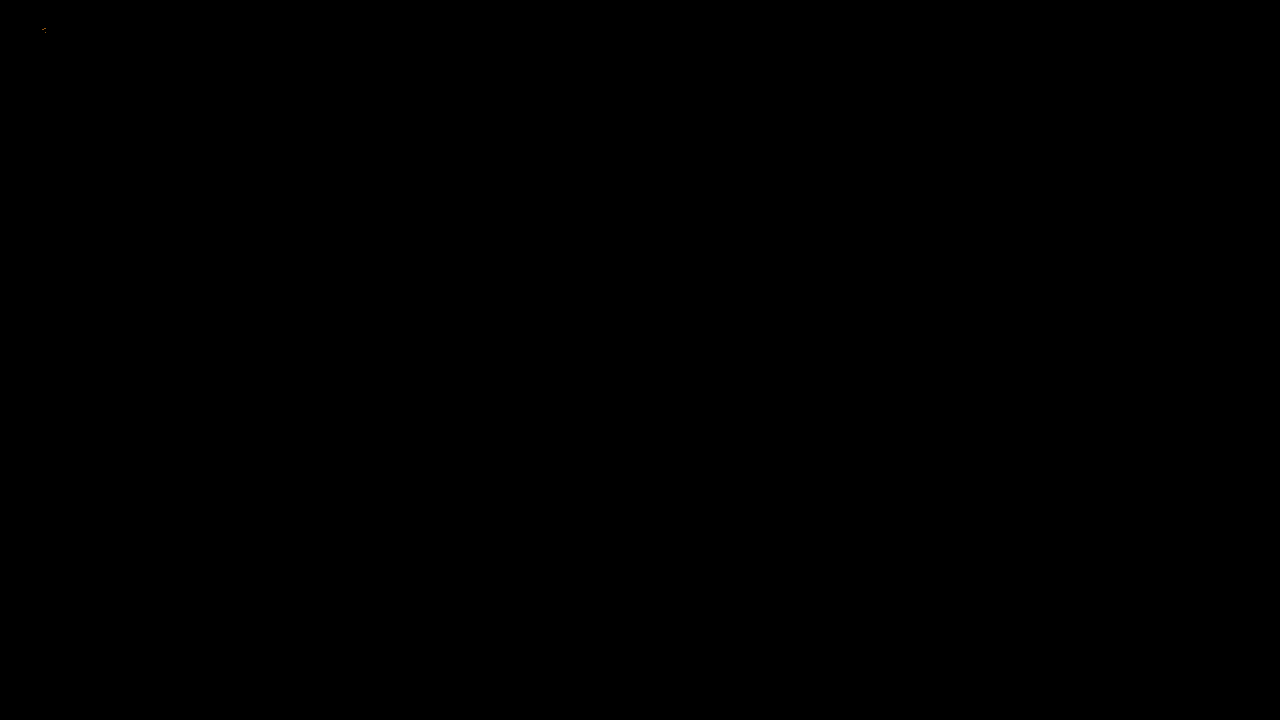

Cor vermelha detectada no frame 19


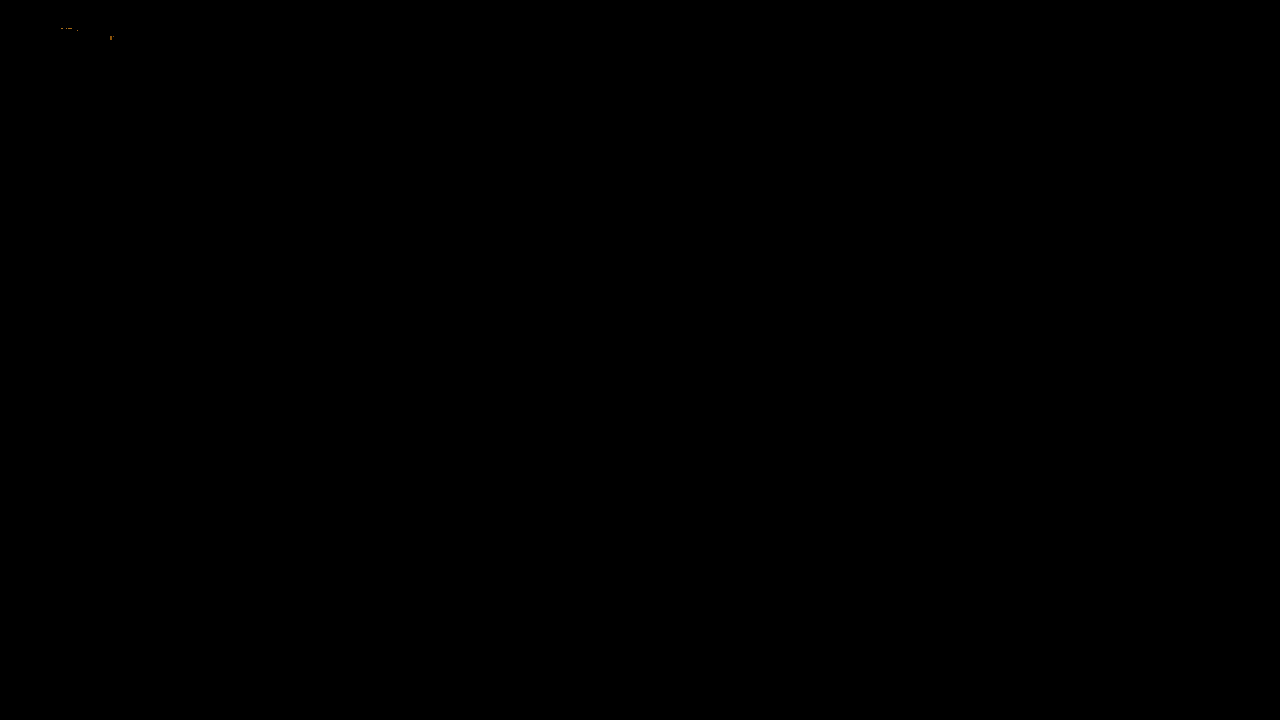

Cor vermelha detectada no frame 20


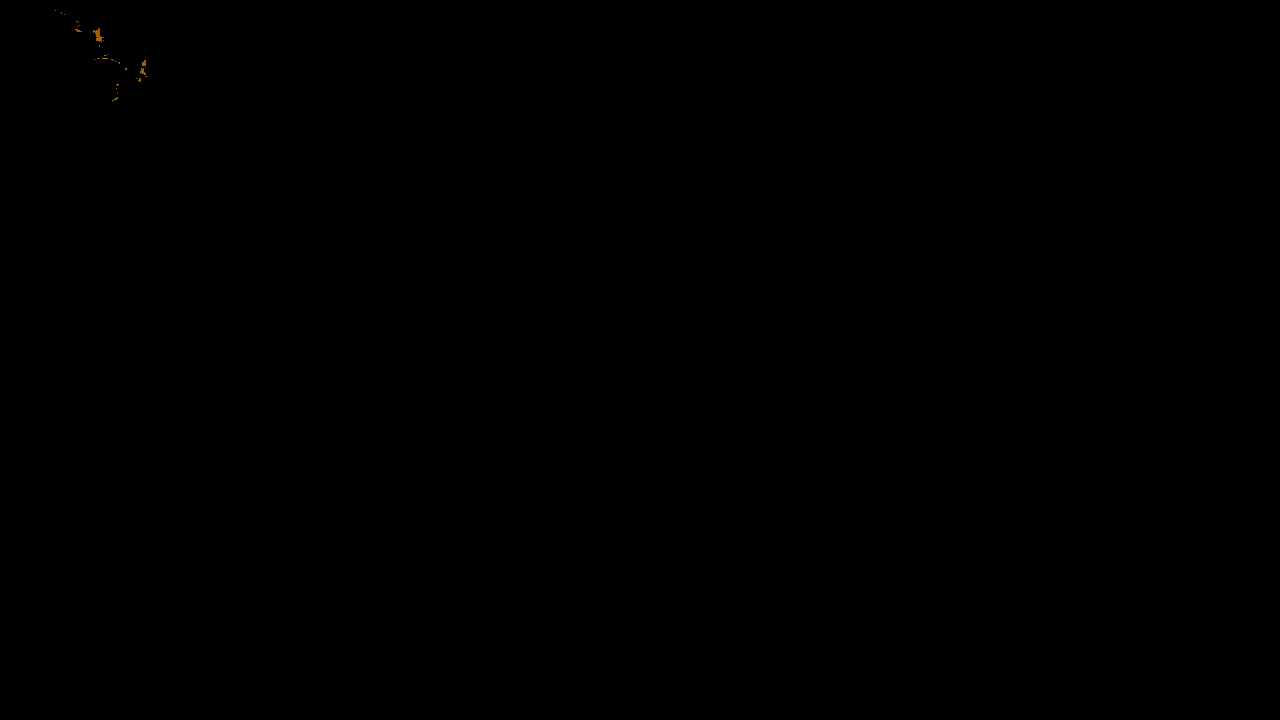

Cor vermelha detectada no frame 21


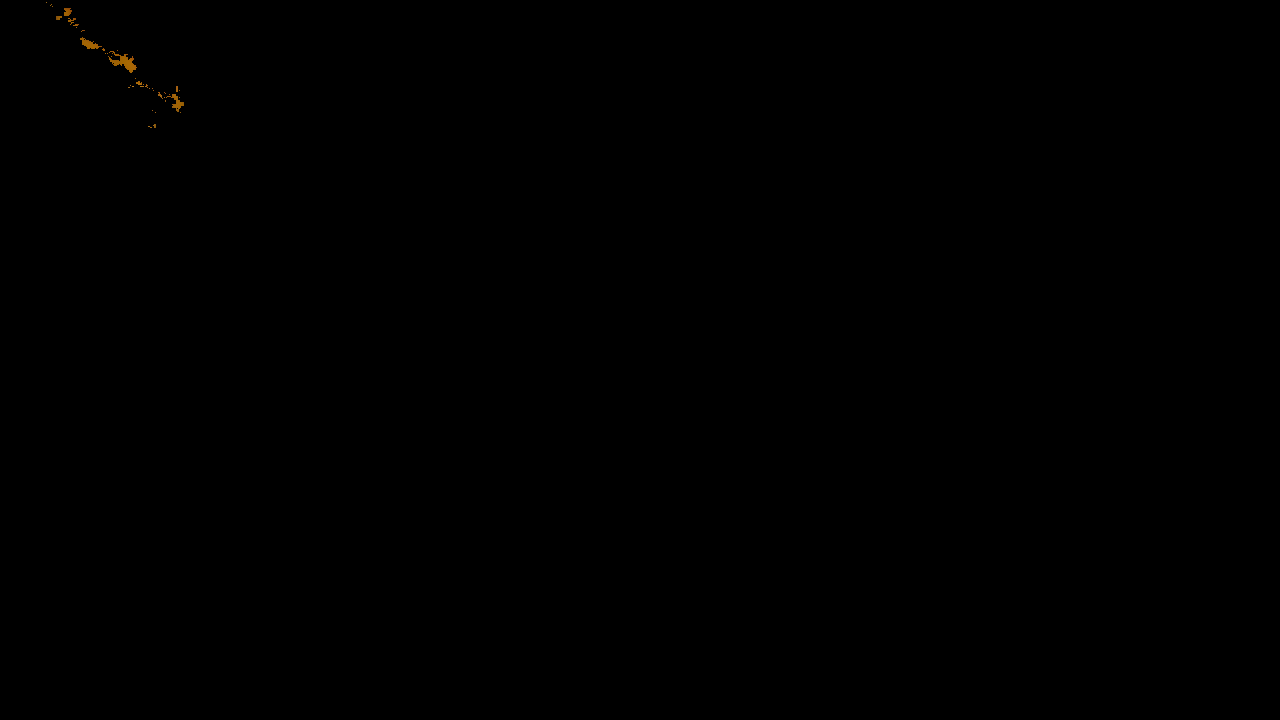

Cor vermelha detectada no frame 22


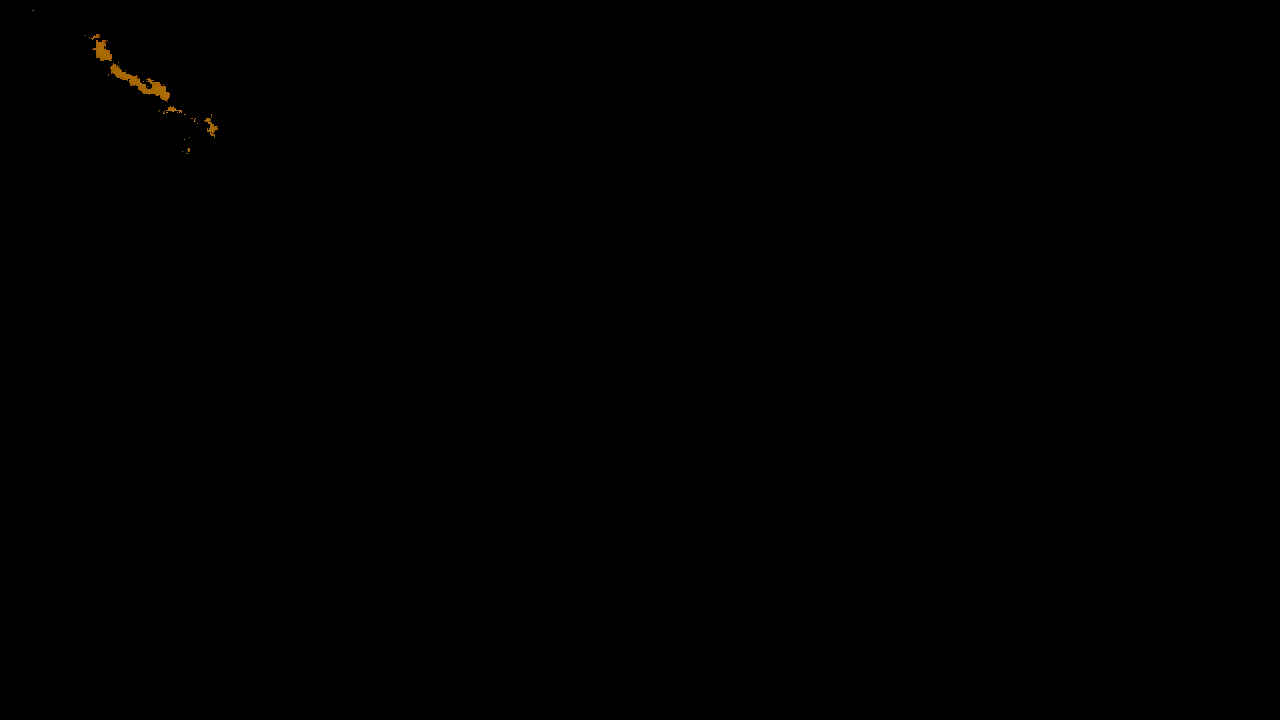

Cor vermelha detectada no frame 23


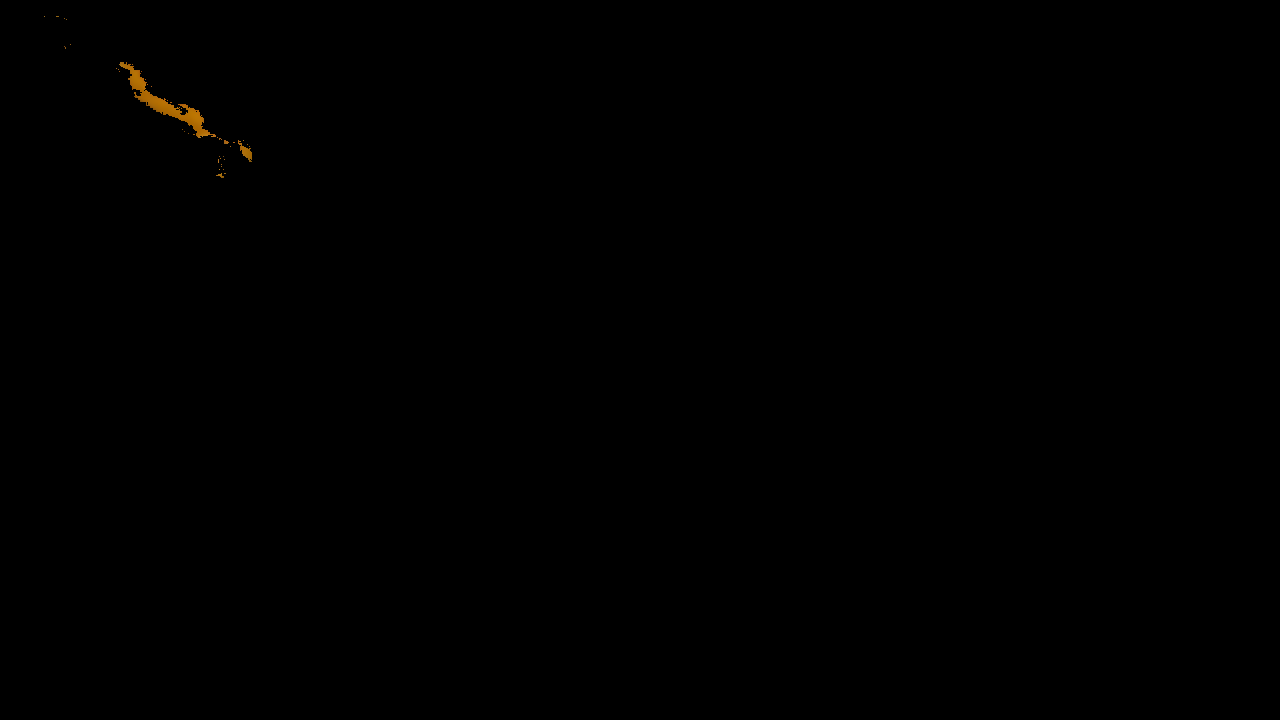

Cor vermelha detectada no frame 24


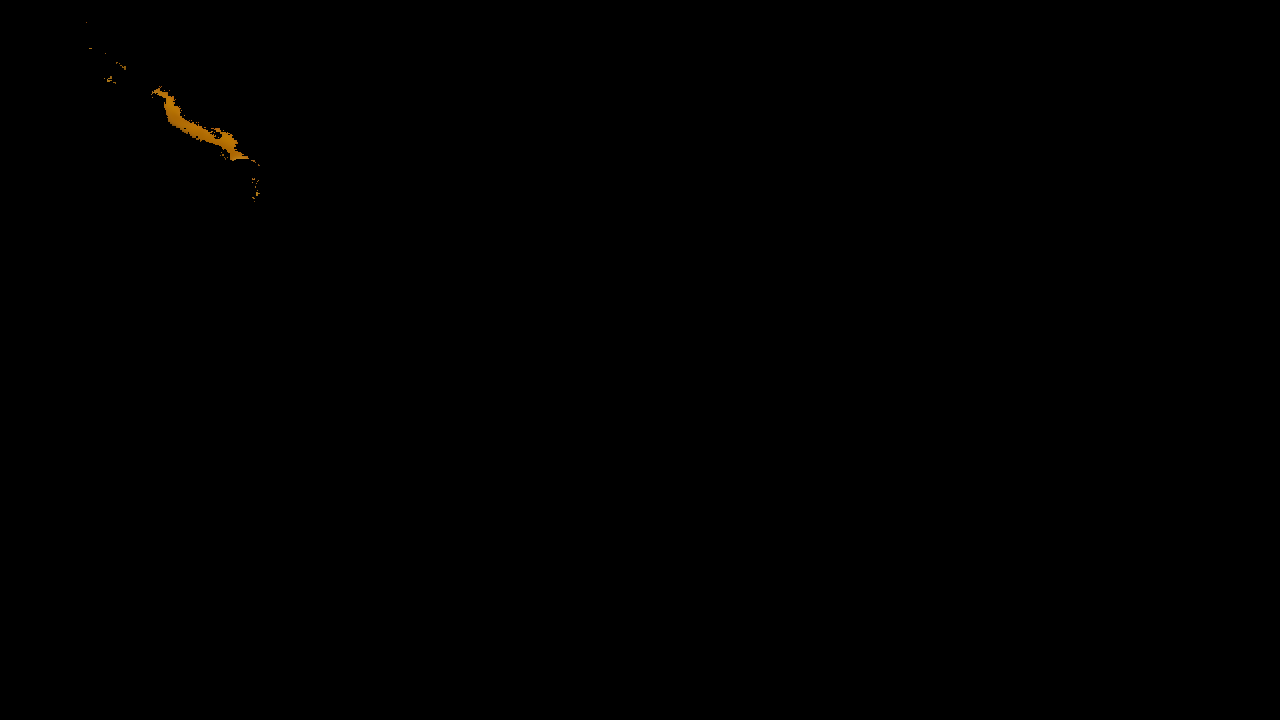

Cor vermelha detectada no frame 25


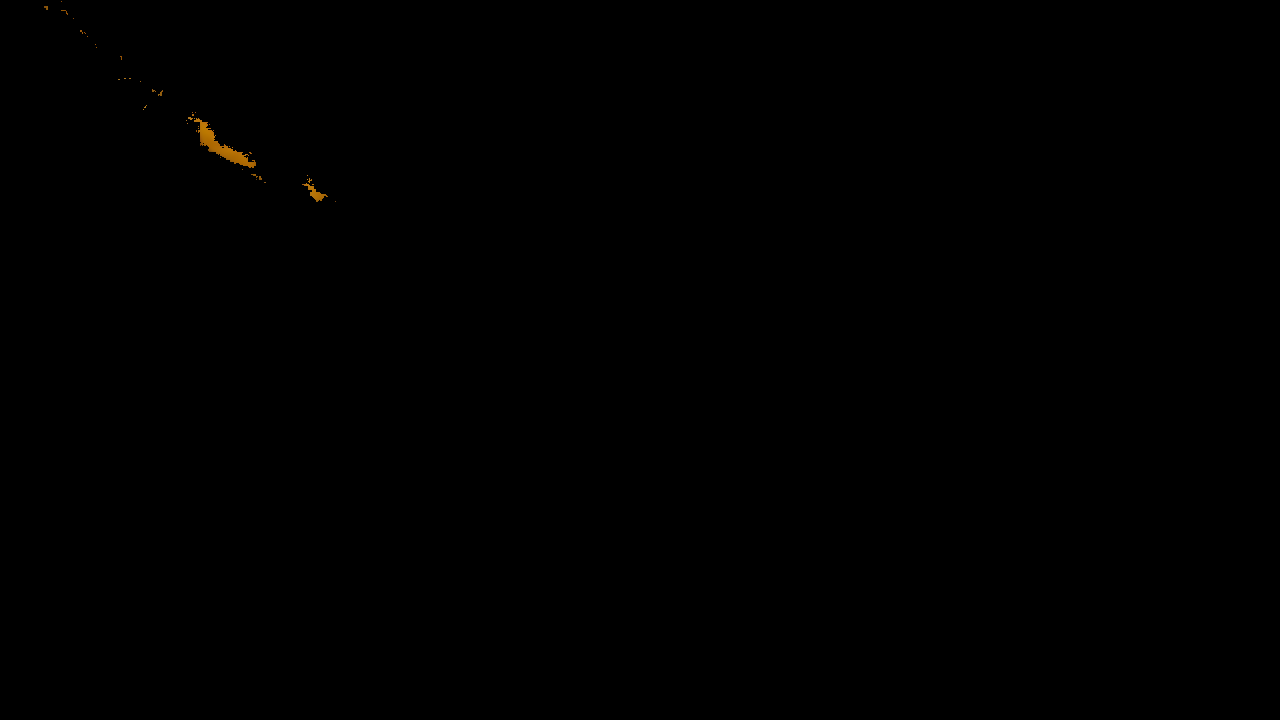

Cor vermelha detectada no frame 26


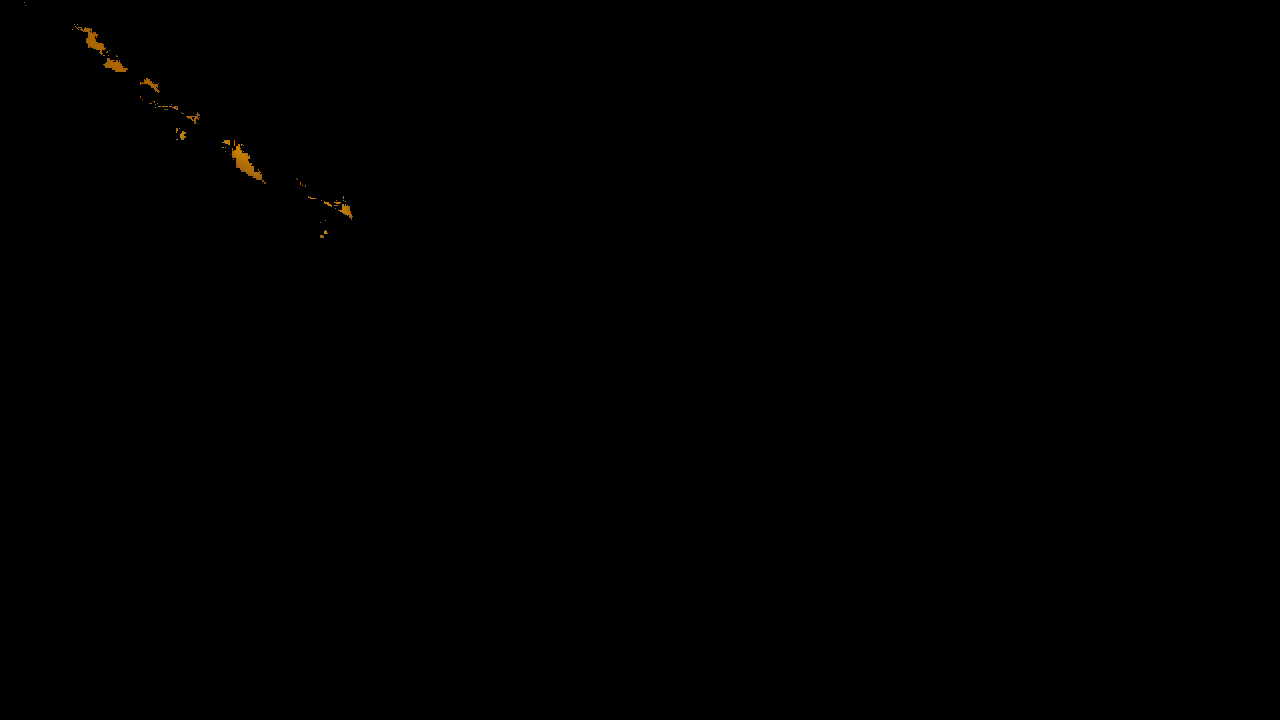

Cor vermelha detectada no frame 27


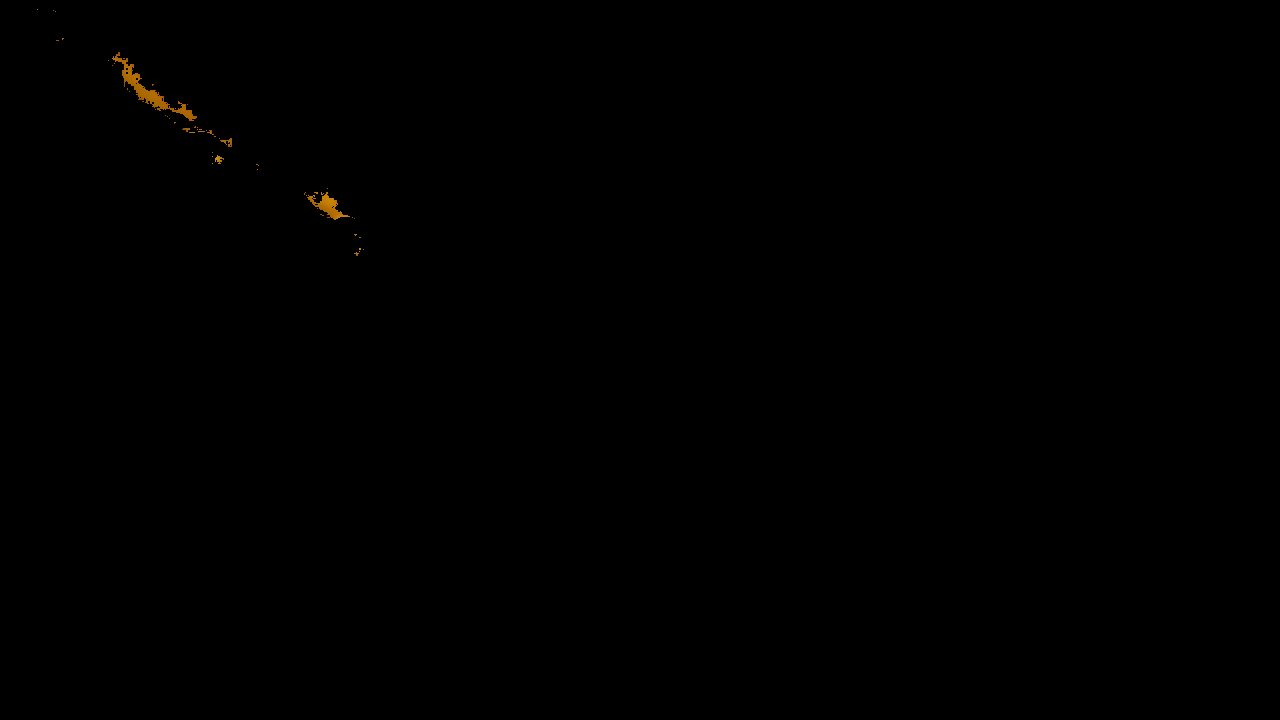

Cor vermelha detectada no frame 28


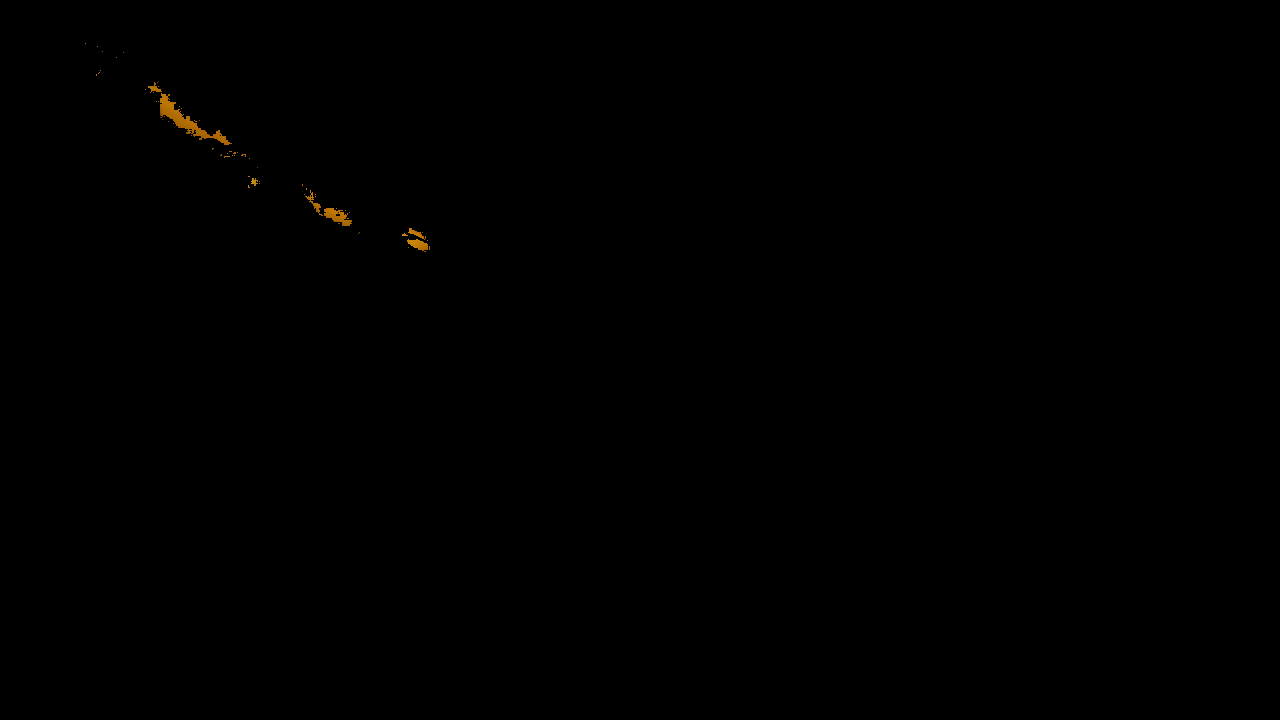

Cor vermelha detectada no frame 29


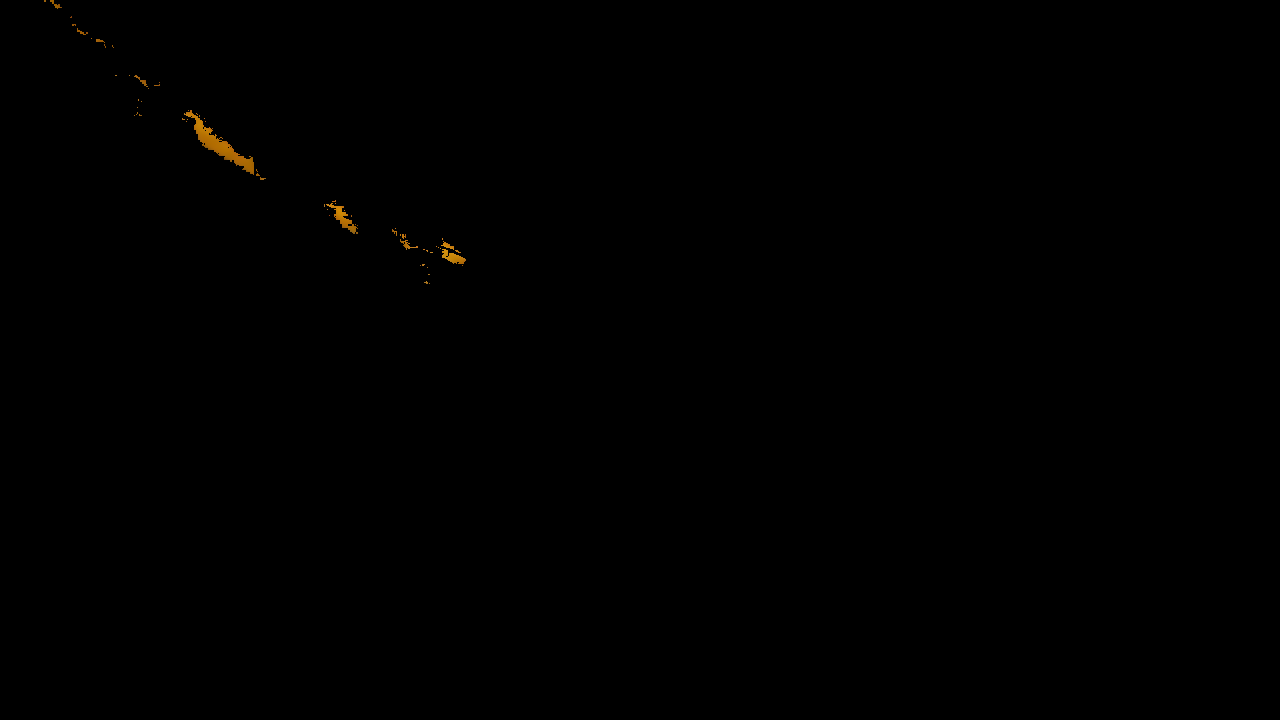

Cor vermelha detectada no frame 30


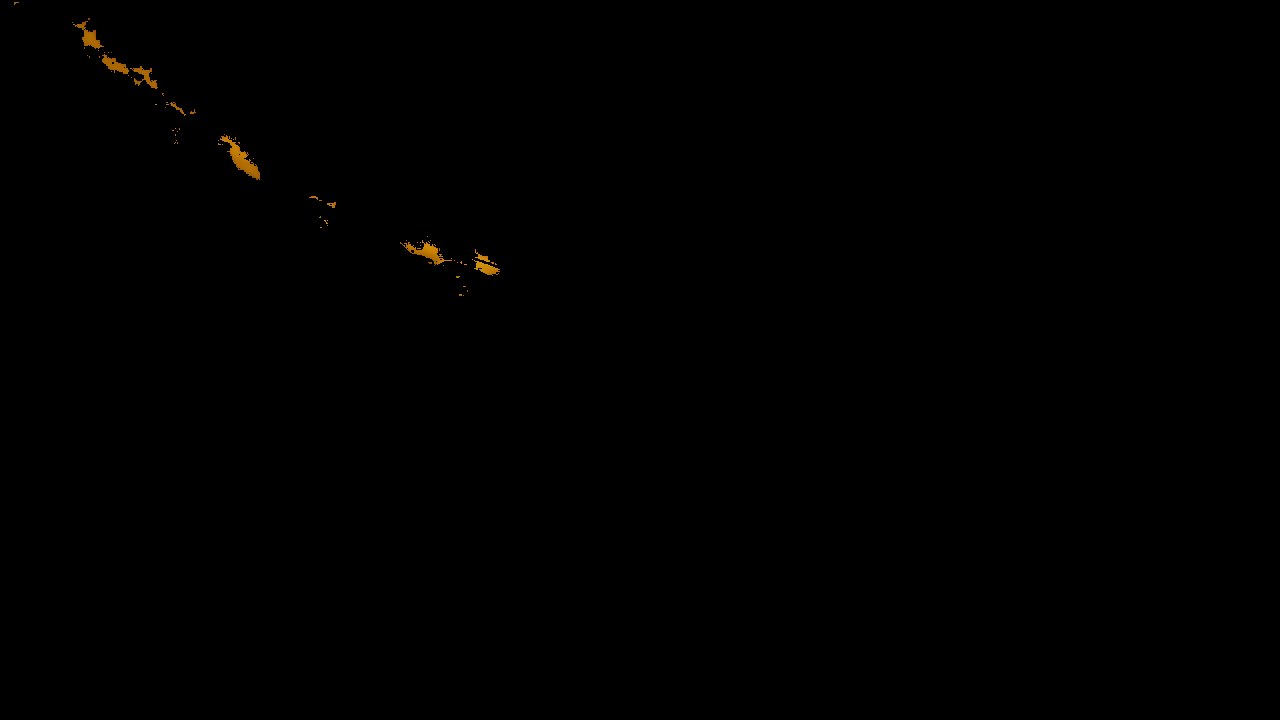

Cor vermelha detectada no frame 31


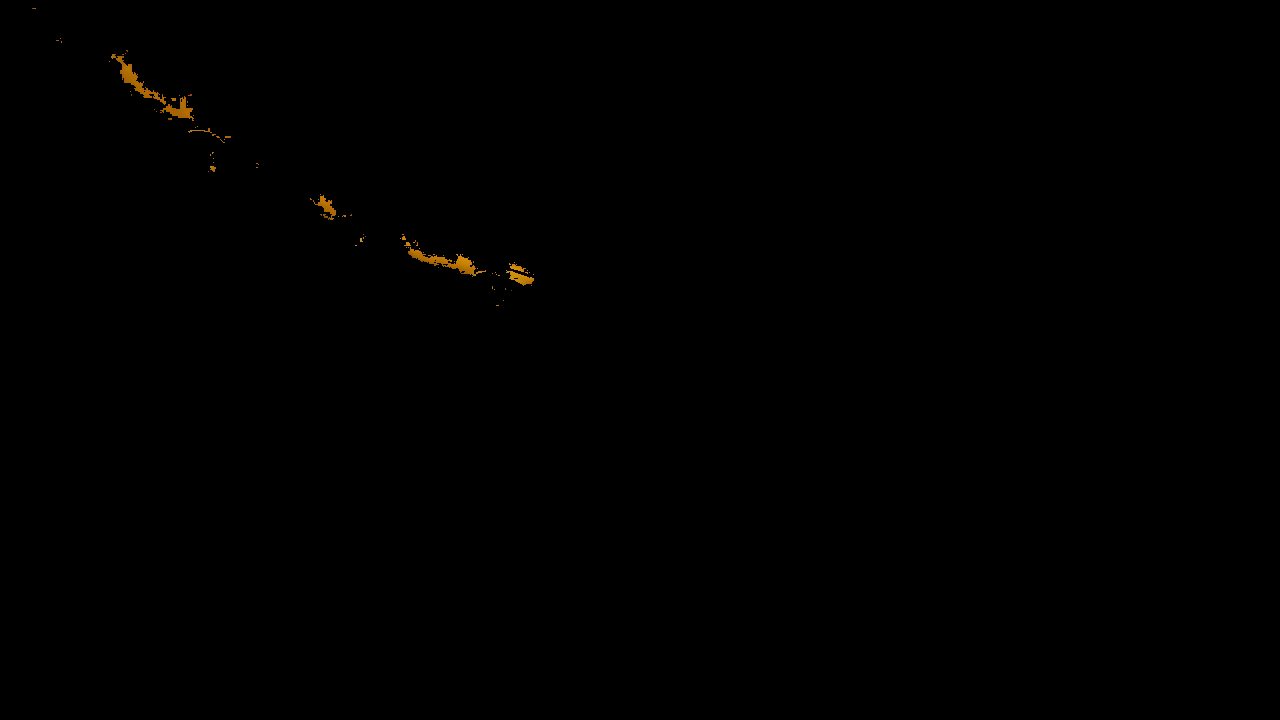

Cor vermelha detectada no frame 32


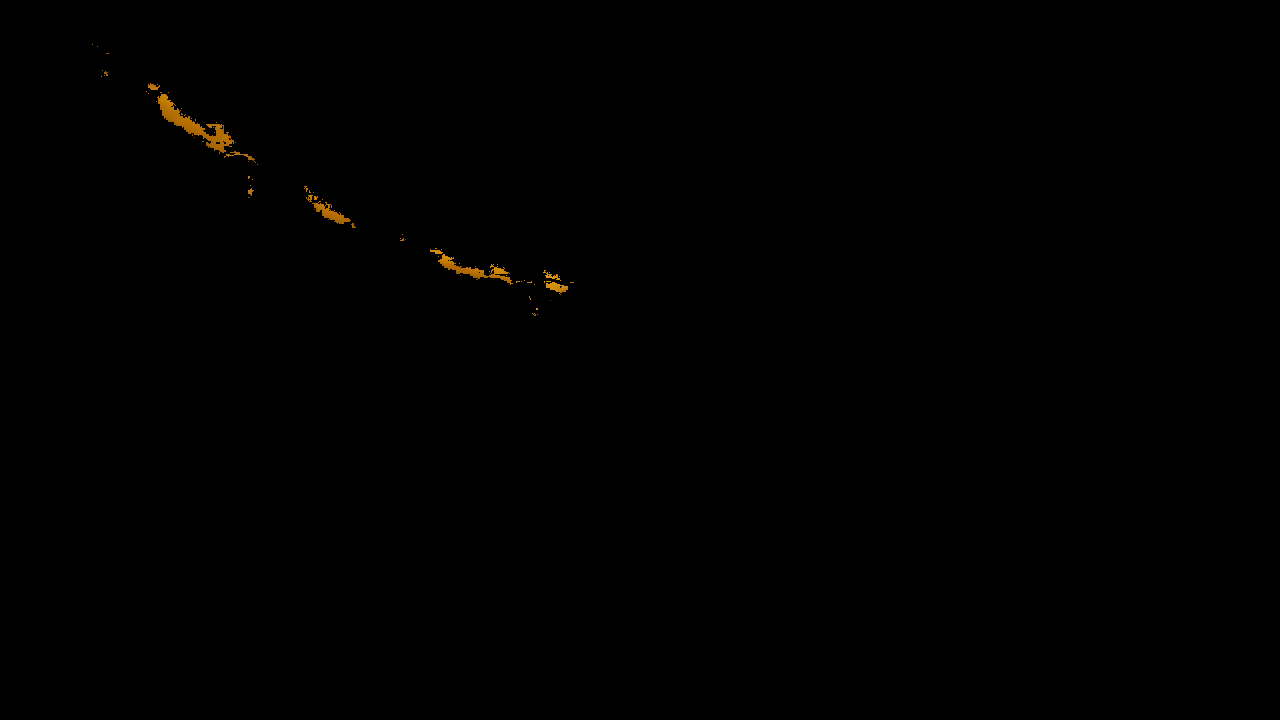

Cor vermelha detectada no frame 33


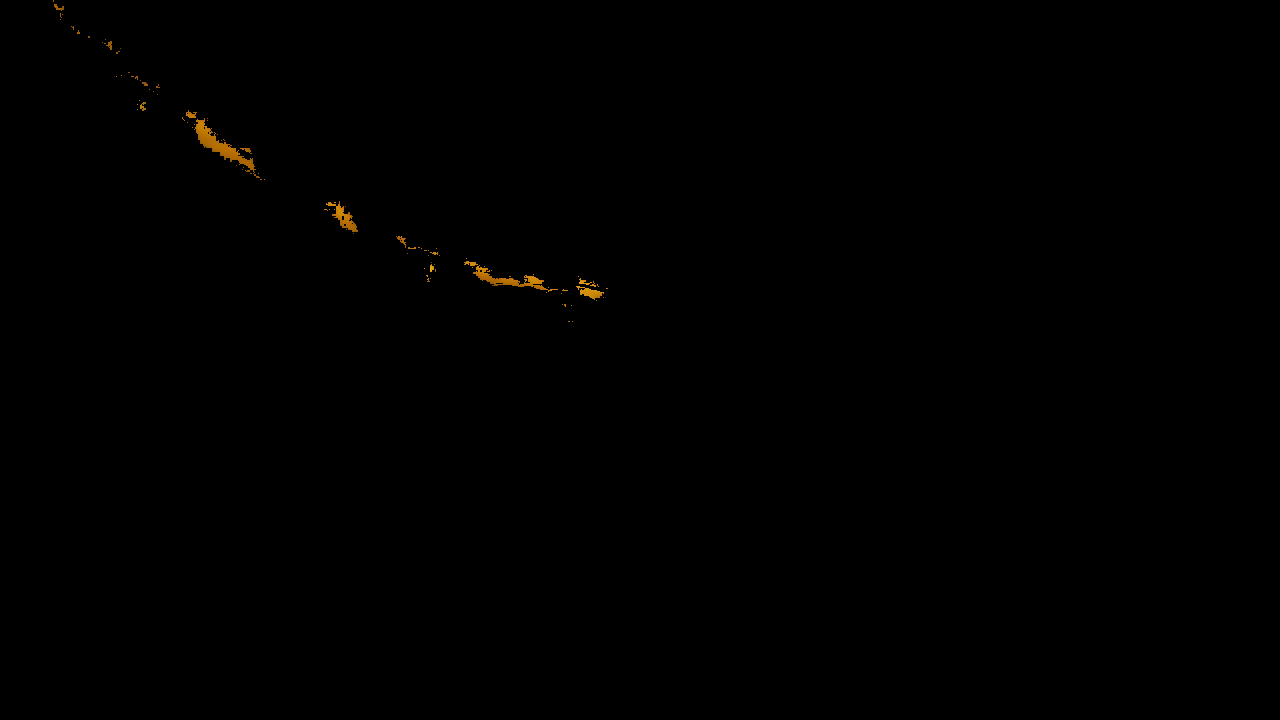

Cor vermelha detectada no frame 34


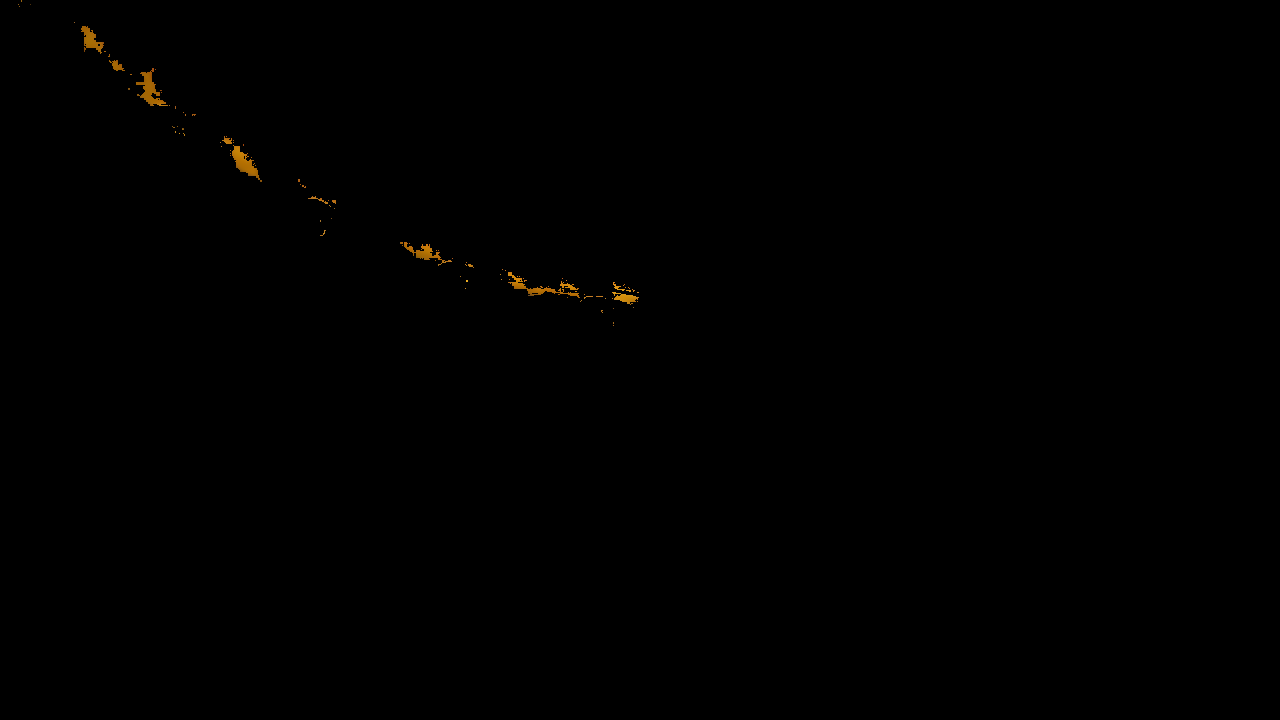

Cor vermelha detectada no frame 35


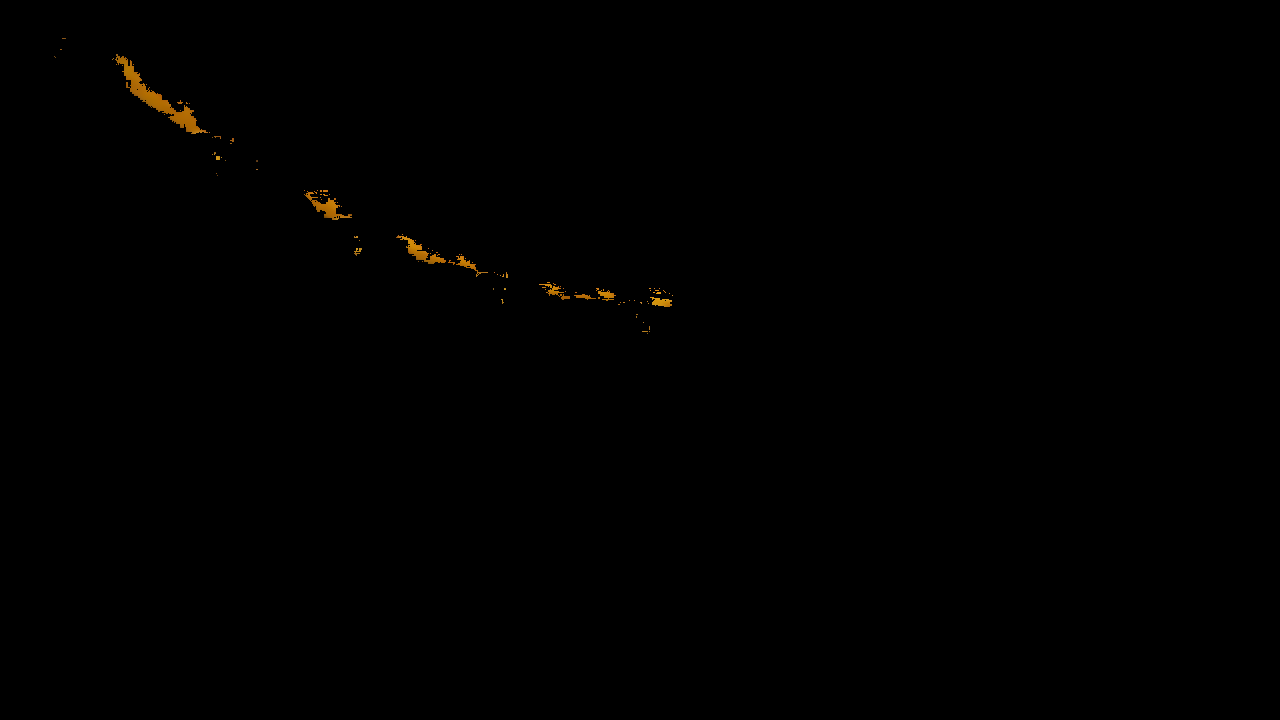

Cor vermelha detectada no frame 36


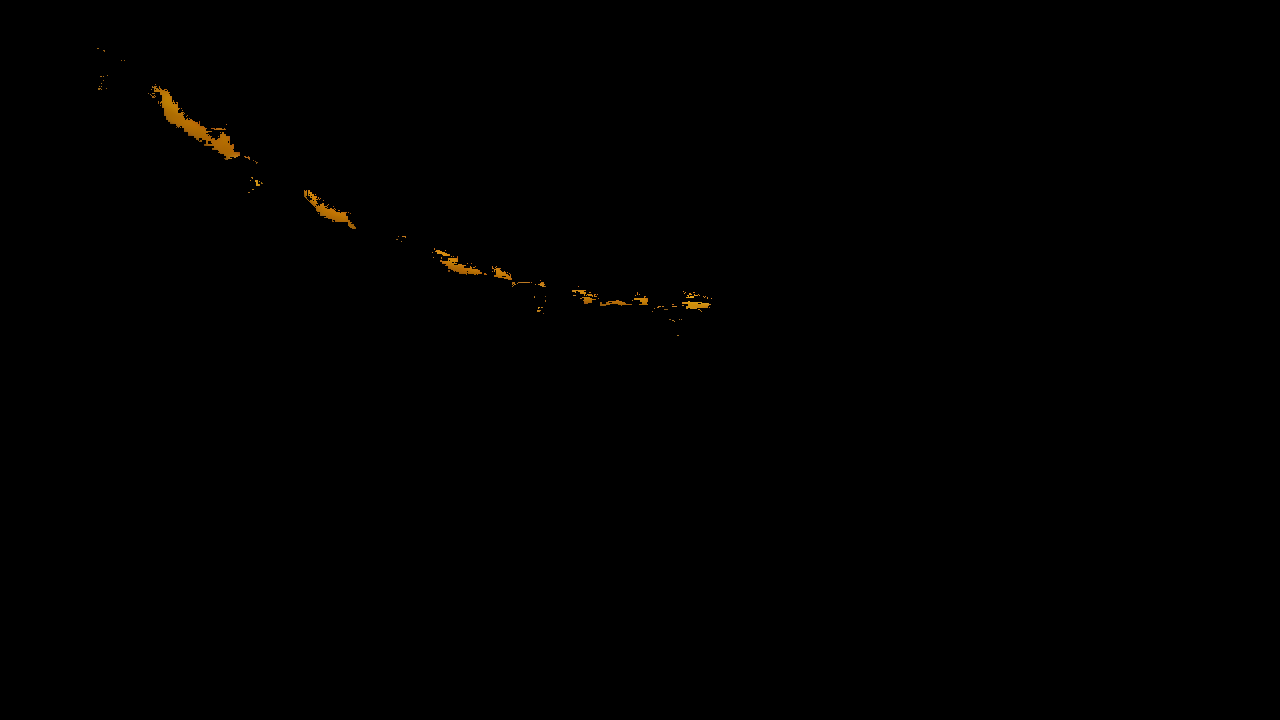

Cor vermelha detectada no frame 37


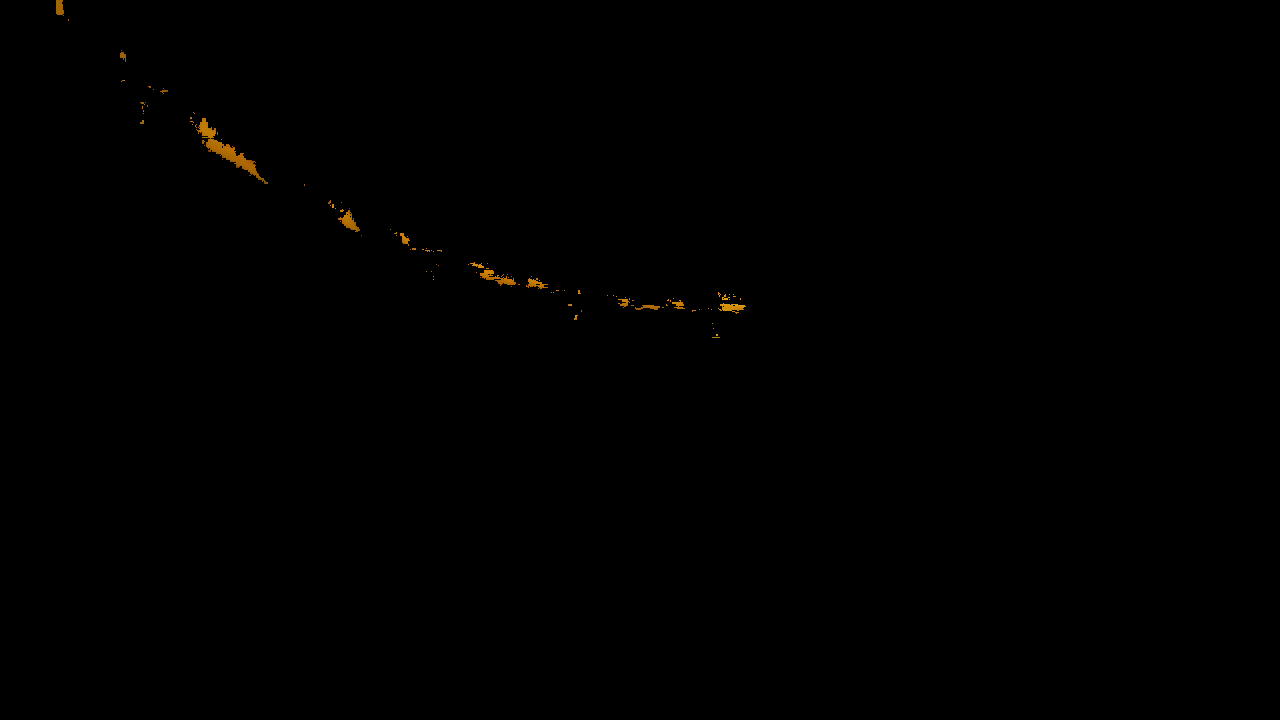

Cor vermelha detectada no frame 38


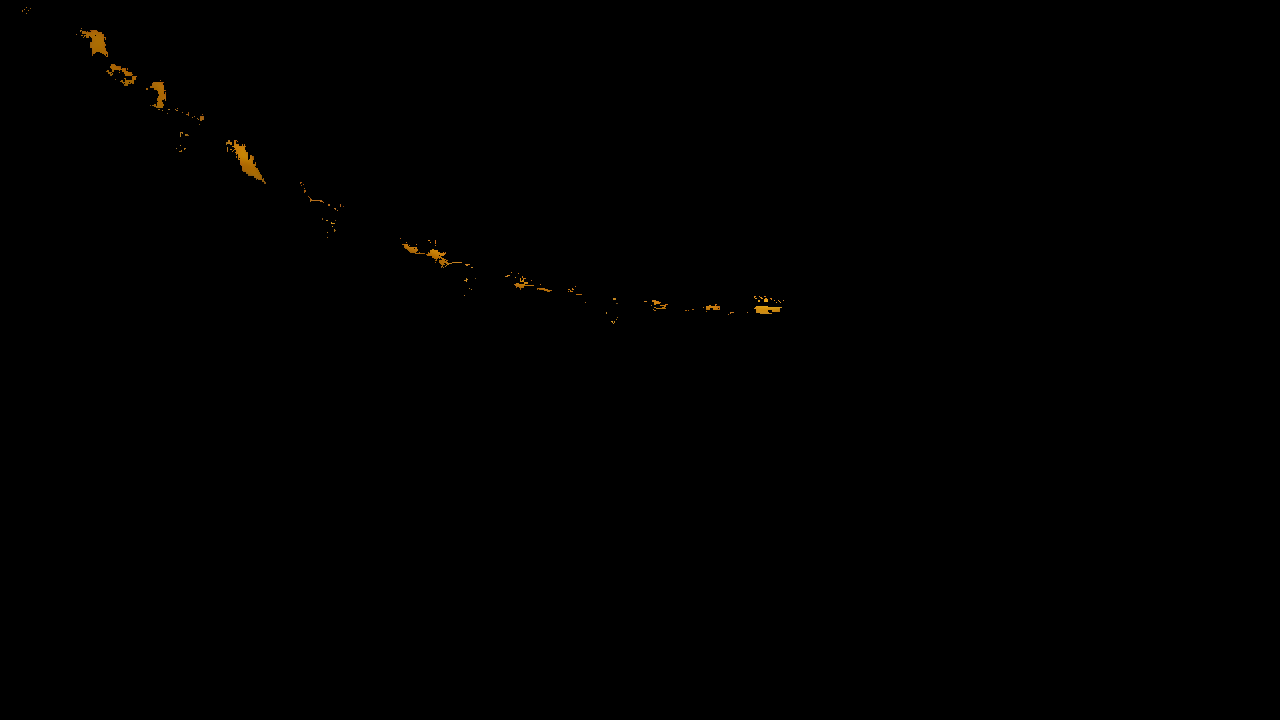

Cor vermelha detectada no frame 39


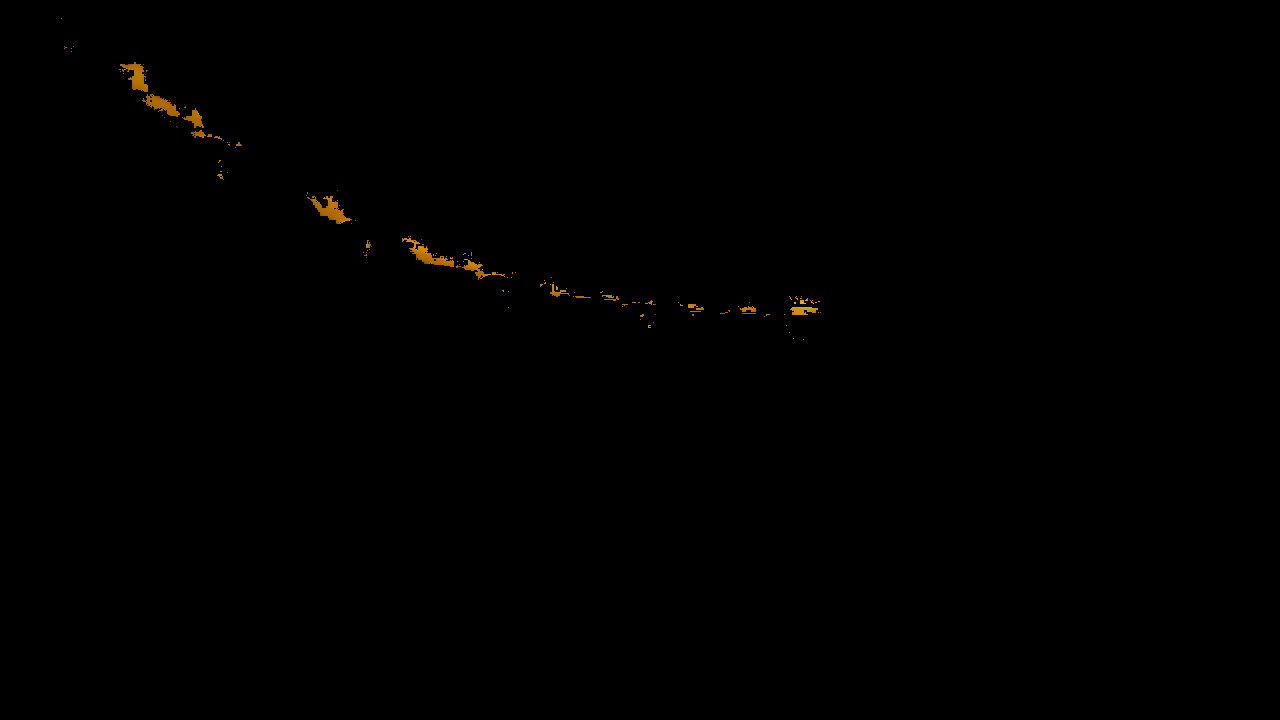

Cor vermelha detectada no frame 40


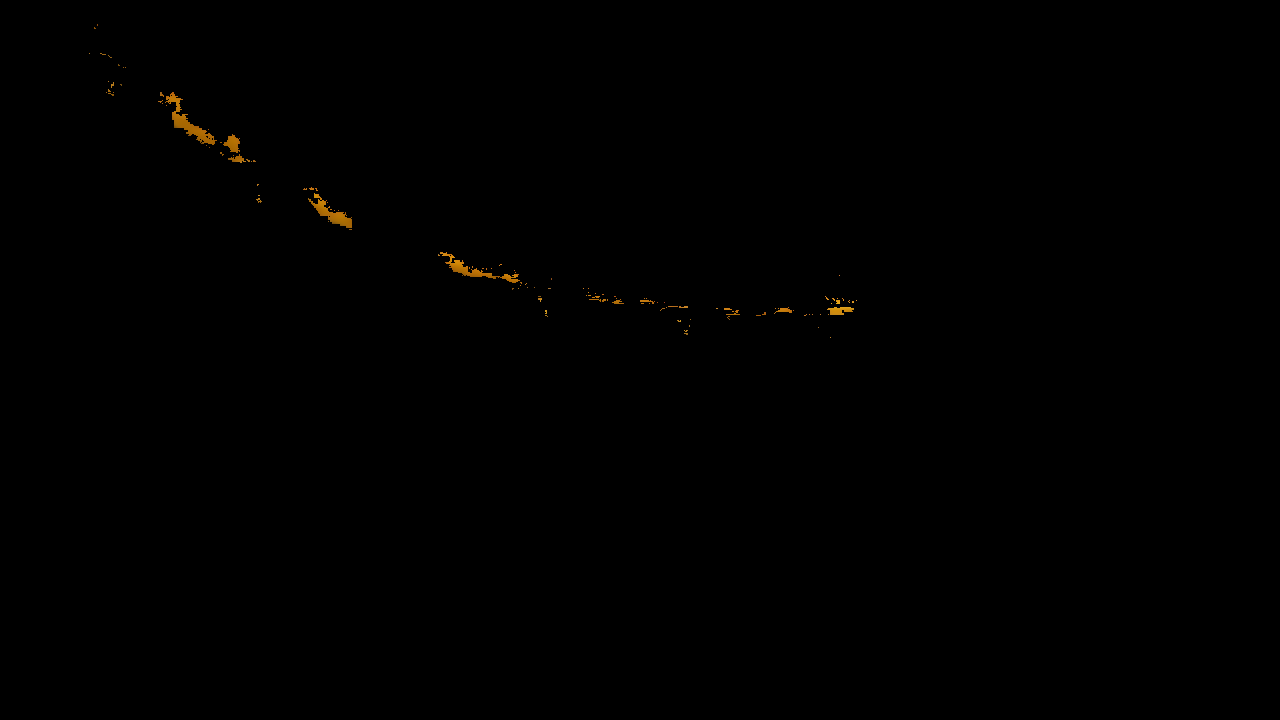

Cor vermelha detectada no frame 41


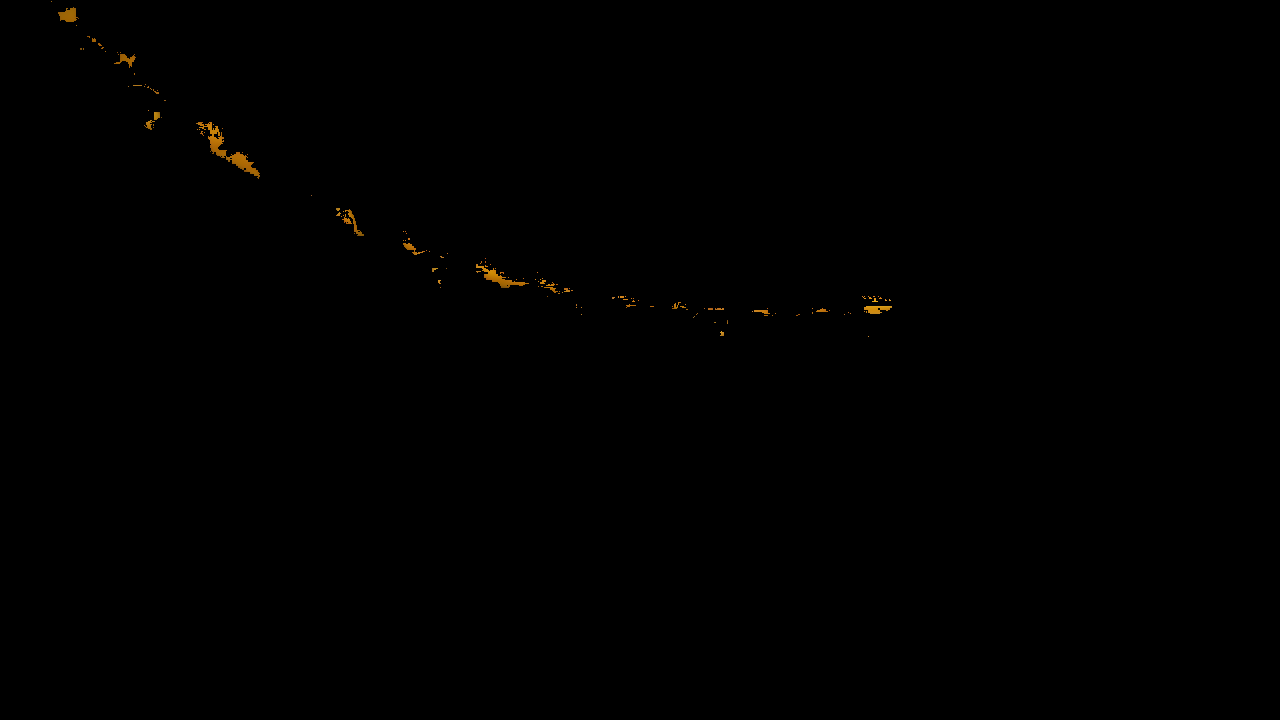

Cor vermelha detectada no frame 42


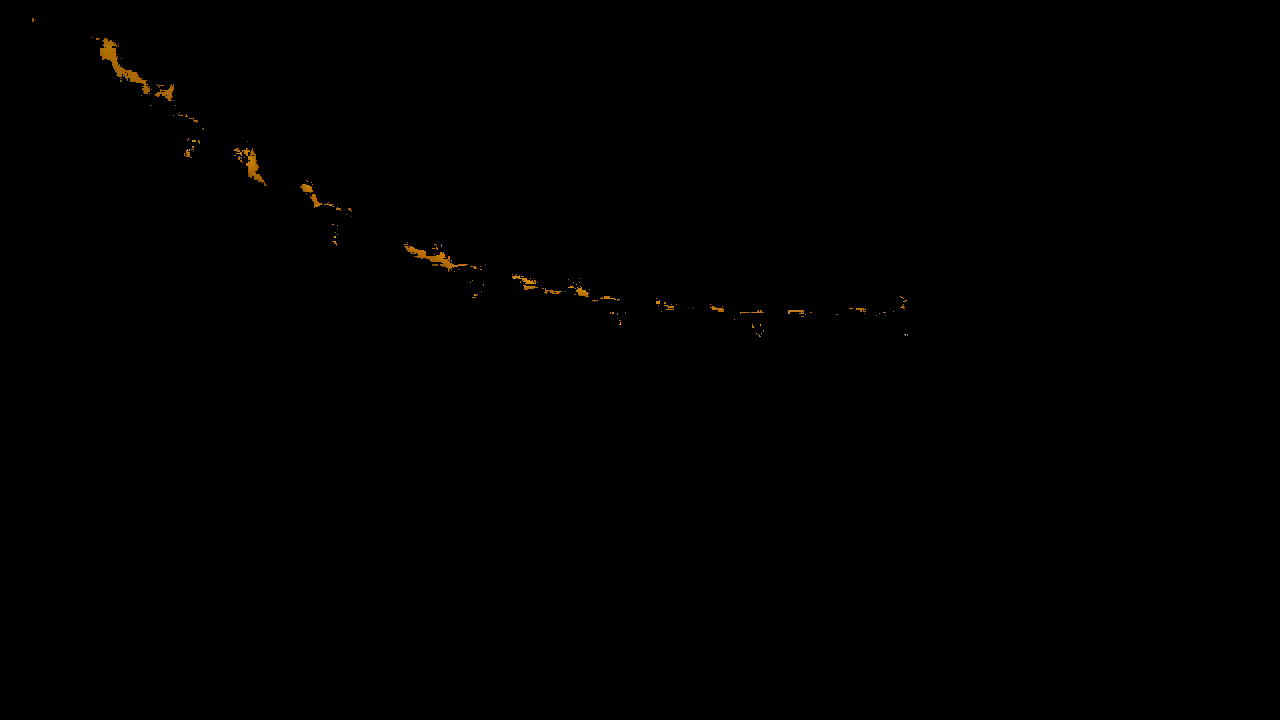

Cor vermelha detectada no frame 43


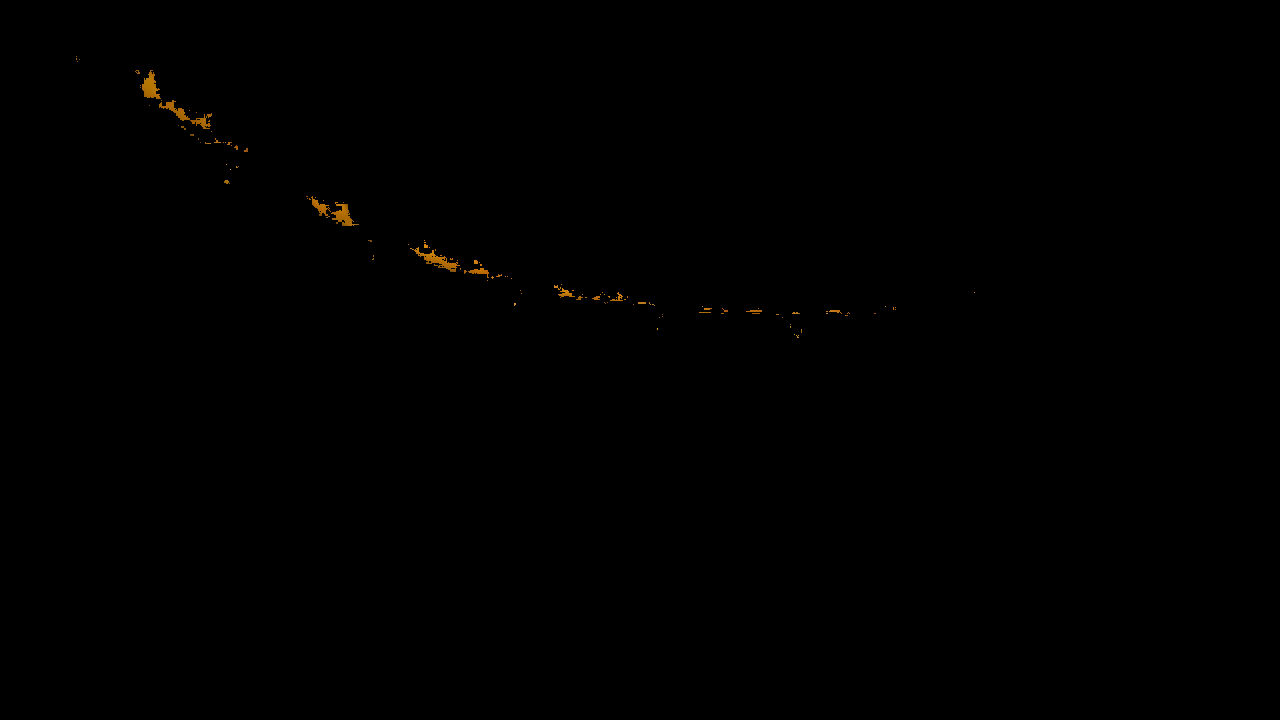

Cor vermelha detectada no frame 44


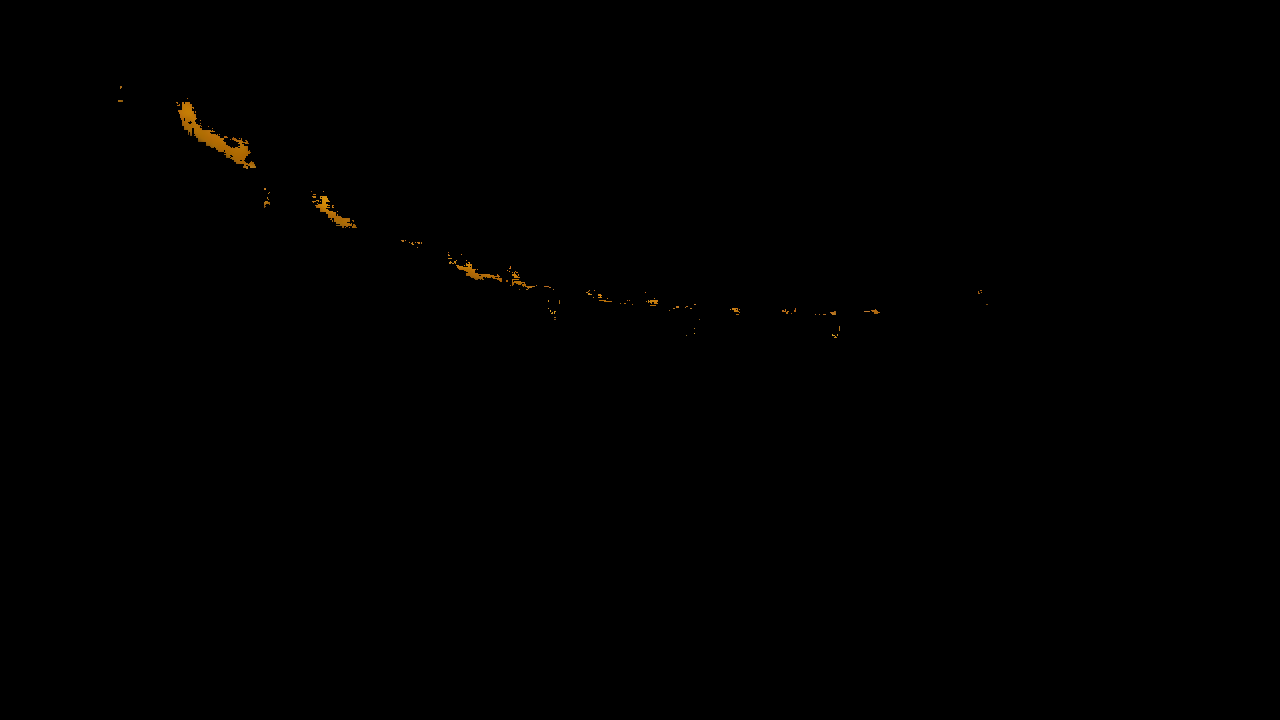

Cor vermelha detectada no frame 45


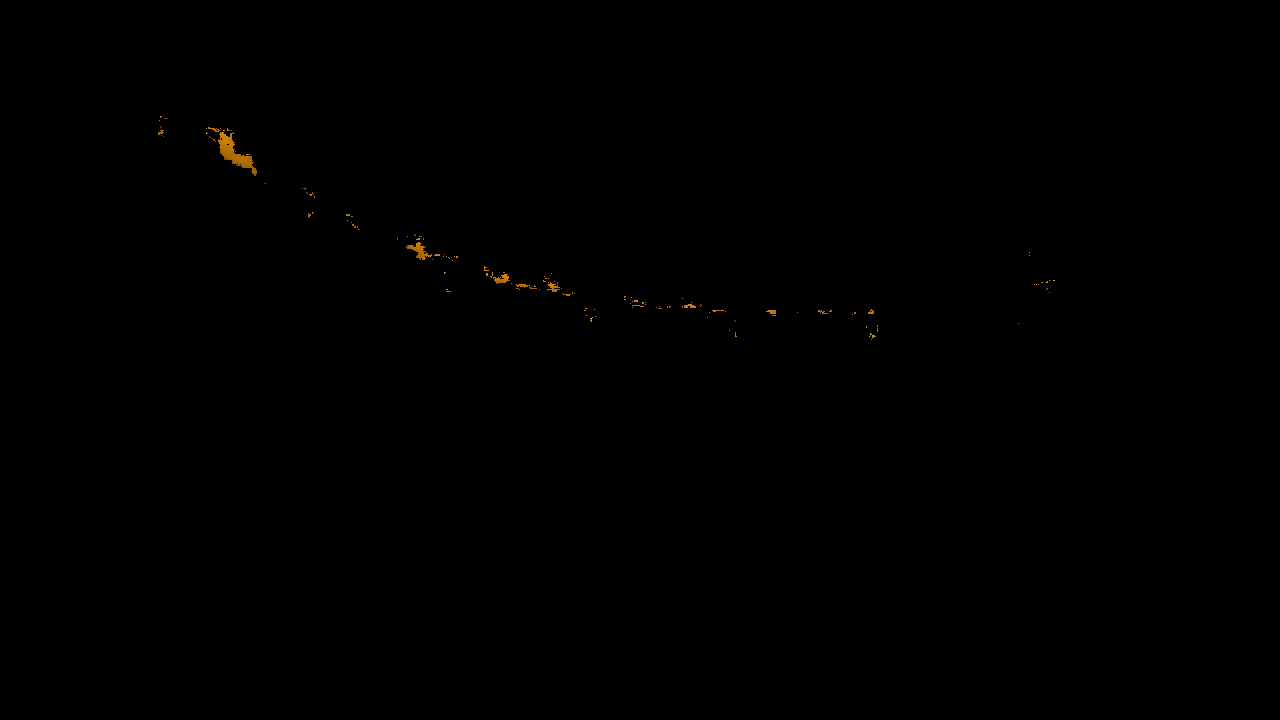

Cor vermelha detectada no frame 46


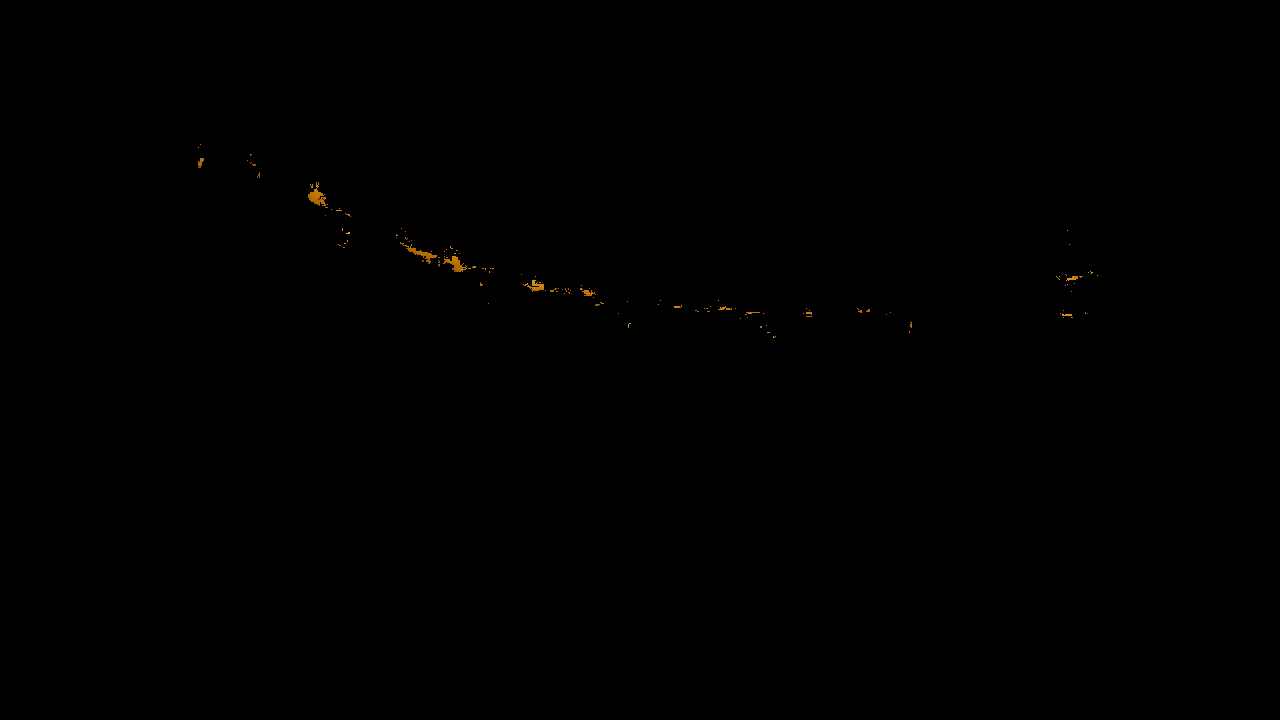

Cor vermelha detectada no frame 47


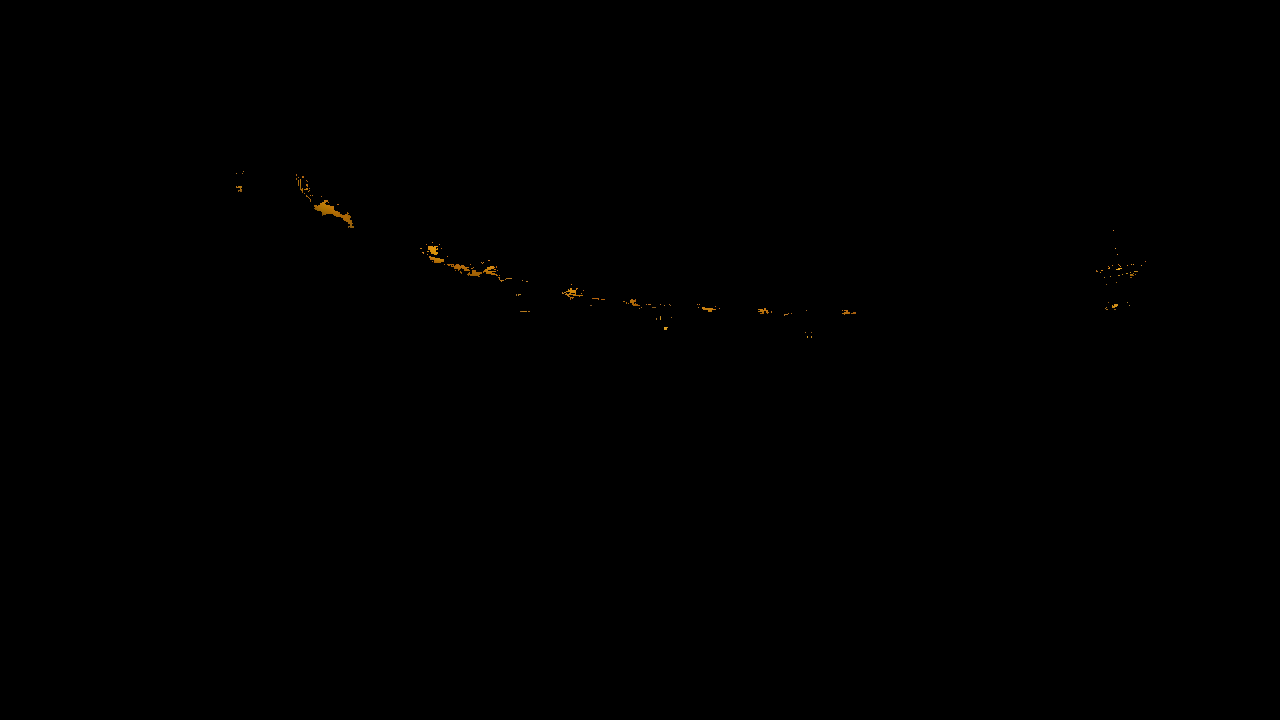

Cor vermelha detectada no frame 48


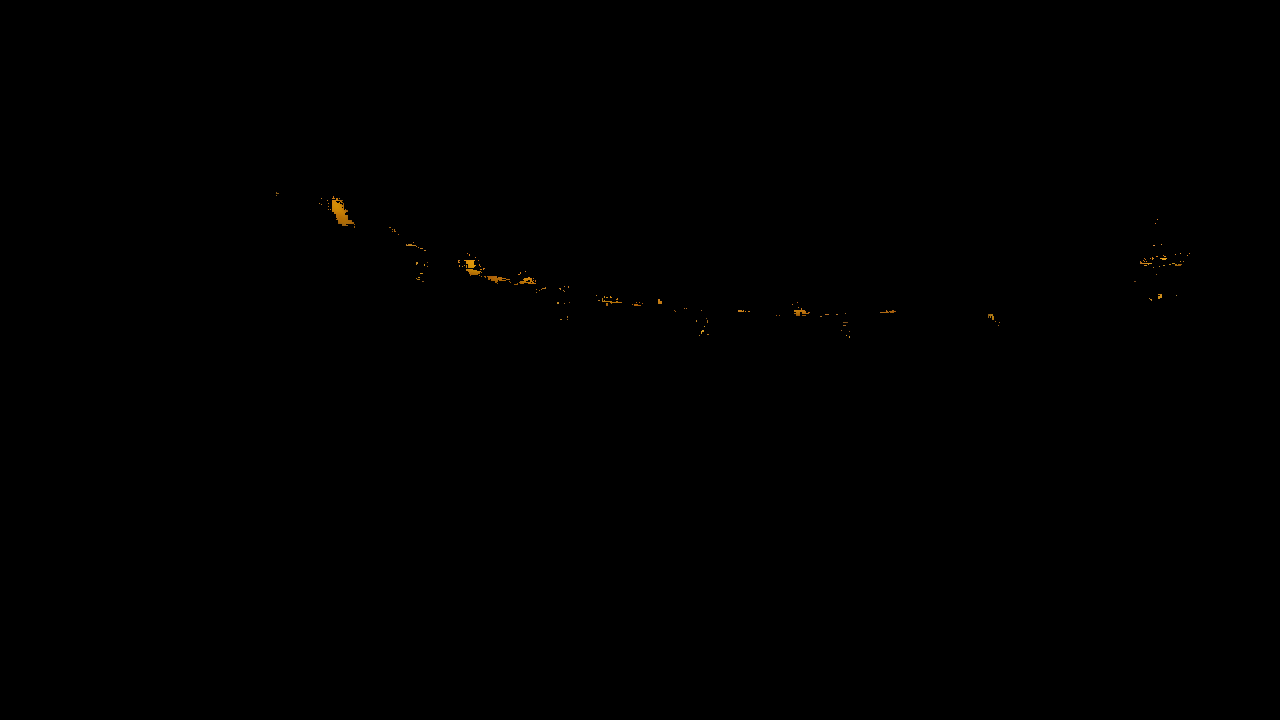

Cor vermelha detectada no frame 49


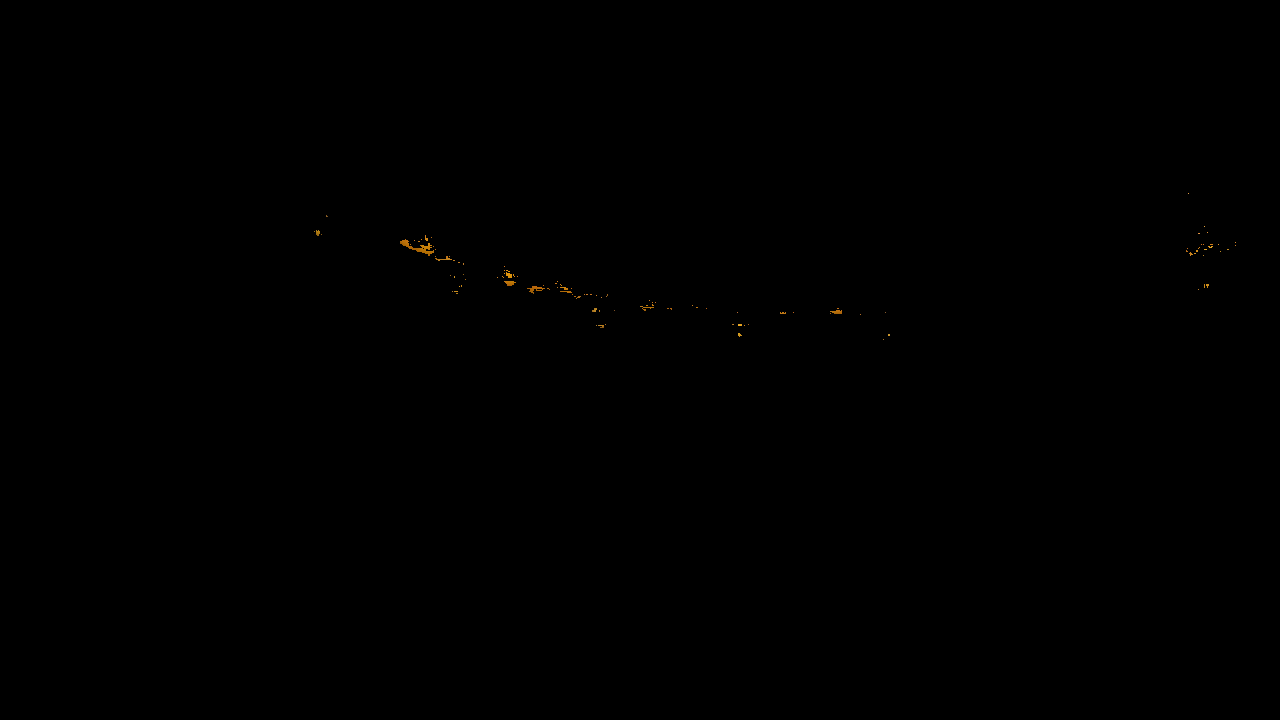

Cor vermelha detectada no frame 50


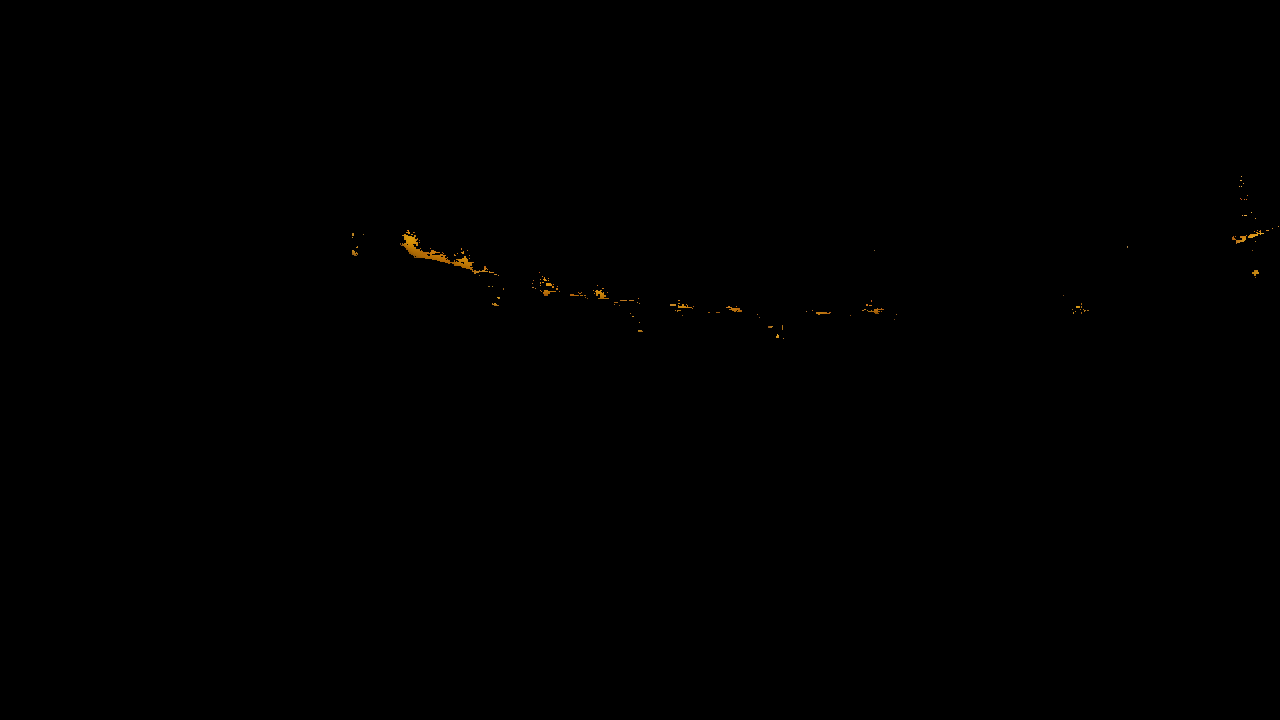

Cor vermelha detectada no frame 51


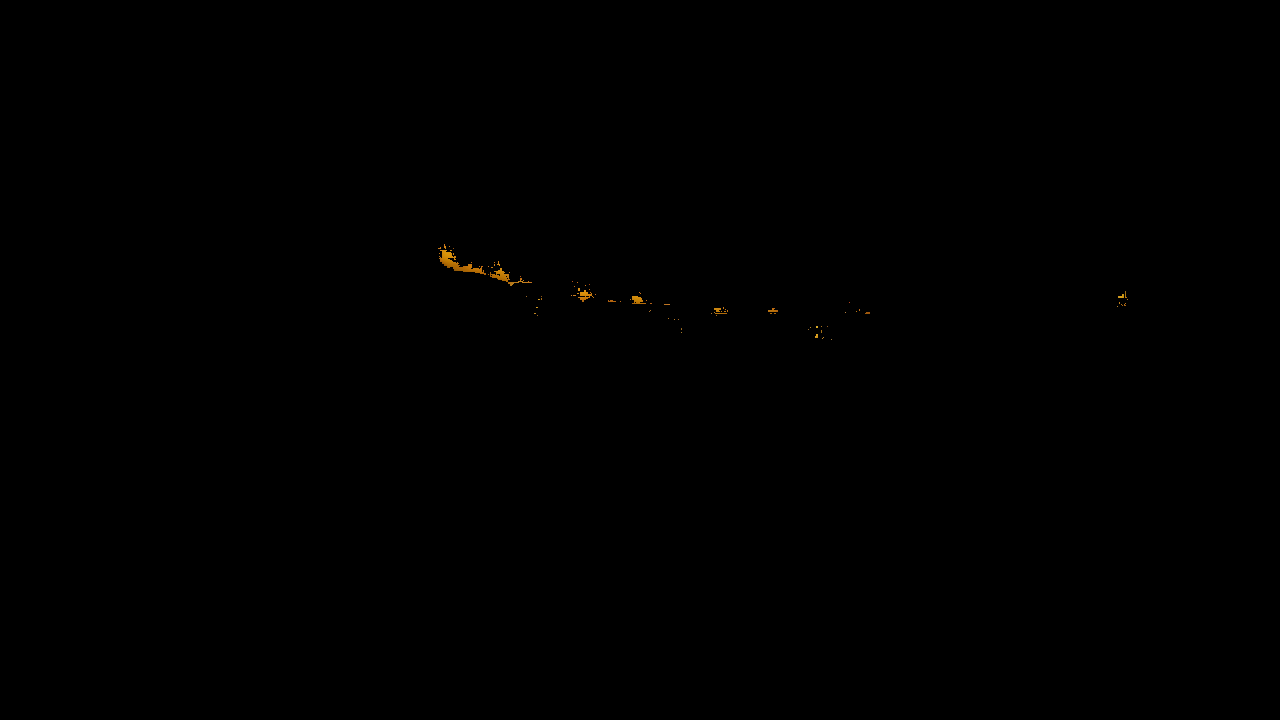

Cor vermelha detectada no frame 52


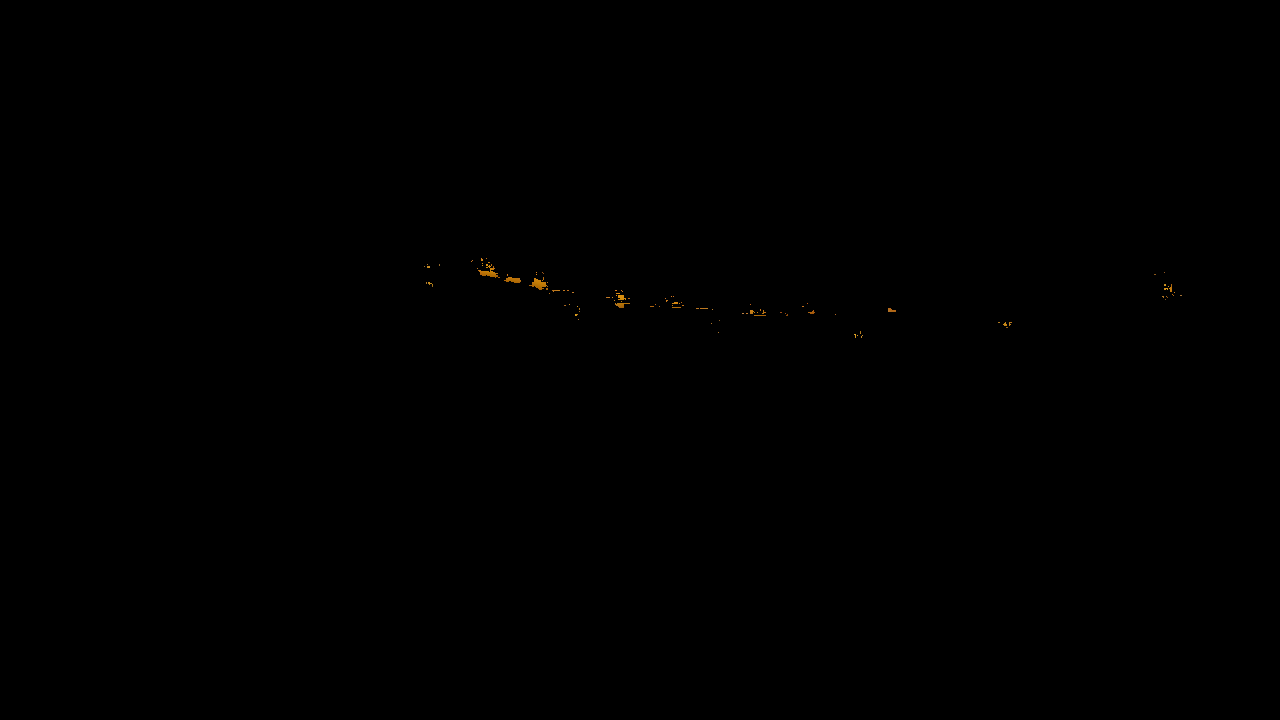

Cor vermelha detectada no frame 53


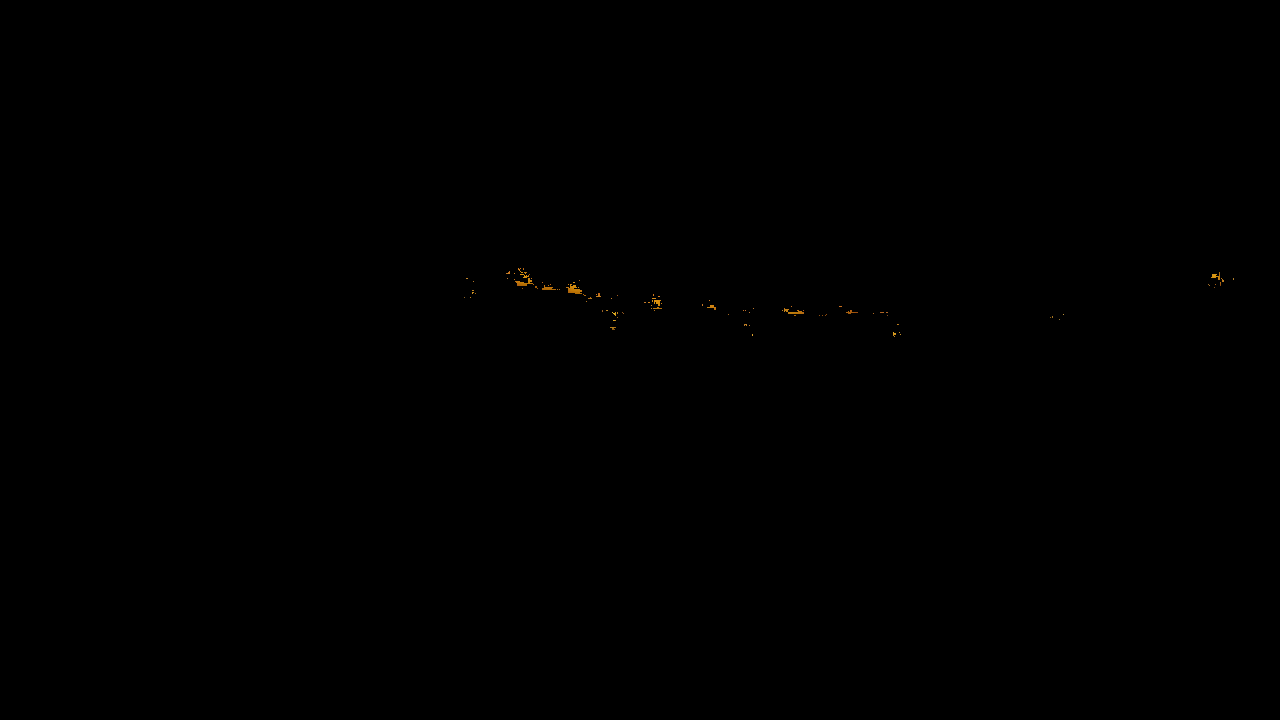

Cor vermelha detectada no frame 54


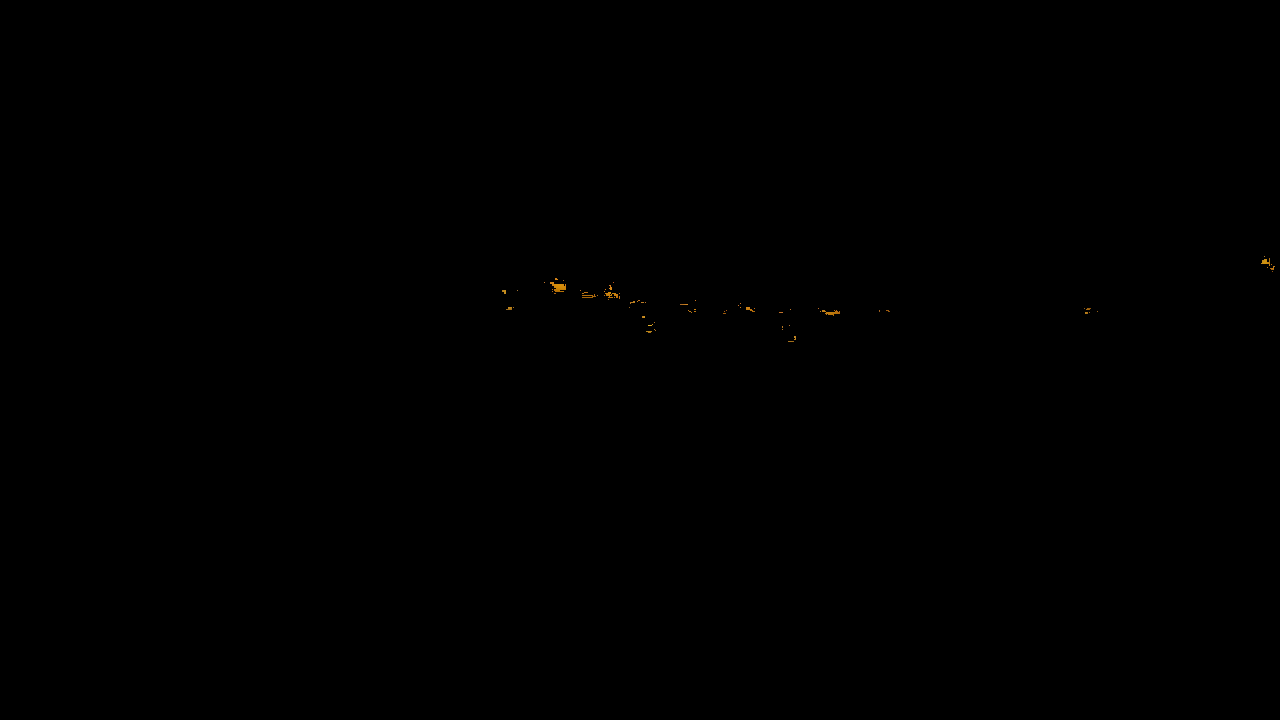

Cor vermelha detectada no frame 55


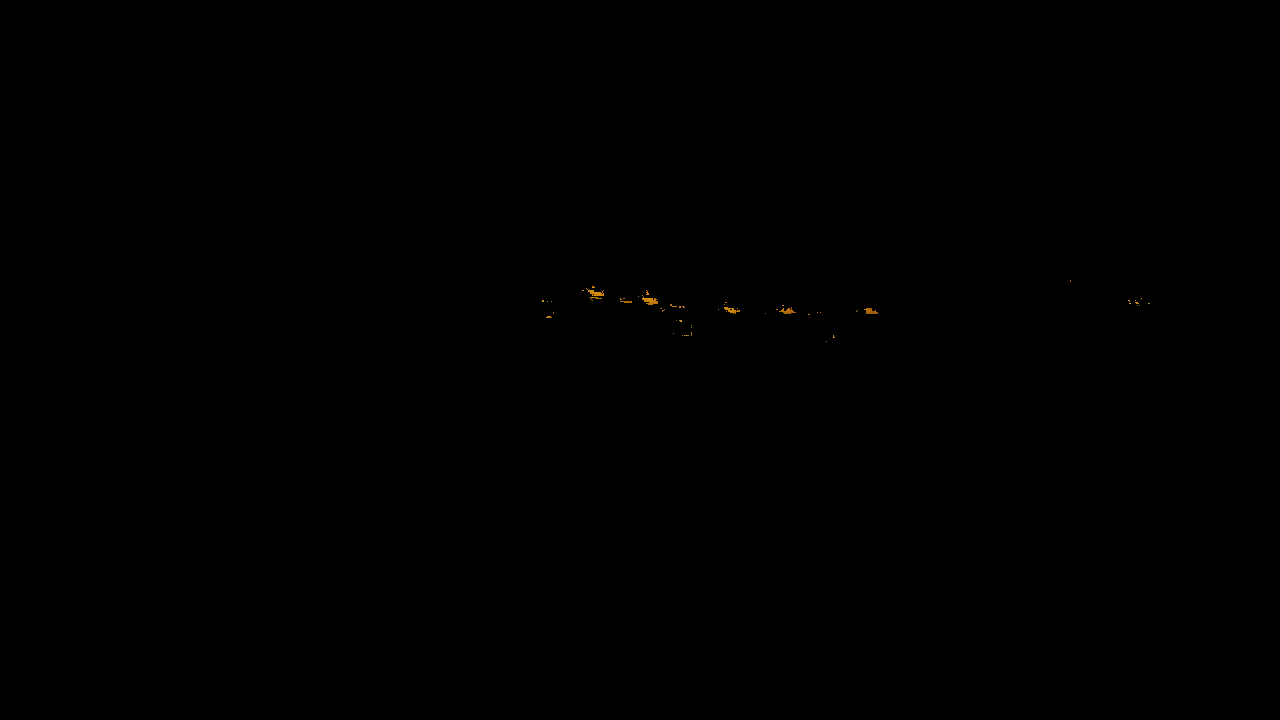

Cor vermelha detectada no frame 56


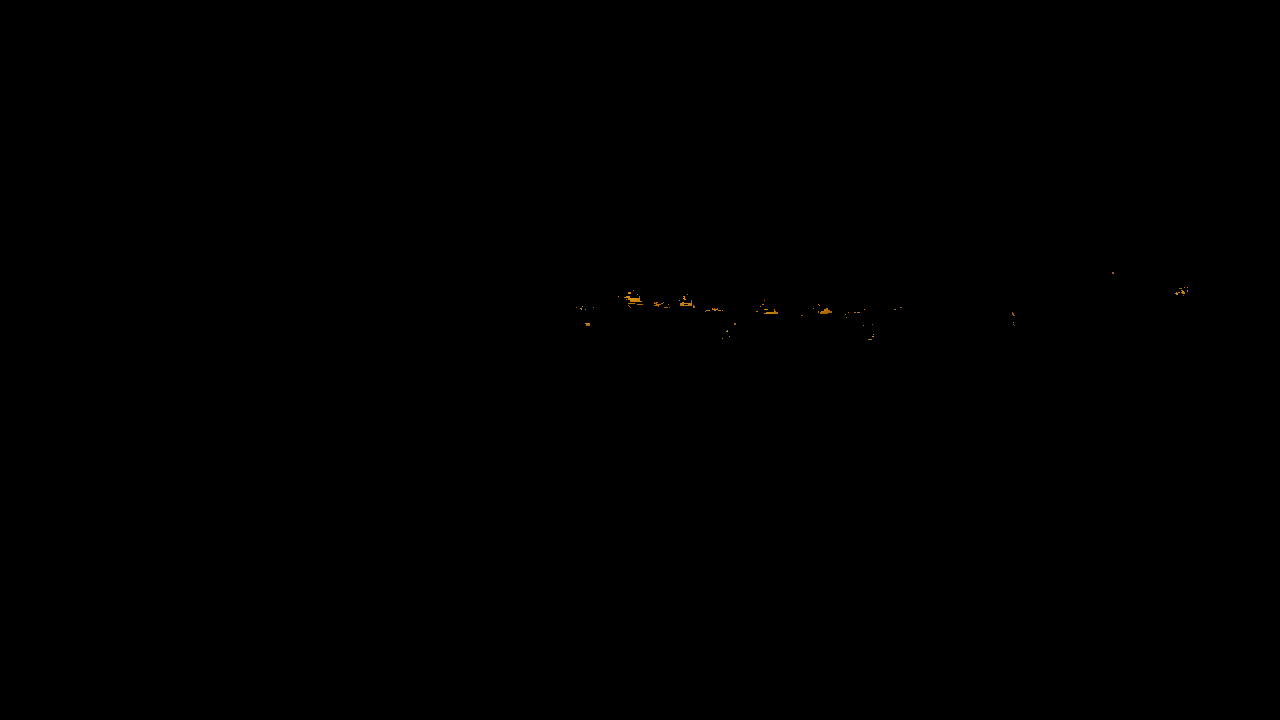

Cor vermelha detectada no frame 57


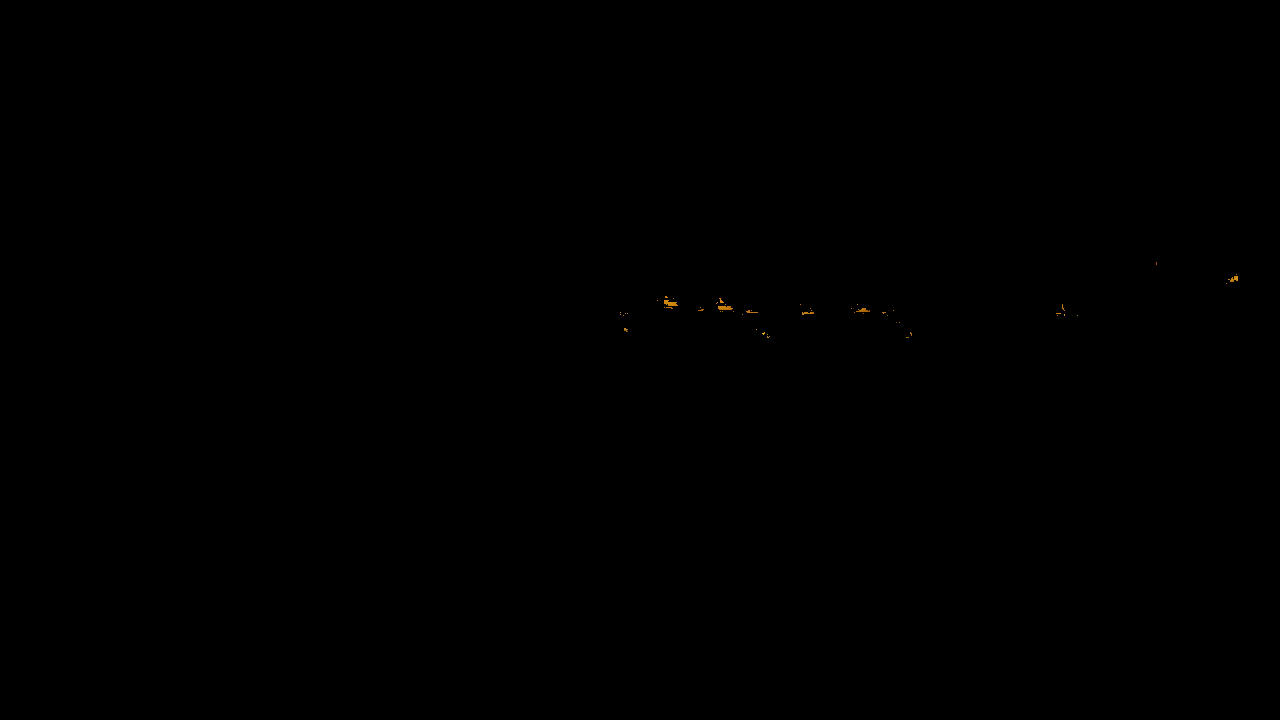

Cor vermelha detectada no frame 58


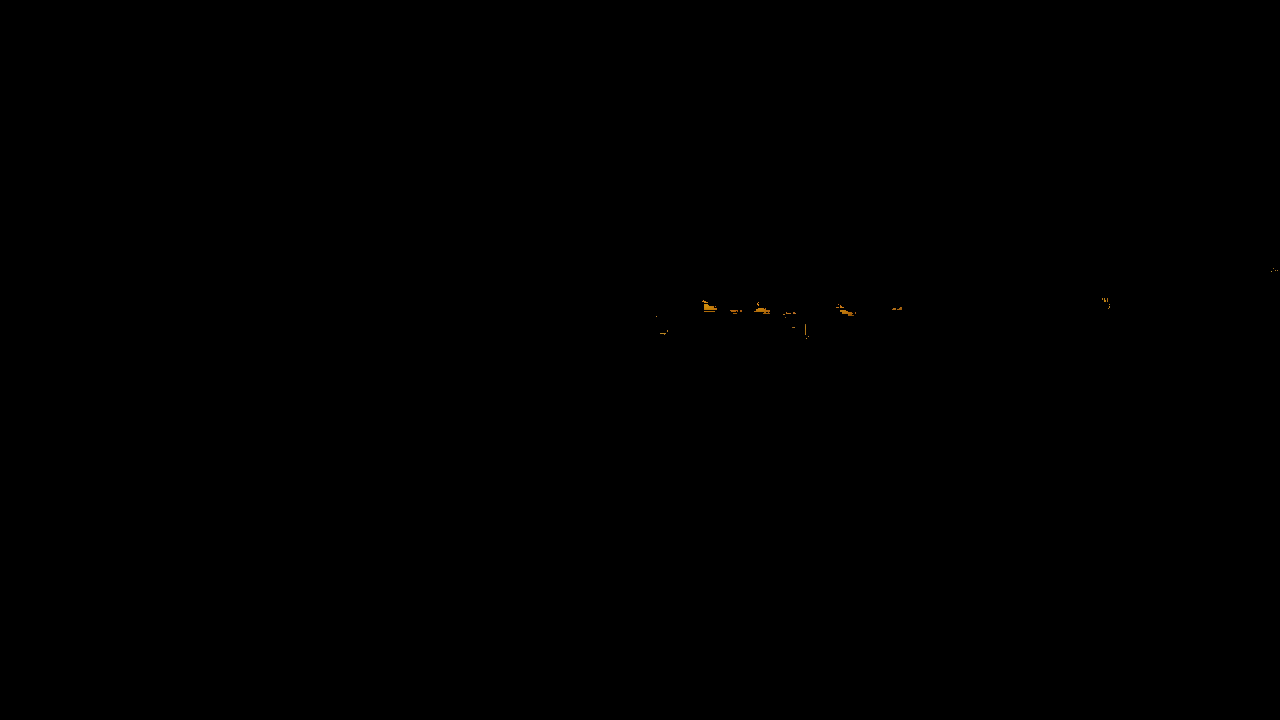

Cor vermelha detectada no frame 59


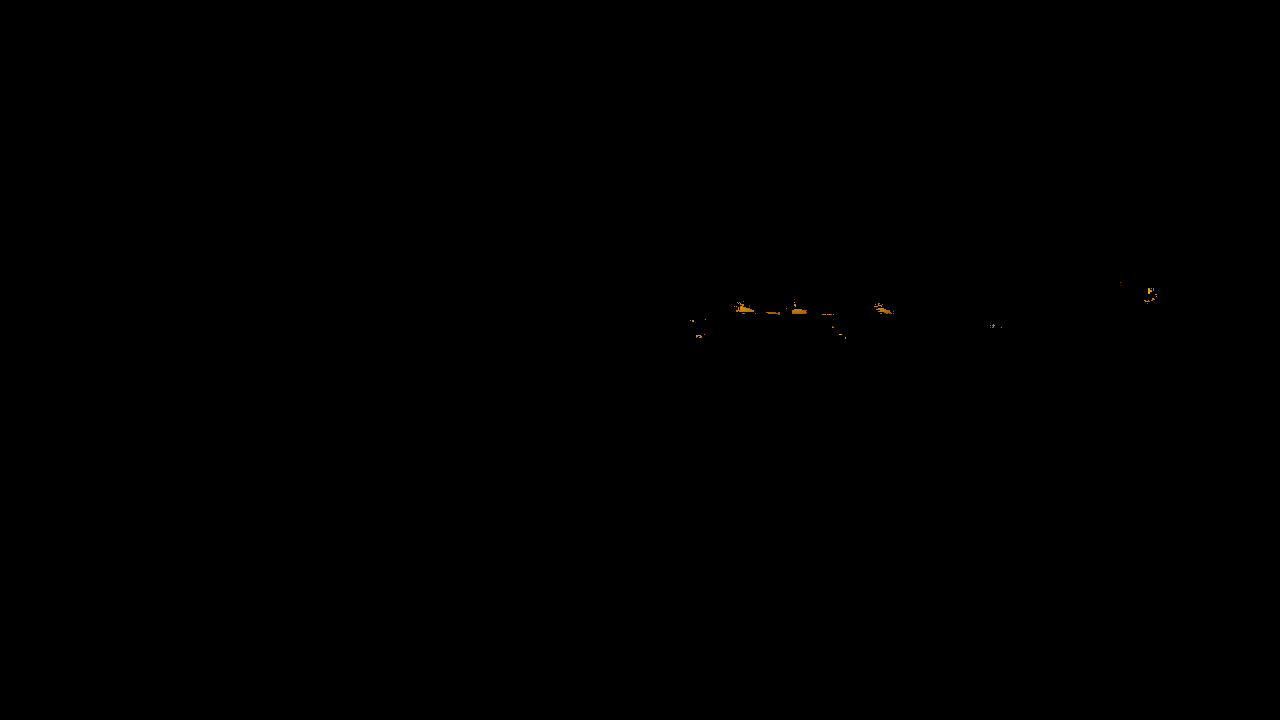

Cor vermelha detectada no frame 60


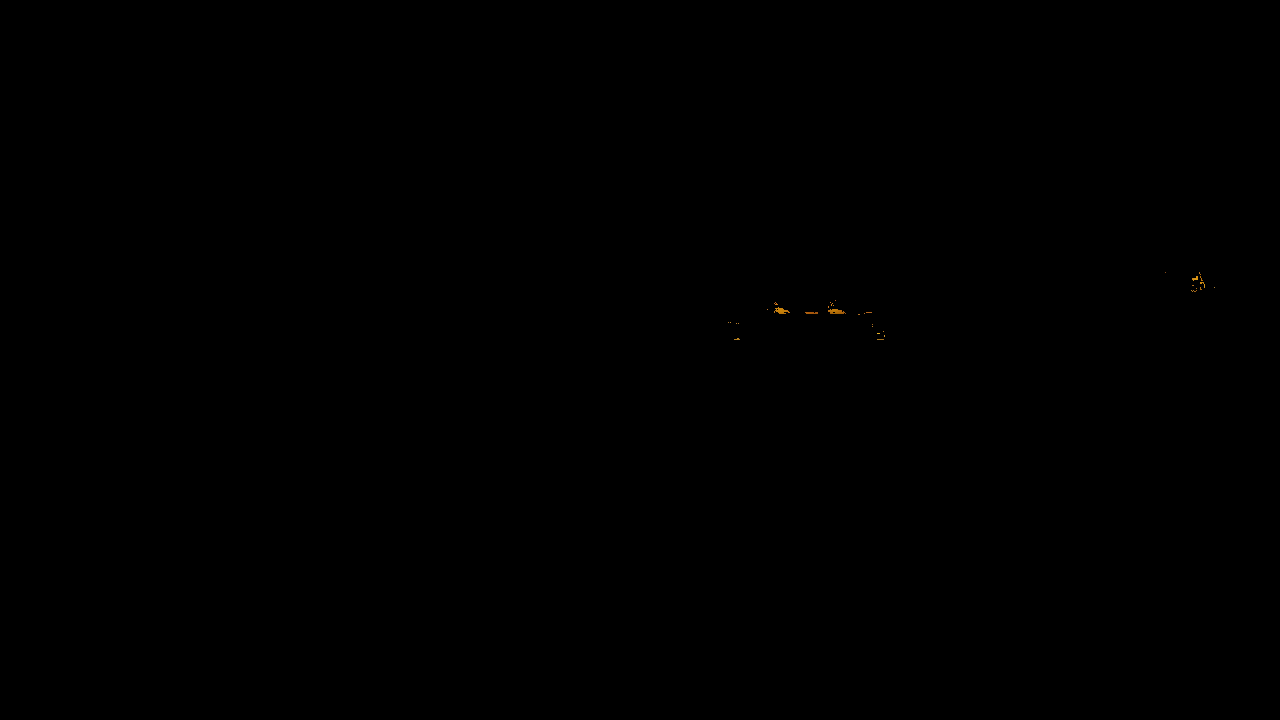

Cor vermelha detectada no frame 61


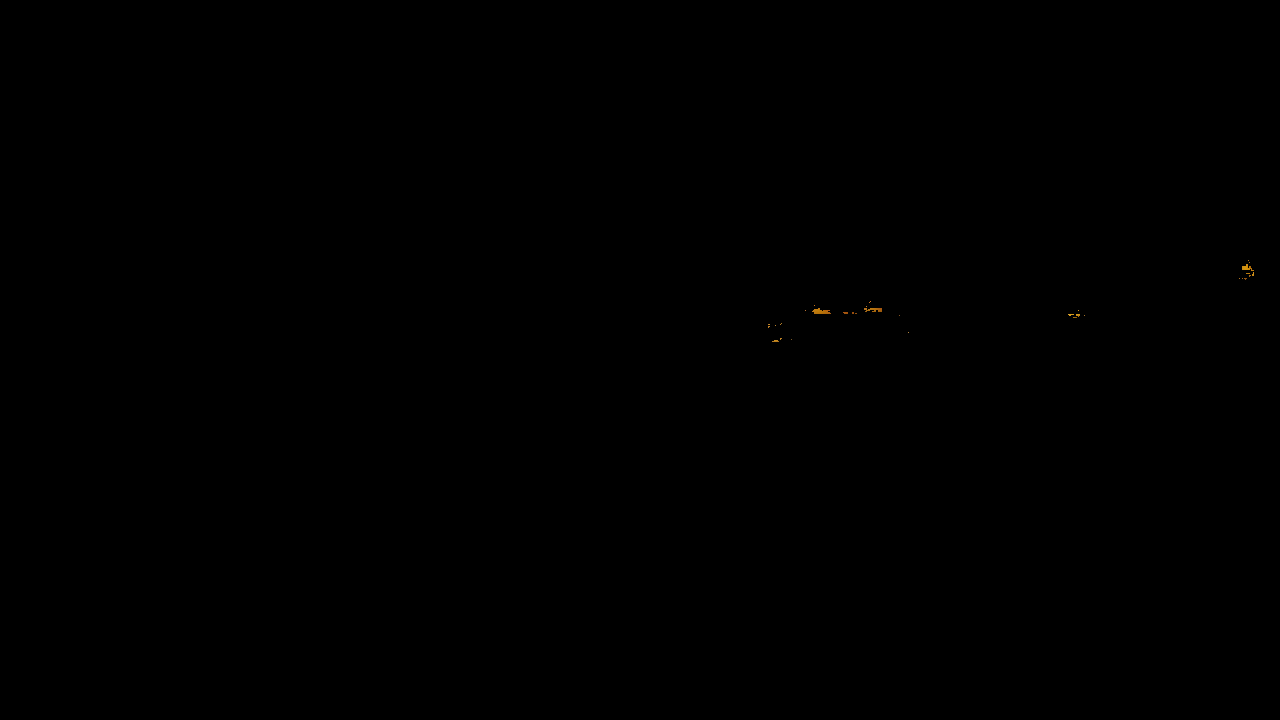

Cor vermelha detectada no frame 62


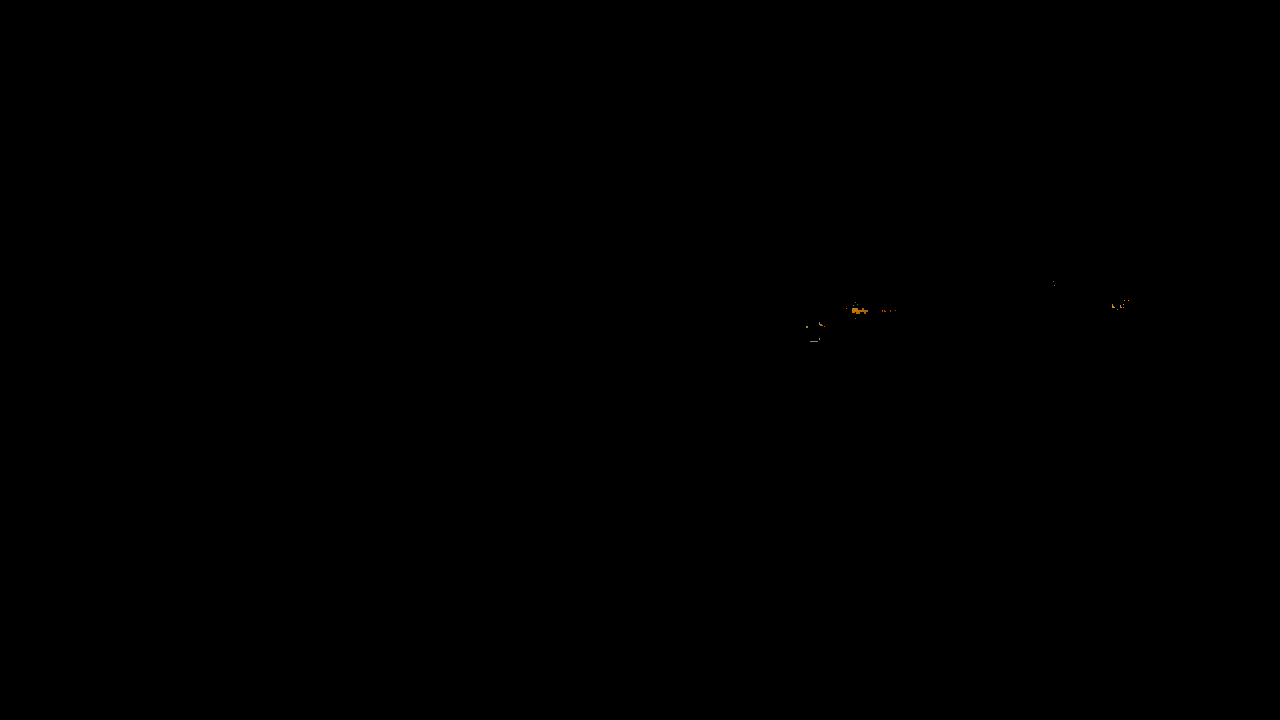

Cor vermelha detectada no frame 63


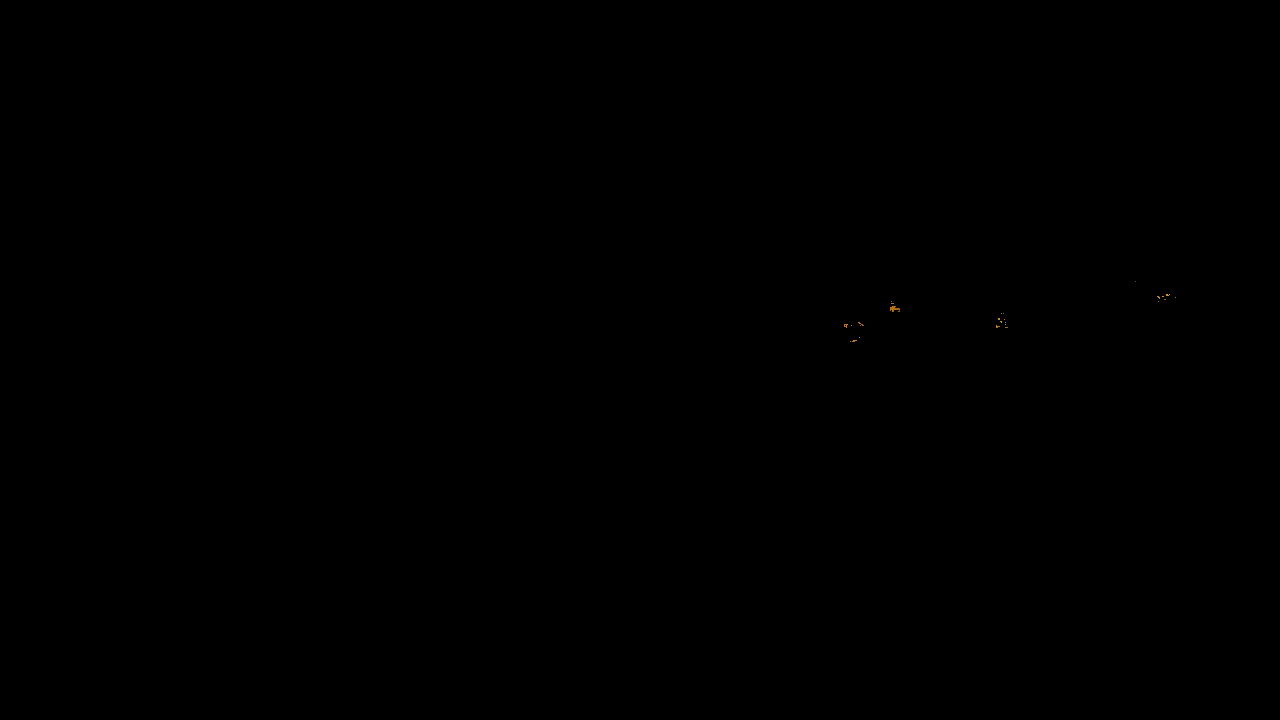

Cor vermelha detectada no frame 64


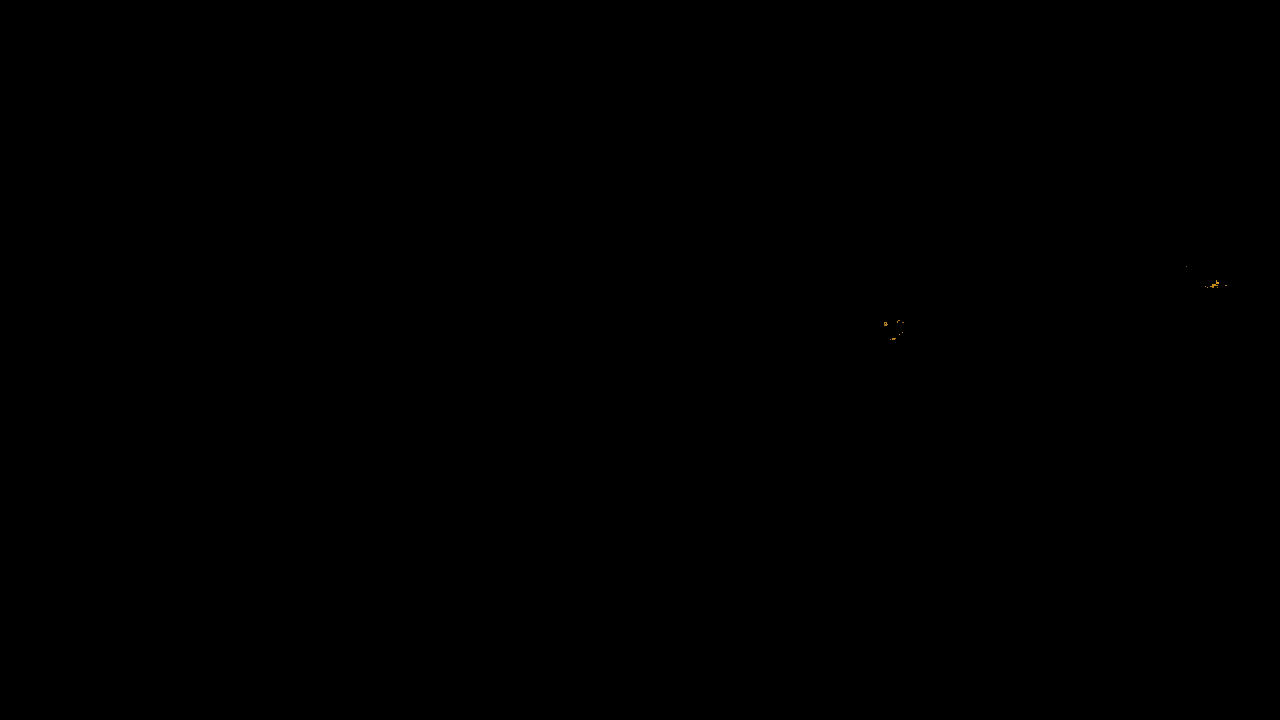

Cor vermelha detectada no frame 65


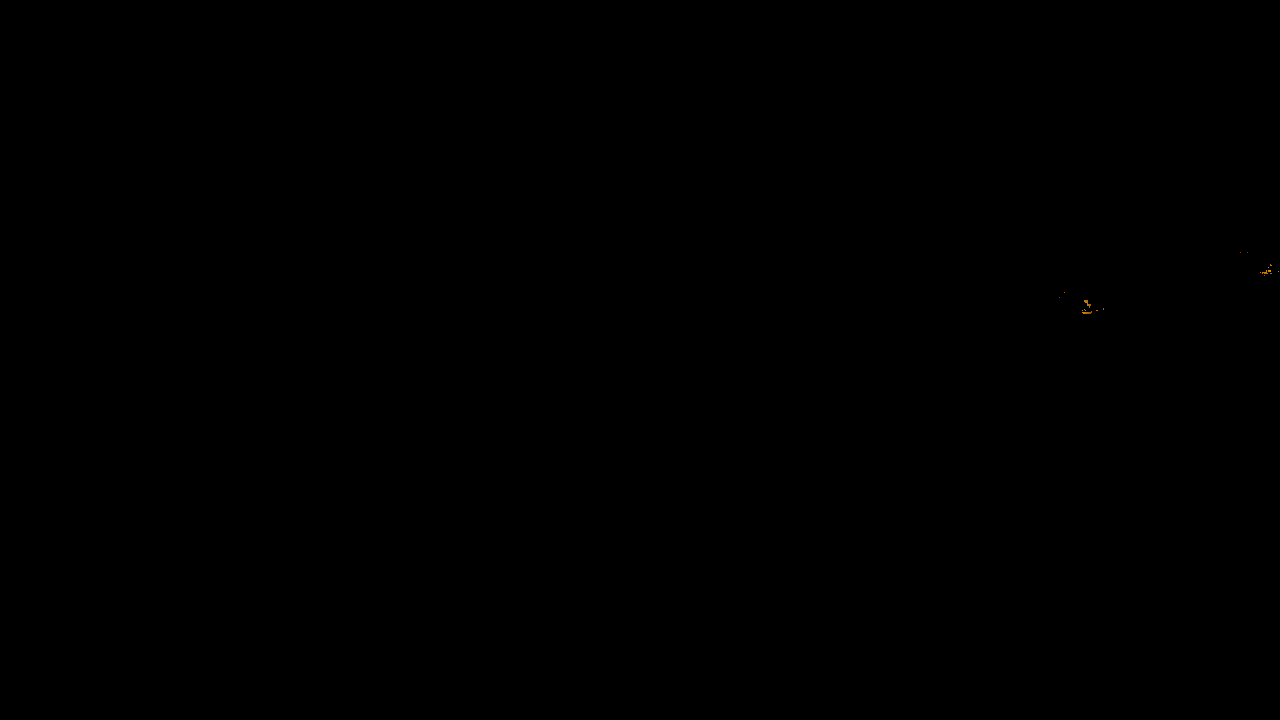

Cor vermelha detectada no frame 66


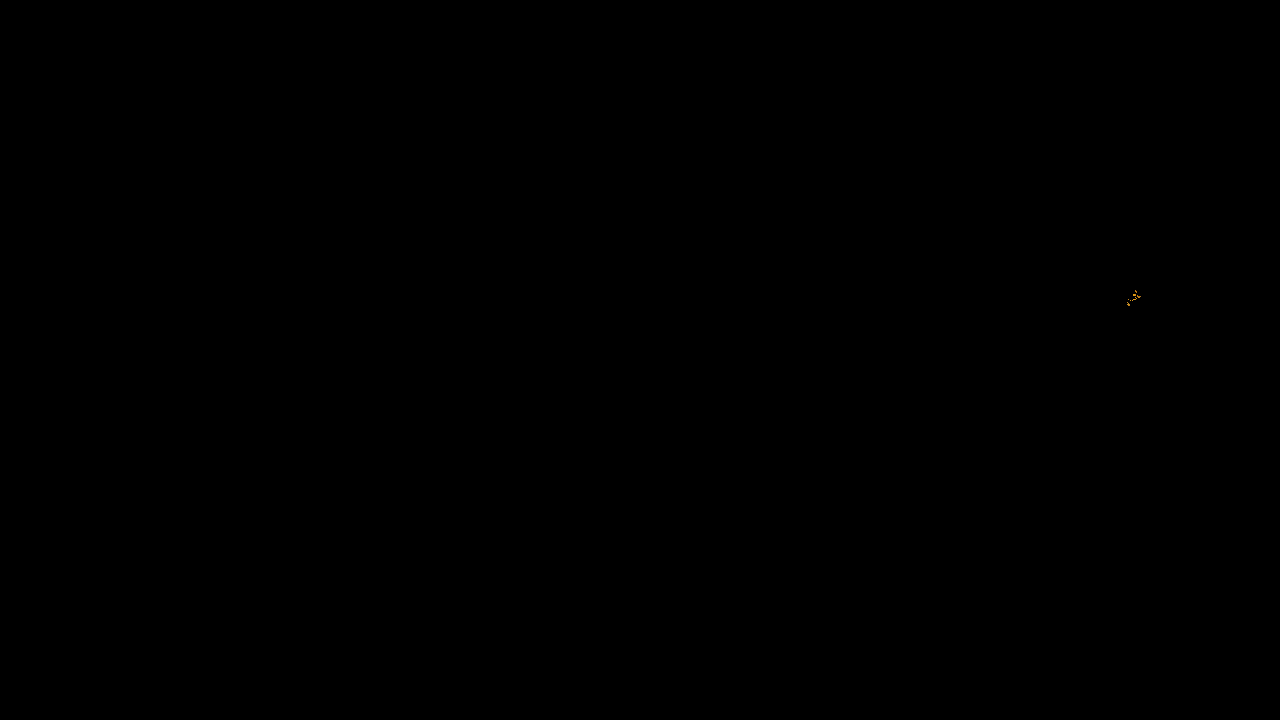

Cor vermelha detectada no frame 67


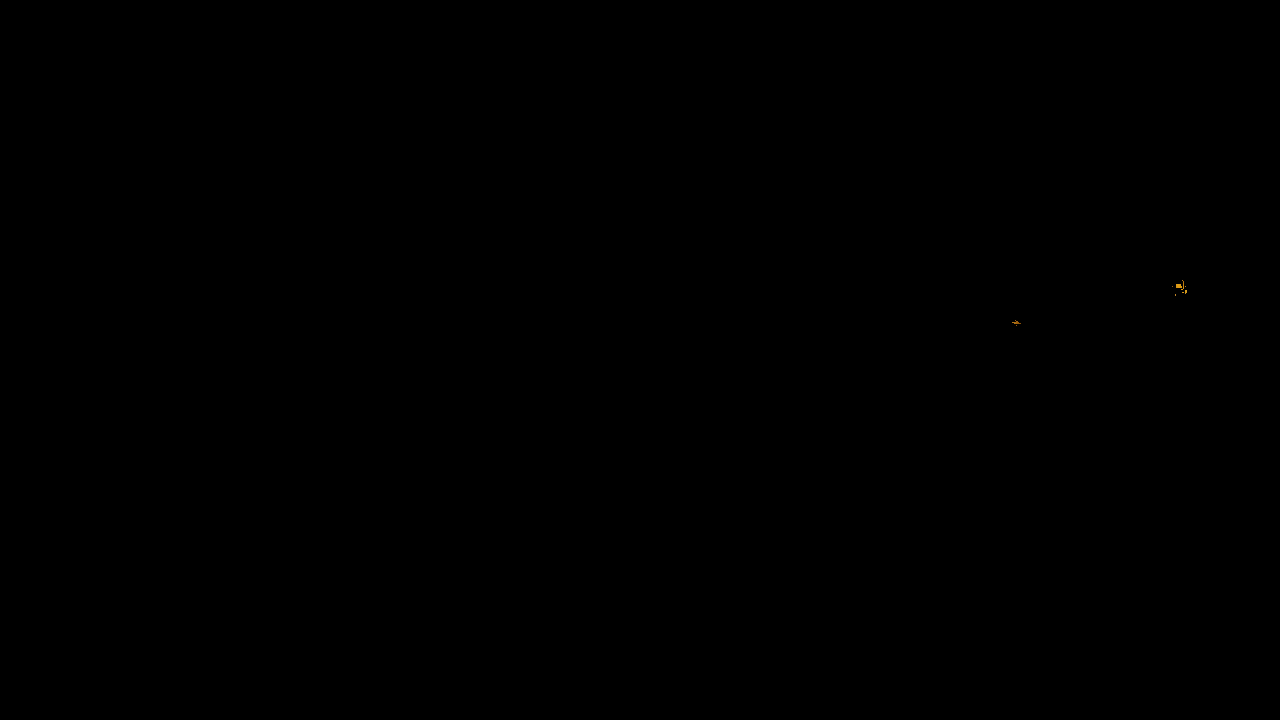

Cor vermelha detectada no frame 68


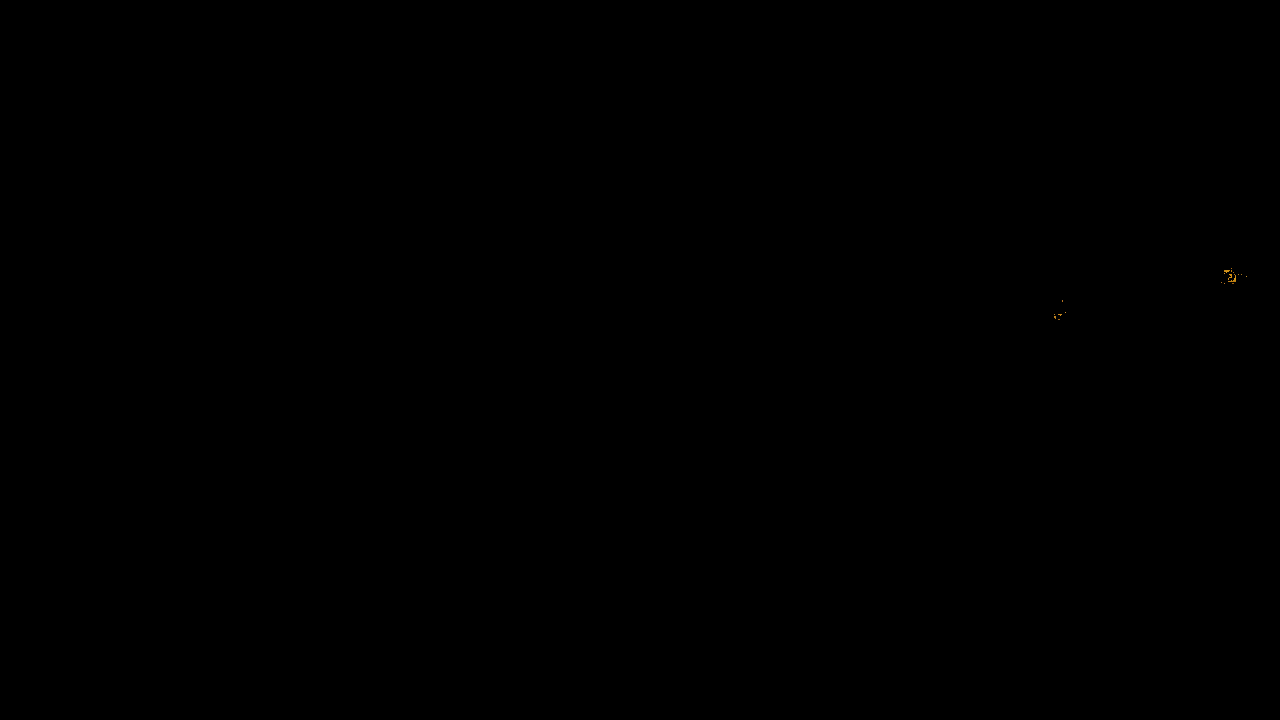

Cor vermelha detectada no frame 69


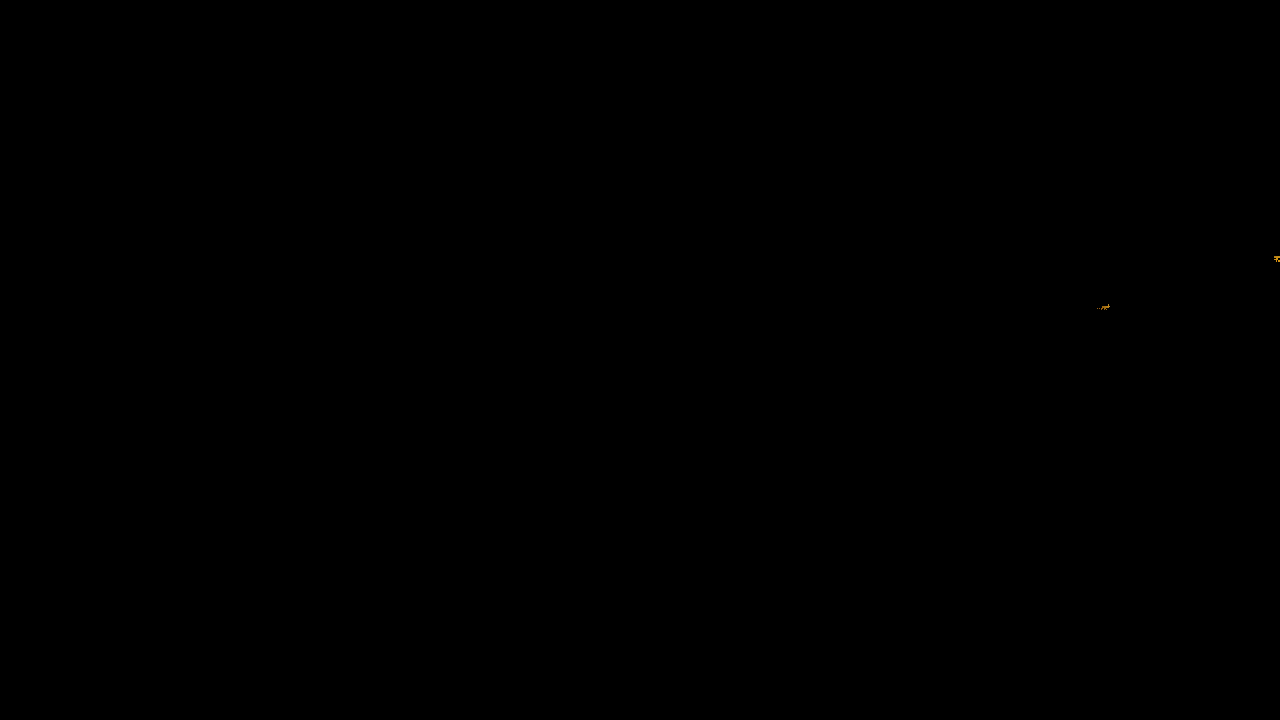

Cor vermelha detectada no frame 70


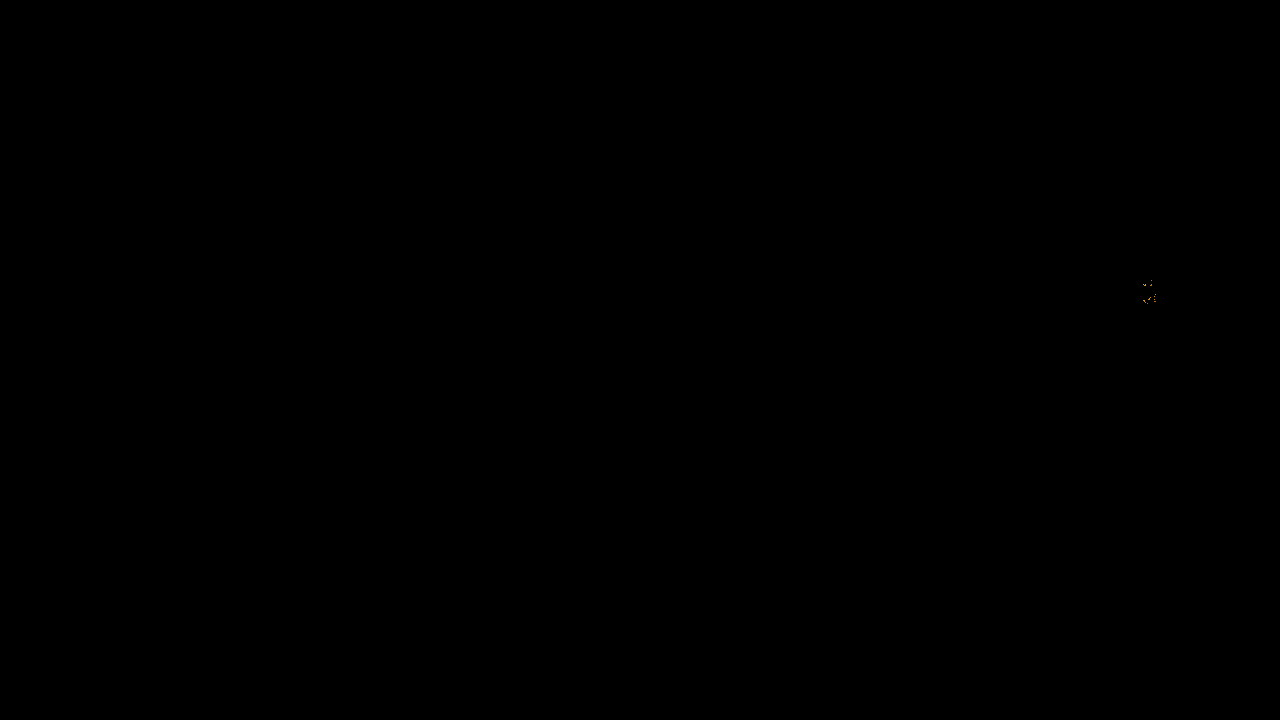

Cor vermelha detectada no frame 71


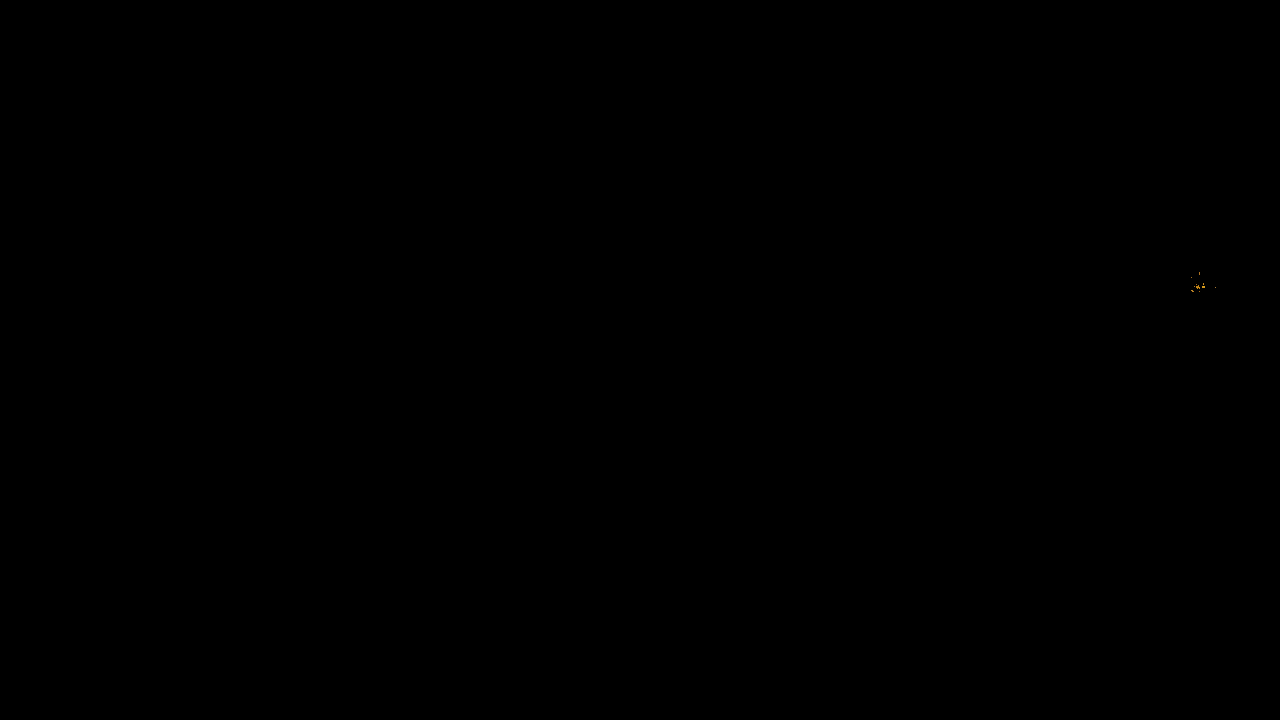

Cor vermelha detectada no frame 72


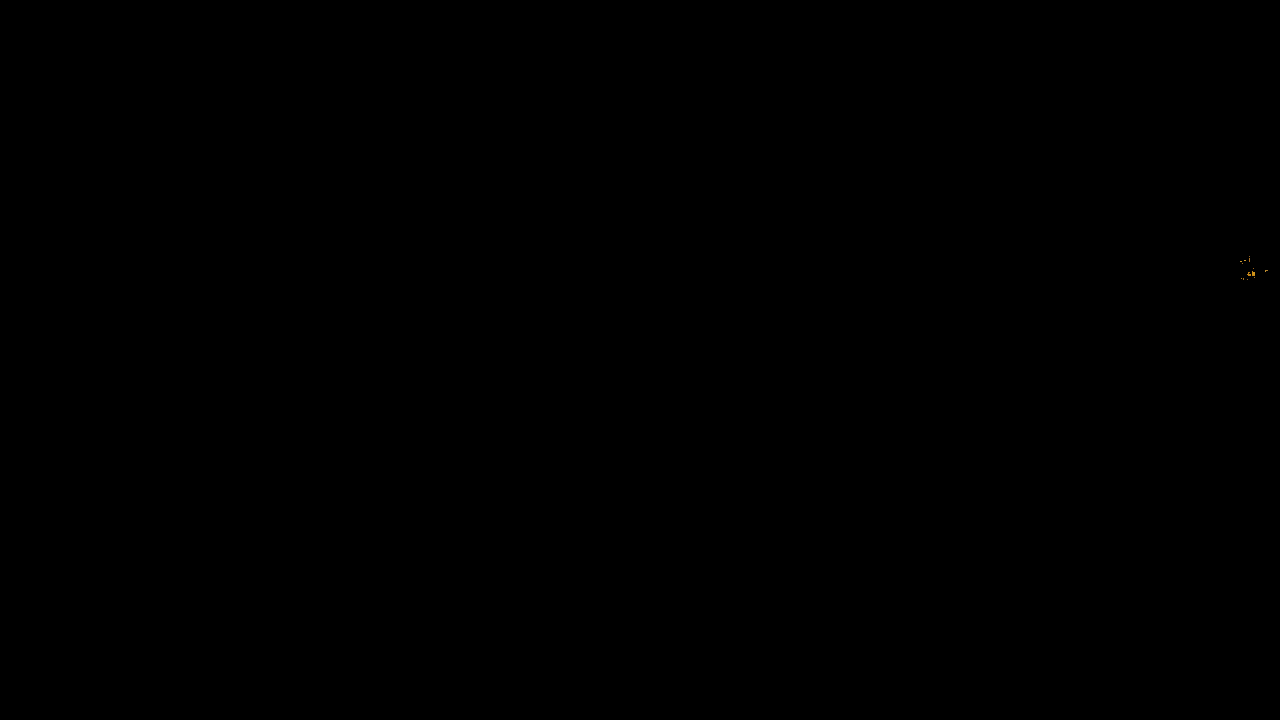

Cor vermelha detectada no frame 129


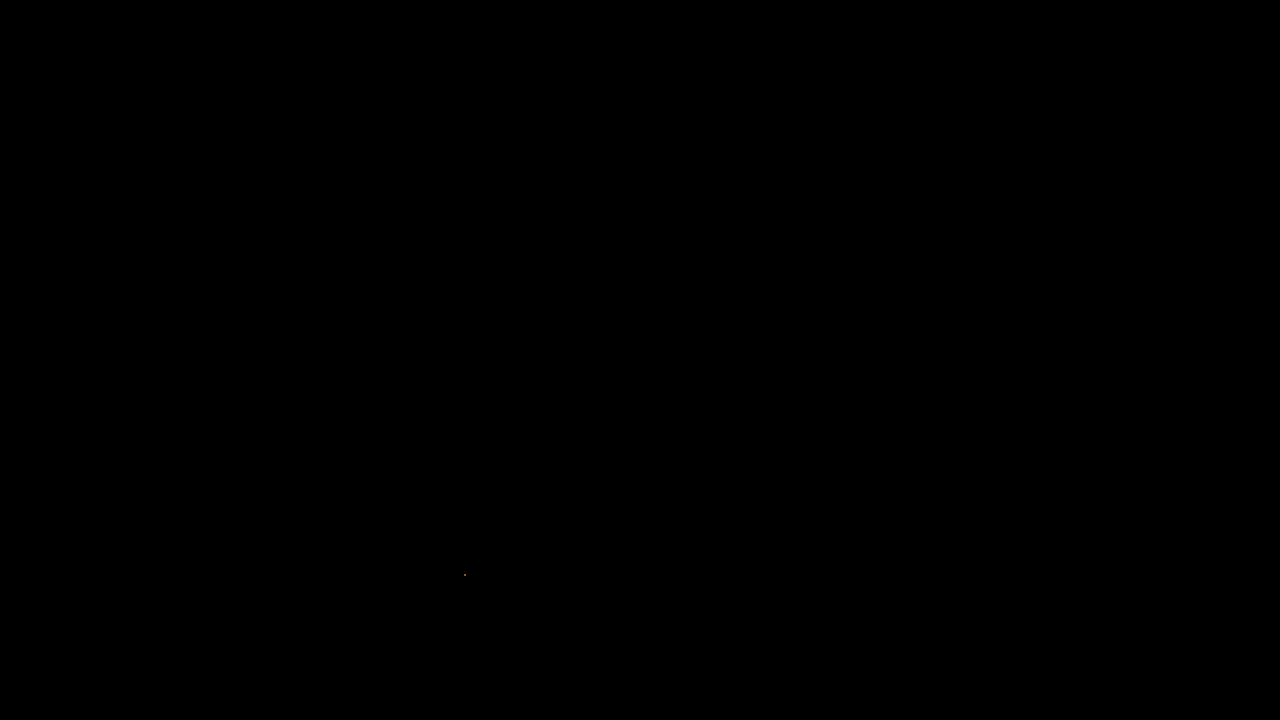

Cor vermelha detectada no frame 130


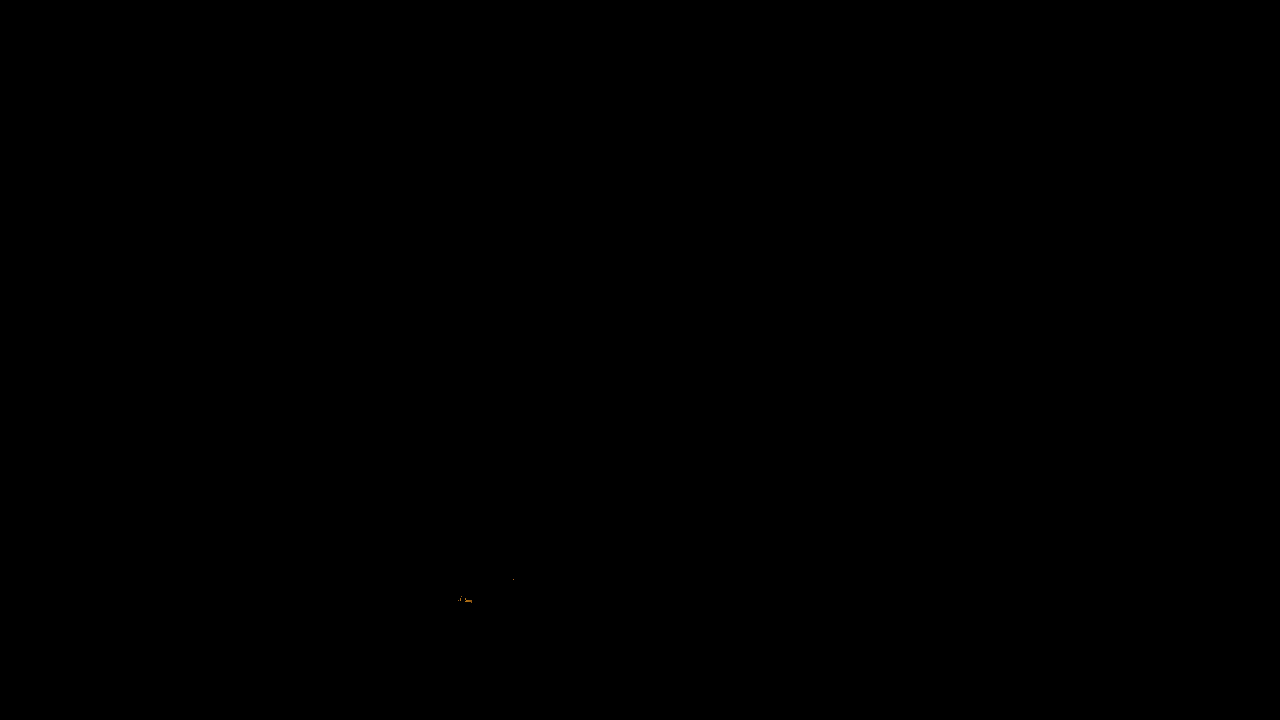

Cor vermelha detectada no frame 131


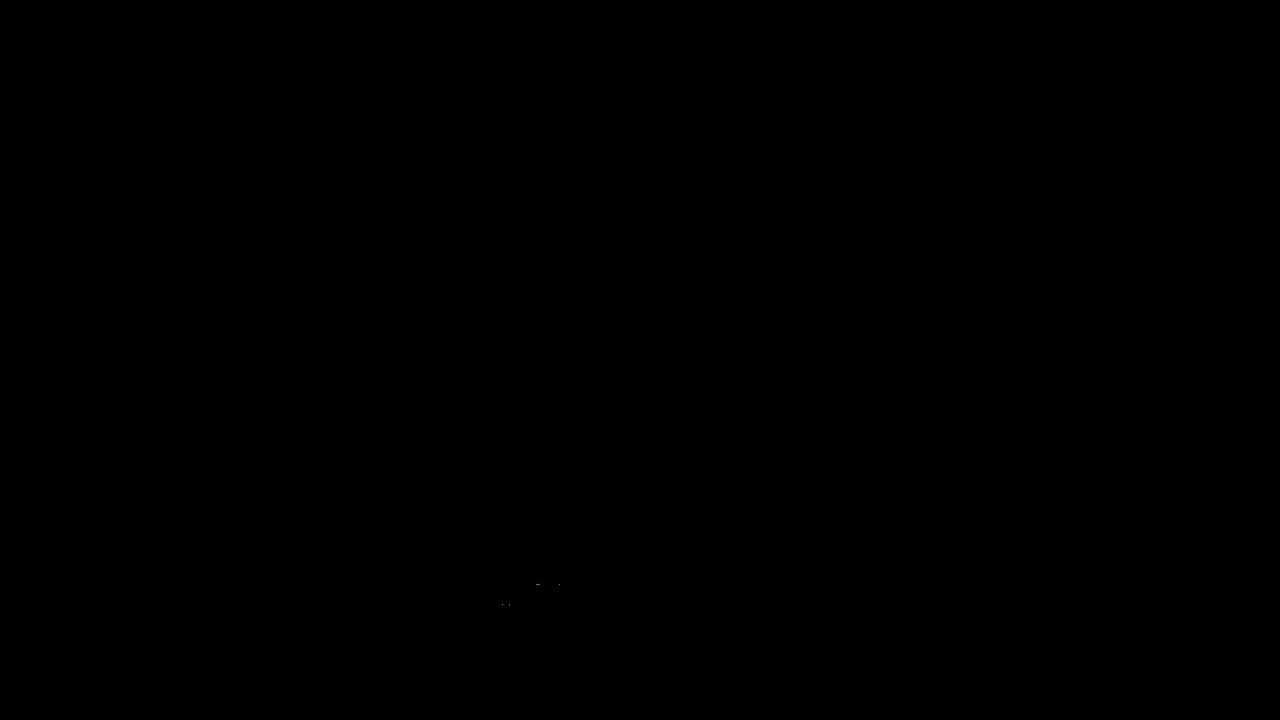

Cor vermelha detectada no frame 132


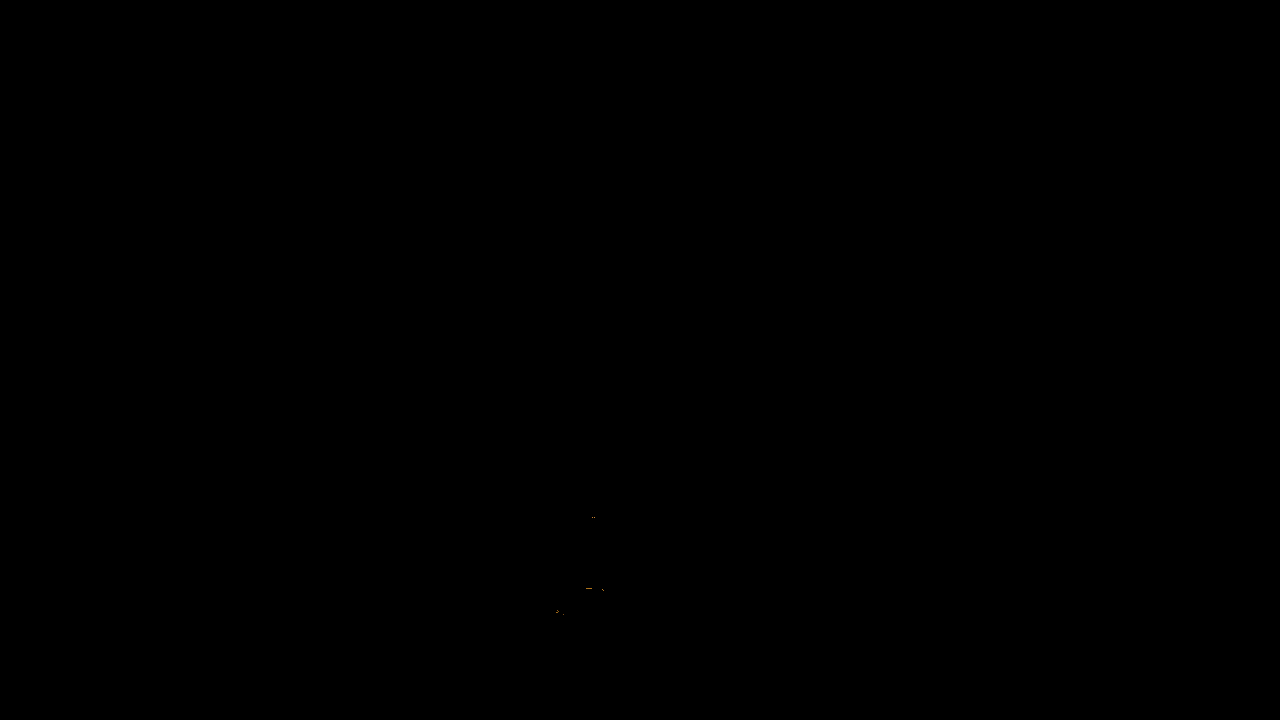

Cor vermelha detectada no frame 133


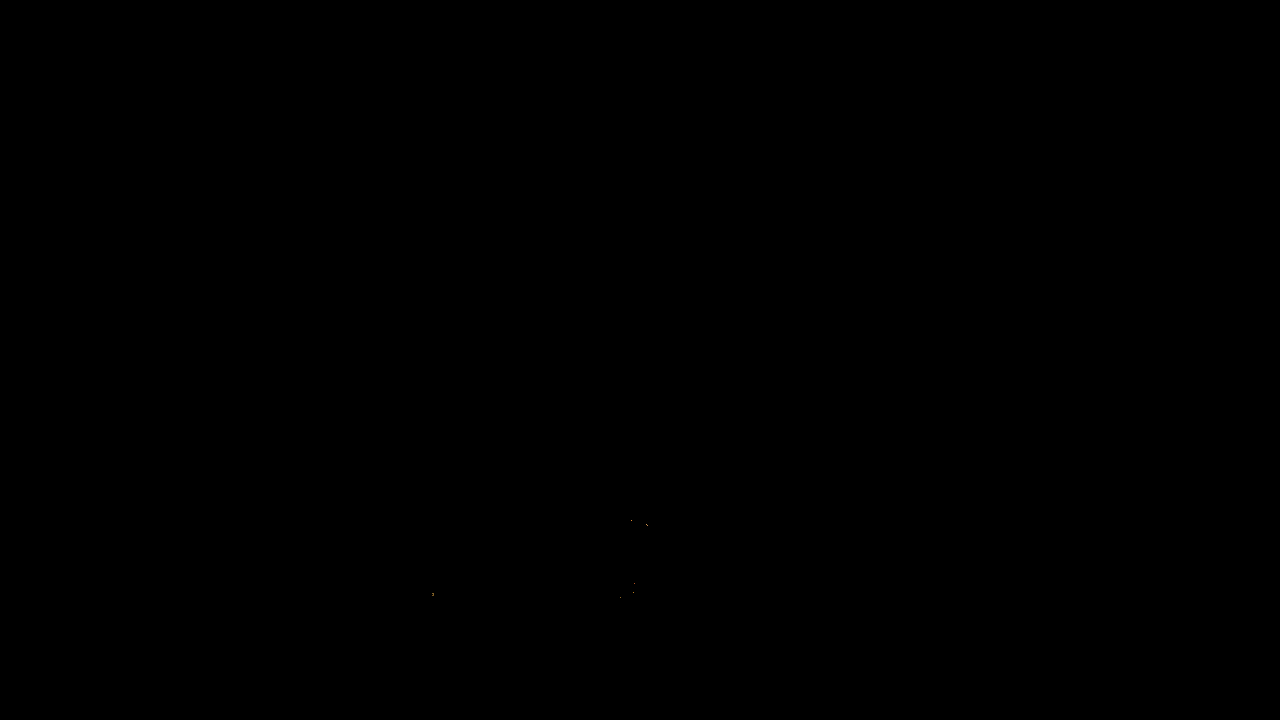

Cor vermelha detectada no frame 134


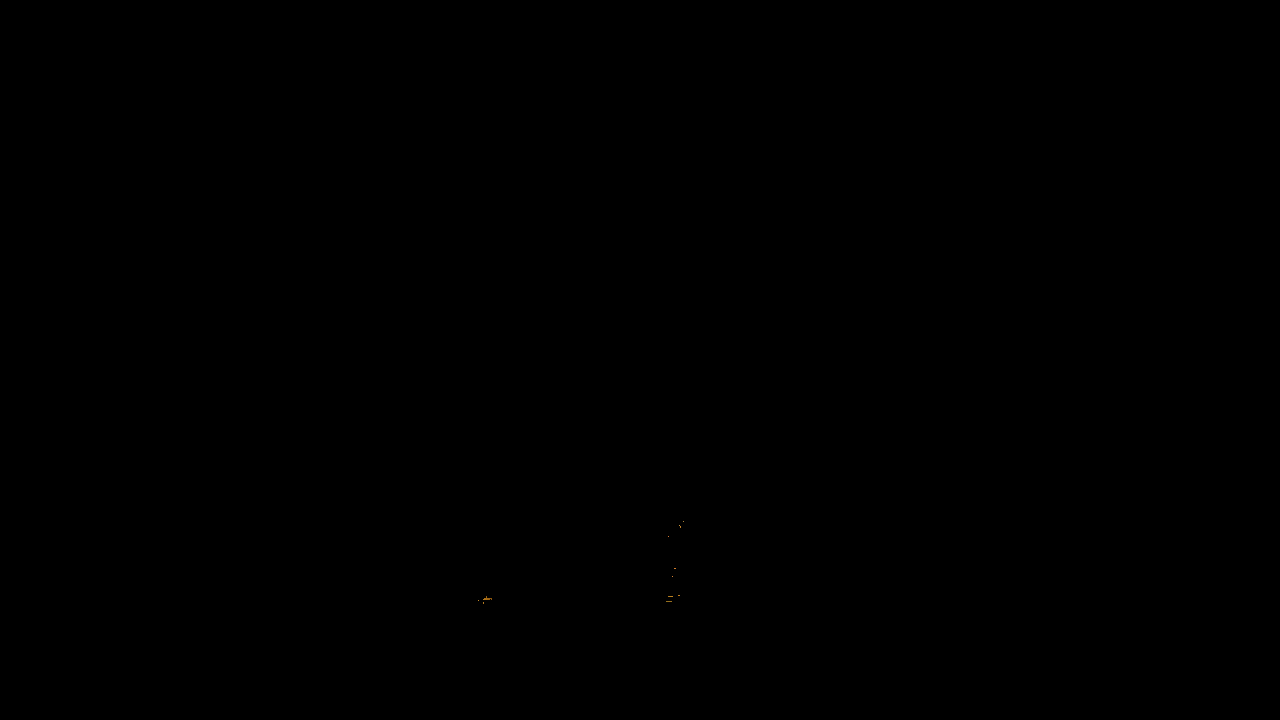

Cor vermelha detectada no frame 135


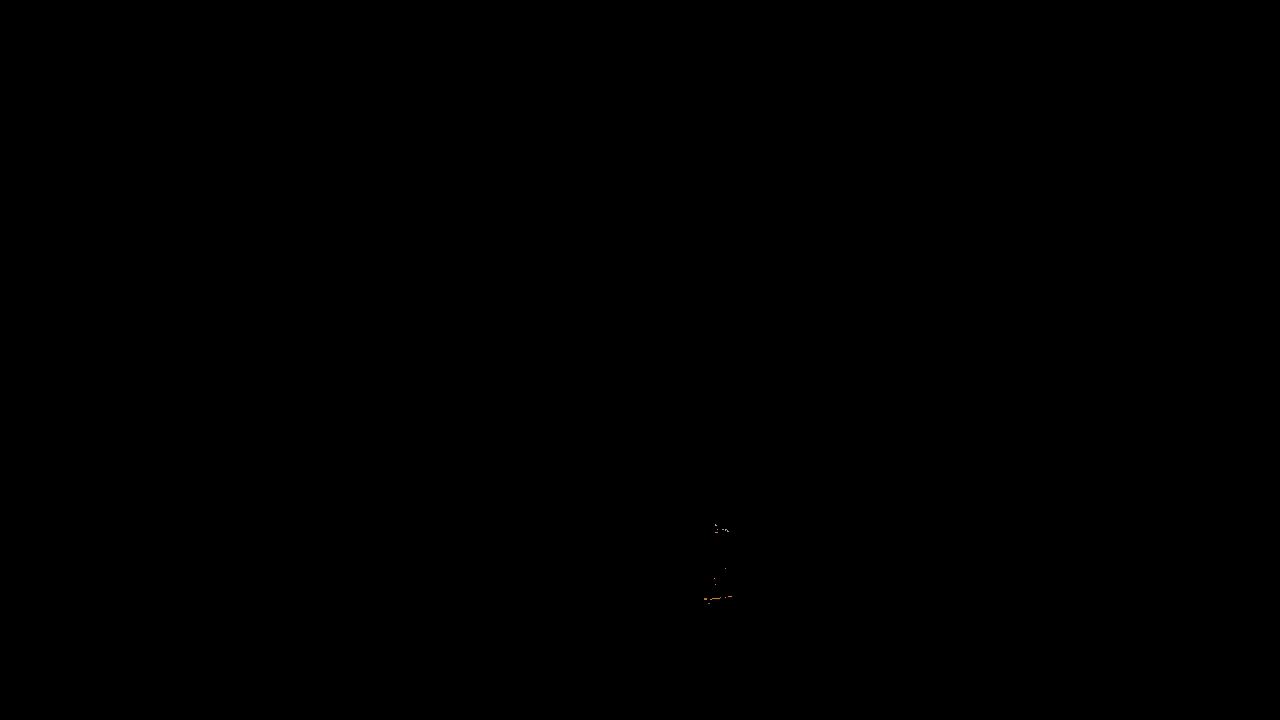

Cor vermelha detectada no frame 136


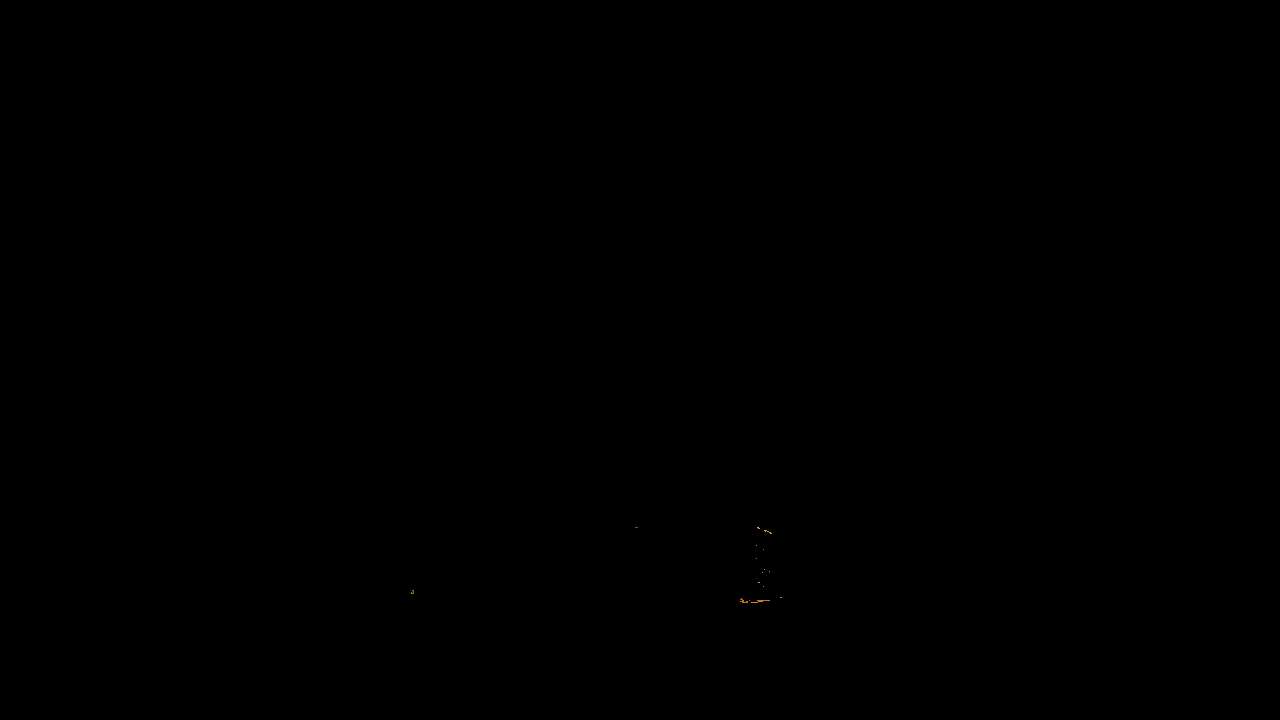

Cor vermelha detectada no frame 137


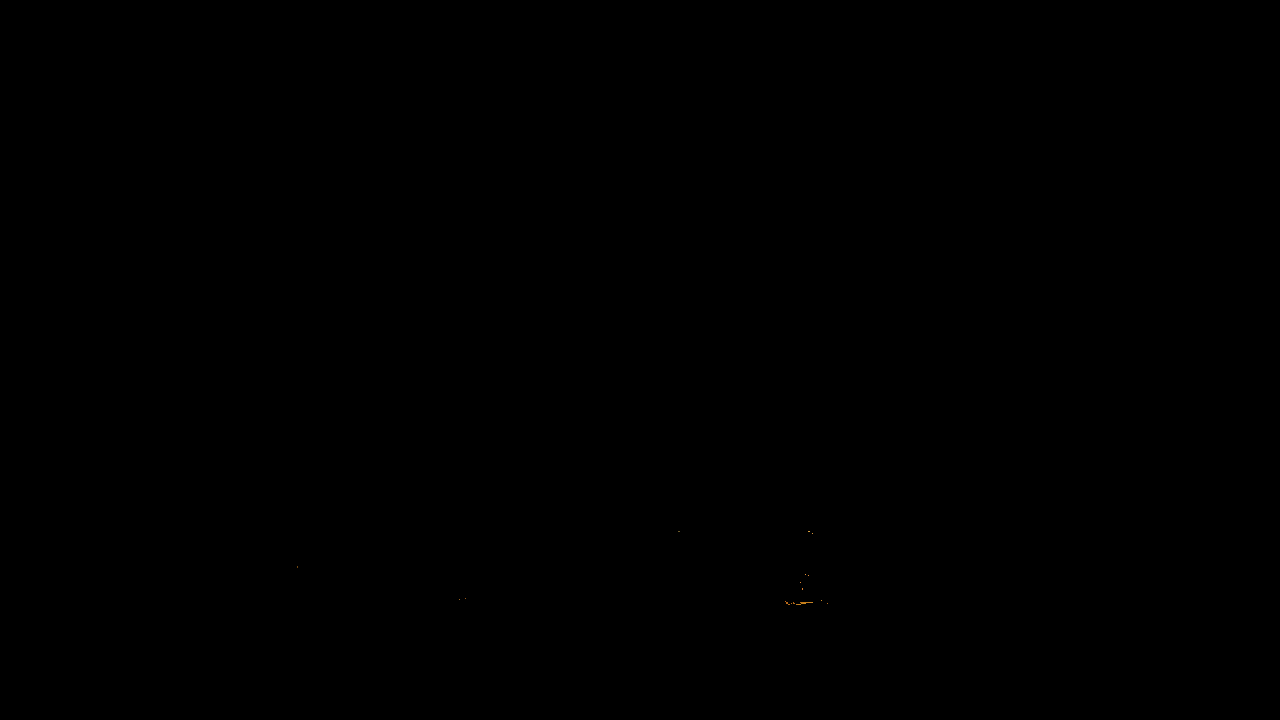

Cor vermelha detectada no frame 138


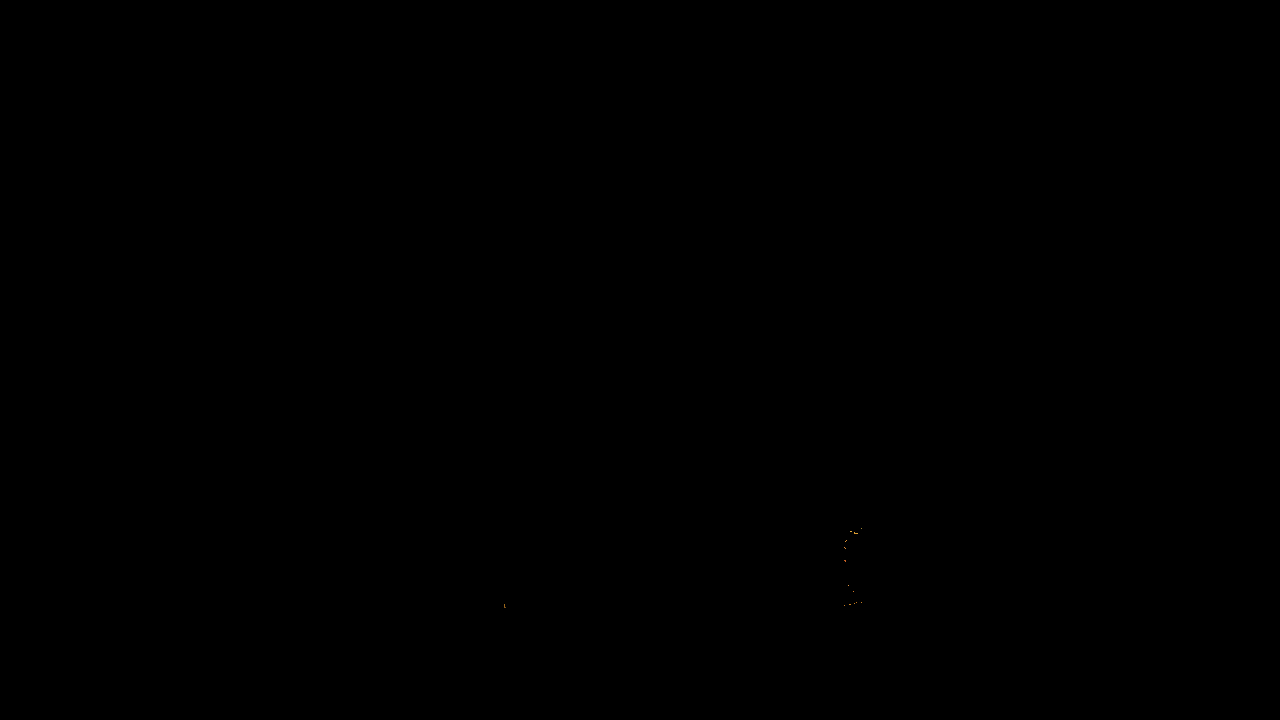

Cor vermelha detectada no frame 139


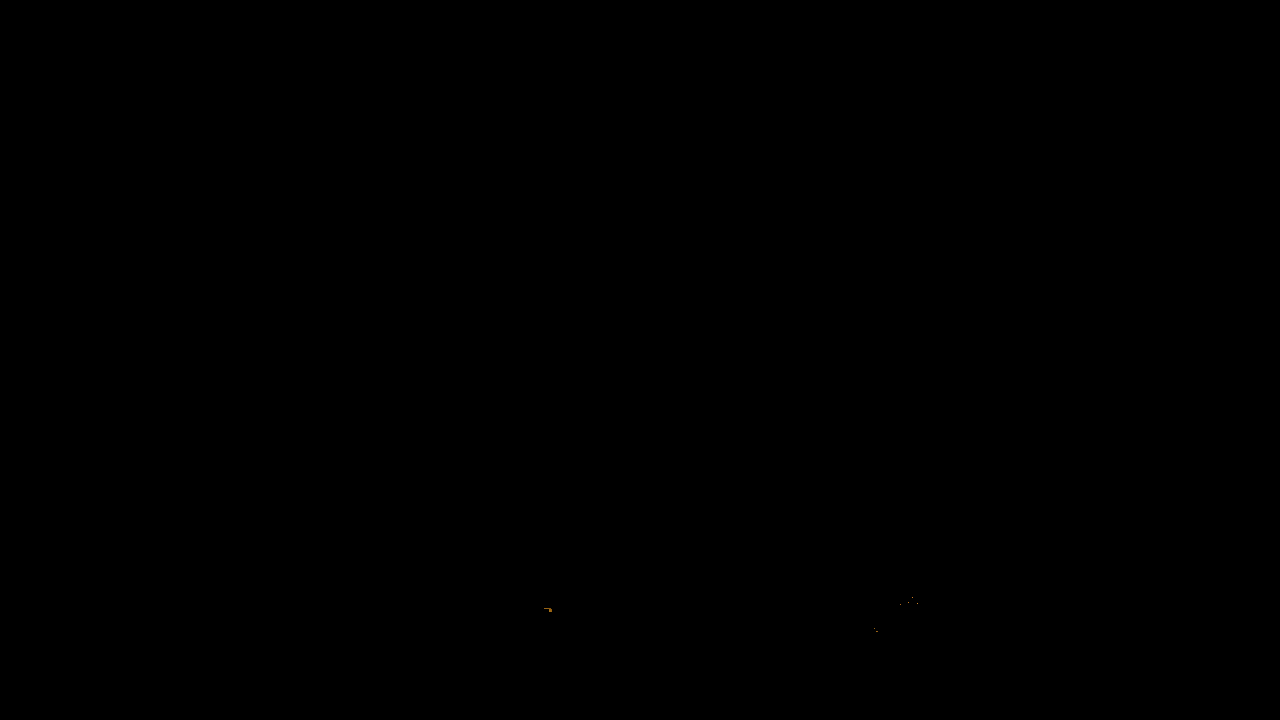

Cor vermelha detectada no frame 140


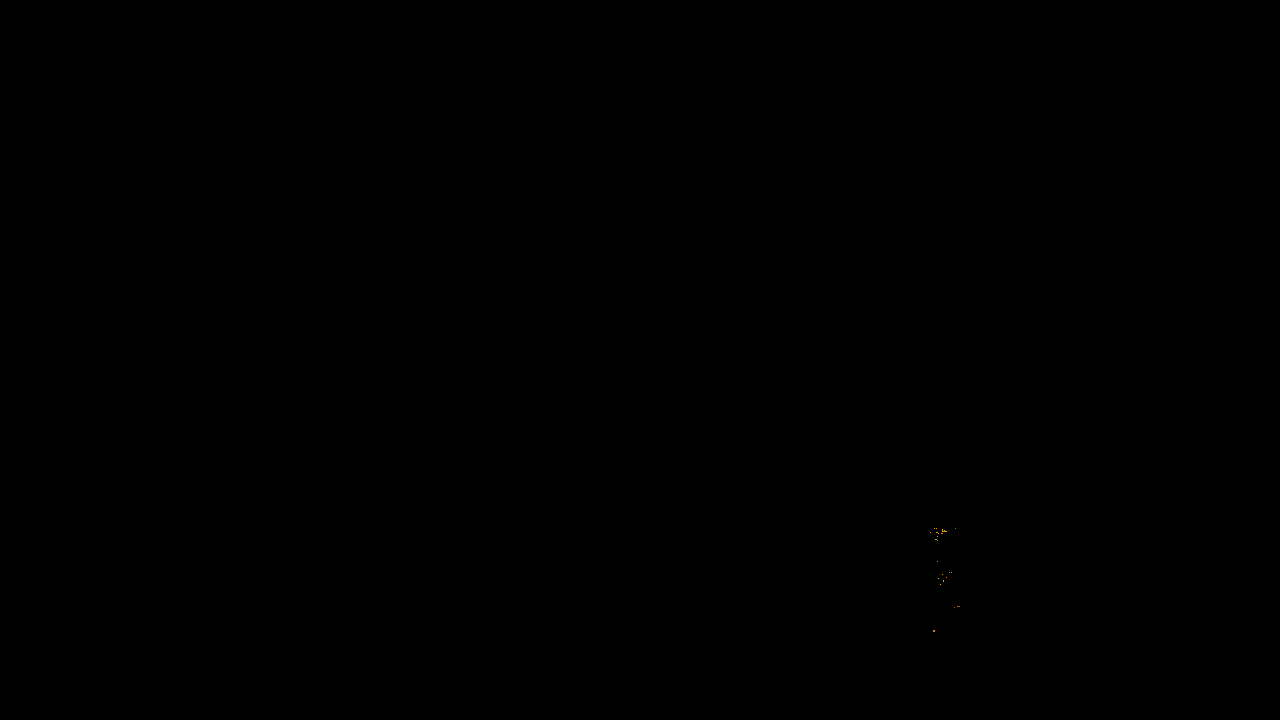

Cor vermelha detectada no frame 141


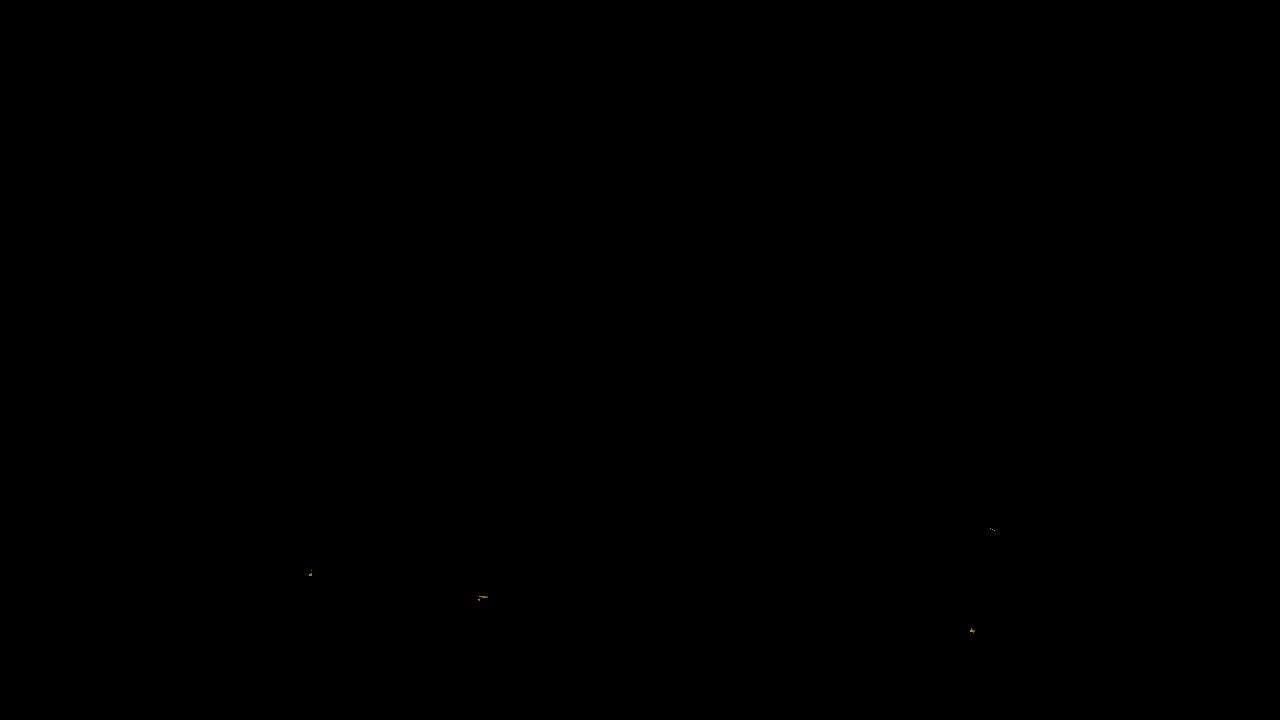

Cor vermelha detectada no frame 142


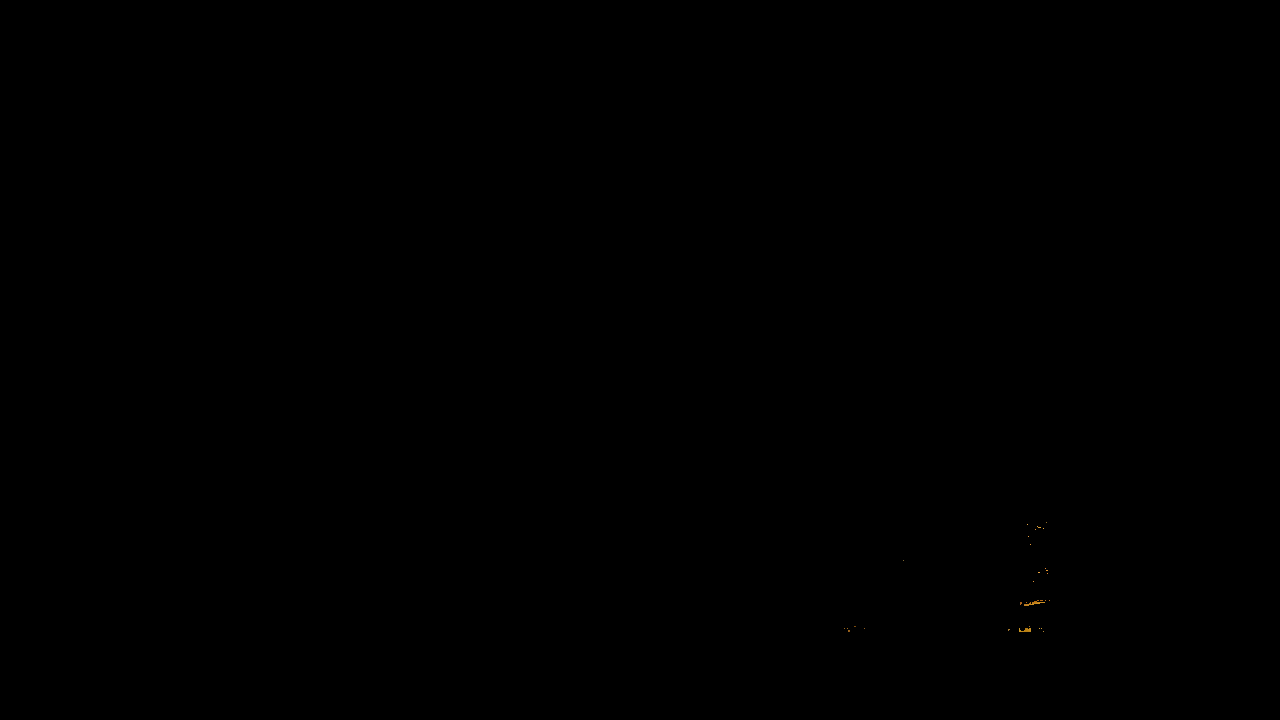

Cor vermelha detectada no frame 143


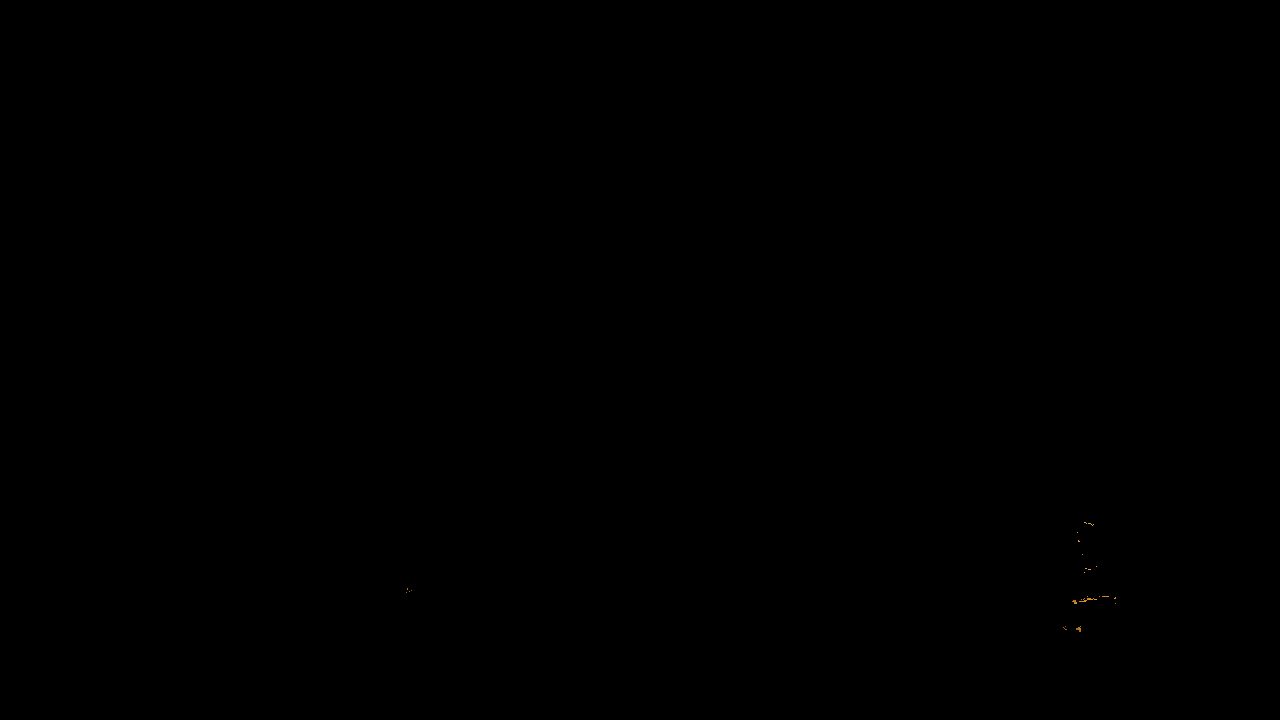

Cor vermelha detectada no frame 144


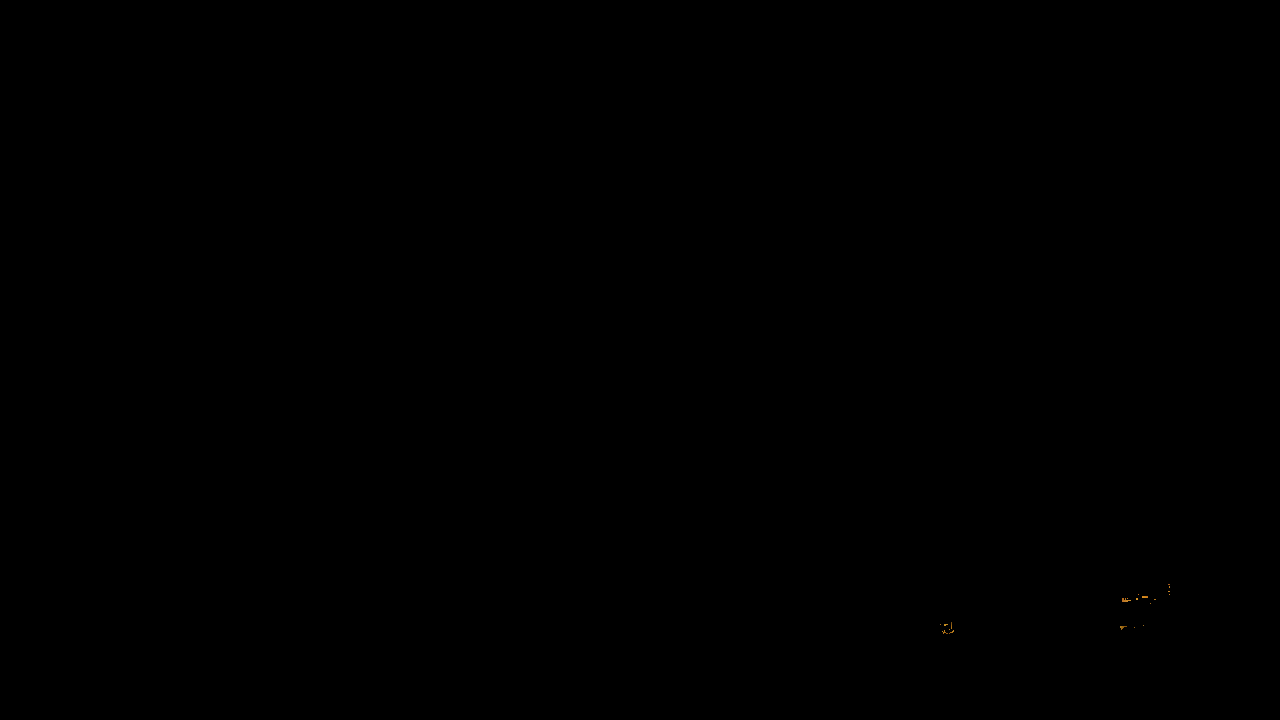

Cor vermelha detectada no frame 145


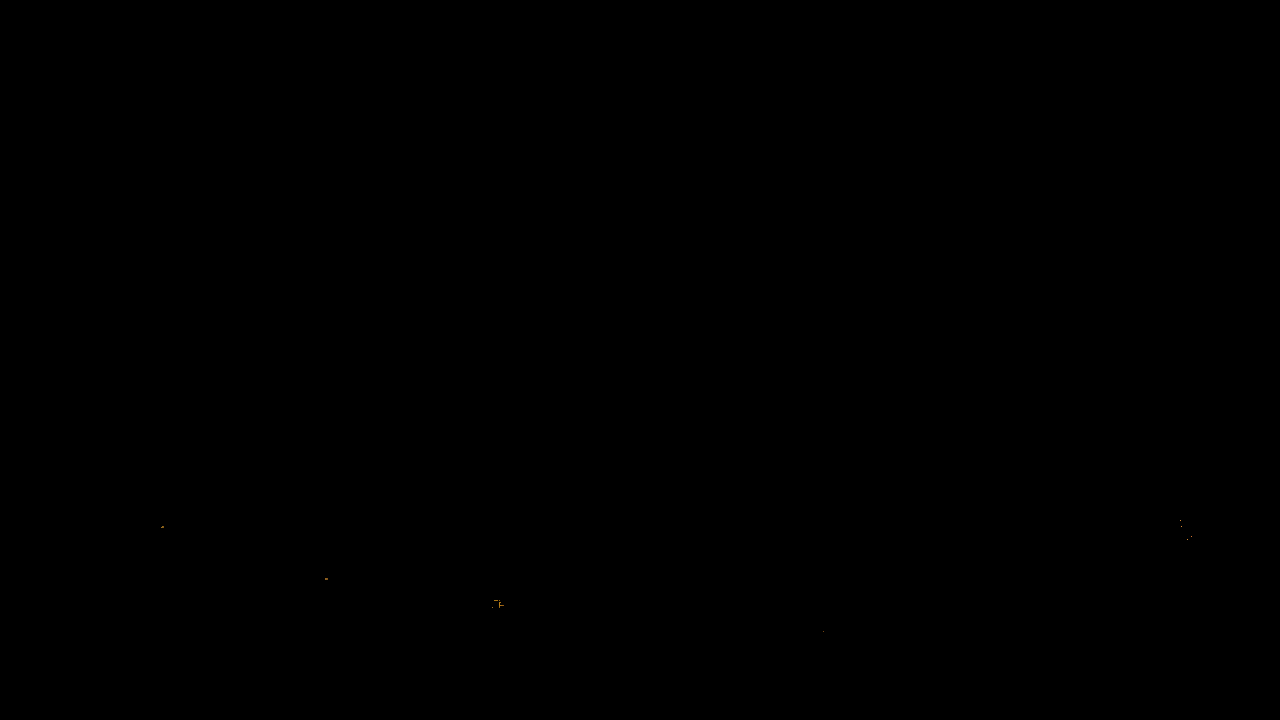

Cor vermelha detectada no frame 146


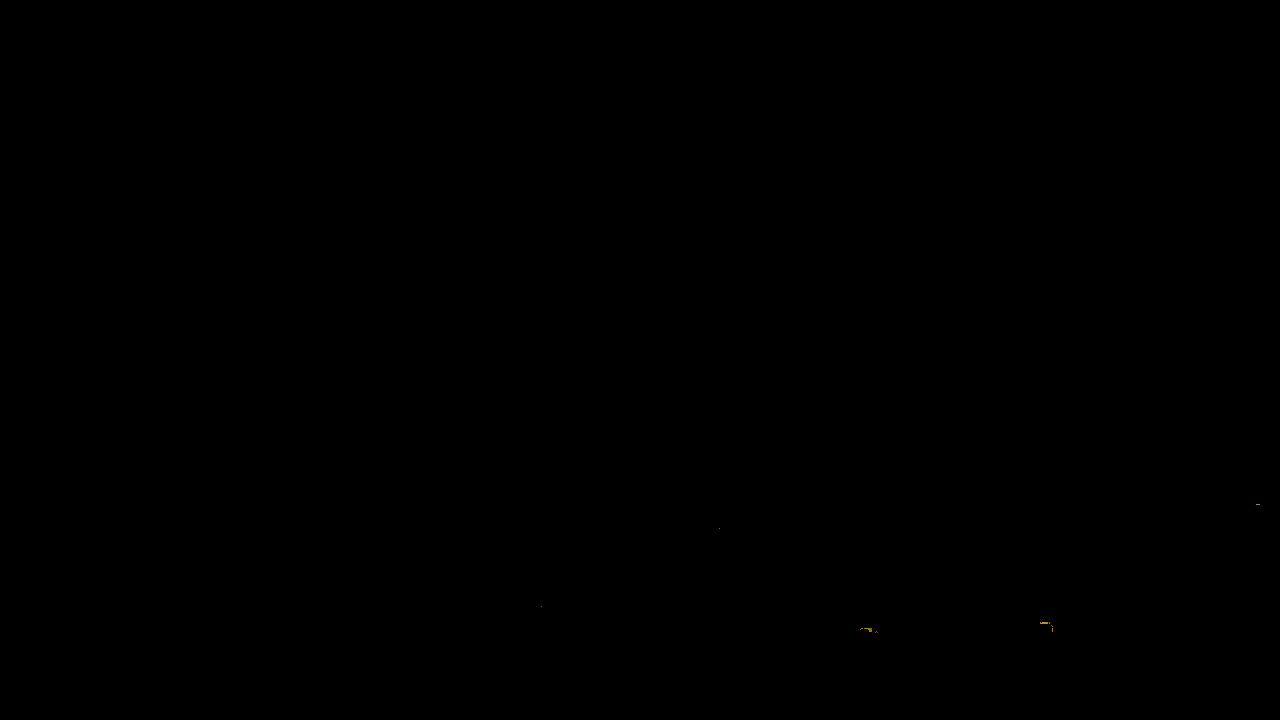

Cor vermelha detectada no frame 147


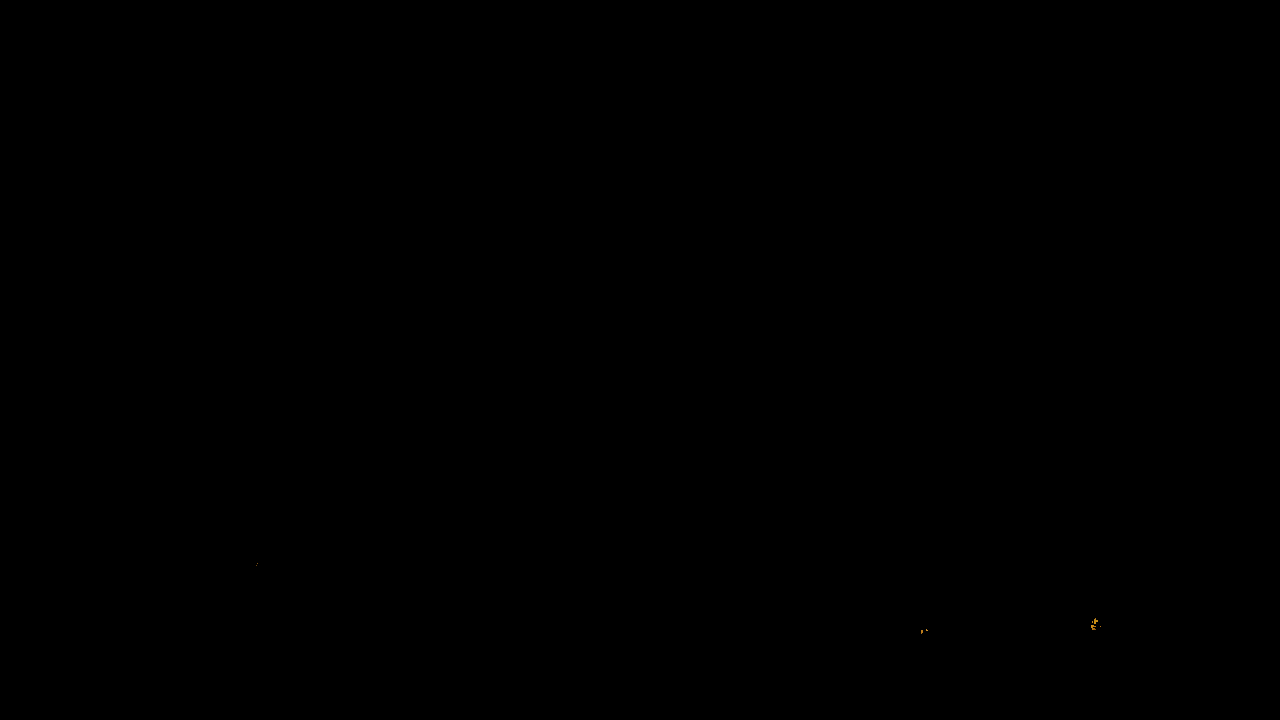

Cor vermelha detectada no frame 148


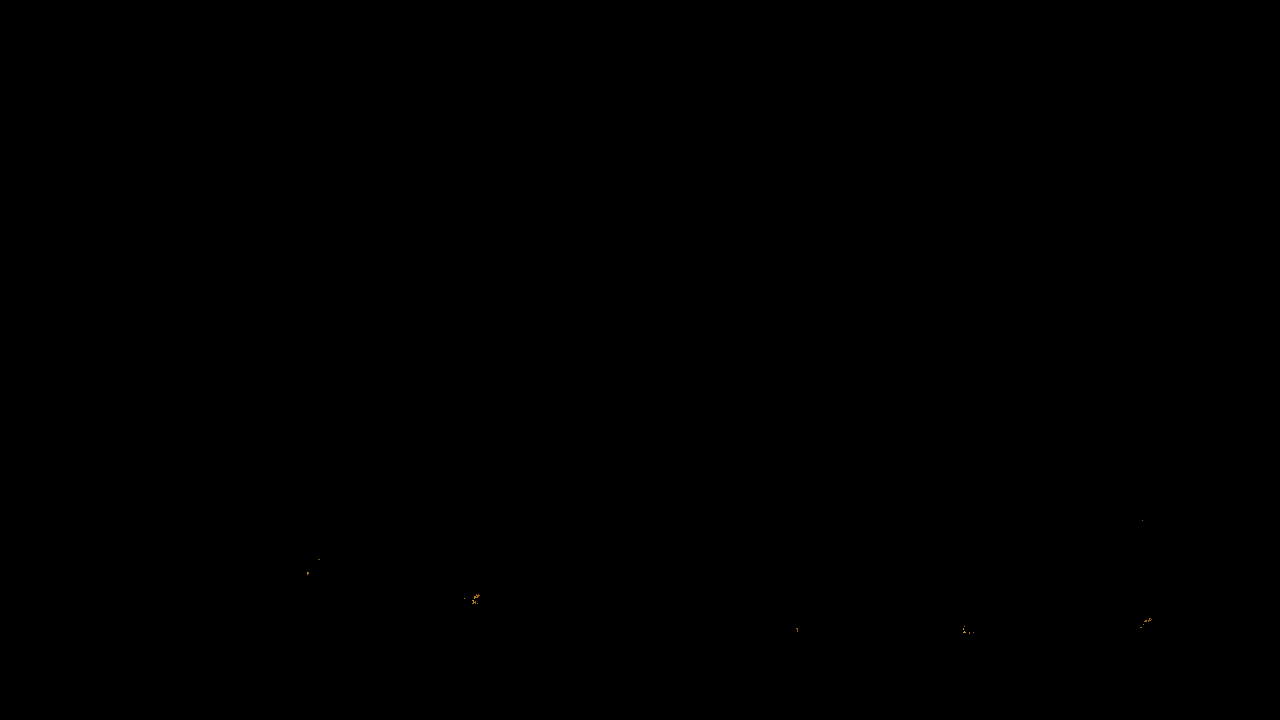

Cor vermelha detectada no frame 149


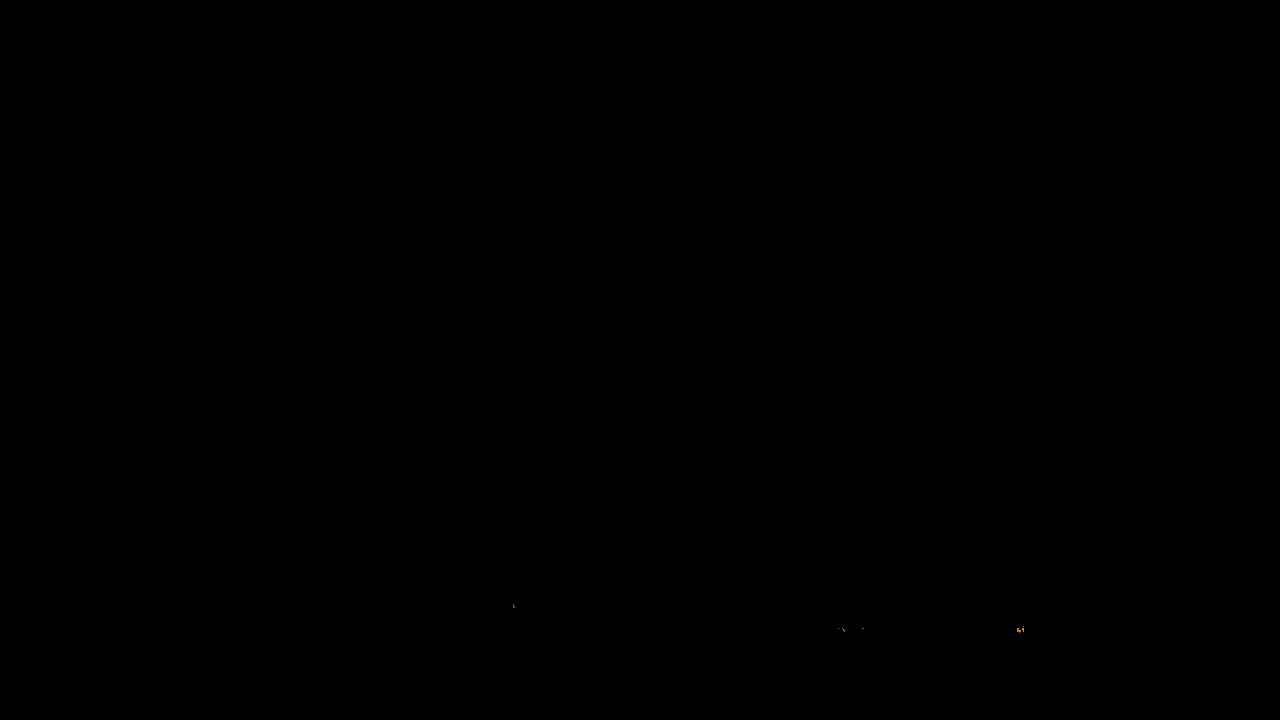

Cor vermelha detectada no frame 150


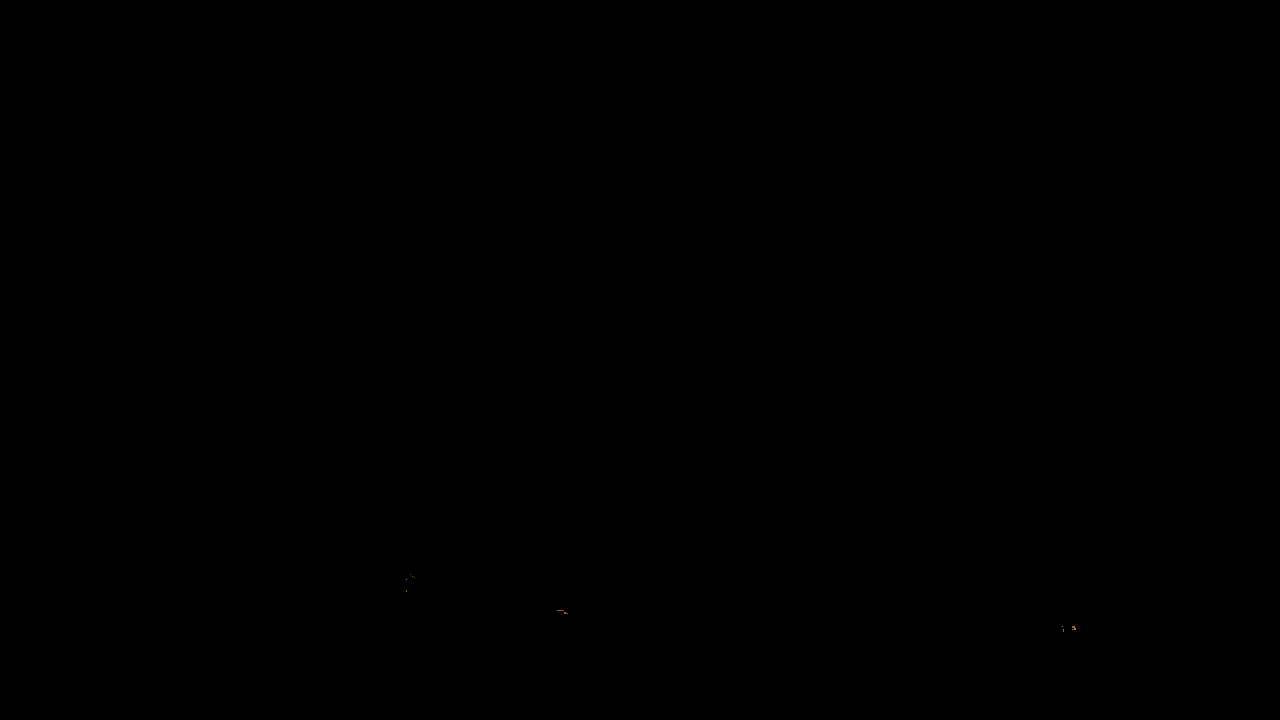

Cor vermelha detectada no frame 151


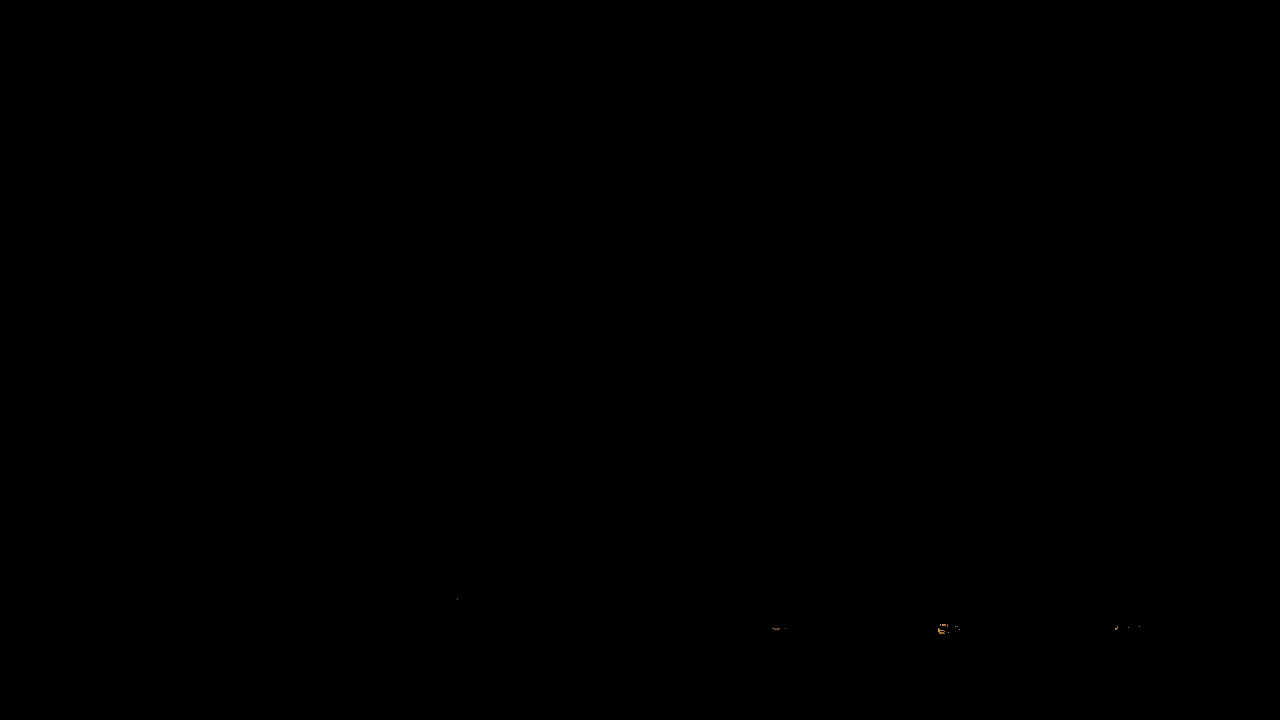

Cor vermelha detectada no frame 152


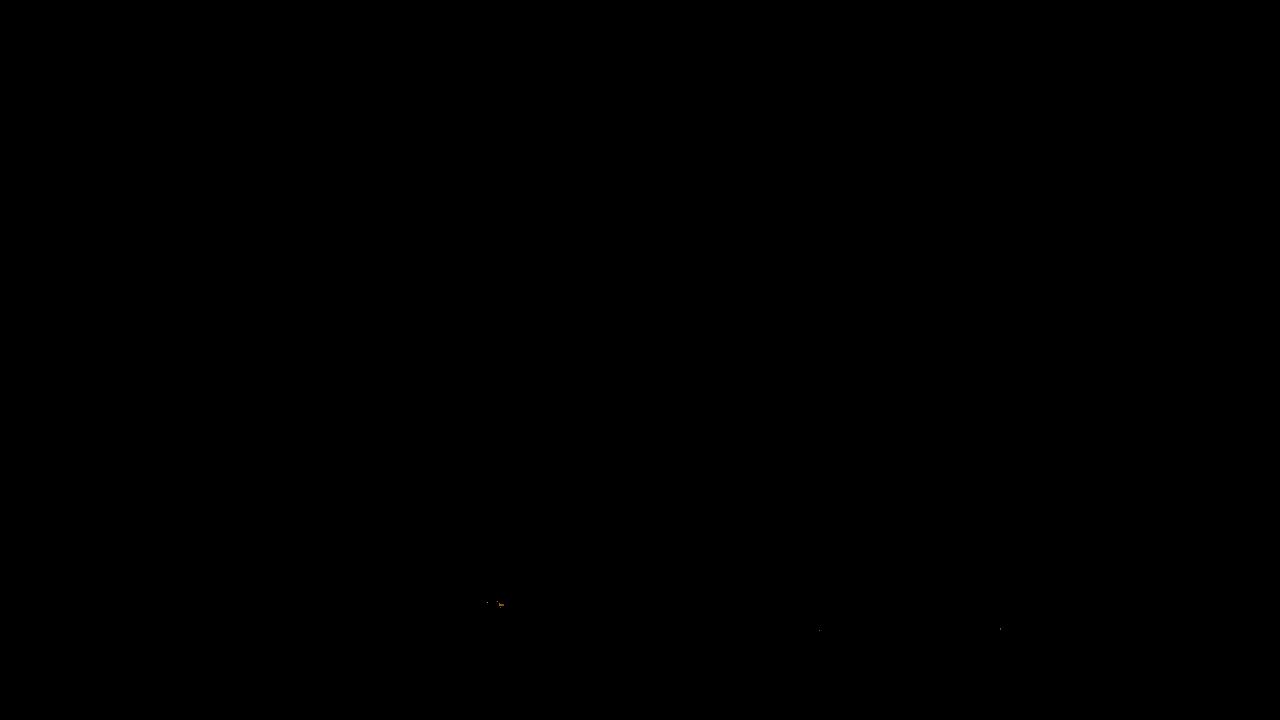

Cor vermelha detectada no frame 153


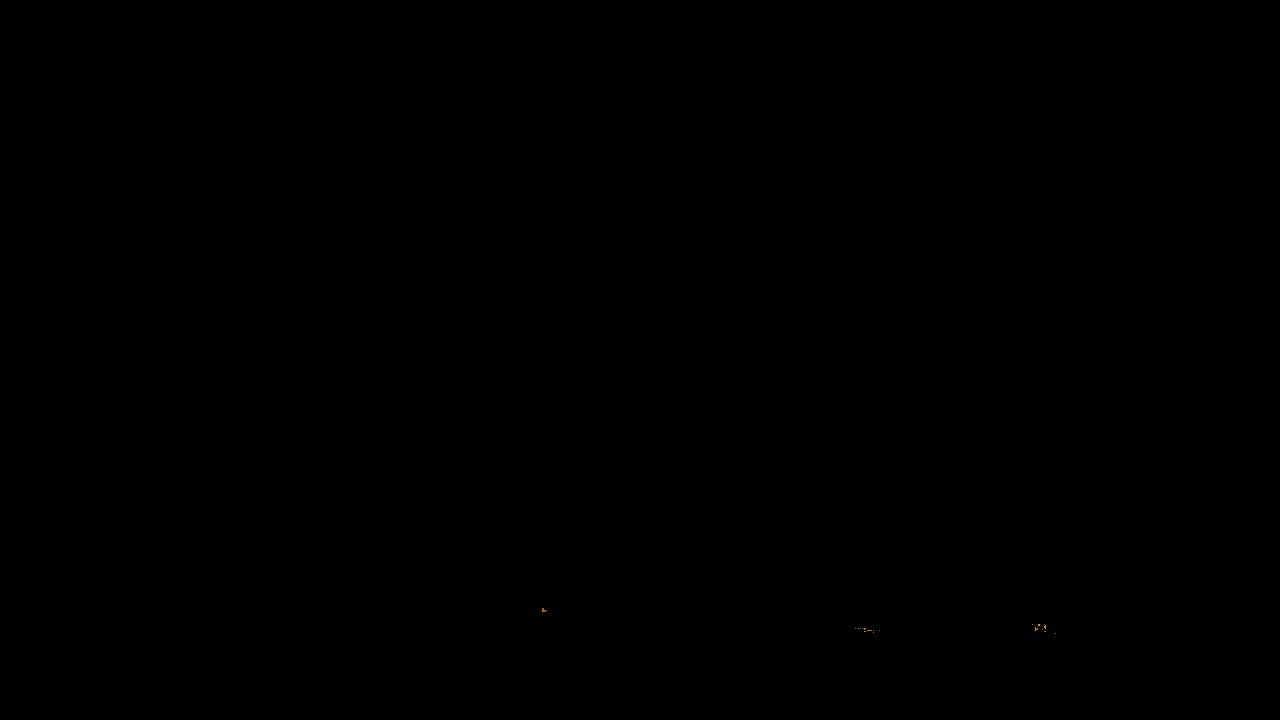

Cor vermelha detectada no frame 154


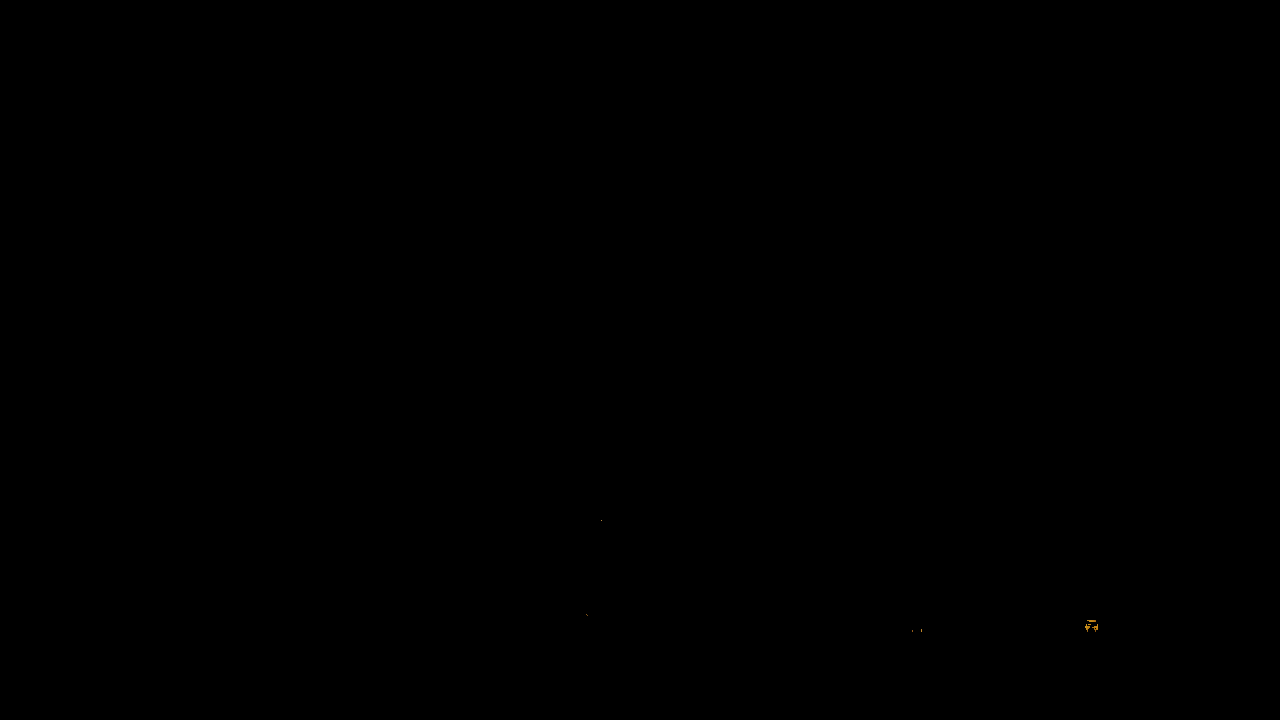

Cor vermelha detectada no frame 155


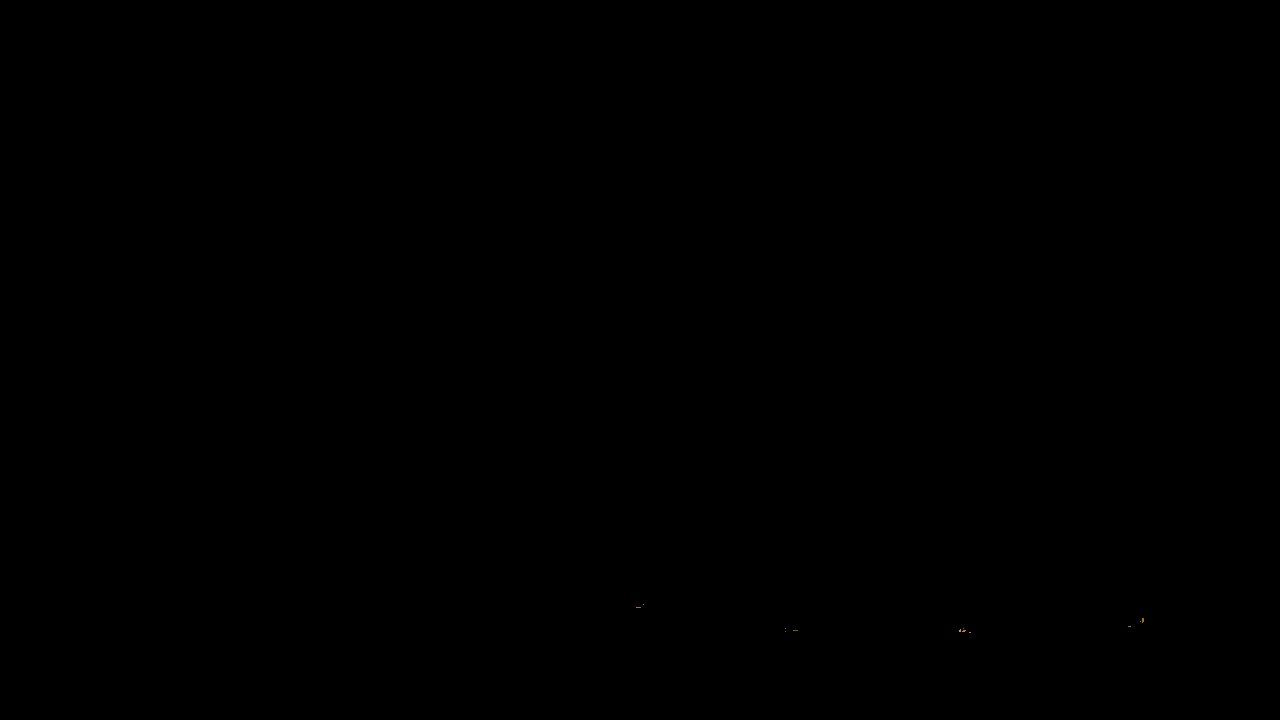

Cor vermelha detectada no frame 156


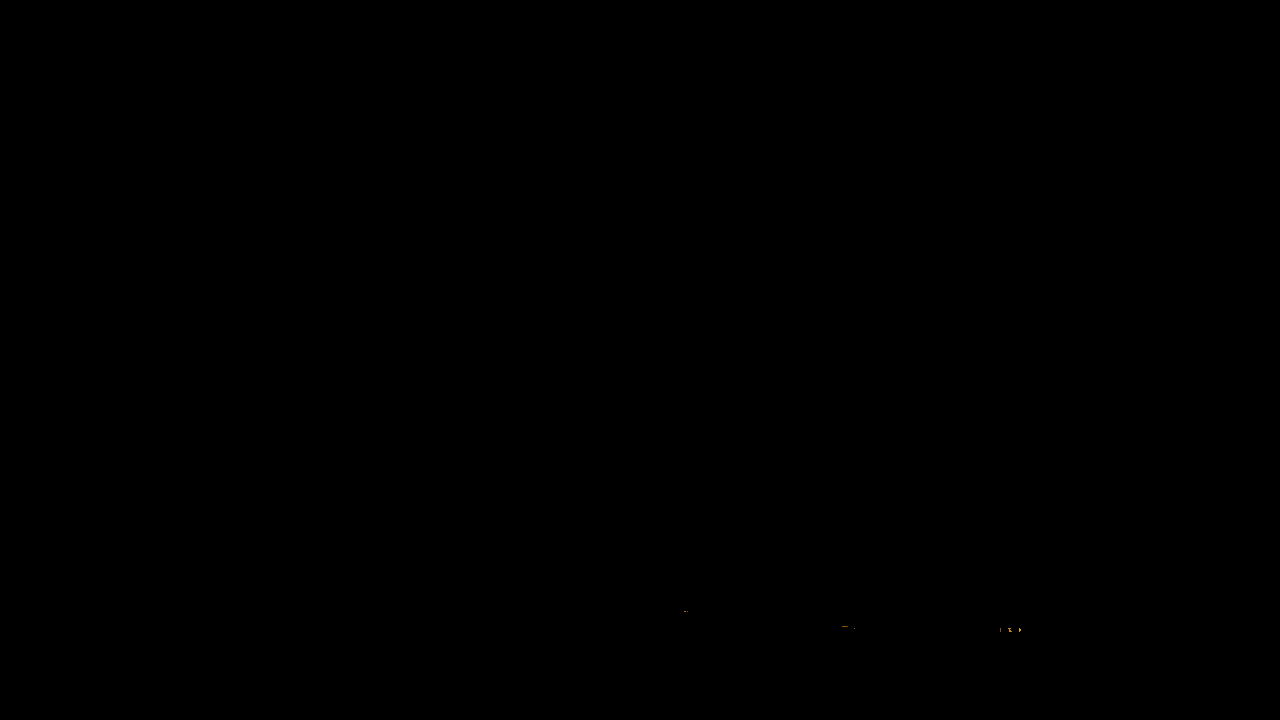

Cor vermelha detectada no frame 157


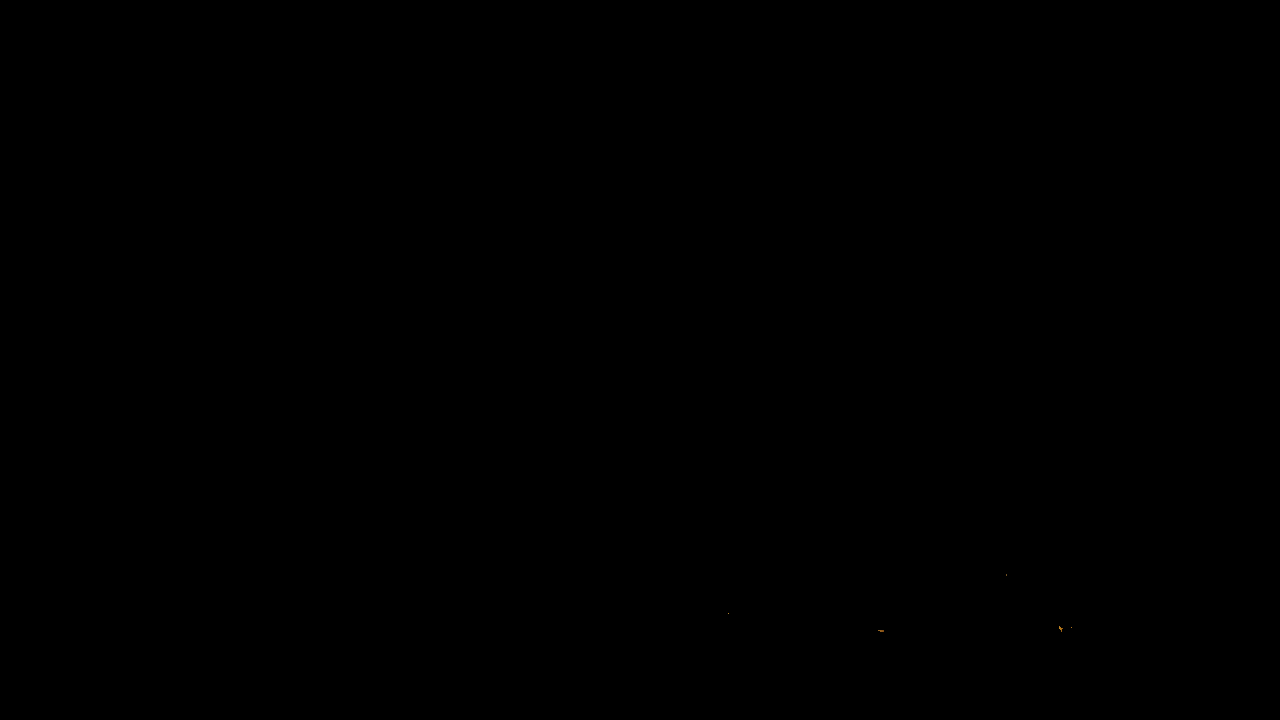

Cor vermelha detectada no frame 158


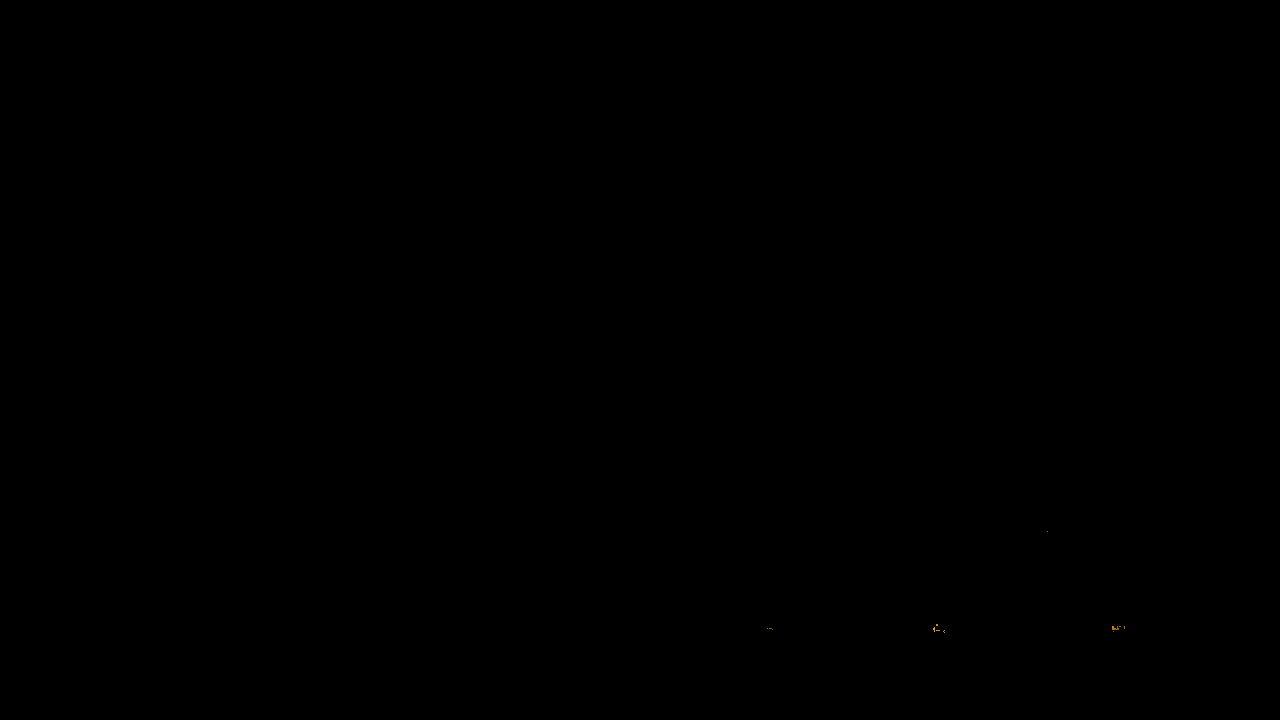

Cor vermelha detectada no frame 159


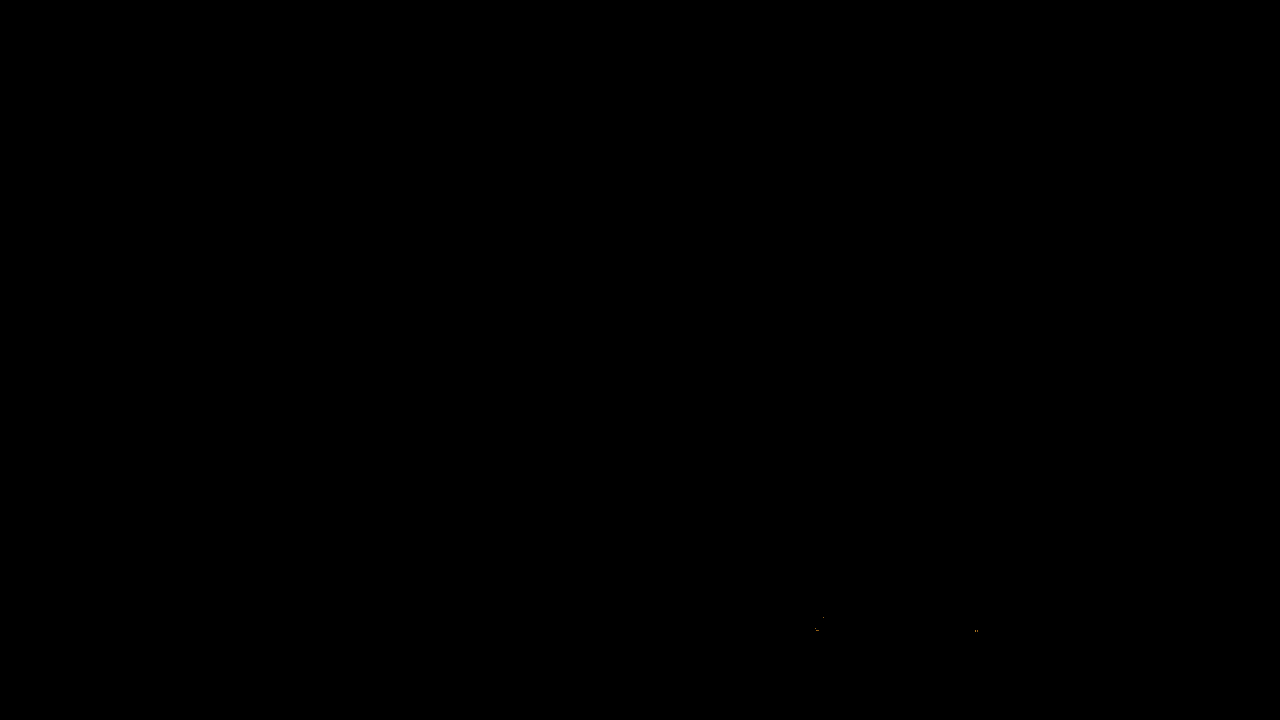

Cor vermelha detectada no frame 160


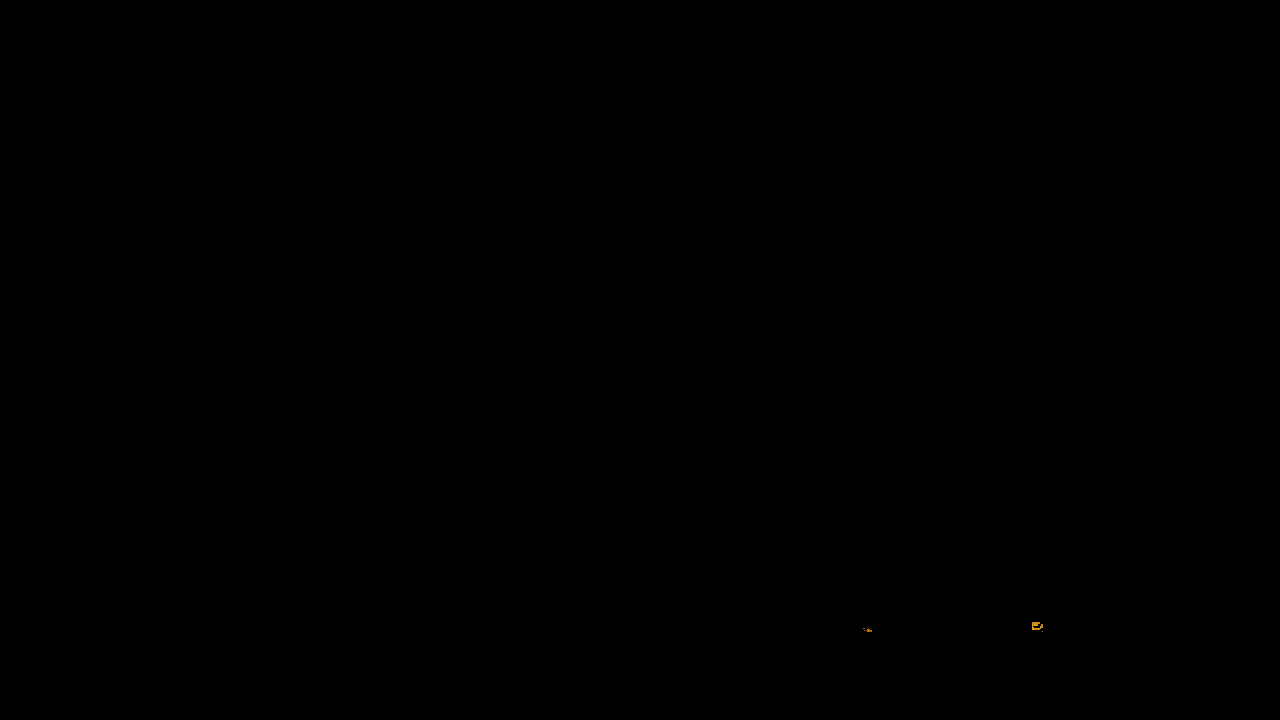

Cor vermelha detectada no frame 161


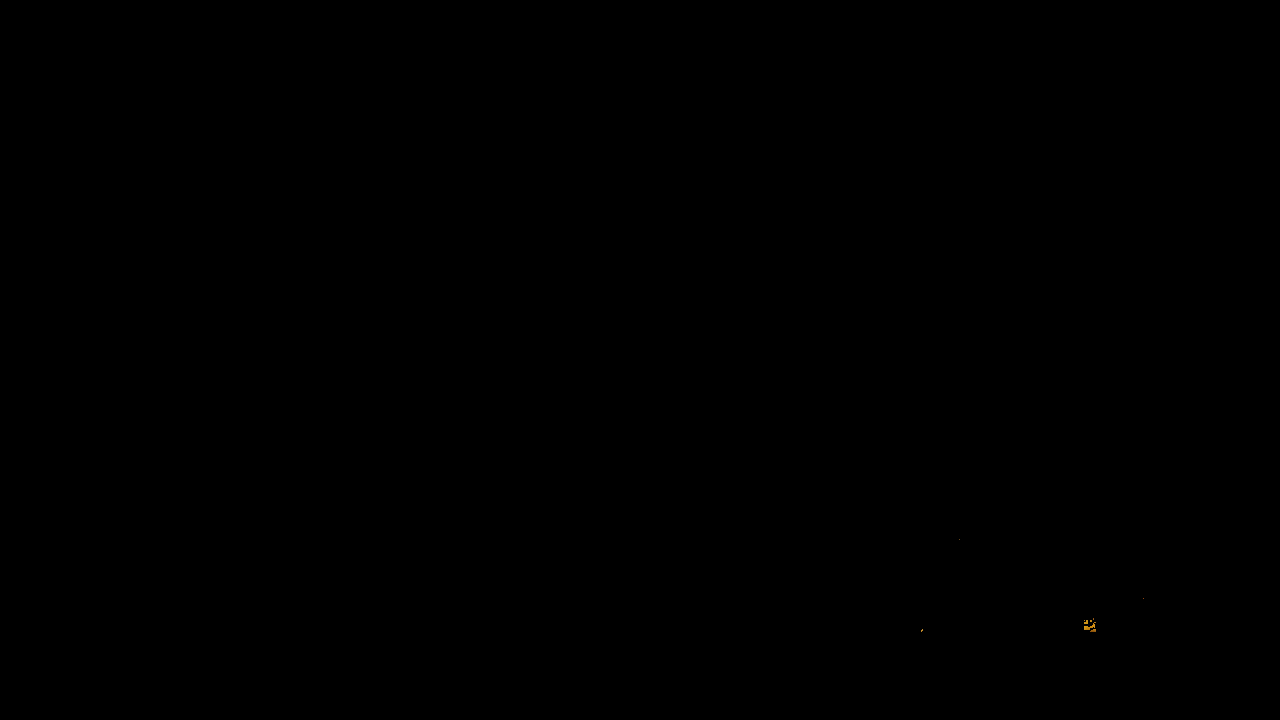

Cor vermelha detectada no frame 162


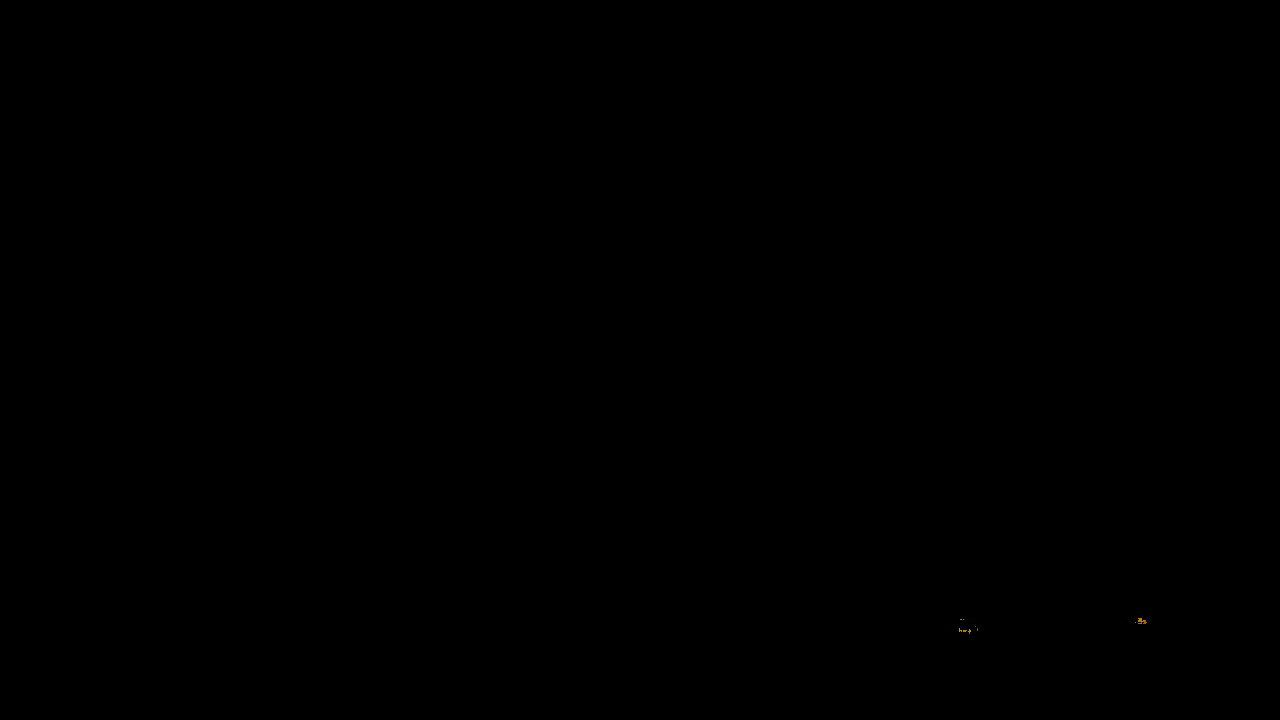

Cor vermelha detectada no frame 163


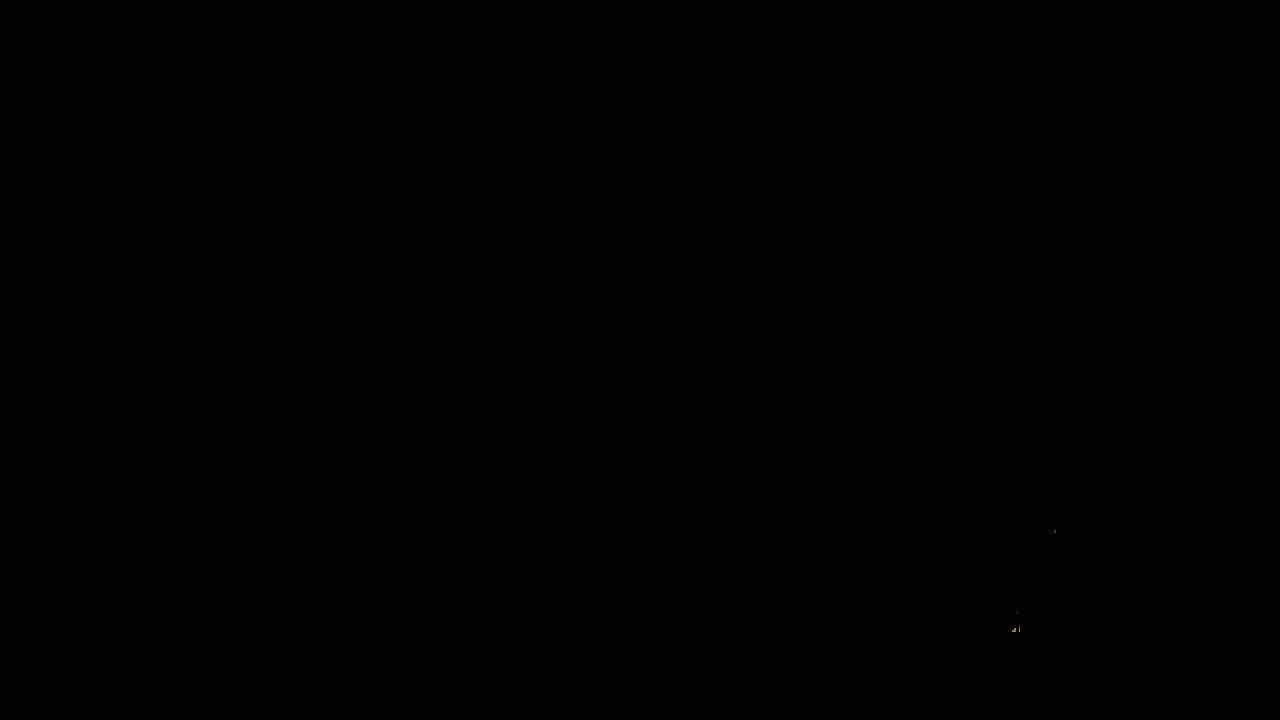

Cor vermelha detectada no frame 164


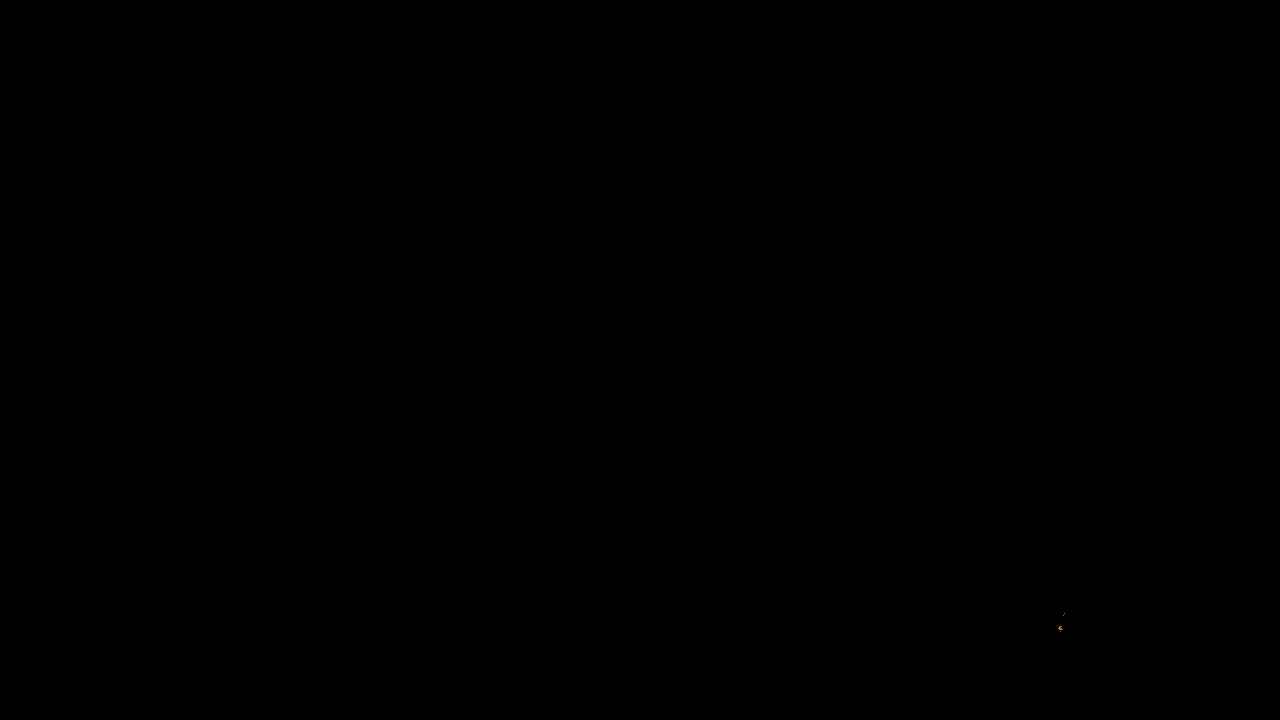

Cor vermelha detectada no frame 165


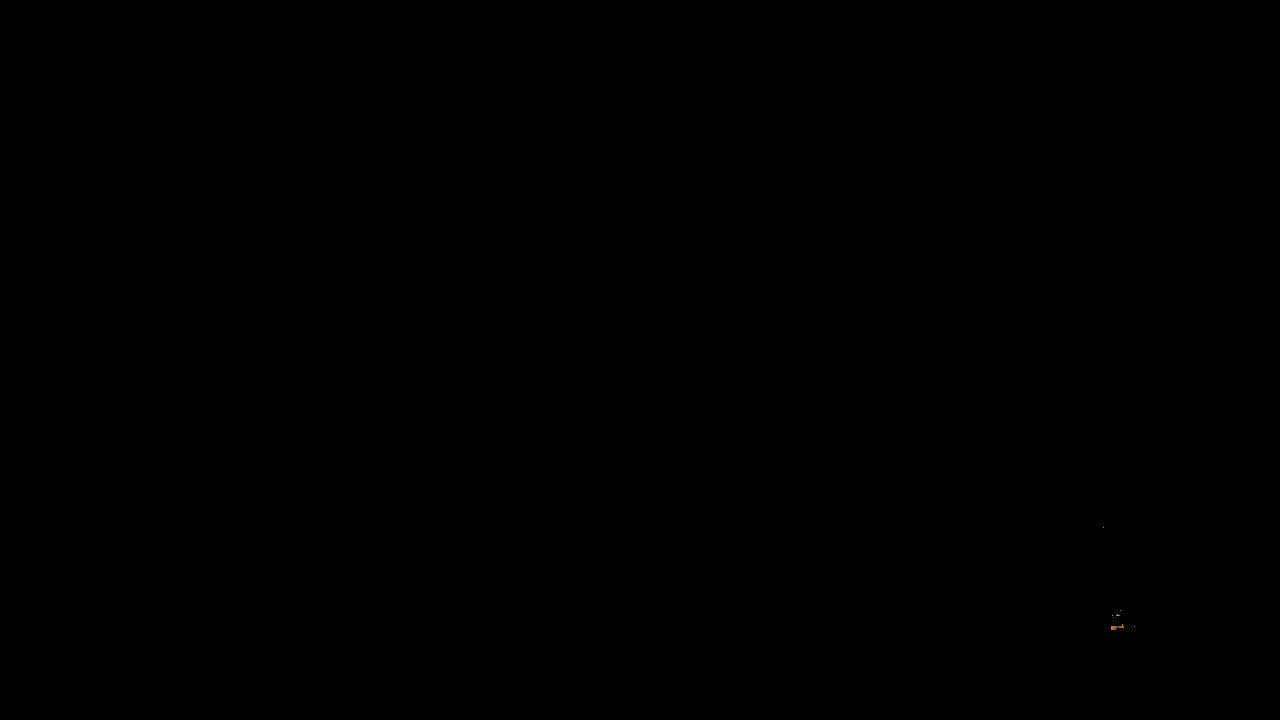

Cor vermelha detectada no frame 166


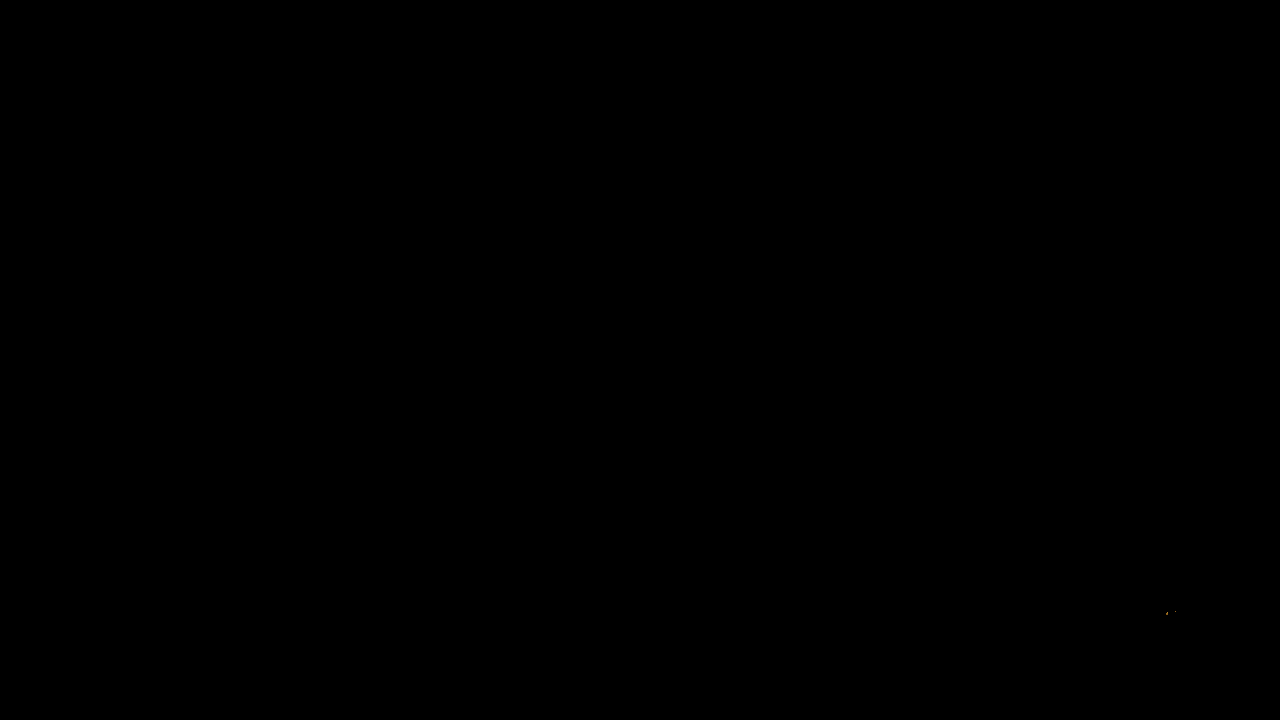

In [103]:

while True:
    ret, frame = video.read()
    if not ret:
       break
    lower_red = np.array([0, 100, 100])       # Intervalos de cores vermelhas intensa em BGR
    upper_red = np.array([10, 255, 255])

    red_mask = cv2.inRange(frame, lower_red, upper_red)    # Máscara para a cor vermelha
    blurred_frame = cv2.GaussianBlur(frame, (15, 15), 0)   # Aplicar filtro Gaussiano para suavização
    red_part = cv2.bitwise_and(blurred_frame, blurred_frame, mask=red_mask) # Isola a parte vermelha do frame
    if cv2.countNonZero(red_mask)>0:
      print(f"Cor vermelha detectada no frame {contador_frame}")
      nome = 'Frame com RGB' + '_' +"{0:01}".format(contador_frame)+'.jpg'
      image = Image.fromarray(cv2.cvtColor(red_part, cv2.COLOR_BGR2RGB))  #Salvando e convertendo a imagem
      image_bytes = BytesIO()
      image.save(image_bytes, format='PNG')
      image_bytes.seek(0)
      display.display(display.Image(data=image_bytes.read()))    # Exiba a imagem
      cv2.imwrite(nome,red_part)
    contador_frame += 1
video.release()


# CÓDIGO CONVERTIDO PARA HSV

## No segundo código, os frames do vídeo são convertidos para o espaço de cores HSV (Matiz-Saturação-Valor) antes da detecção da cor vermelha. No espaço de cores HSV, a detecção de cores é mais intuitiva, pois o matiz (Hue) representa diretamente a cor, independentemente do brilho. Isso torna o método menos sensível às variações na iluminação, tornando-o mais robusto em diferentes condições de iluminação. Além disso, o espaço de cores HSV é menos propenso a falsos positivos, tornando a detecção da cor vermelha mais precisa e confiável em uma variedade de cenários, como mostra os prints gerados. Porém, nesse teste foi cpturado o vermelho dos trilhos e das luzes, ou seja, no primeiro frame a execução parou. Portanto, para capturar o vermelho do carrinho, este código  não teve sucesso.

Cor vermelha detectada no frame 19


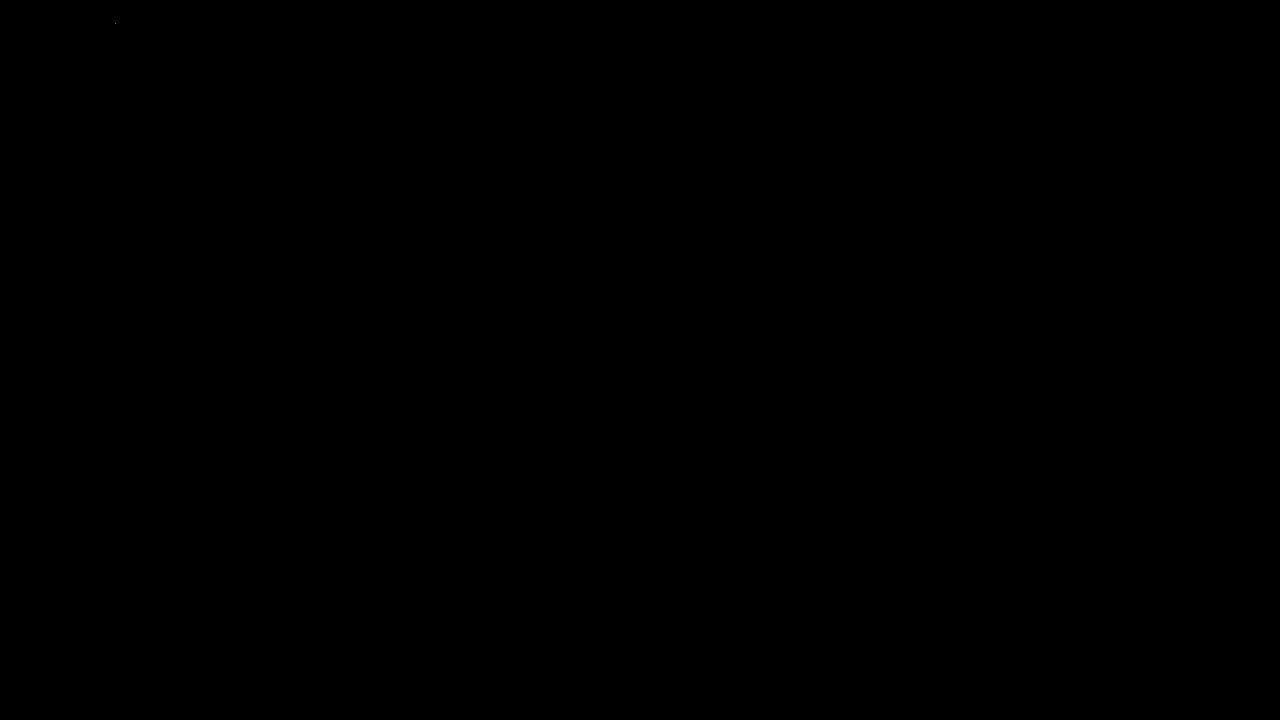

Cor vermelha detectada no frame 20


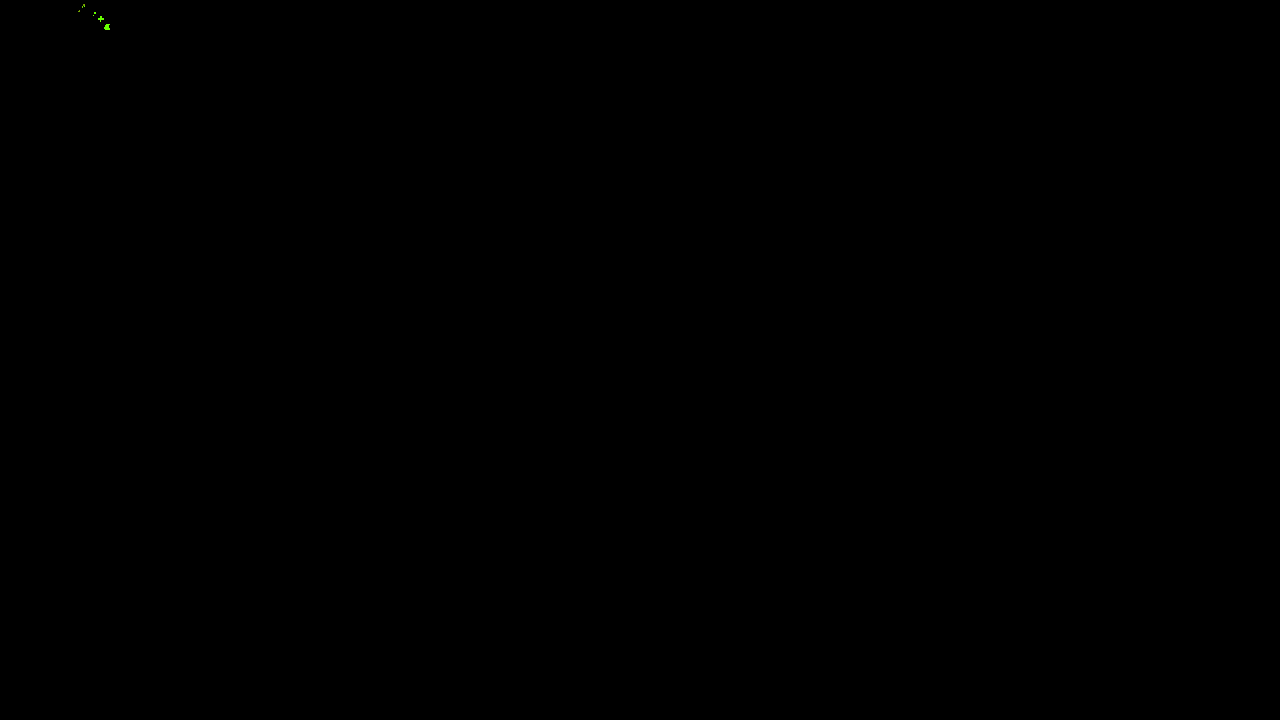

Cor vermelha detectada no frame 21


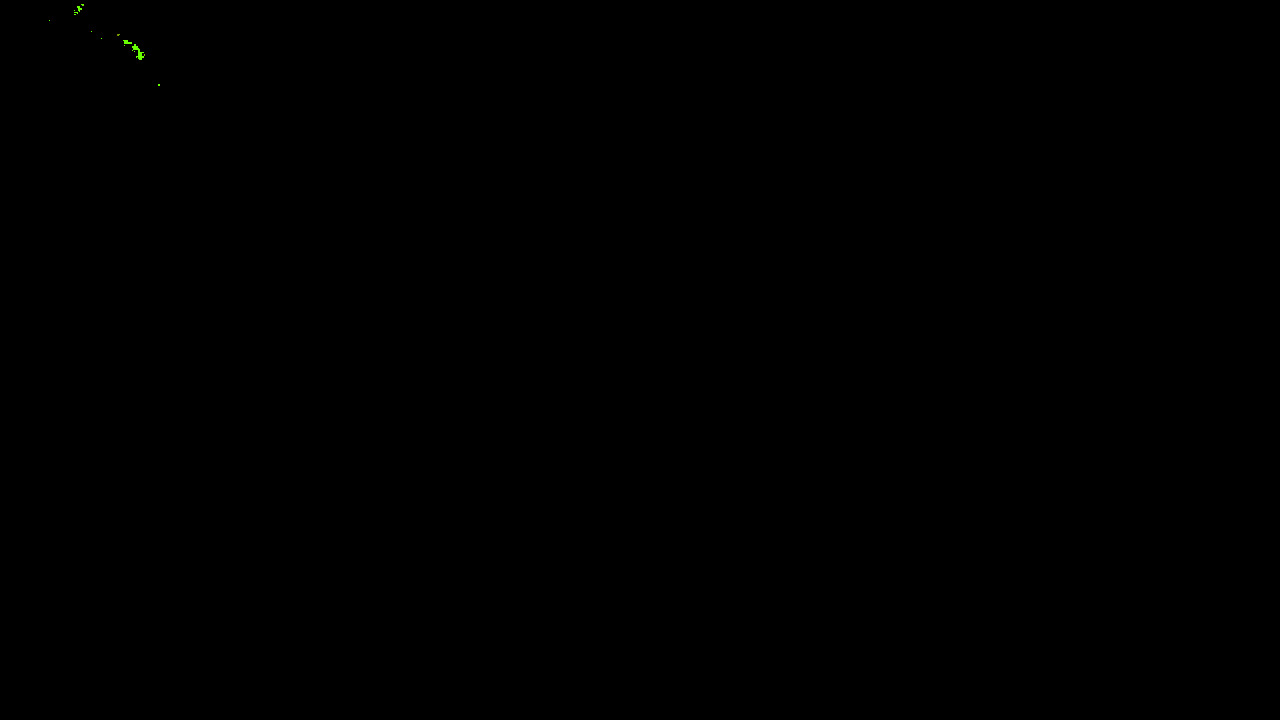

Cor vermelha detectada no frame 22


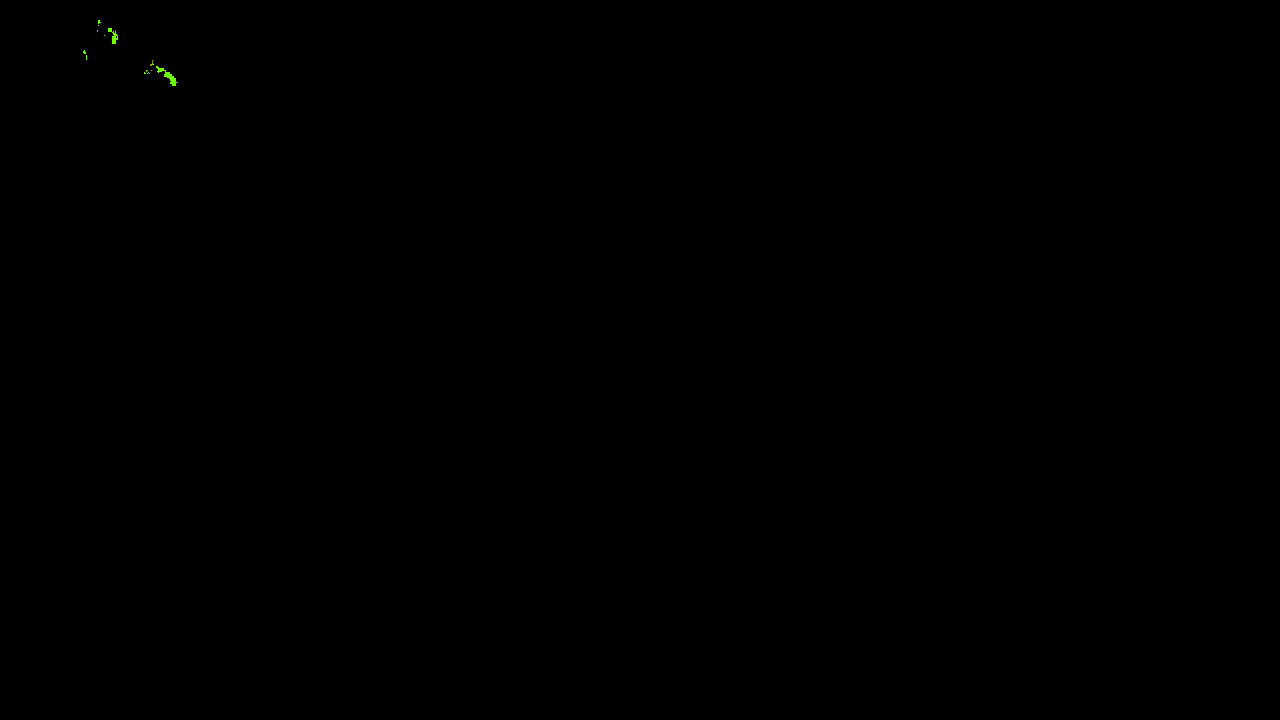

Cor vermelha detectada no frame 23


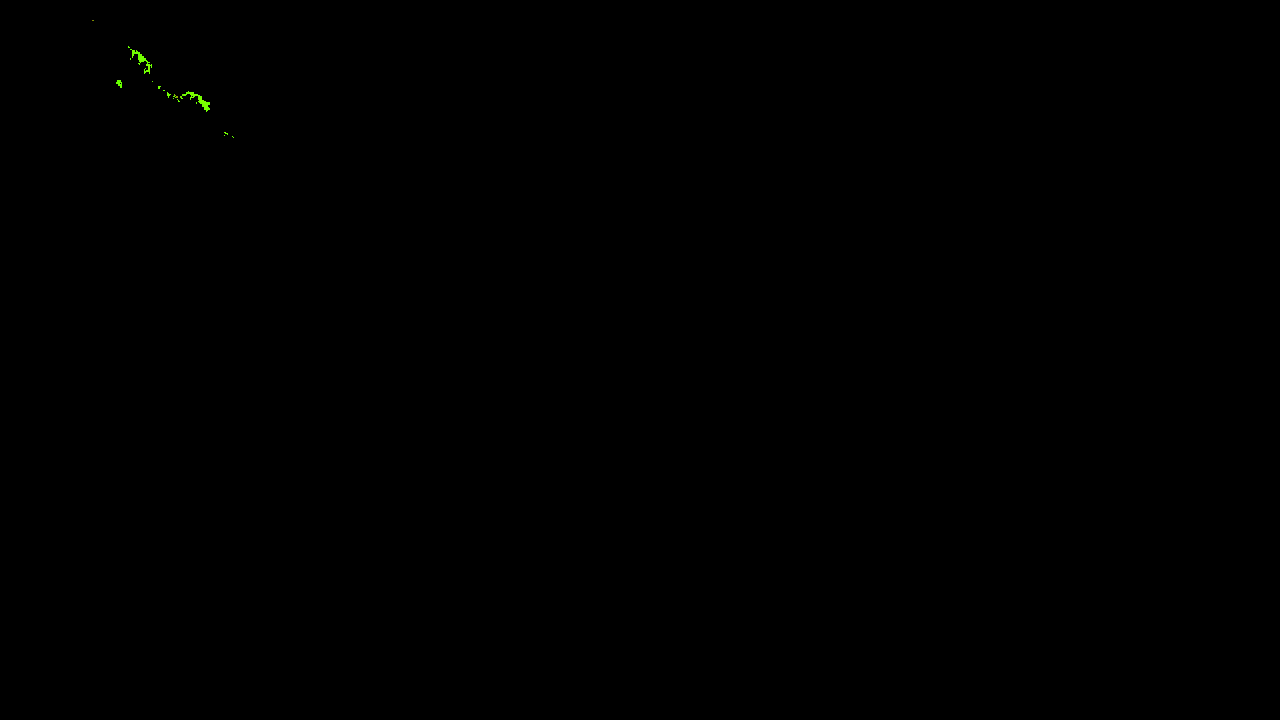

Cor vermelha detectada no frame 24


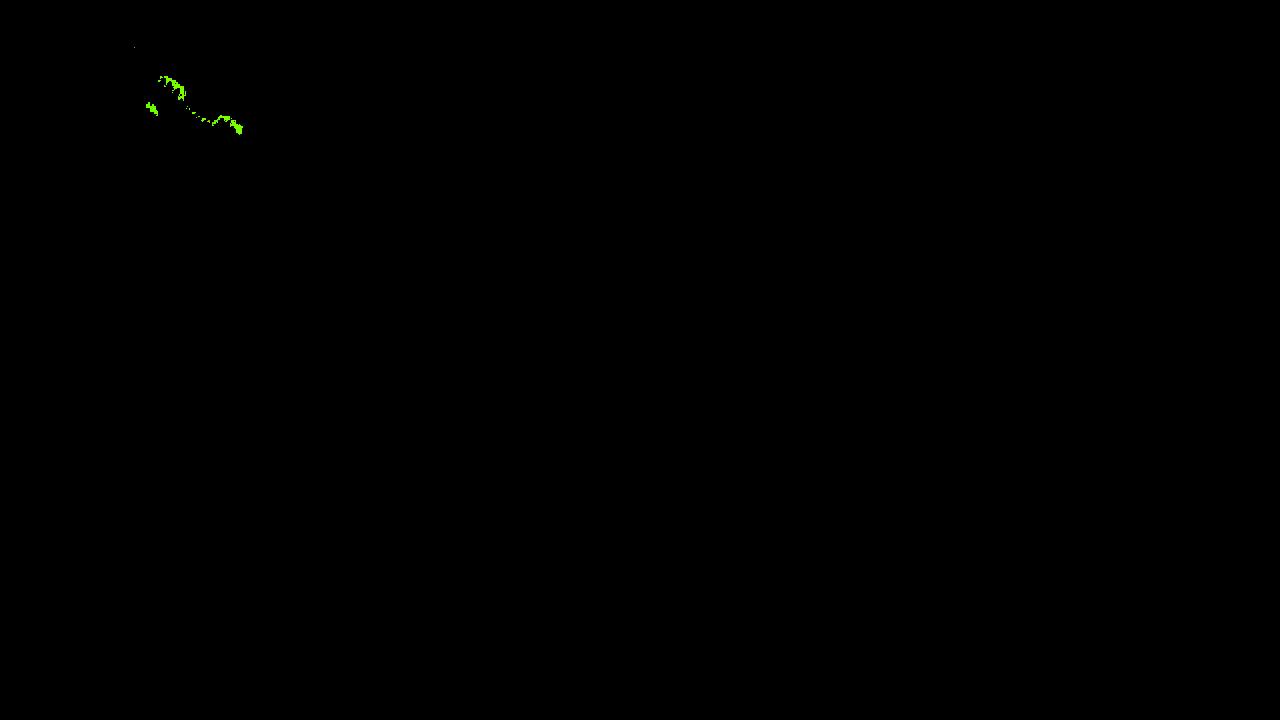

Cor vermelha detectada no frame 25


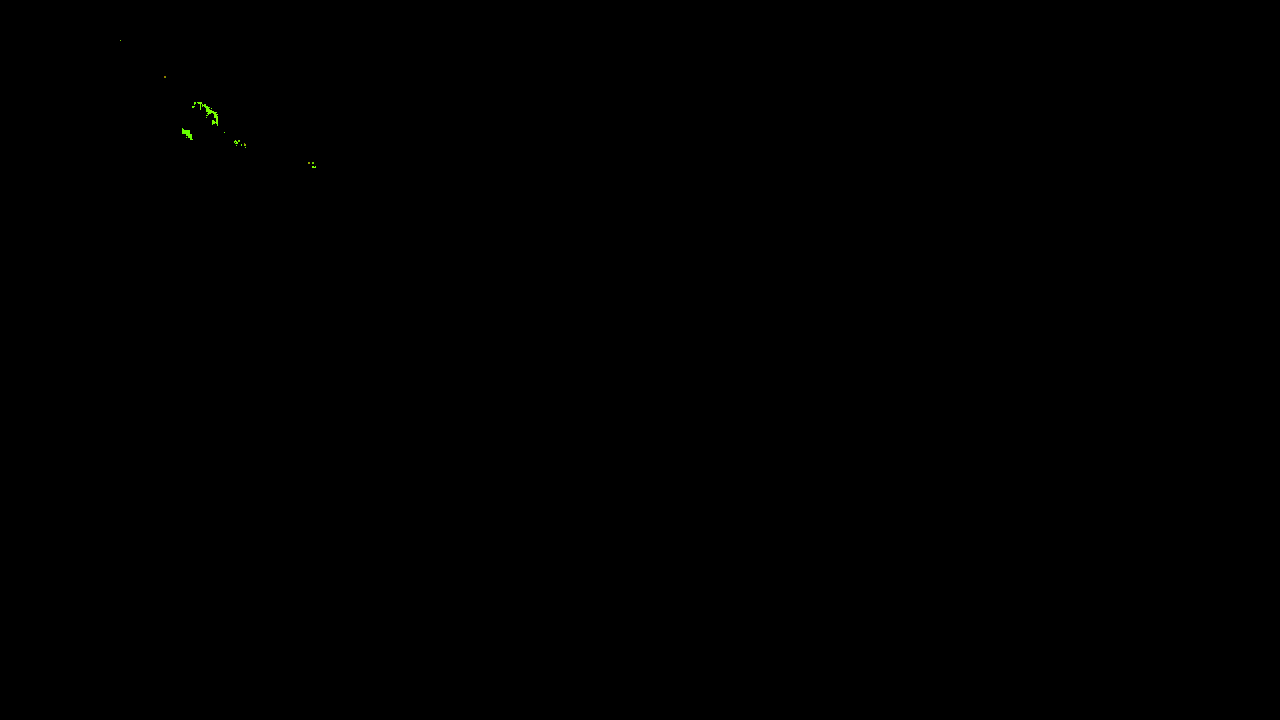

Cor vermelha detectada no frame 26


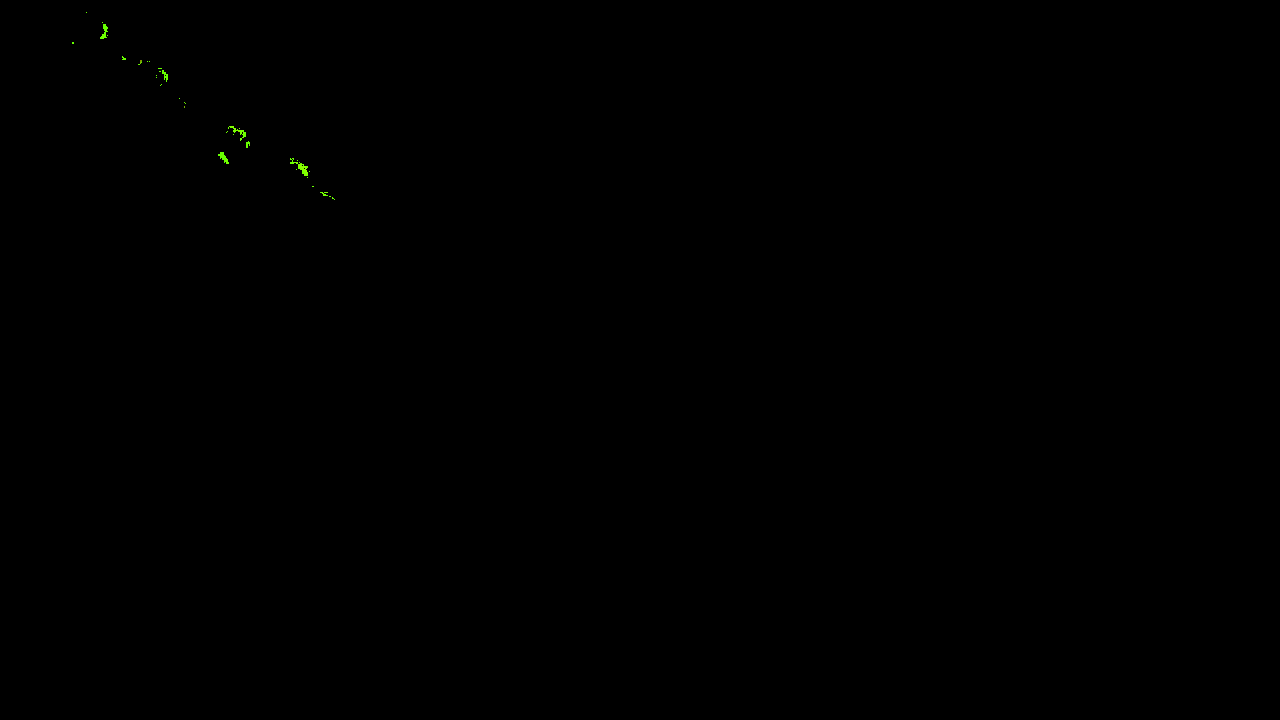

Cor vermelha detectada no frame 27


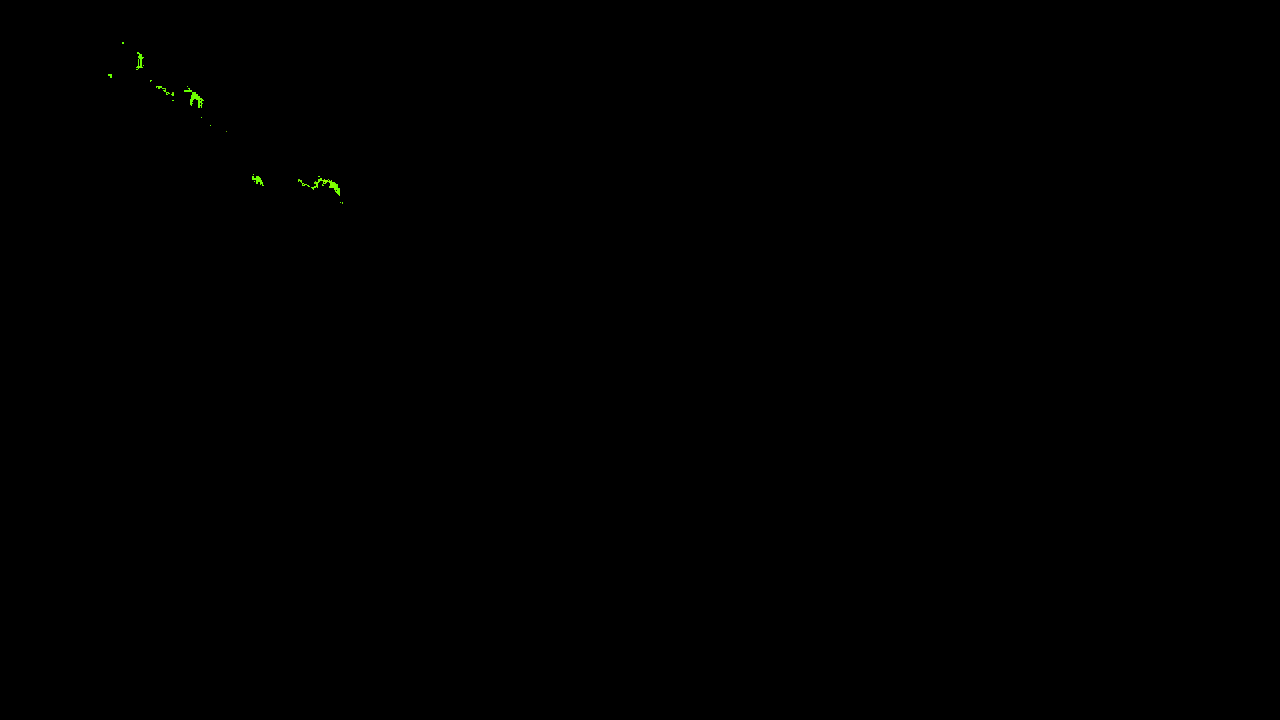

Cor vermelha detectada no frame 28


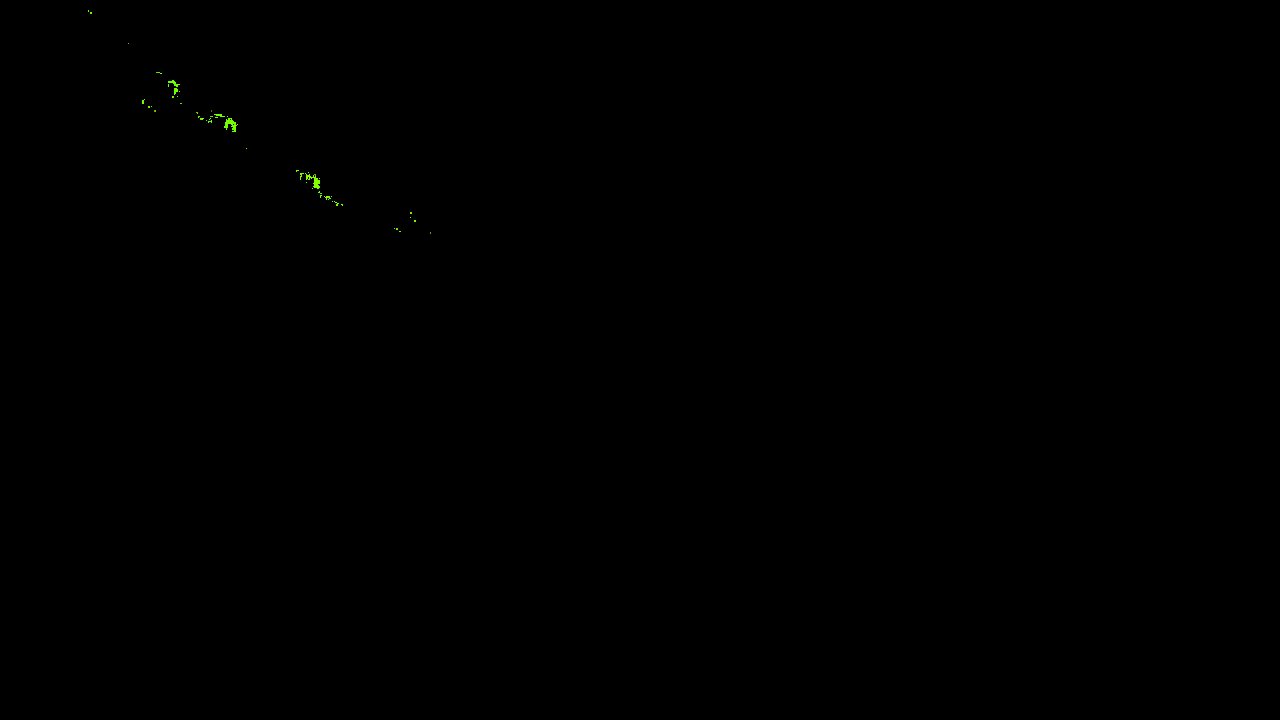

Cor vermelha detectada no frame 29


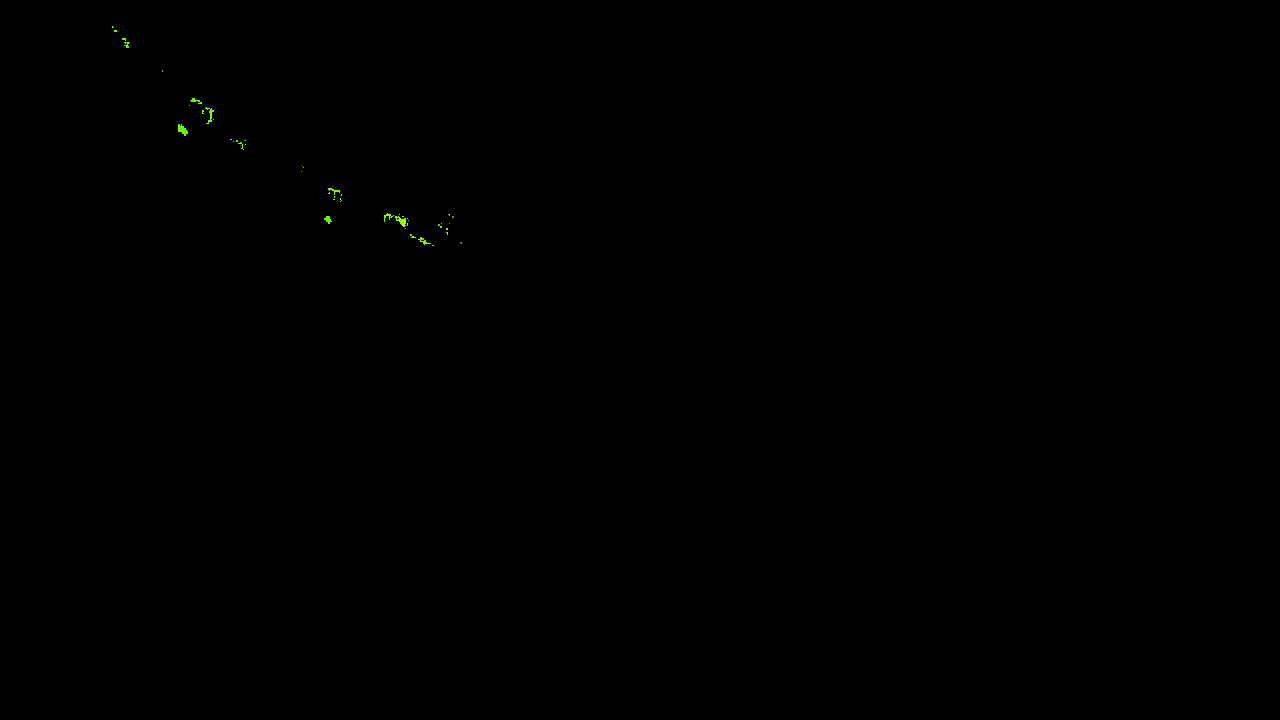

Cor vermelha detectada no frame 30


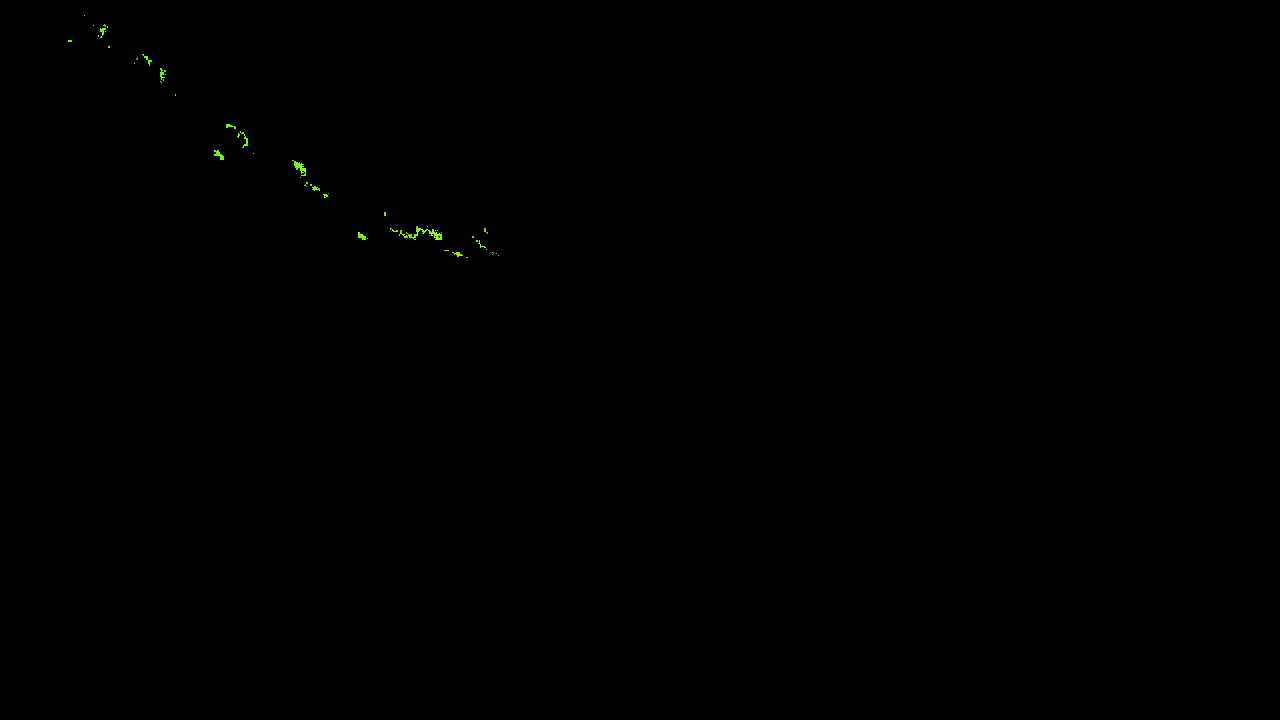

Cor vermelha detectada no frame 31


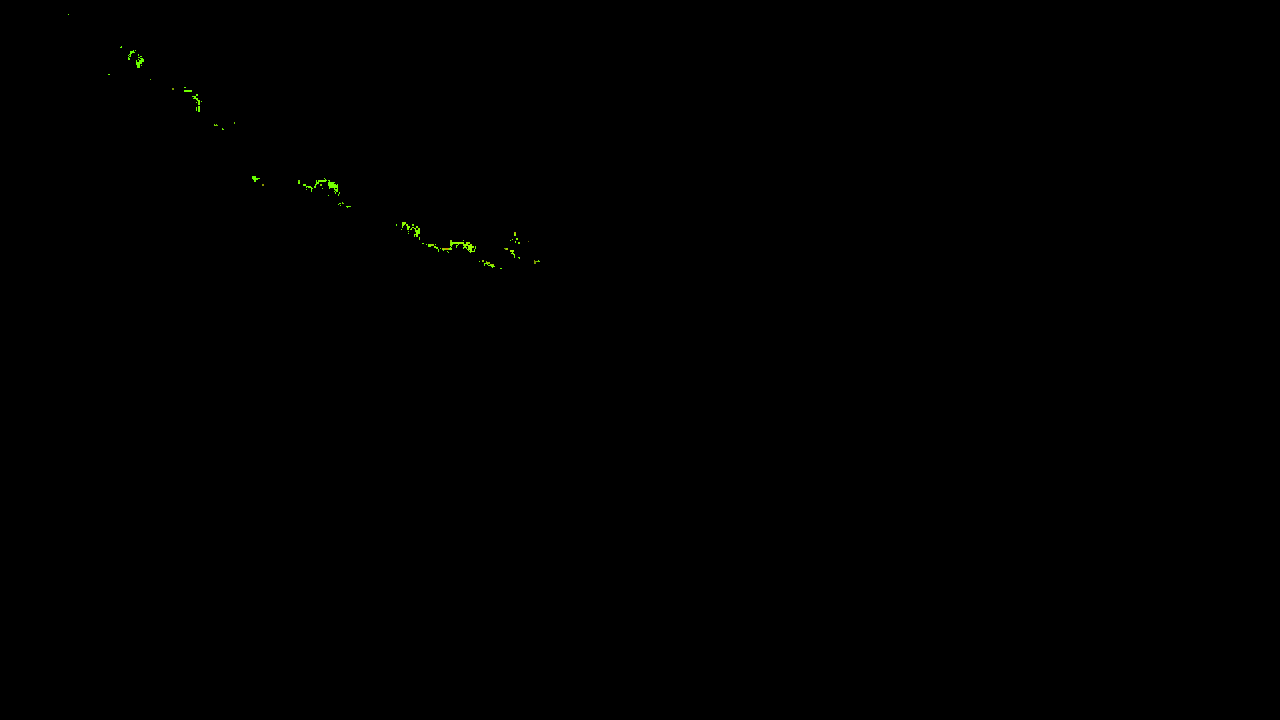

Cor vermelha detectada no frame 32


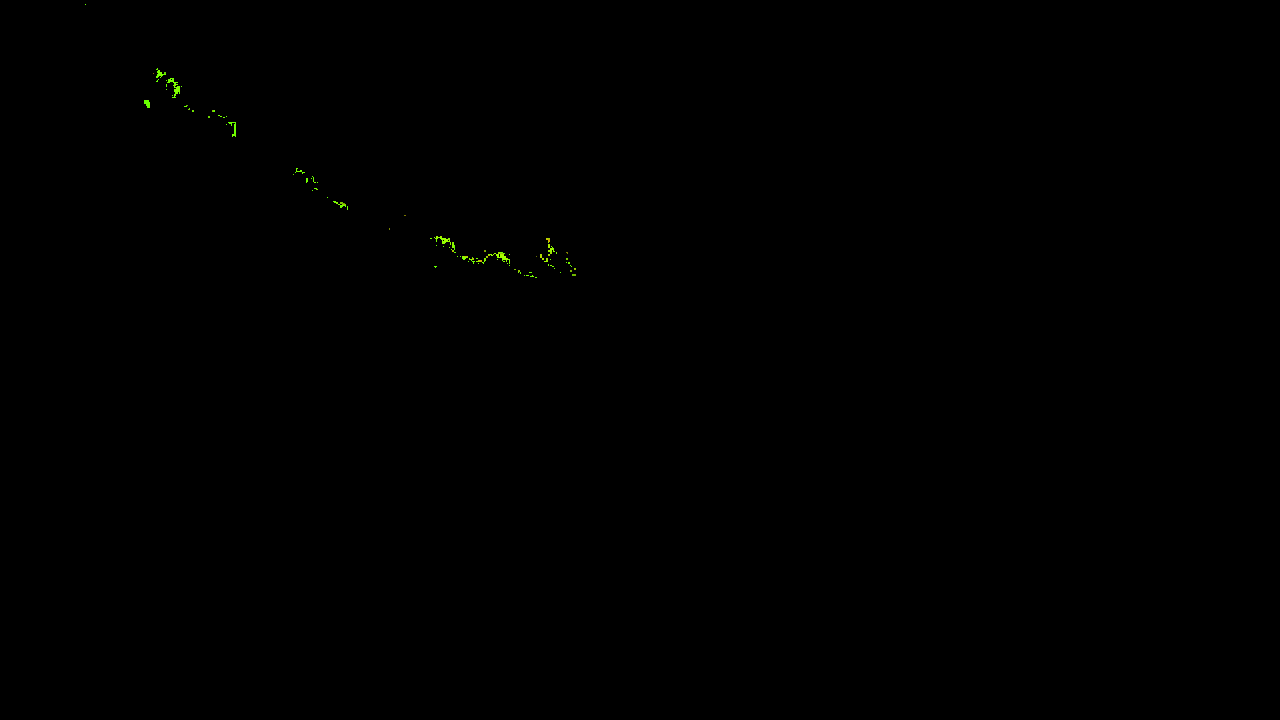

Cor vermelha detectada no frame 33


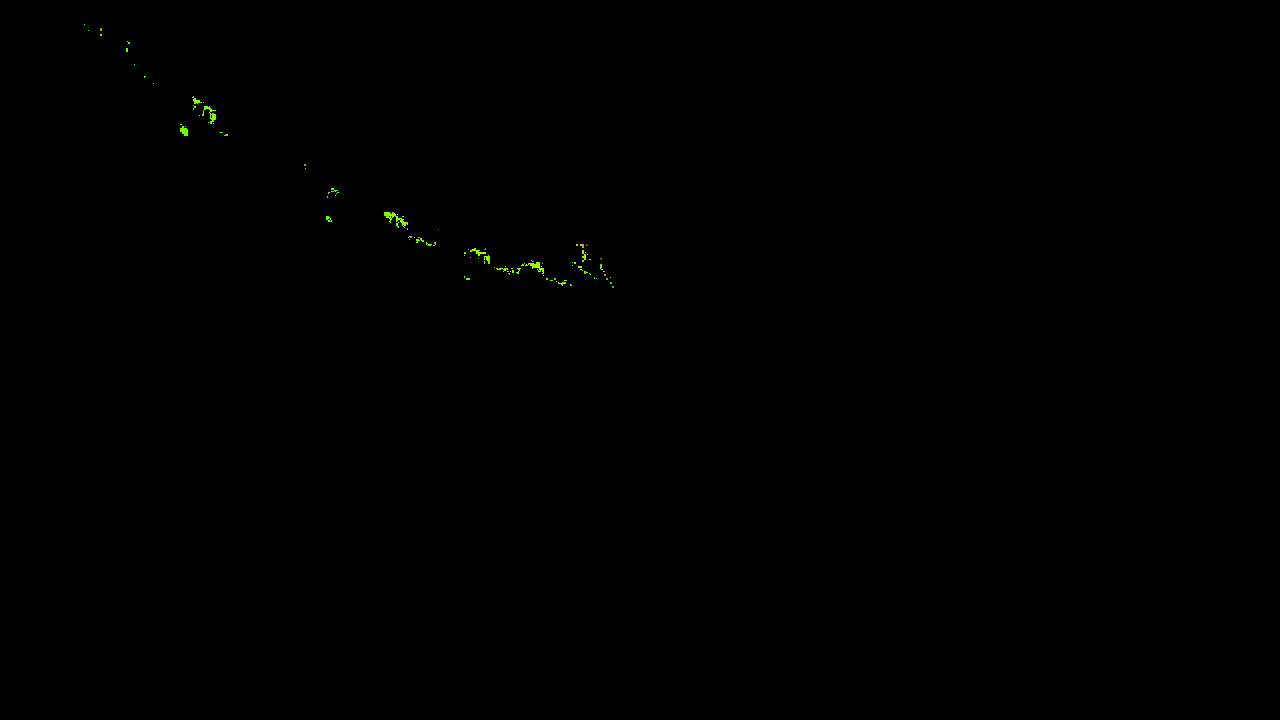

Cor vermelha detectada no frame 34


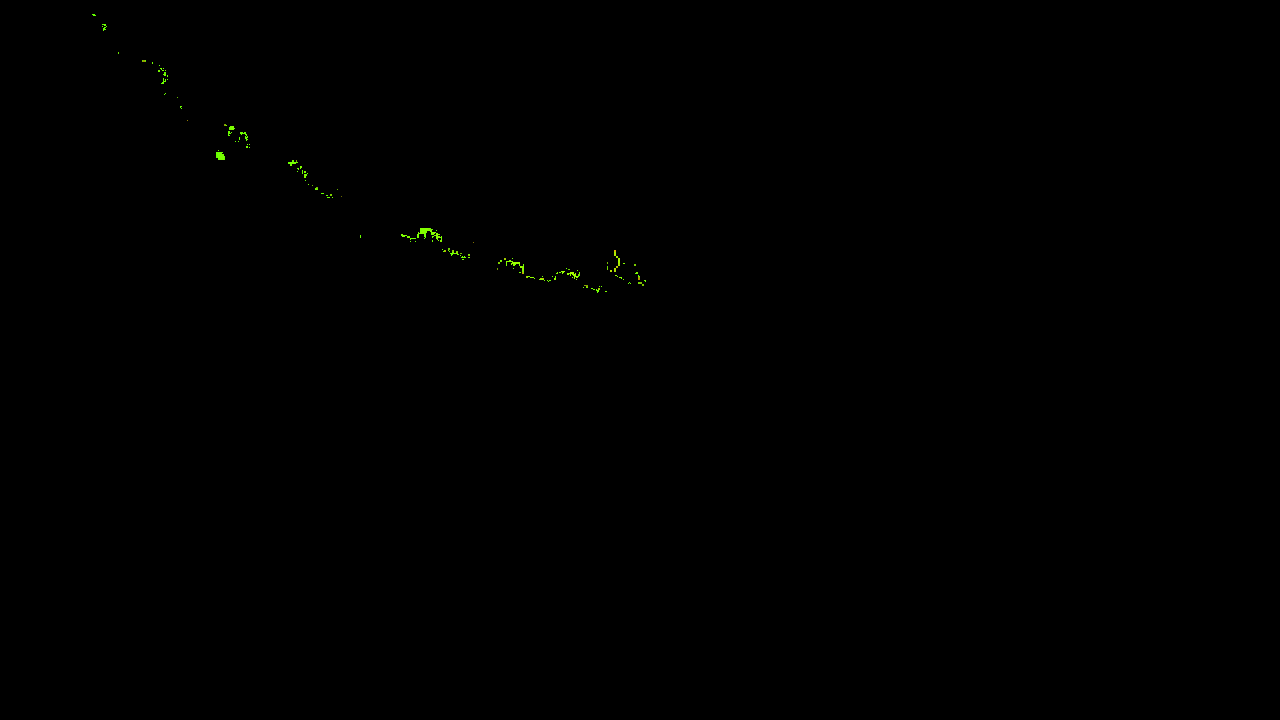

Cor vermelha detectada no frame 35


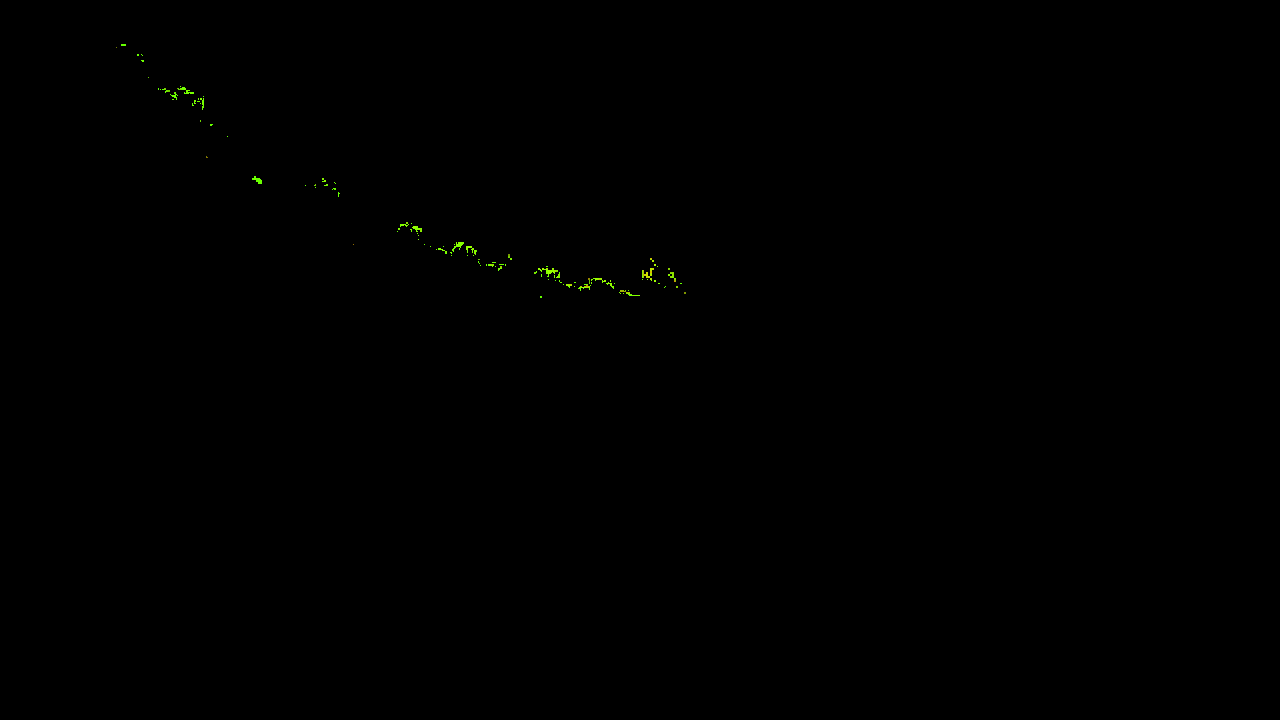

Cor vermelha detectada no frame 36


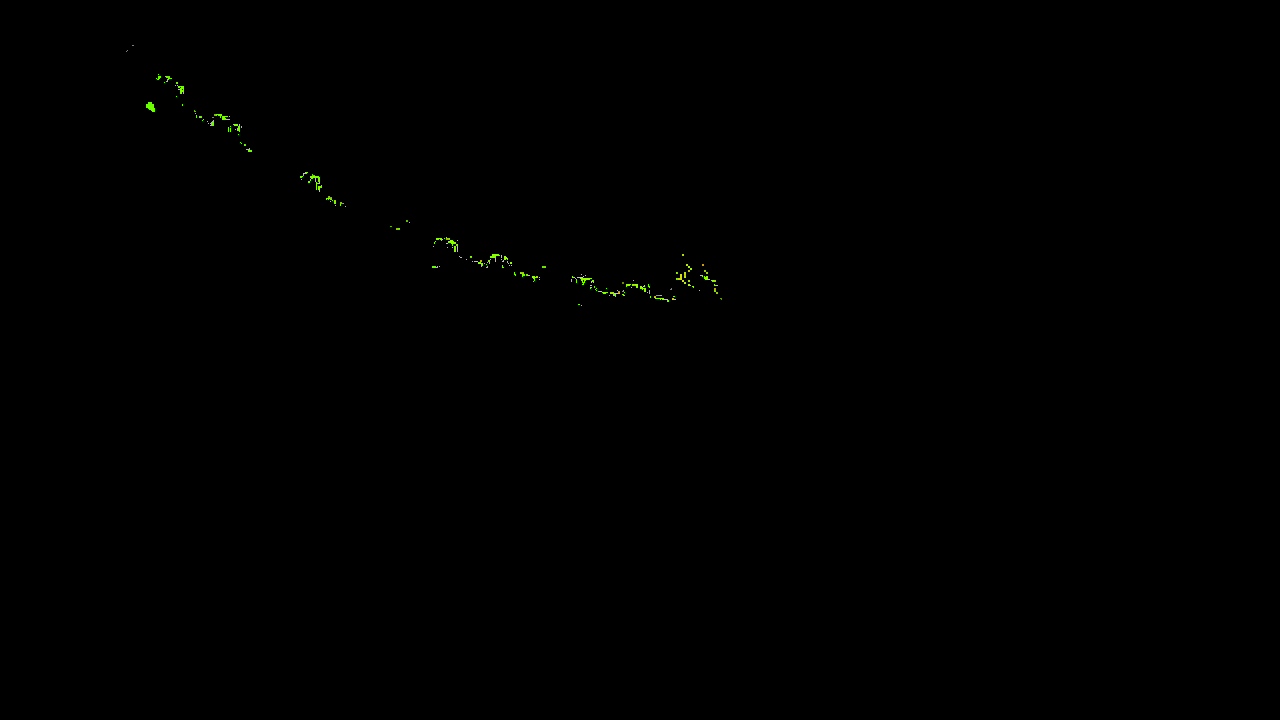

Cor vermelha detectada no frame 37


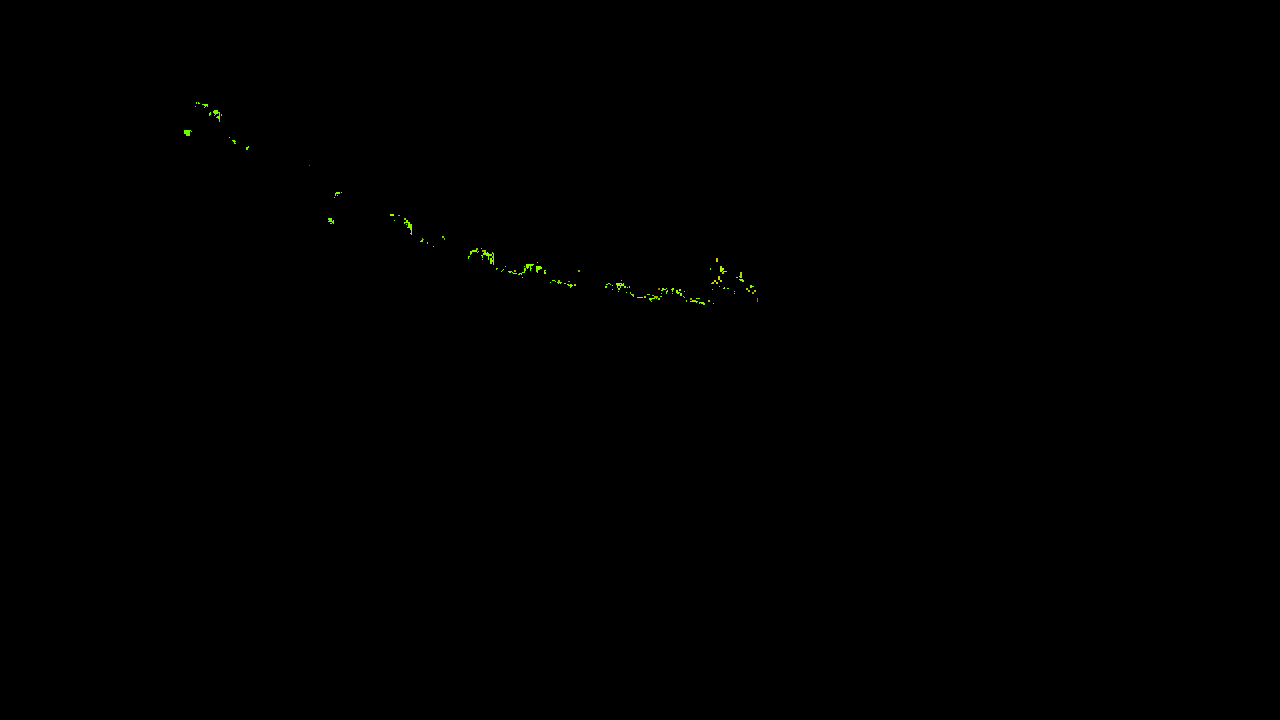

Cor vermelha detectada no frame 38


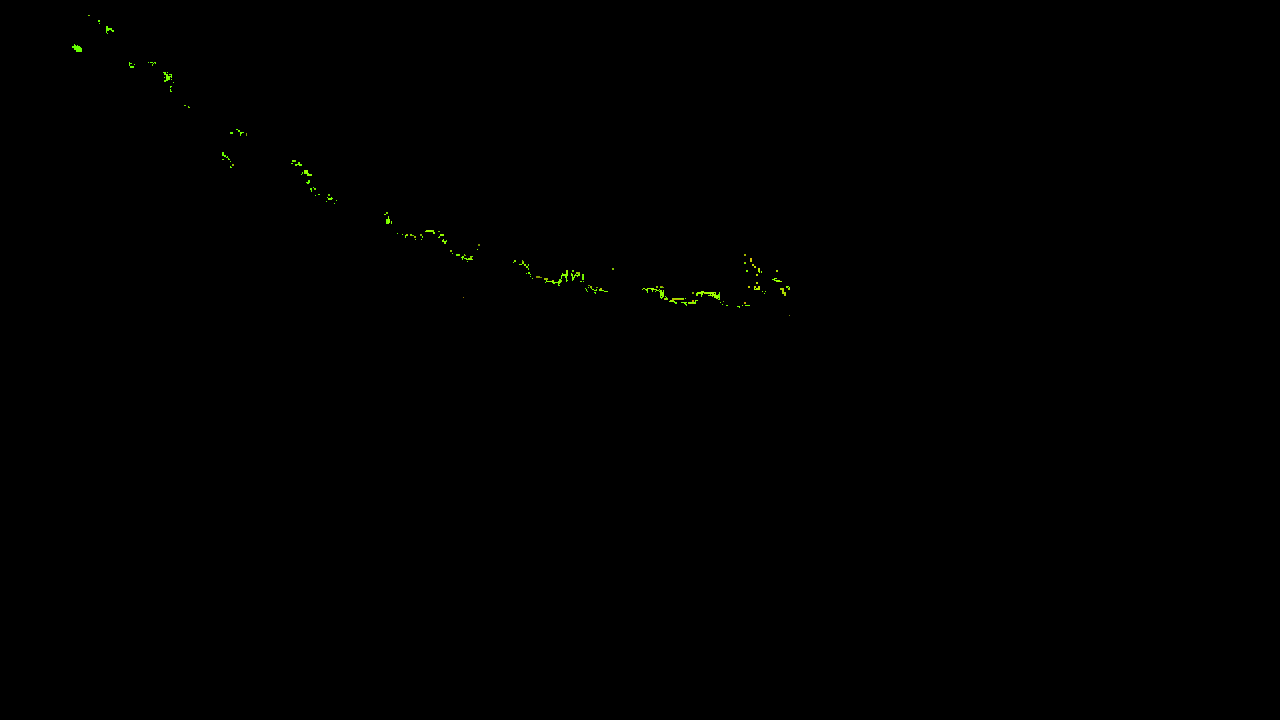

Cor vermelha detectada no frame 39


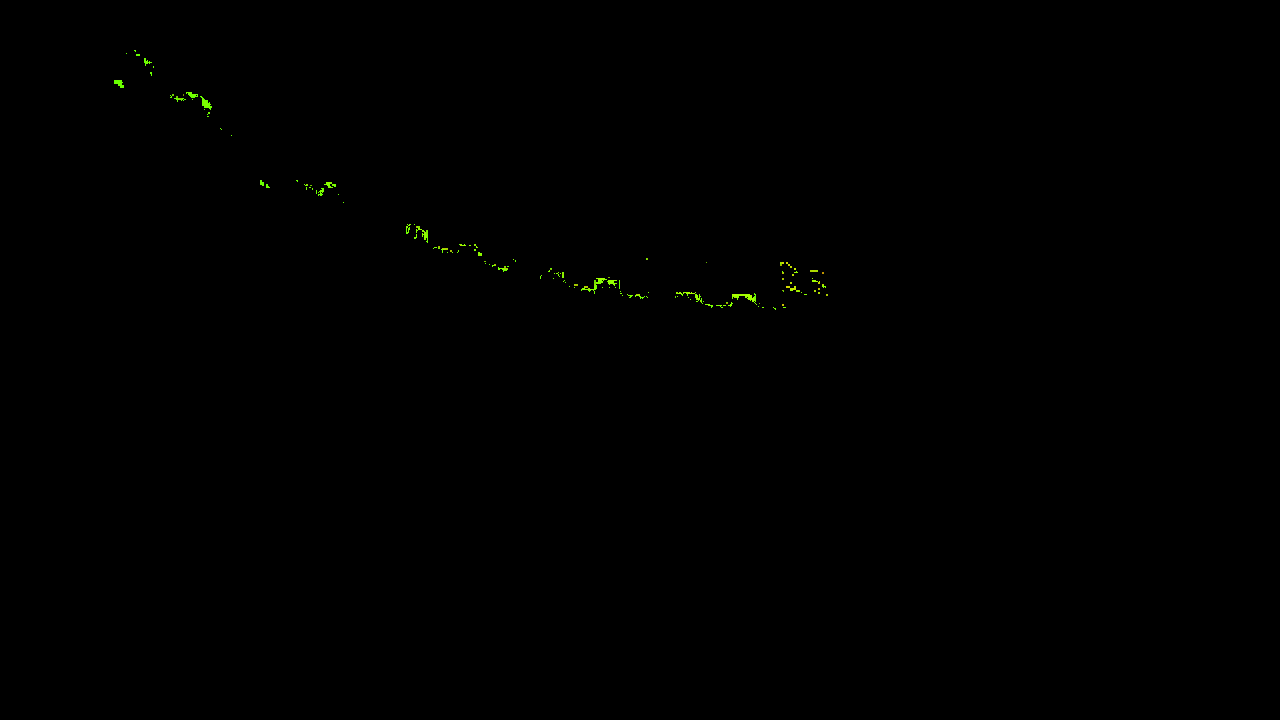

Cor vermelha detectada no frame 40


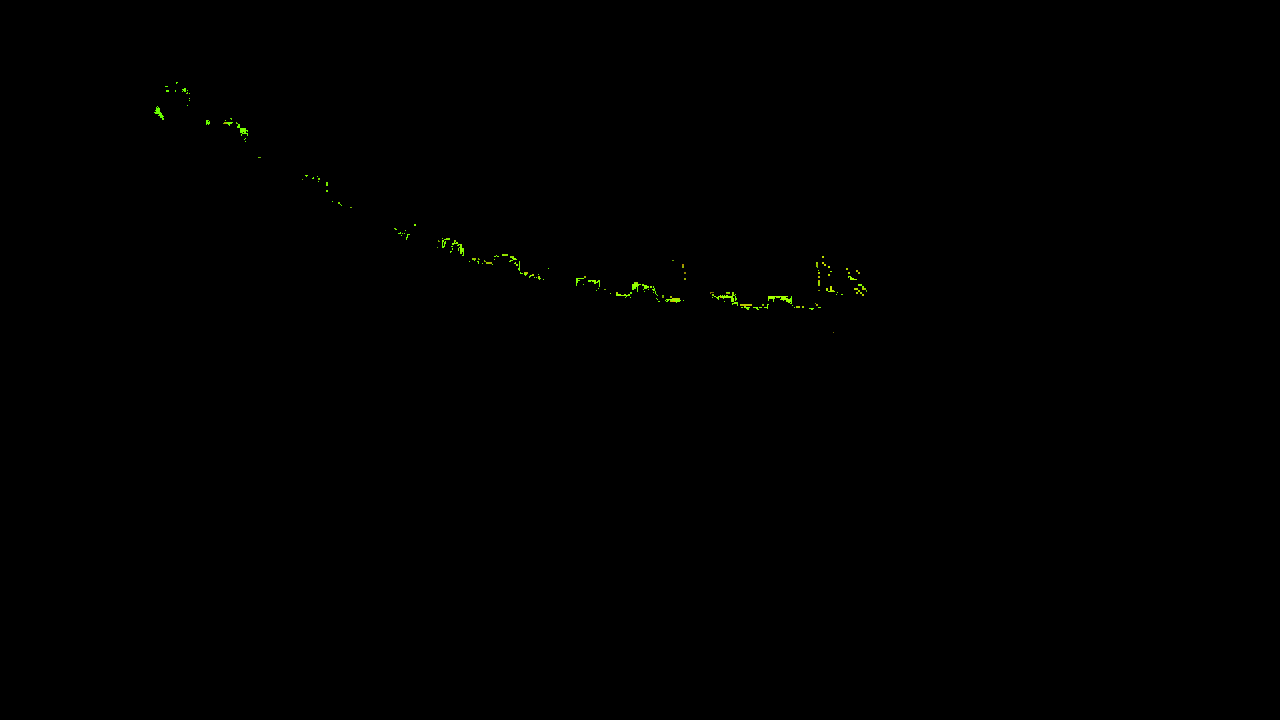

Cor vermelha detectada no frame 41


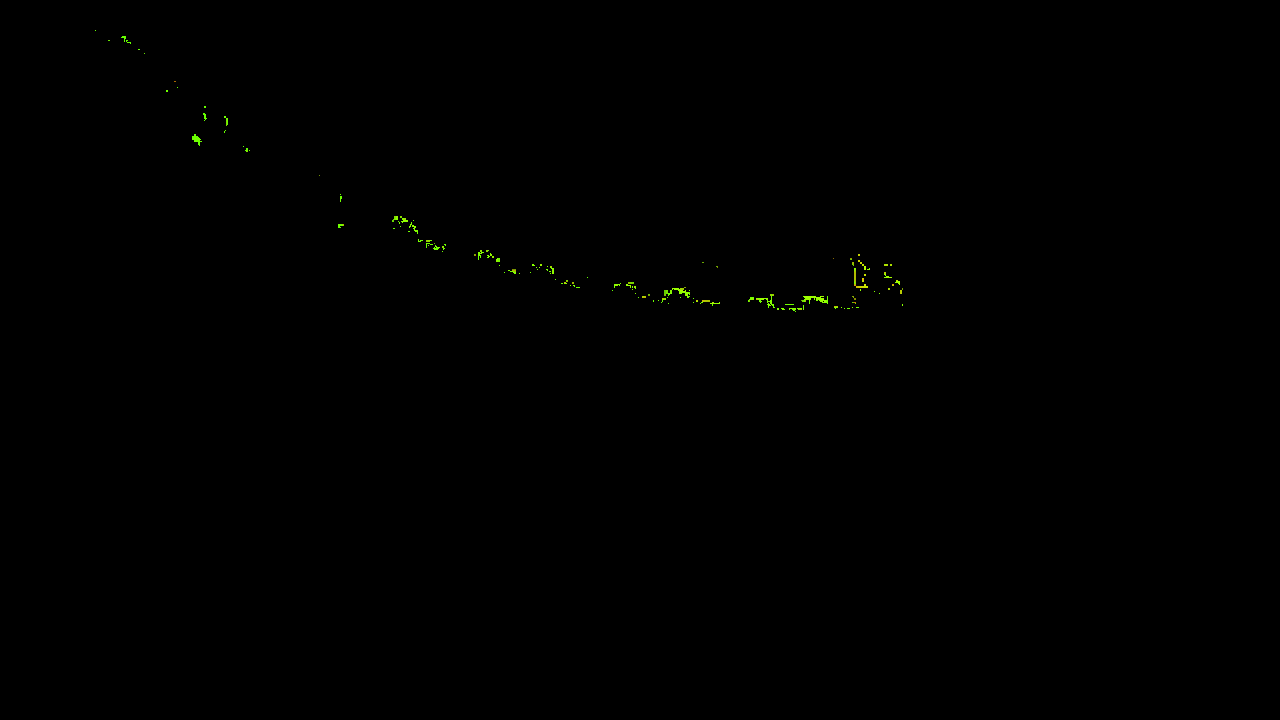

Cor vermelha detectada no frame 42


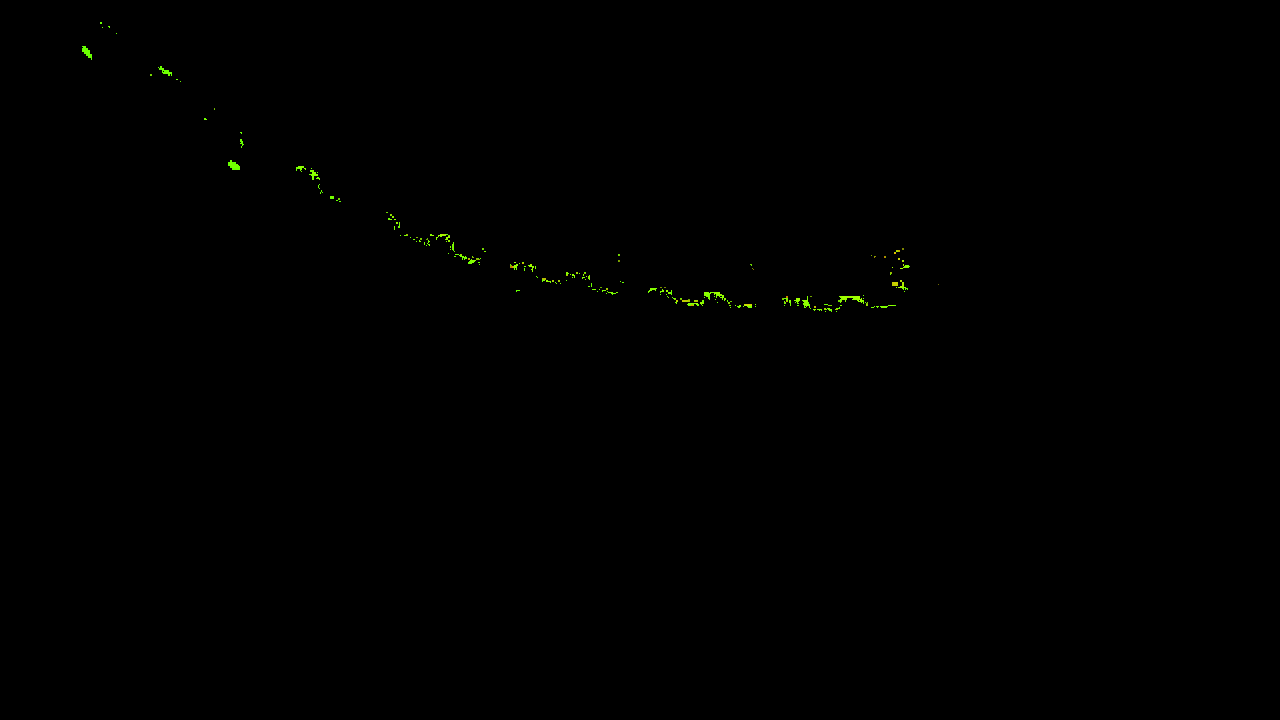

Cor vermelha detectada no frame 43


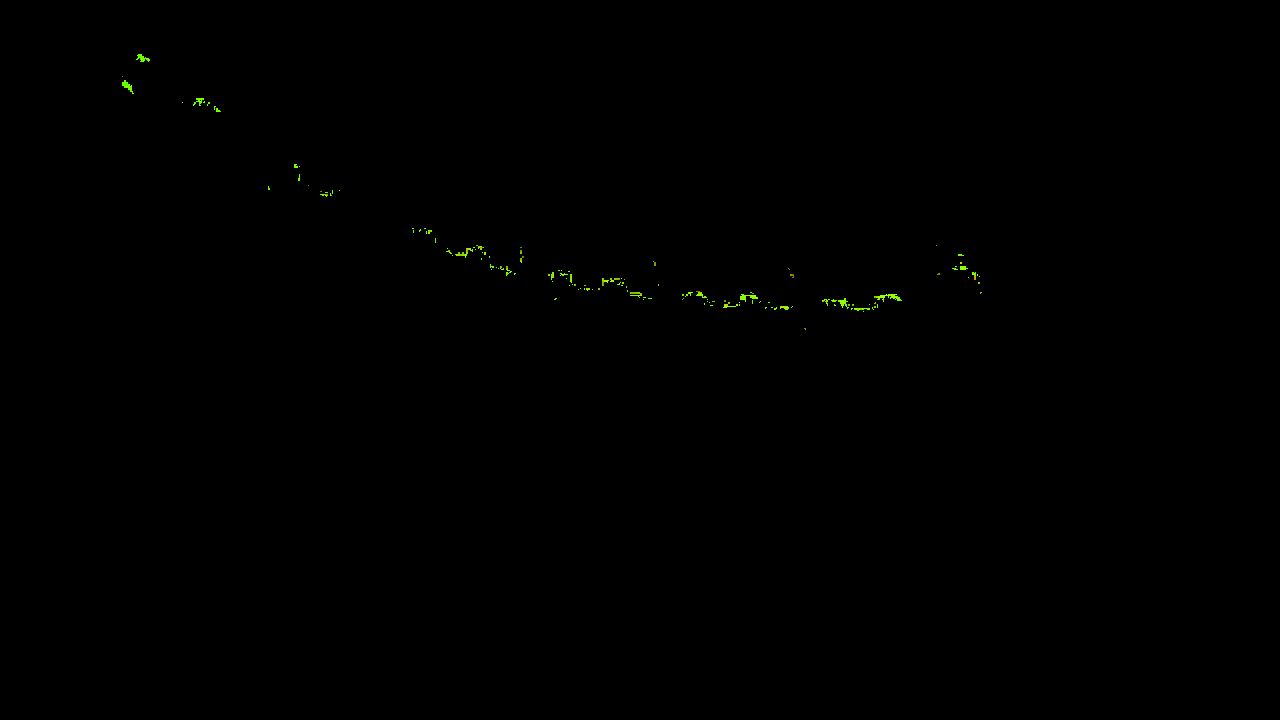

Cor vermelha detectada no frame 44


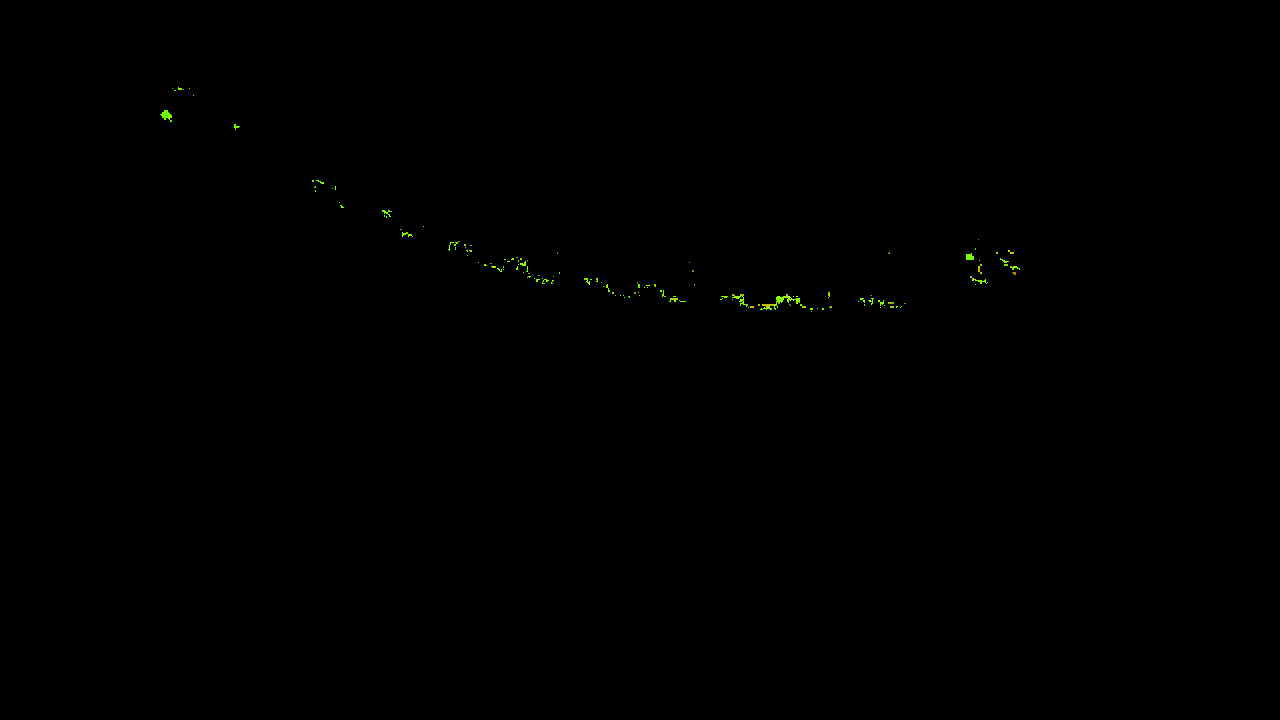

Cor vermelha detectada no frame 45


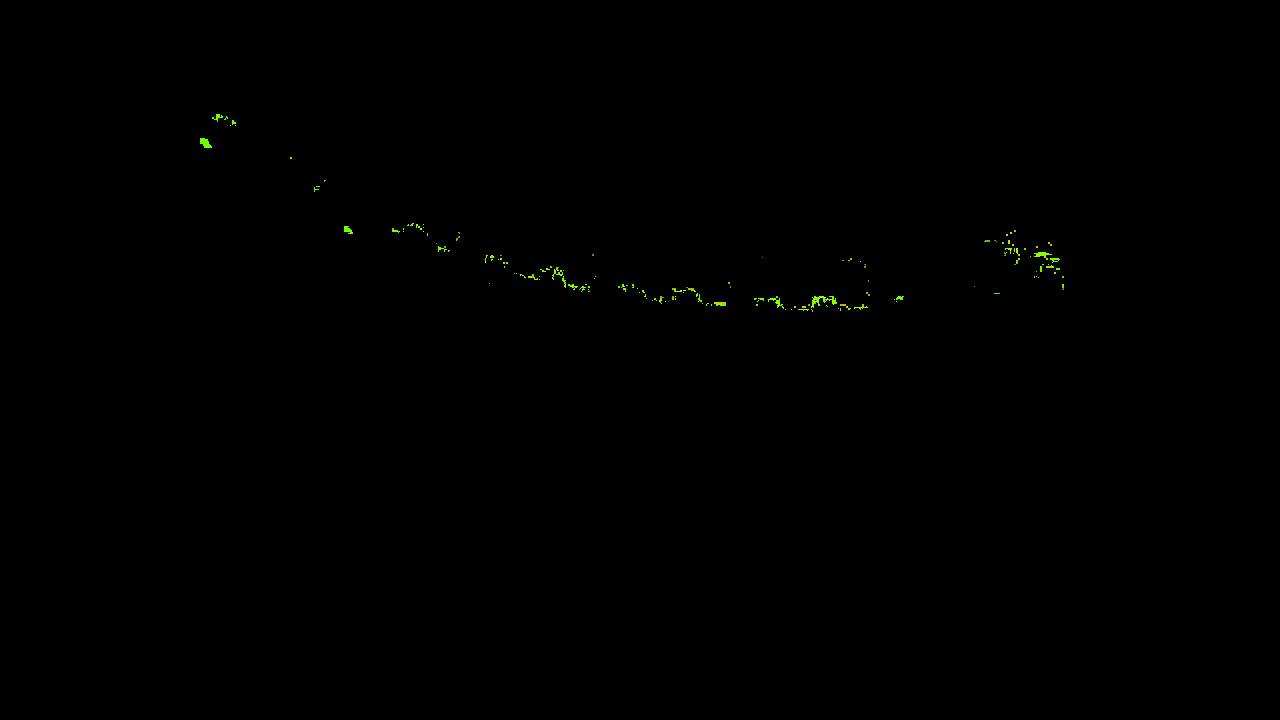

Cor vermelha detectada no frame 46


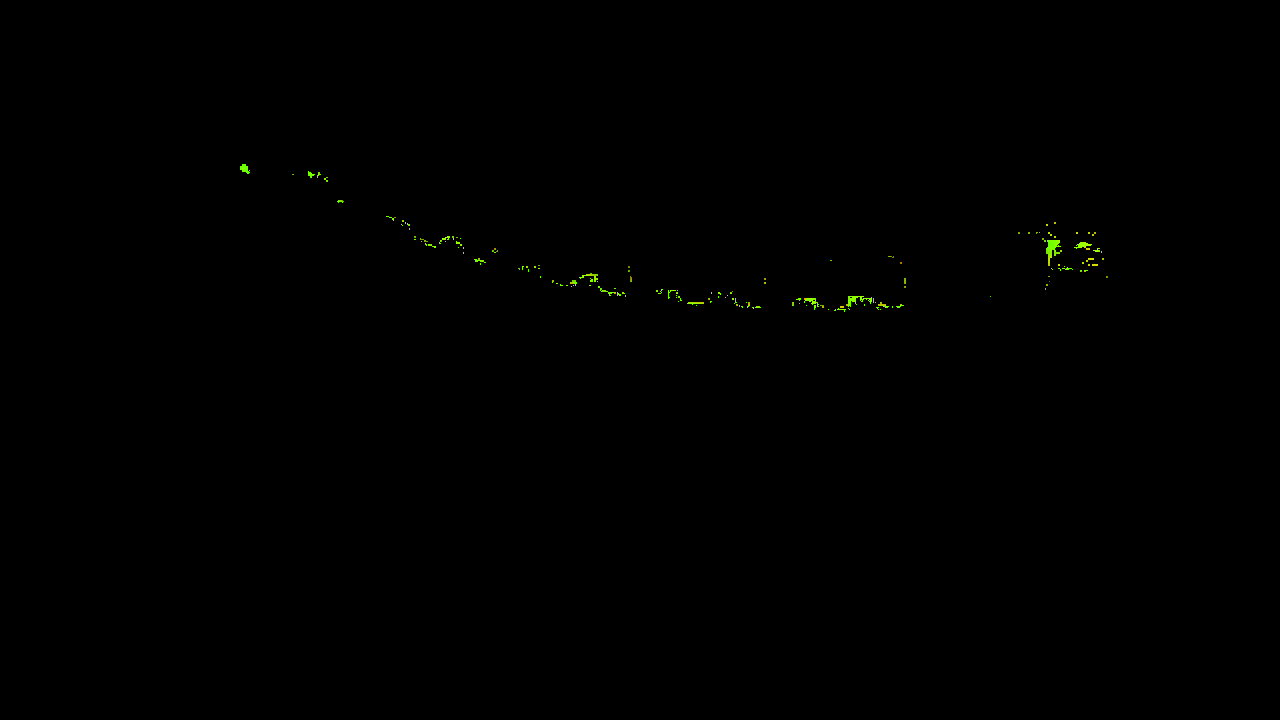

Cor vermelha detectada no frame 47


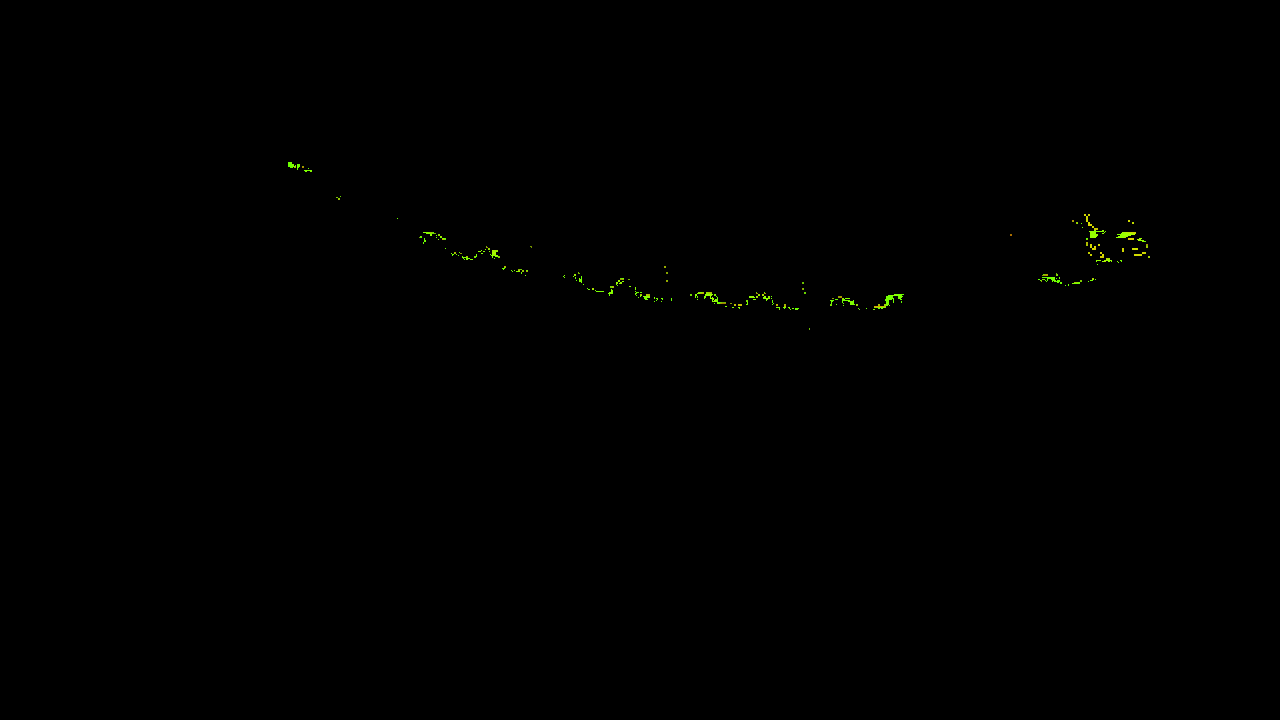

Cor vermelha detectada no frame 48


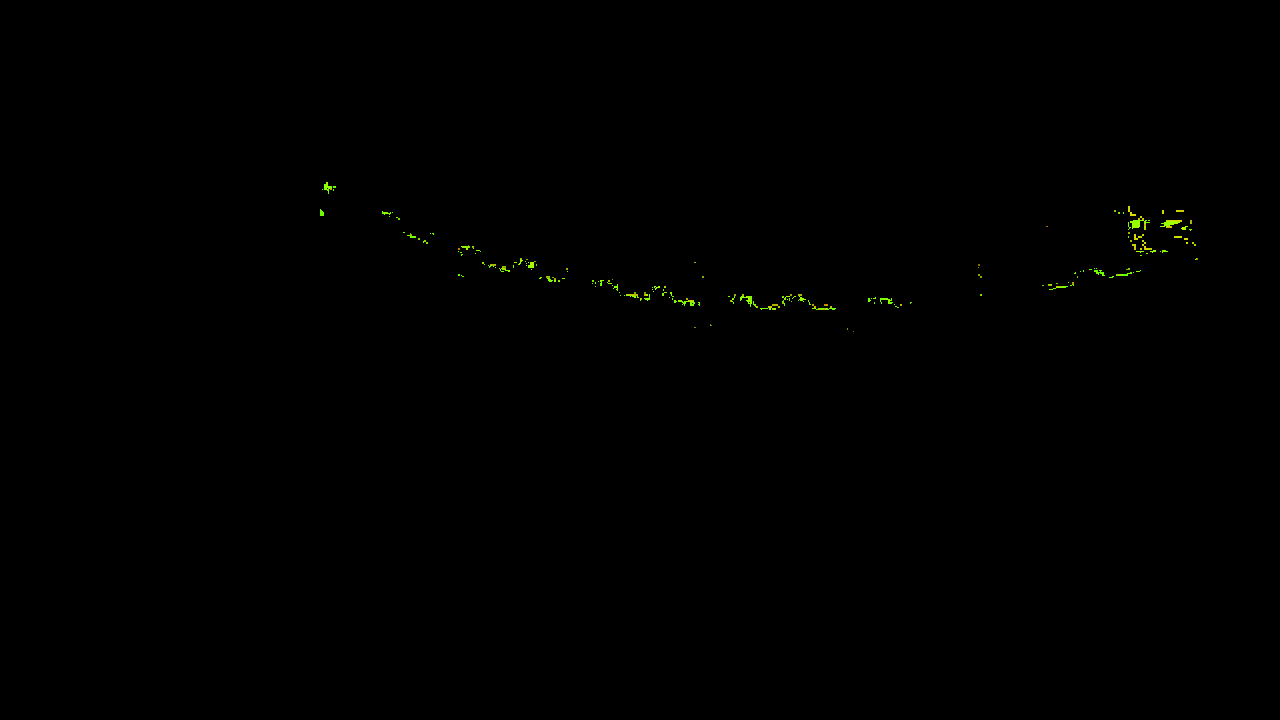

Cor vermelha detectada no frame 49


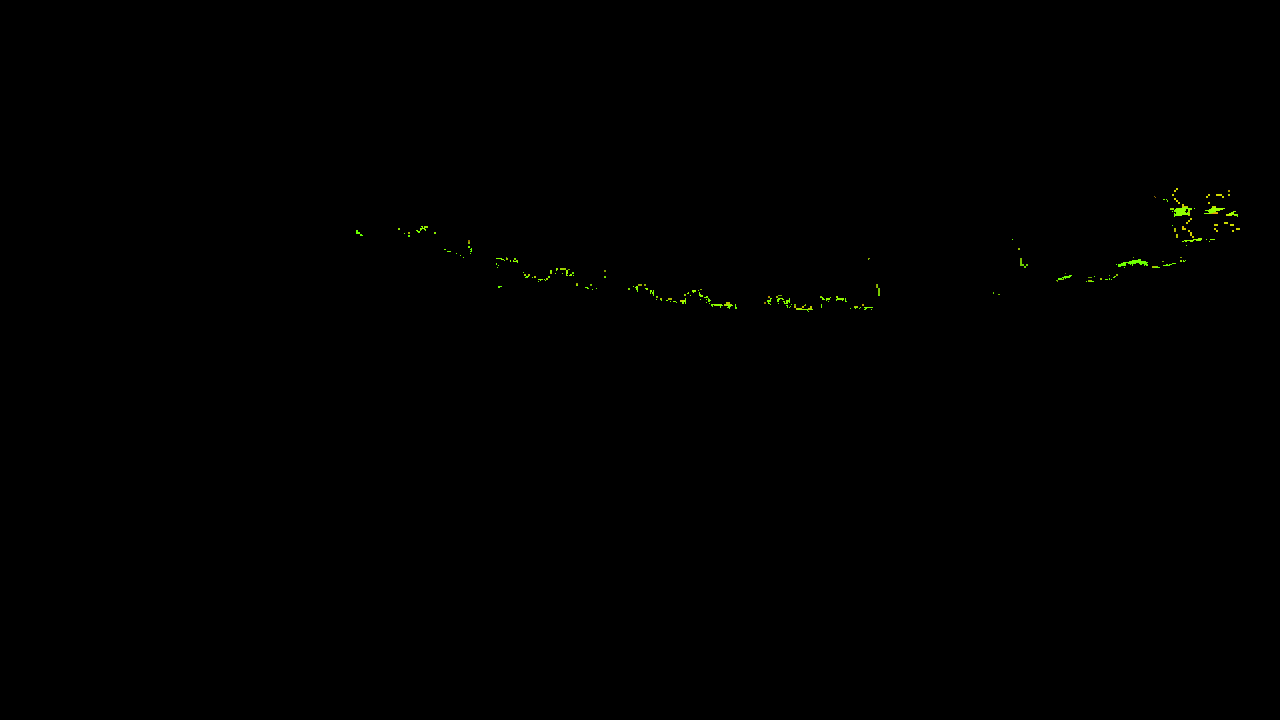

Cor vermelha detectada no frame 50


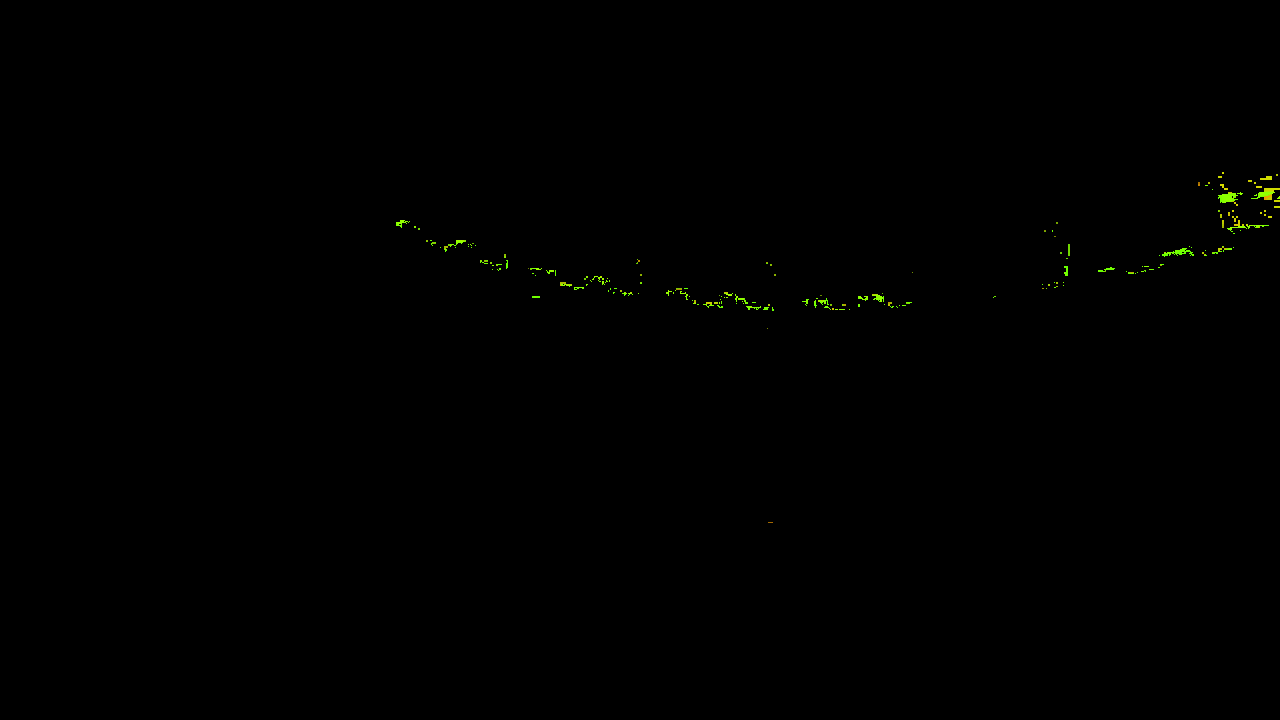

Cor vermelha detectada no frame 51


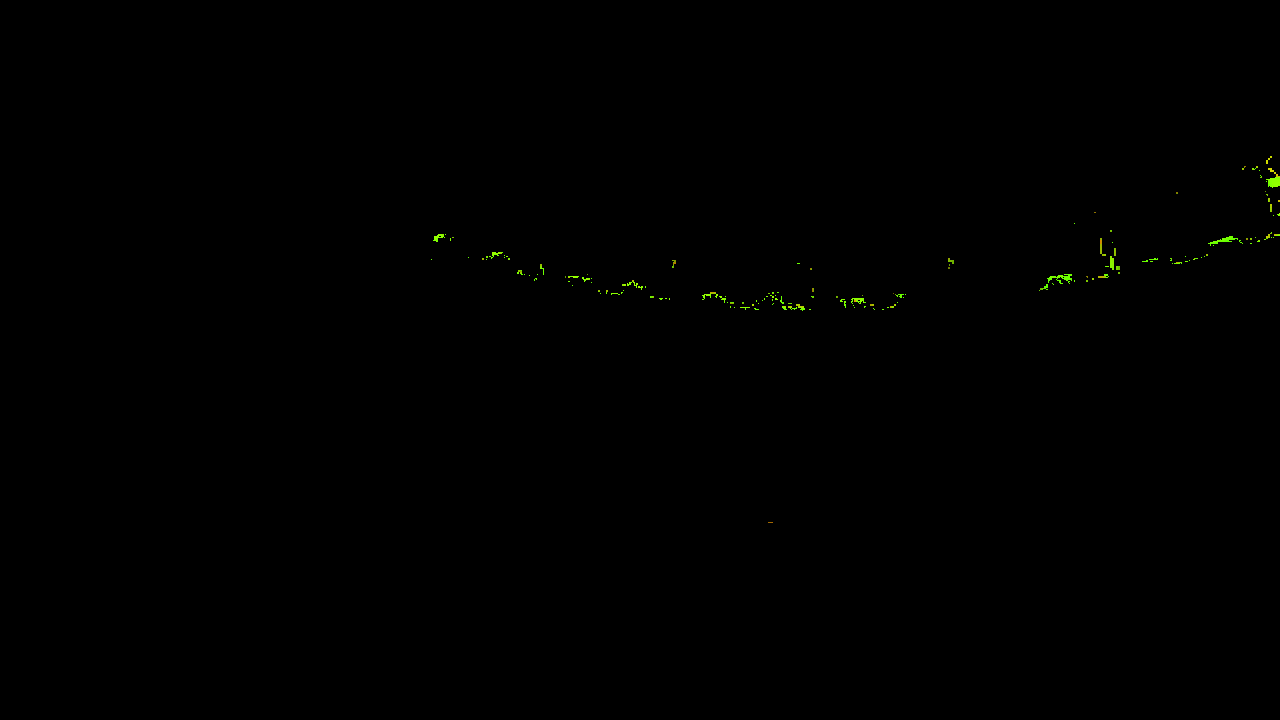

Cor vermelha detectada no frame 52


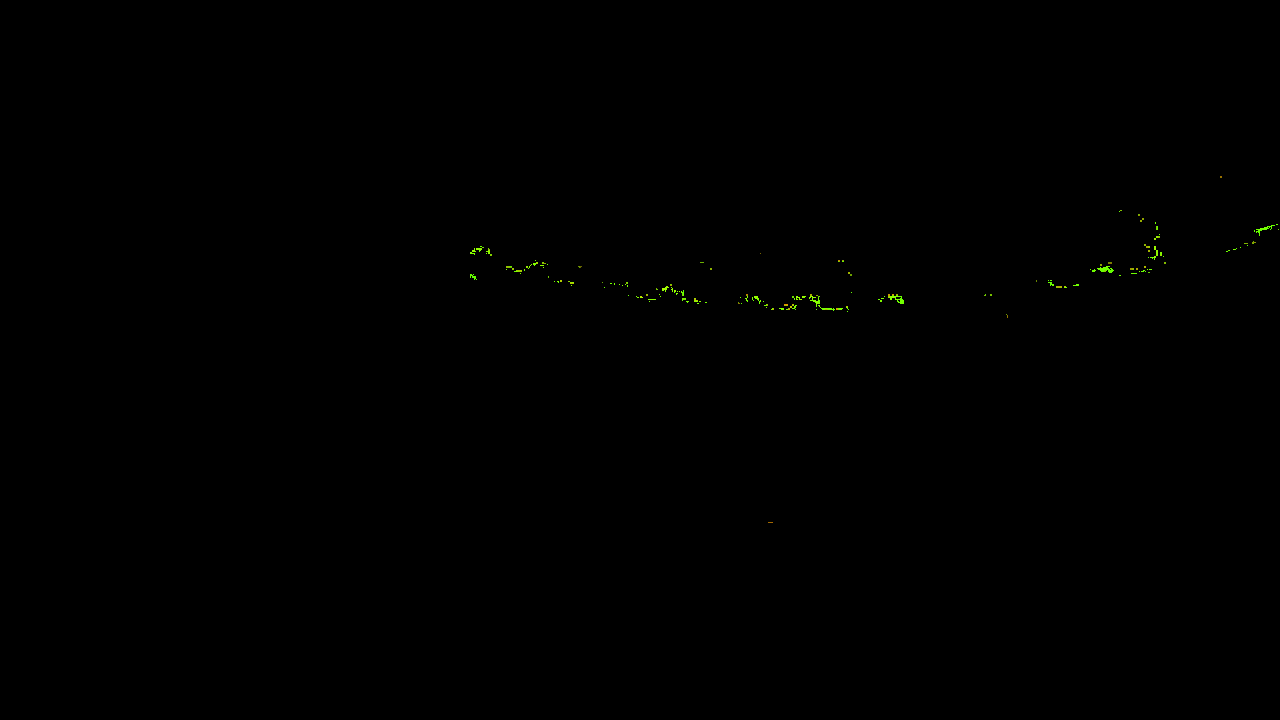

Cor vermelha detectada no frame 53


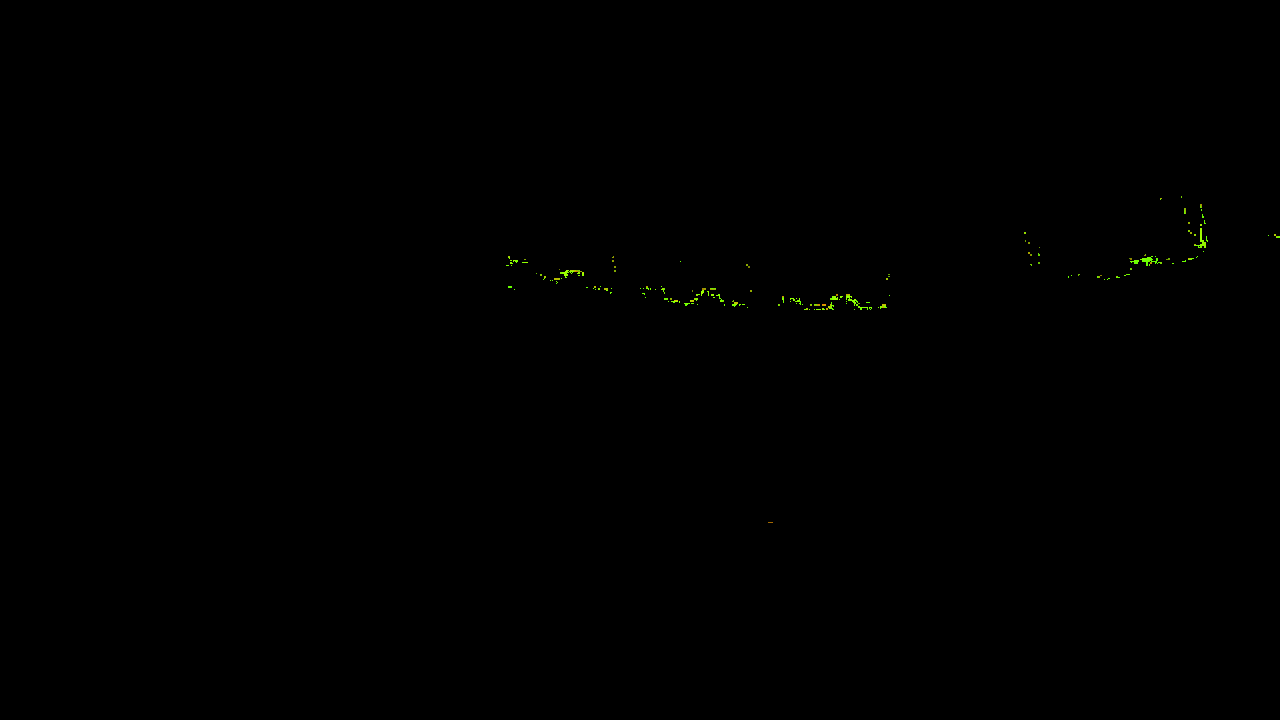

Cor vermelha detectada no frame 54


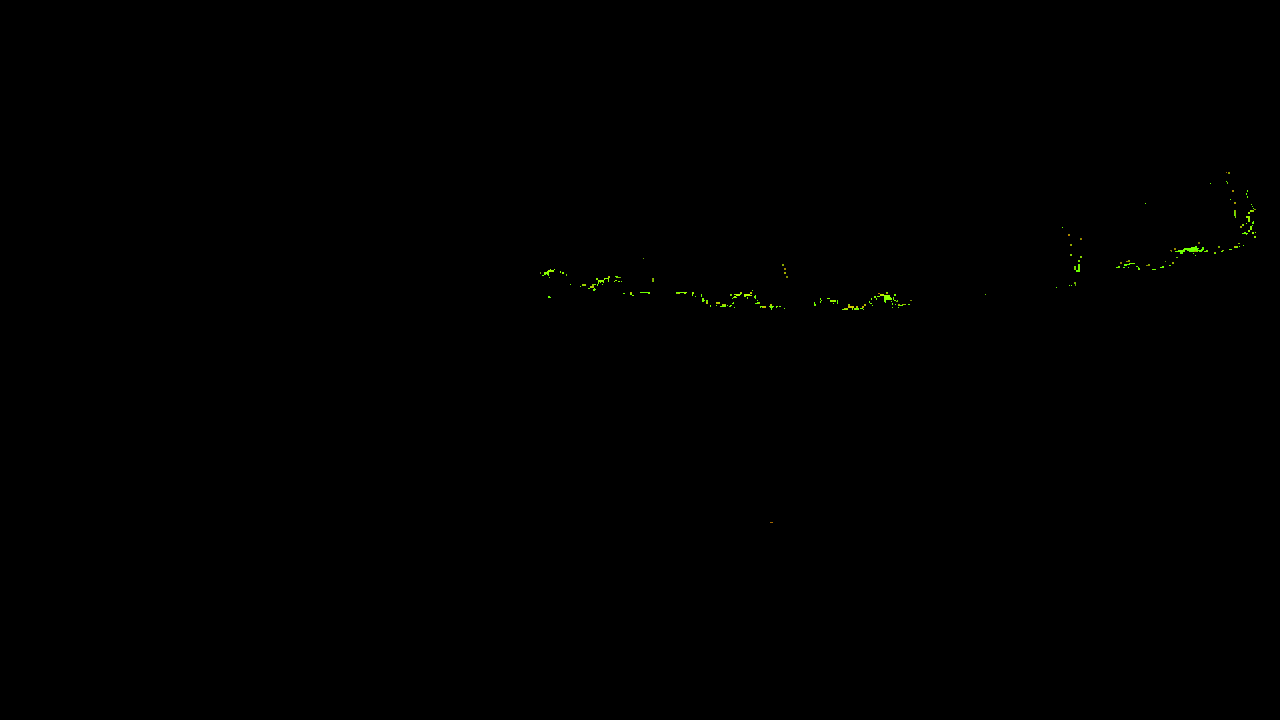

Cor vermelha detectada no frame 55


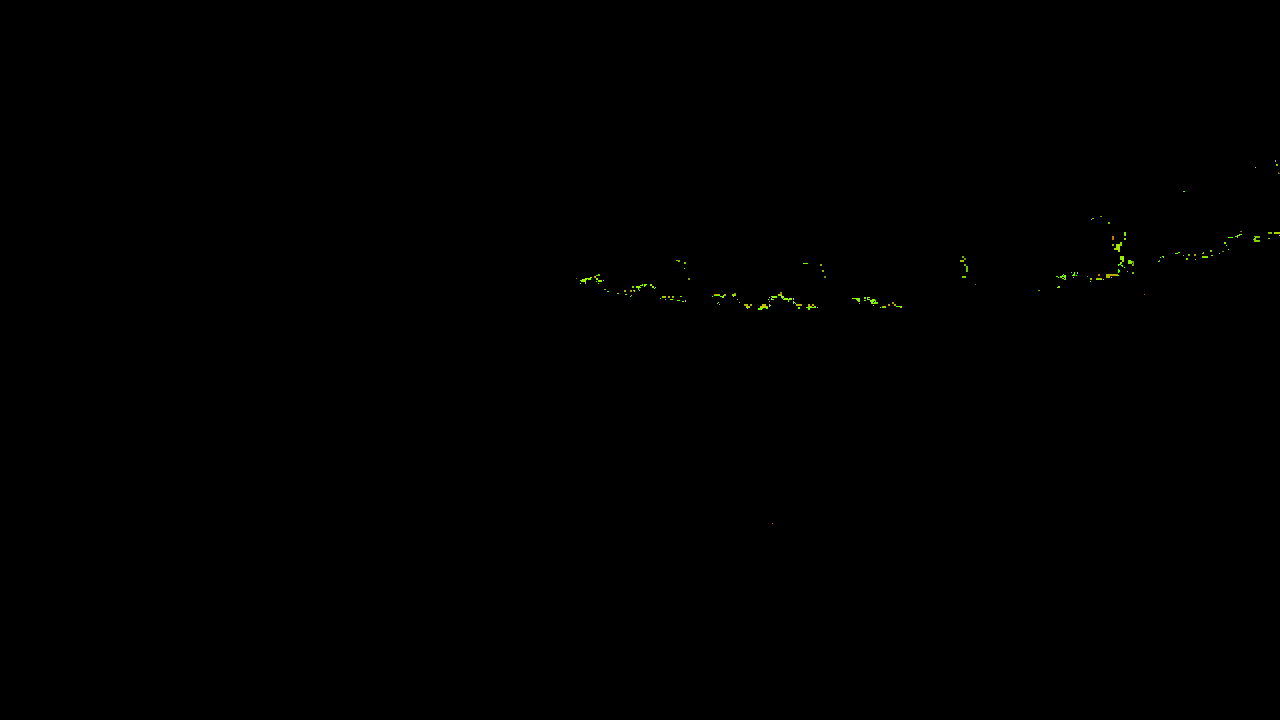

Cor vermelha detectada no frame 56


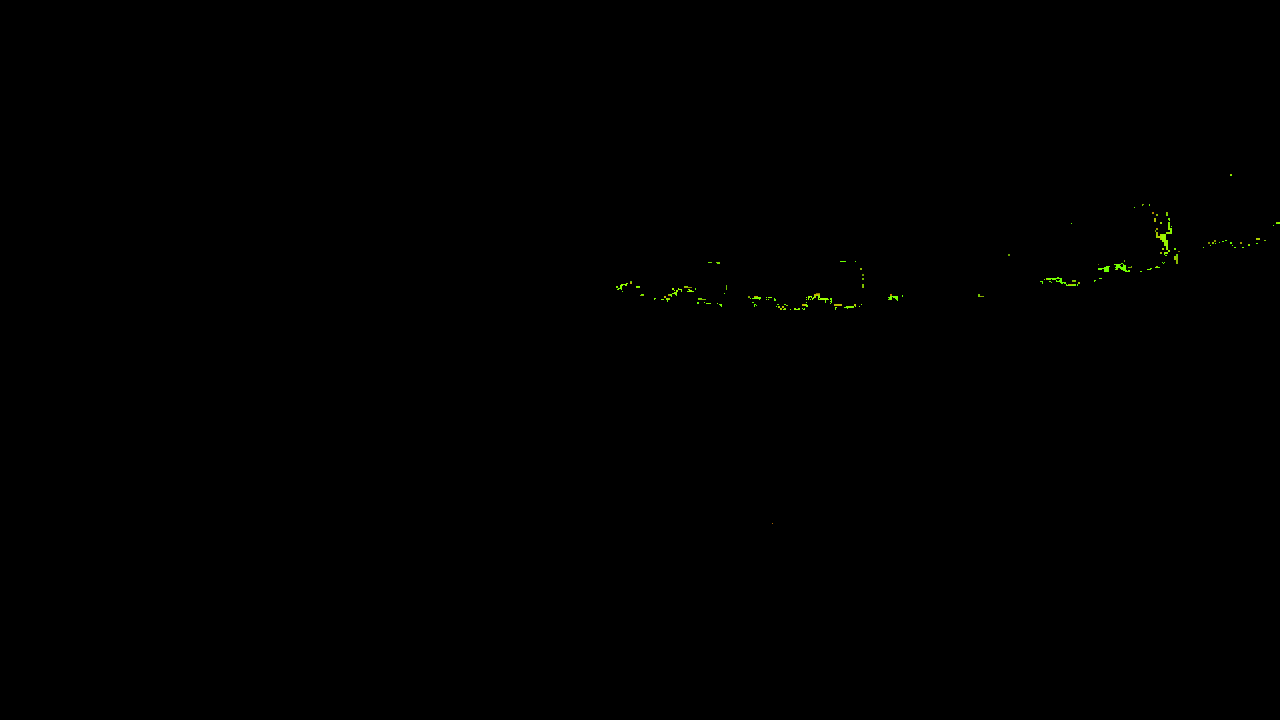

Cor vermelha detectada no frame 57


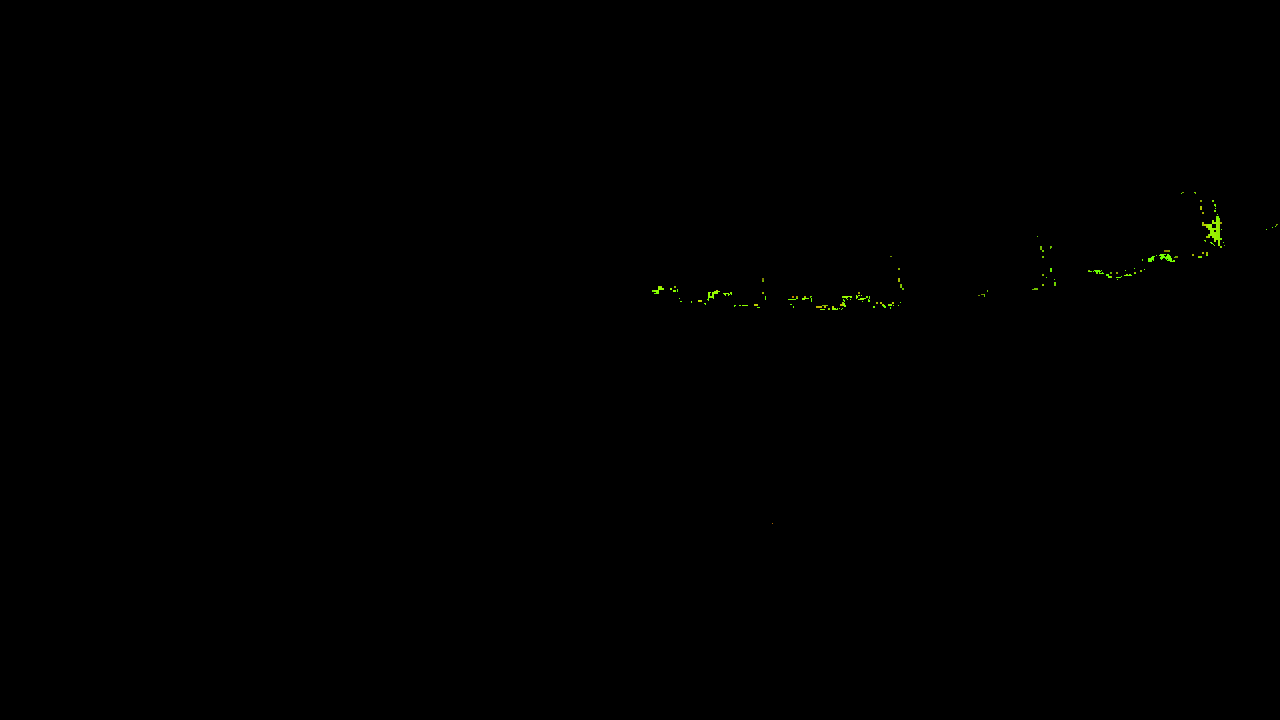

Cor vermelha detectada no frame 58


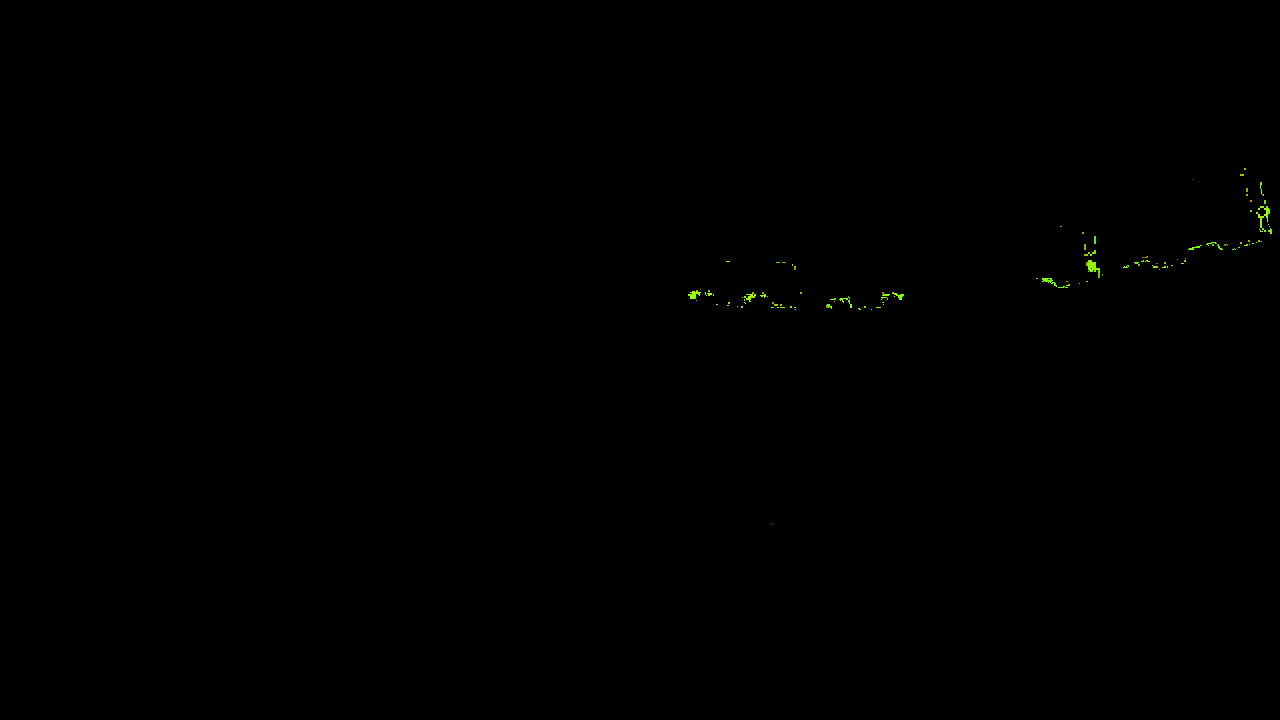

Cor vermelha detectada no frame 59


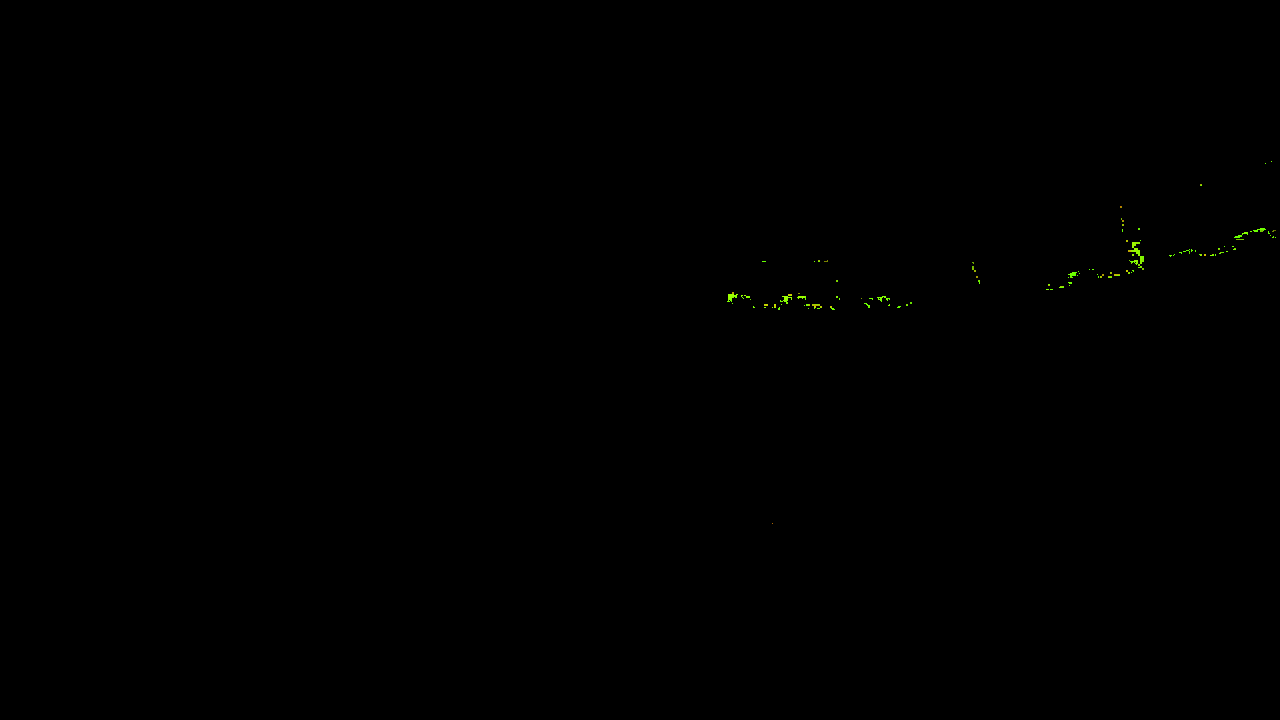

Cor vermelha detectada no frame 60


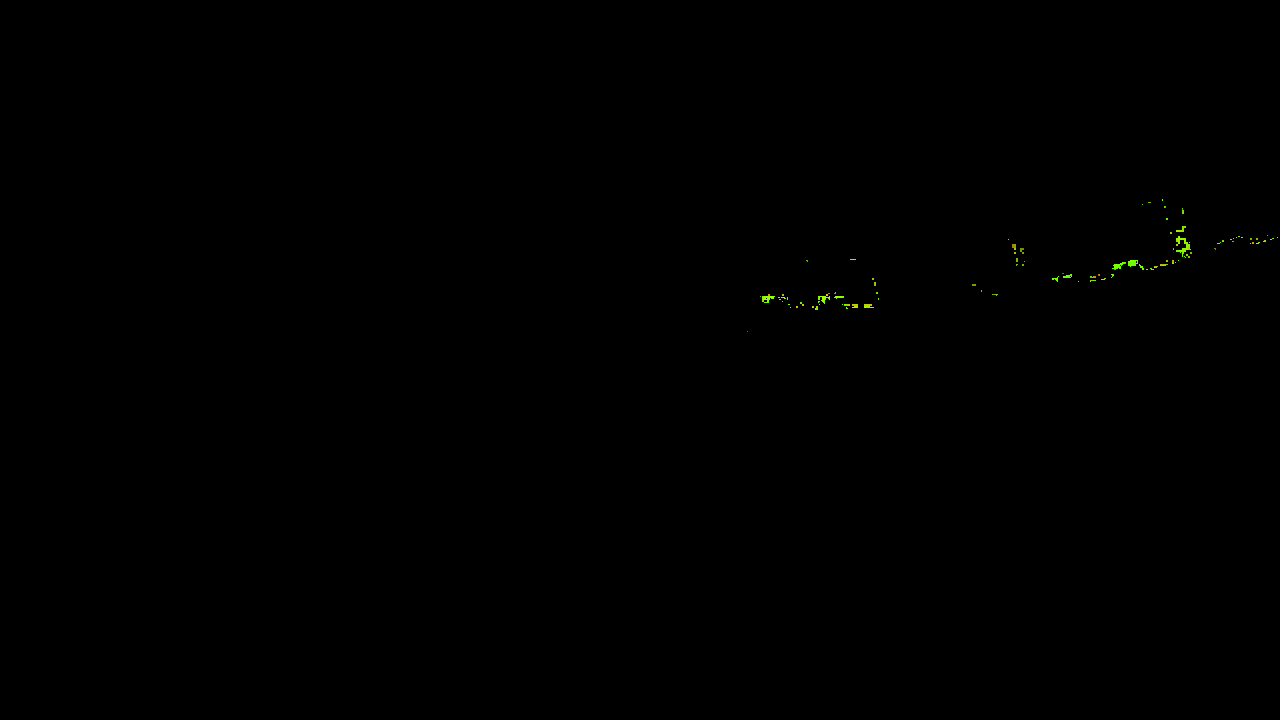

Cor vermelha detectada no frame 61


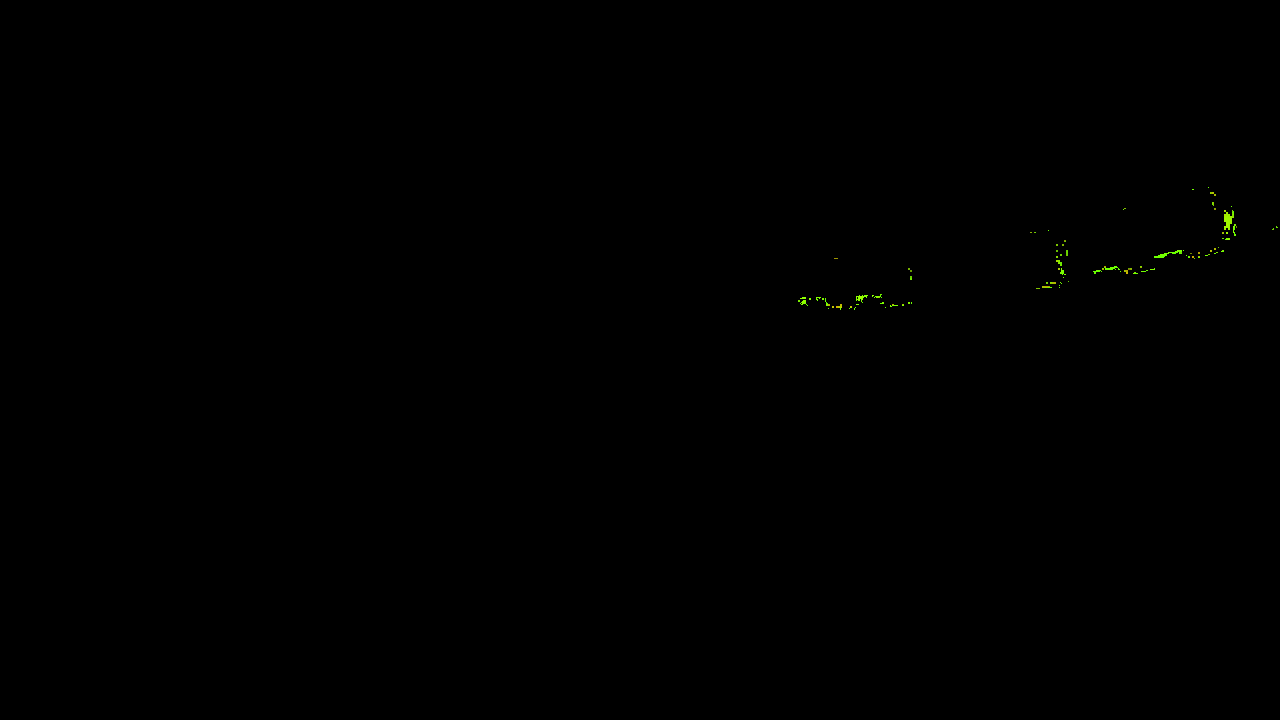

Cor vermelha detectada no frame 62


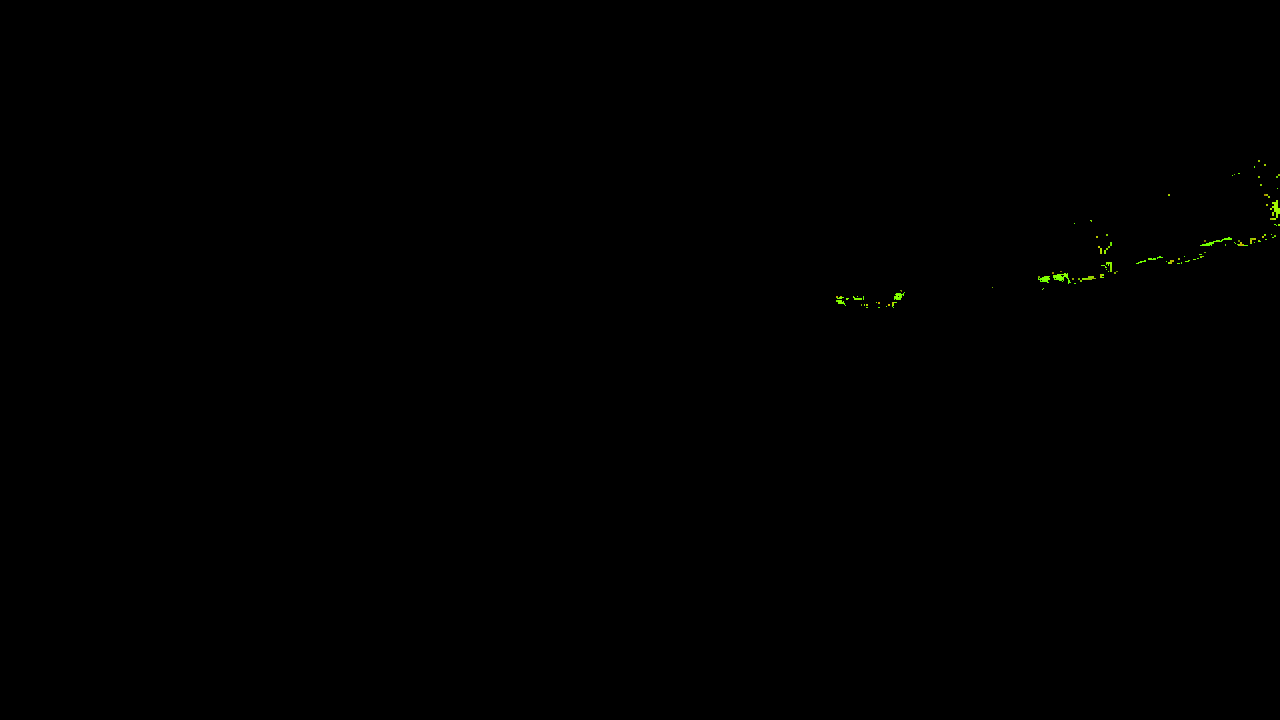

Cor vermelha detectada no frame 63


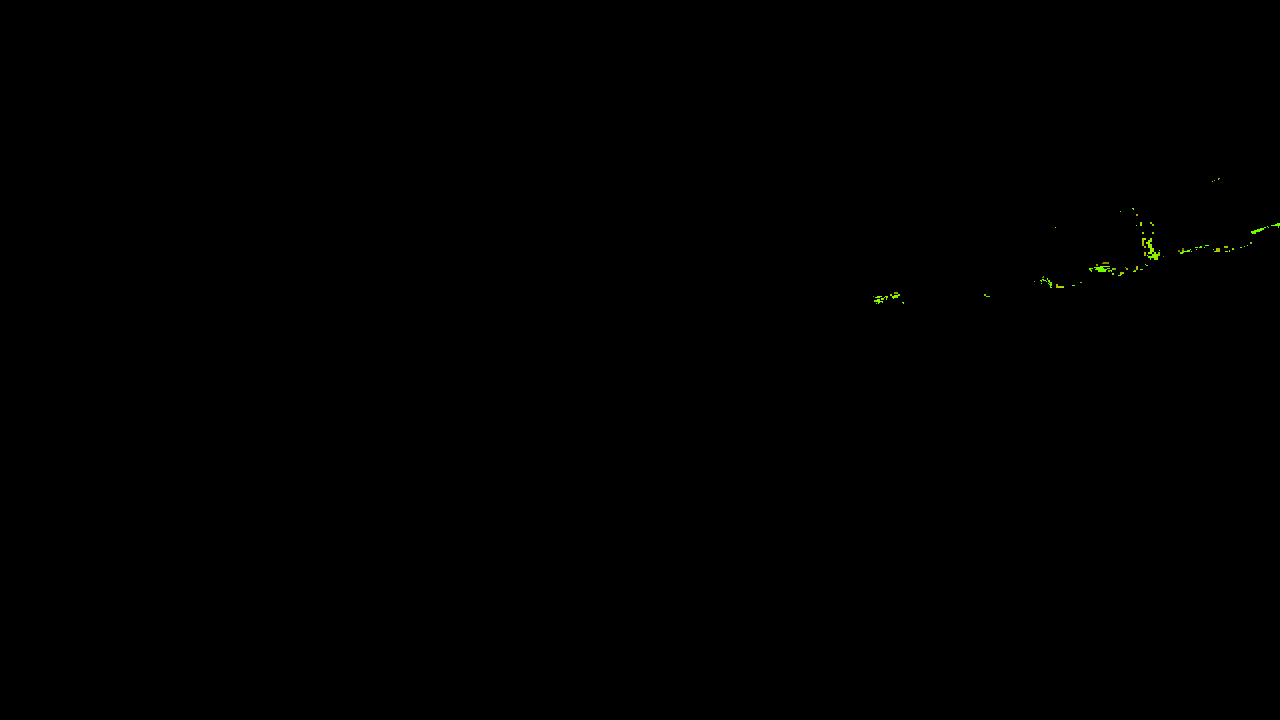

Cor vermelha detectada no frame 64


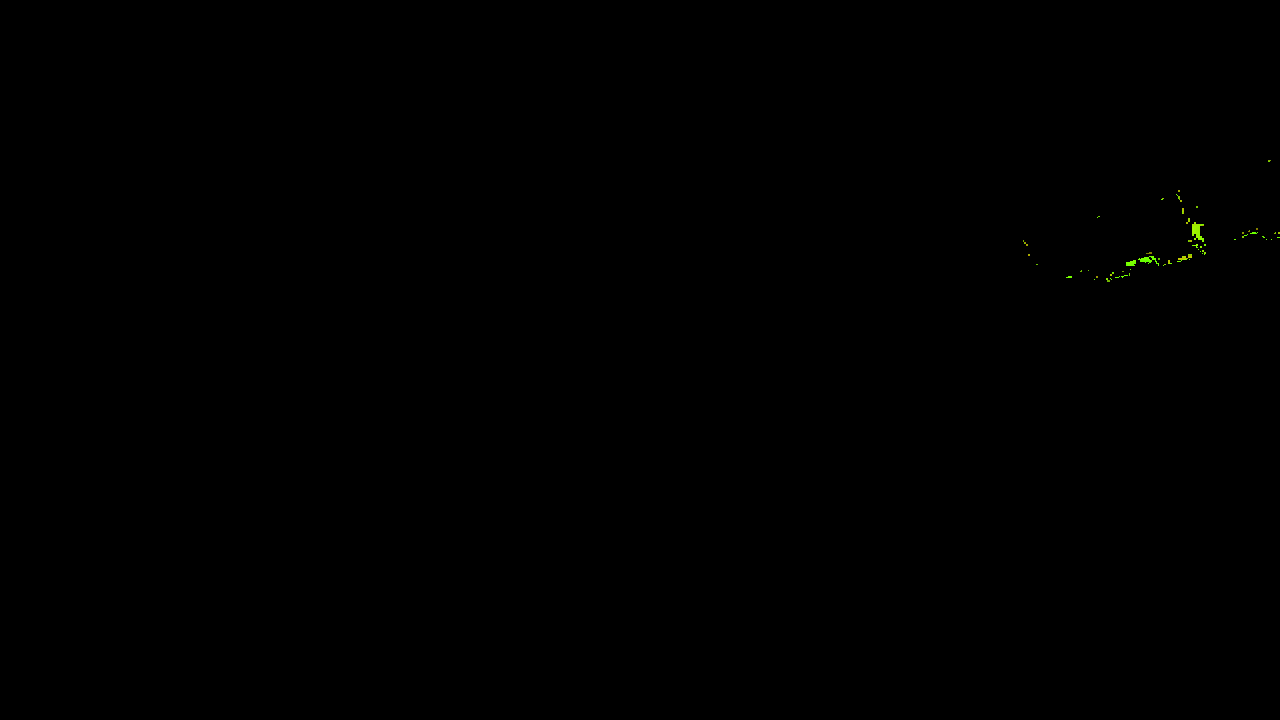

Cor vermelha detectada no frame 65


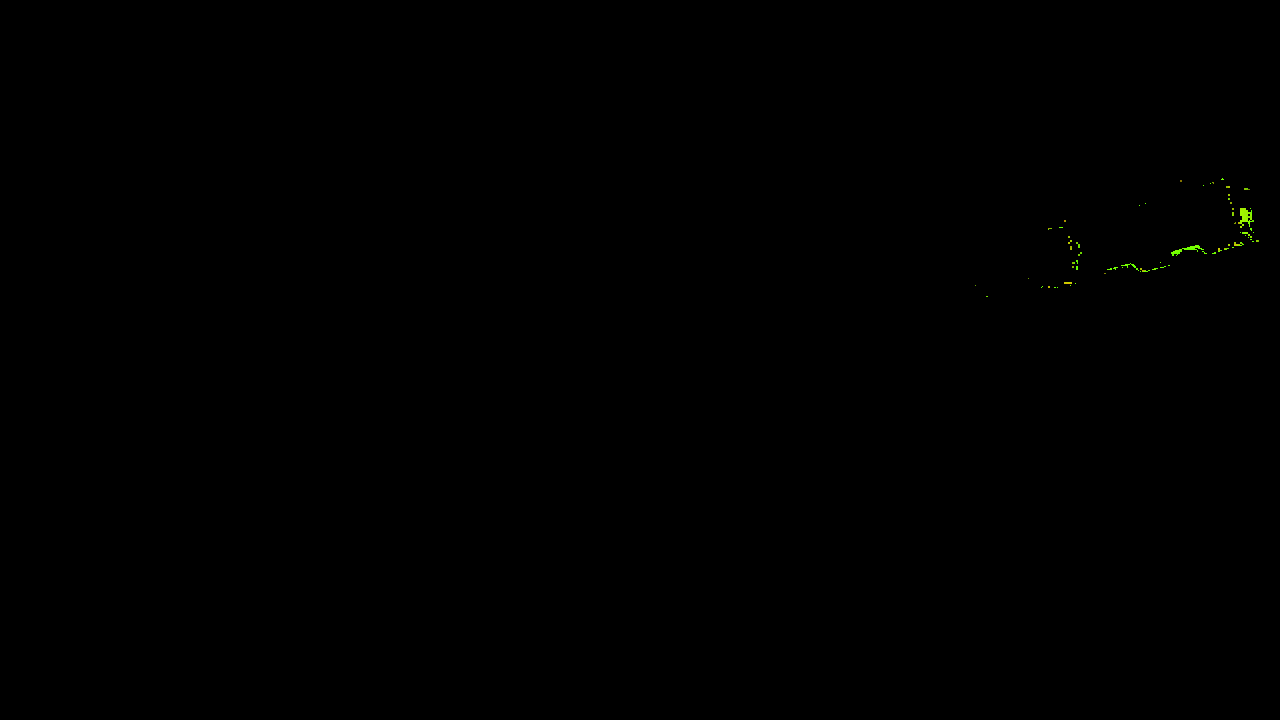

Cor vermelha detectada no frame 66


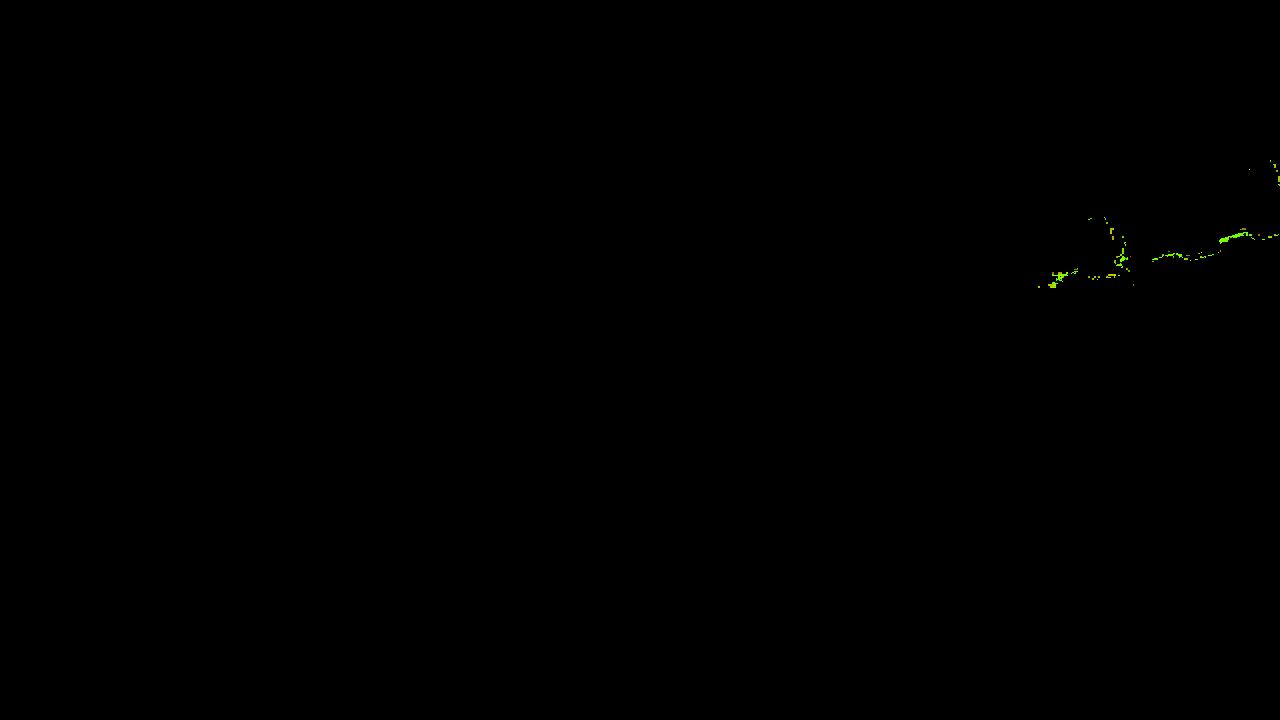

Cor vermelha detectada no frame 67


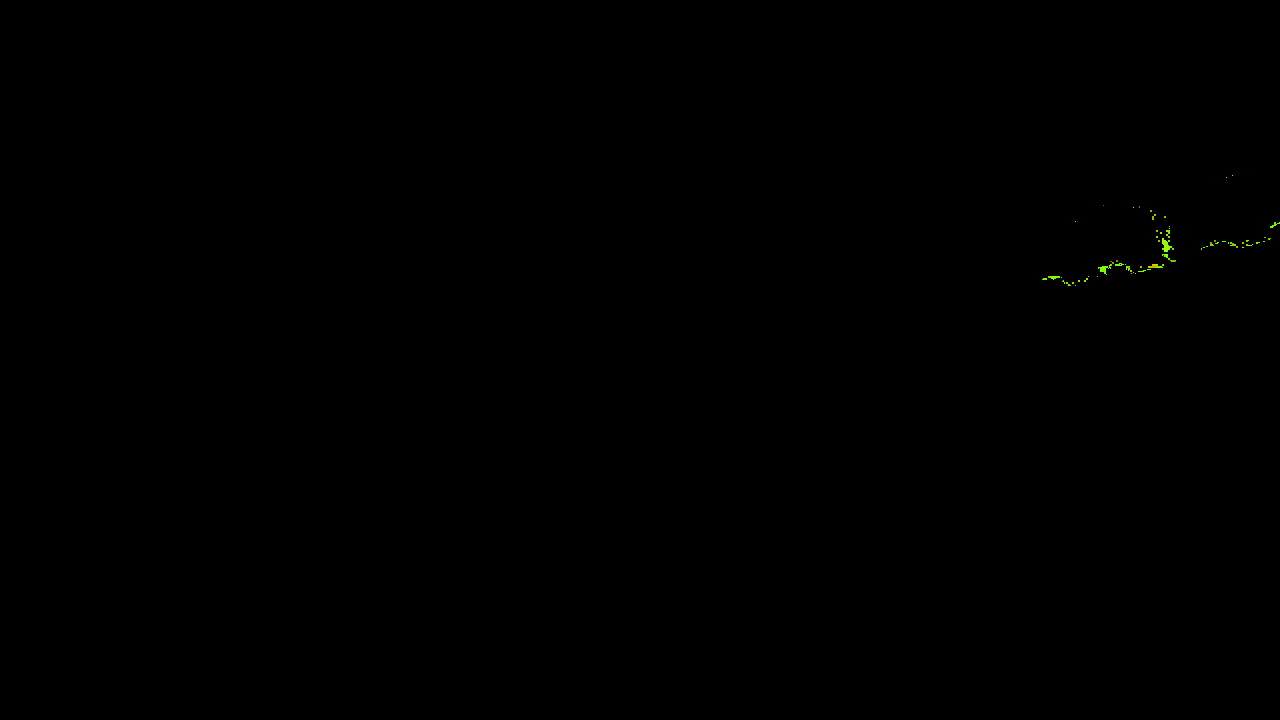

Cor vermelha detectada no frame 68


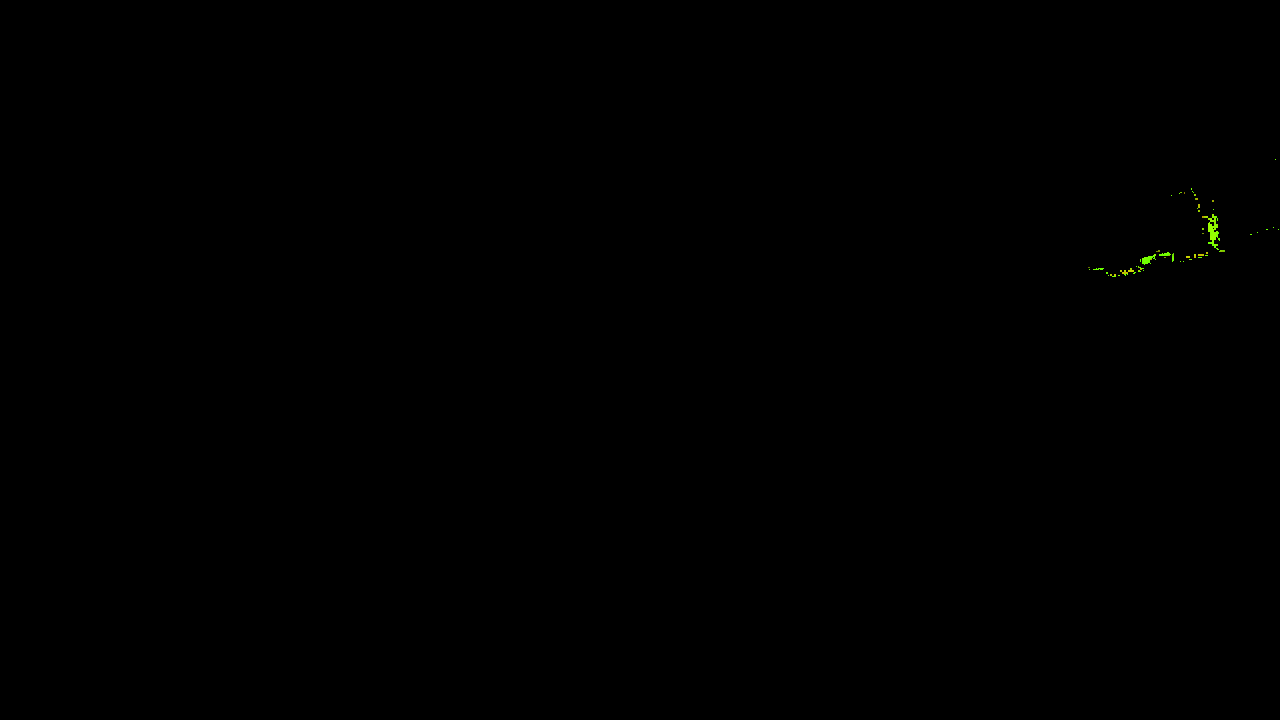

Cor vermelha detectada no frame 69


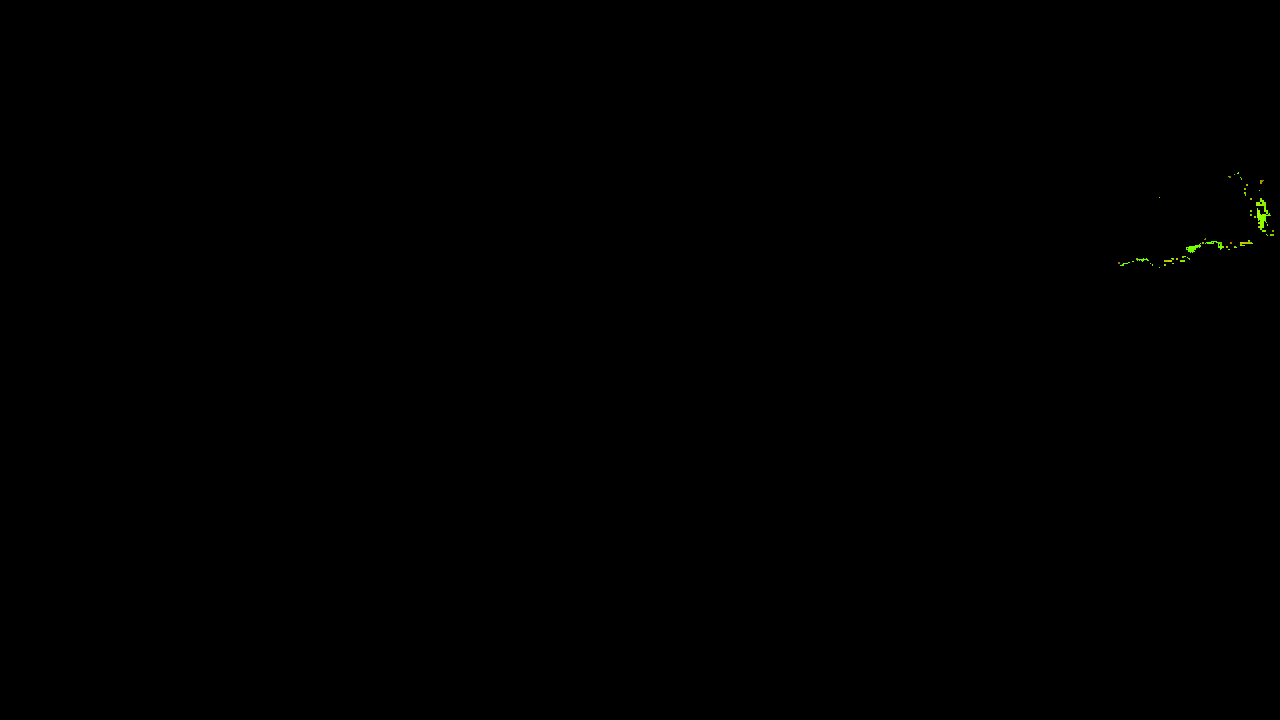

Cor vermelha detectada no frame 70


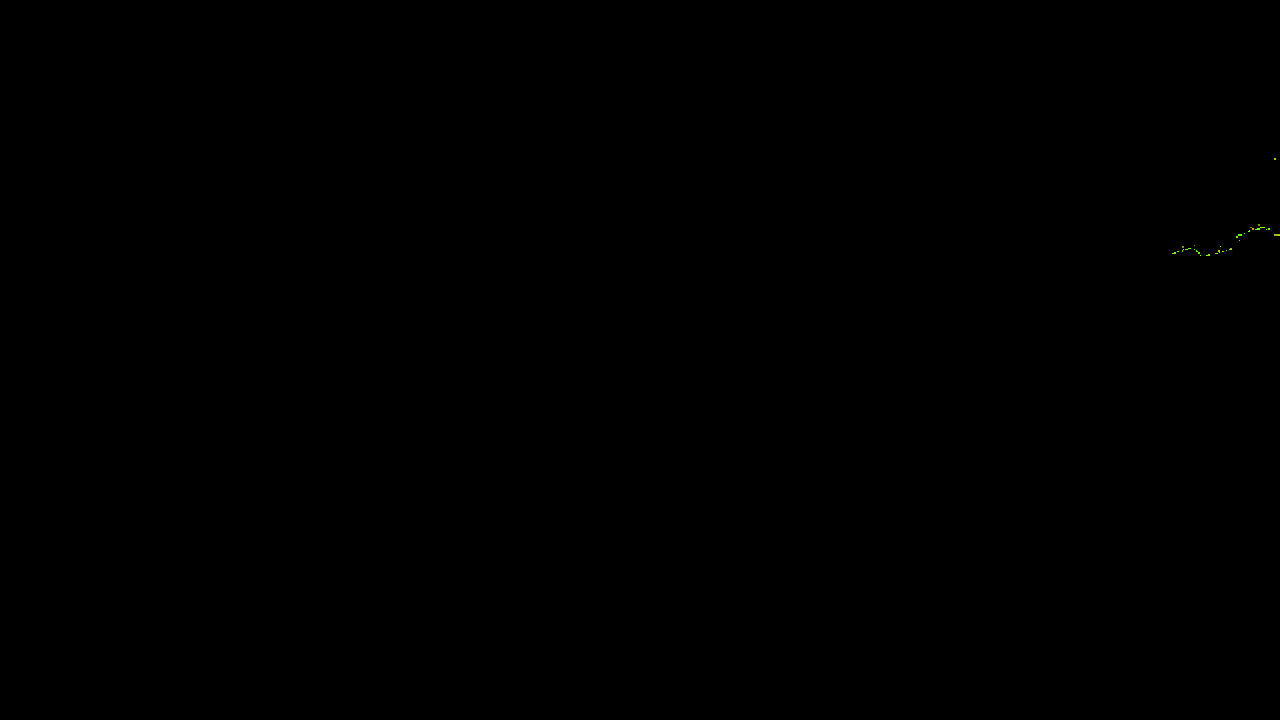

Cor vermelha detectada no frame 71


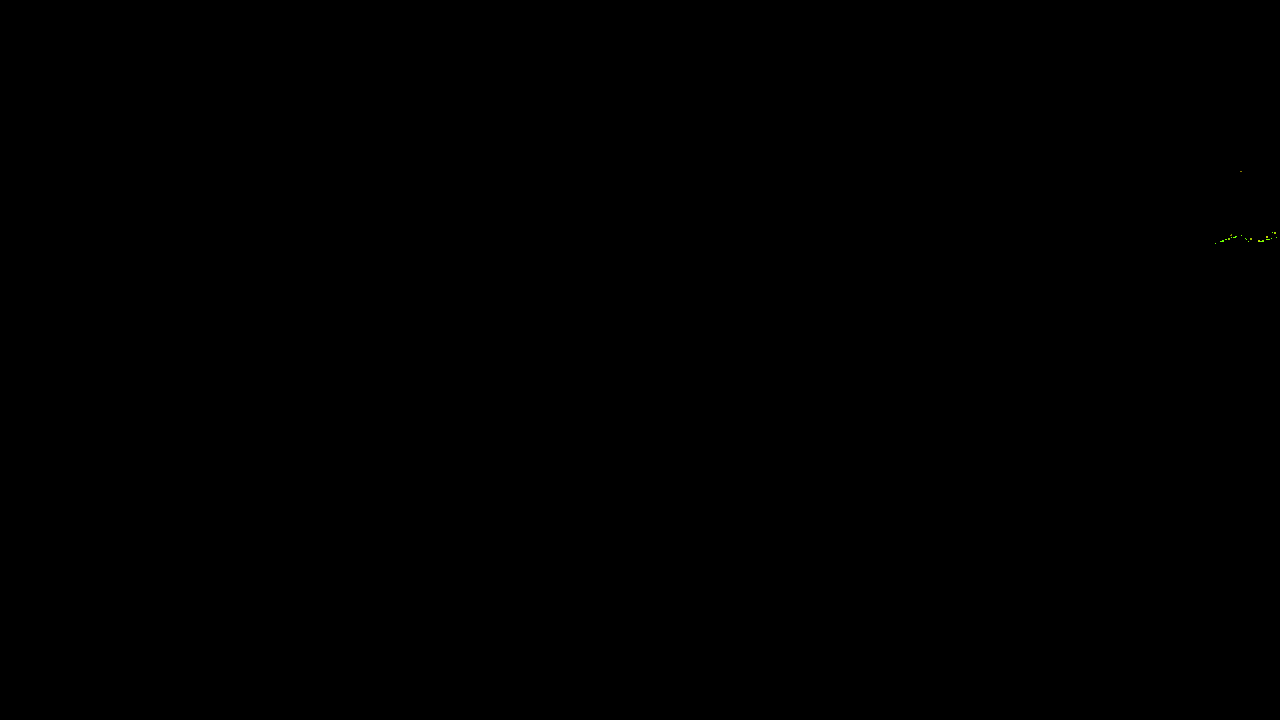

Cor vermelha detectada no frame 72


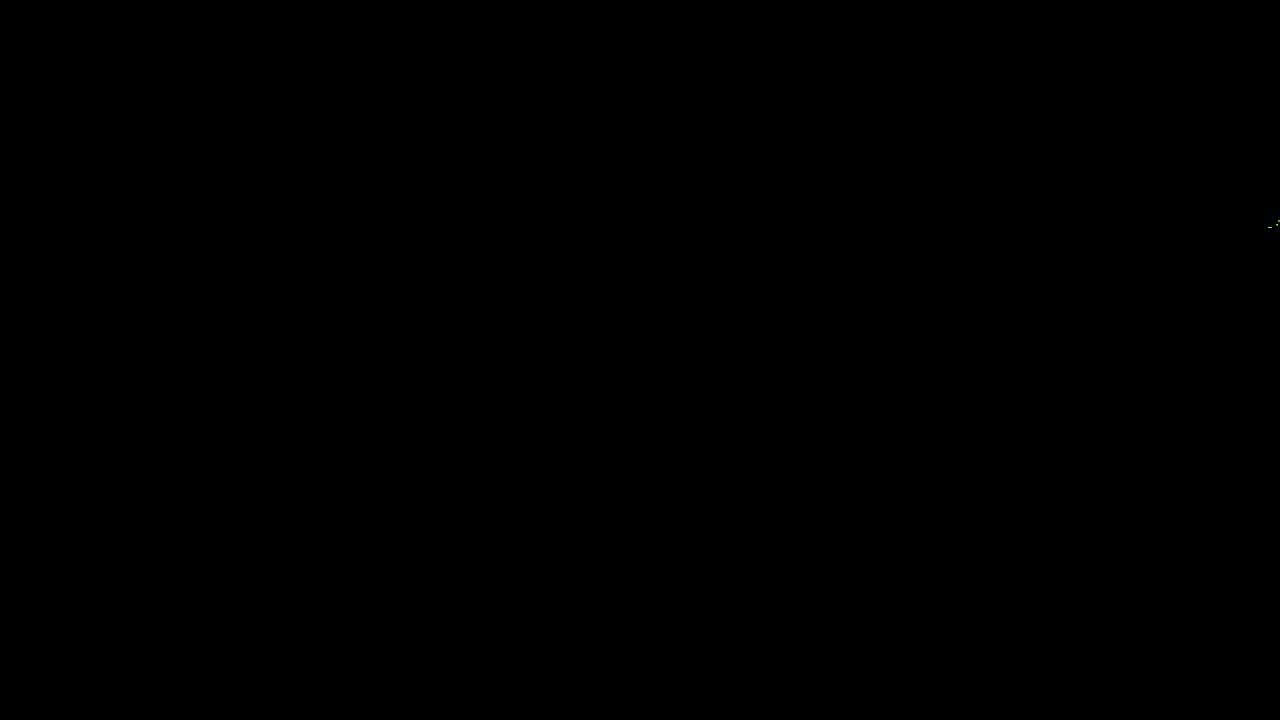

Cor vermelha detectada no frame 128


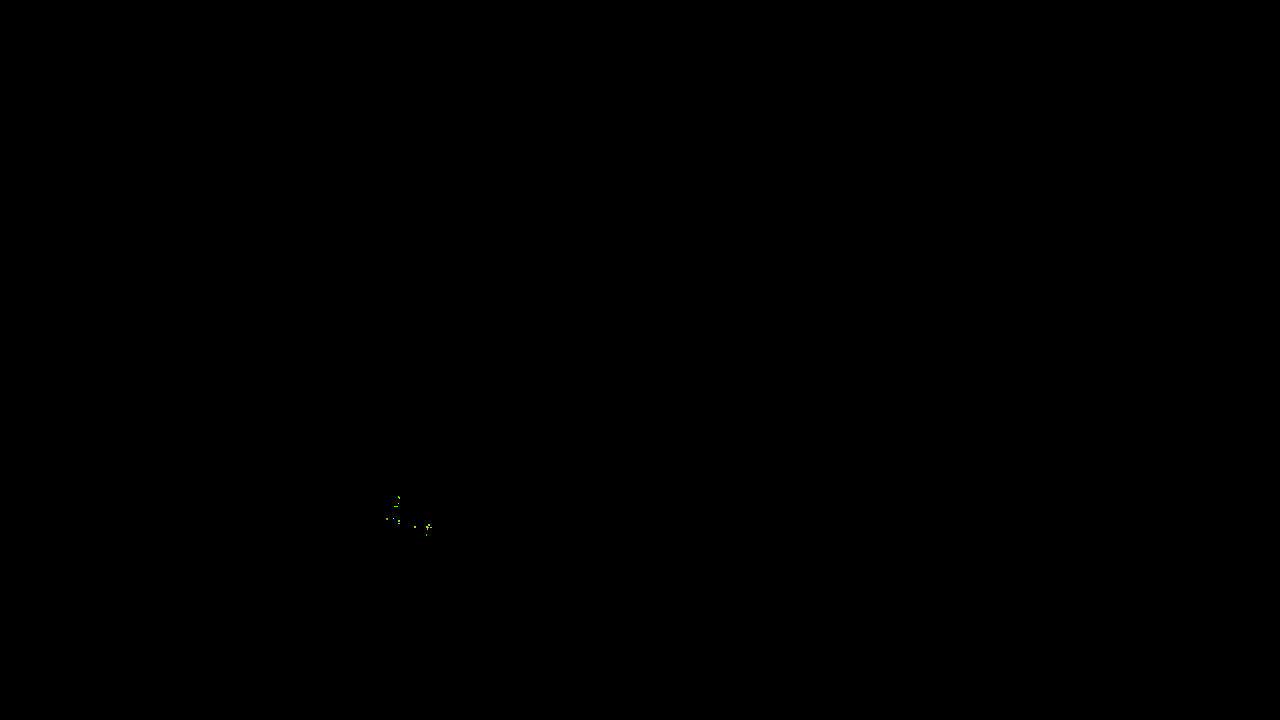

Cor vermelha detectada no frame 129


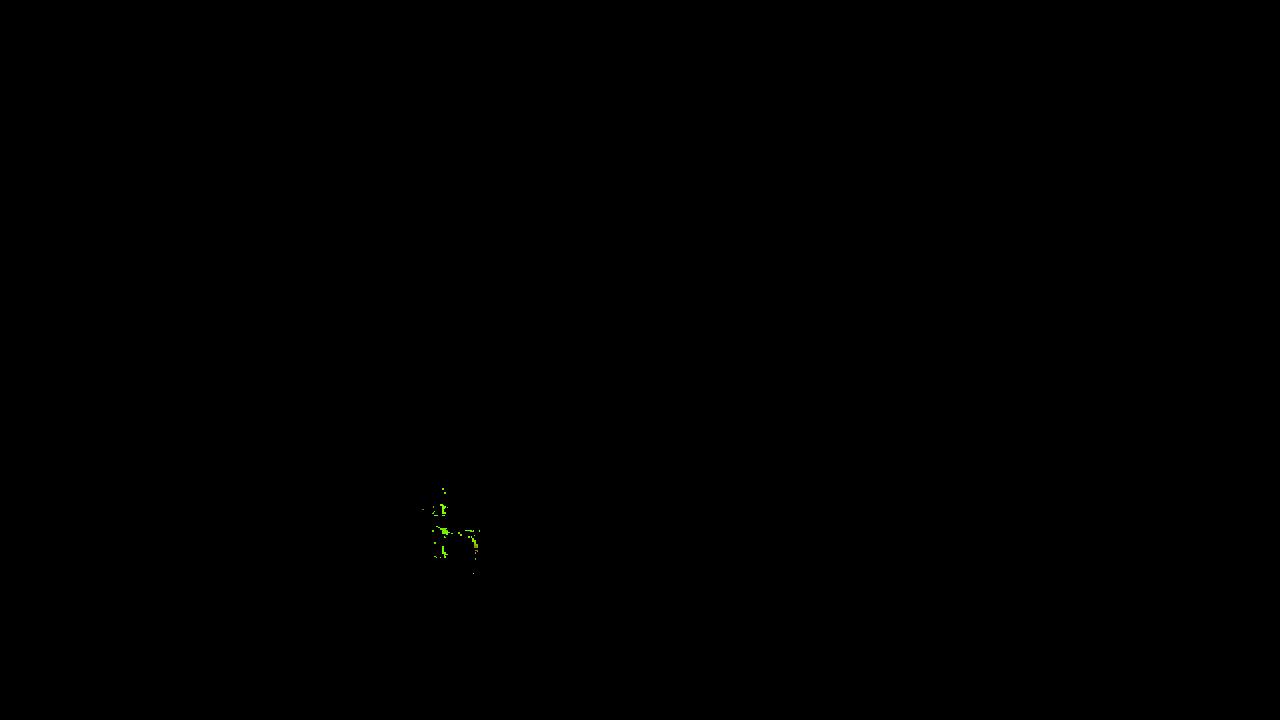

Cor vermelha detectada no frame 130


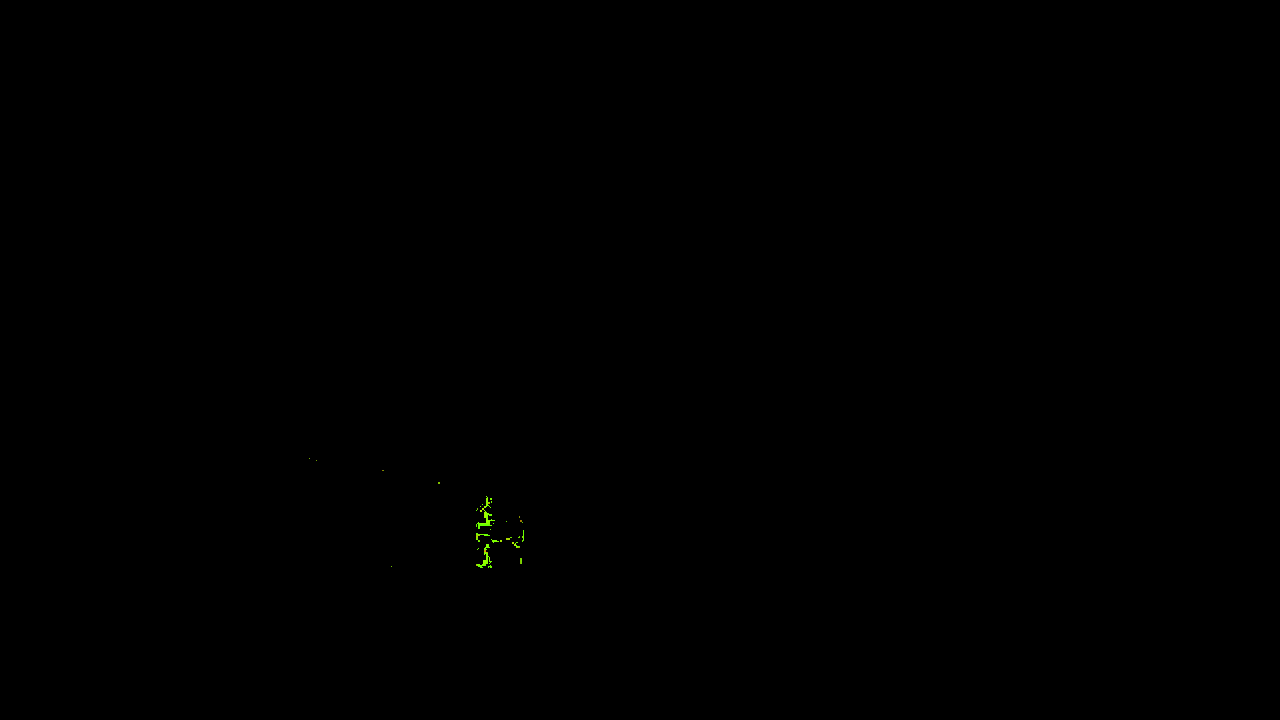

Cor vermelha detectada no frame 131


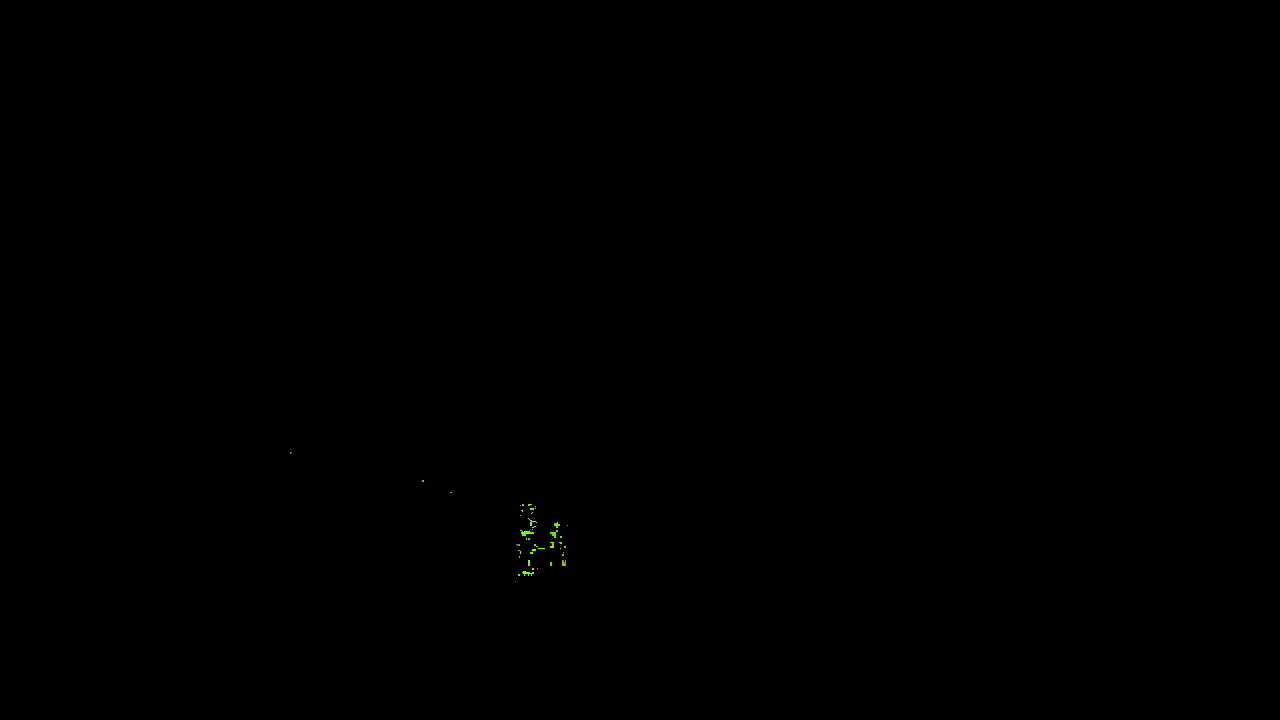

Cor vermelha detectada no frame 132


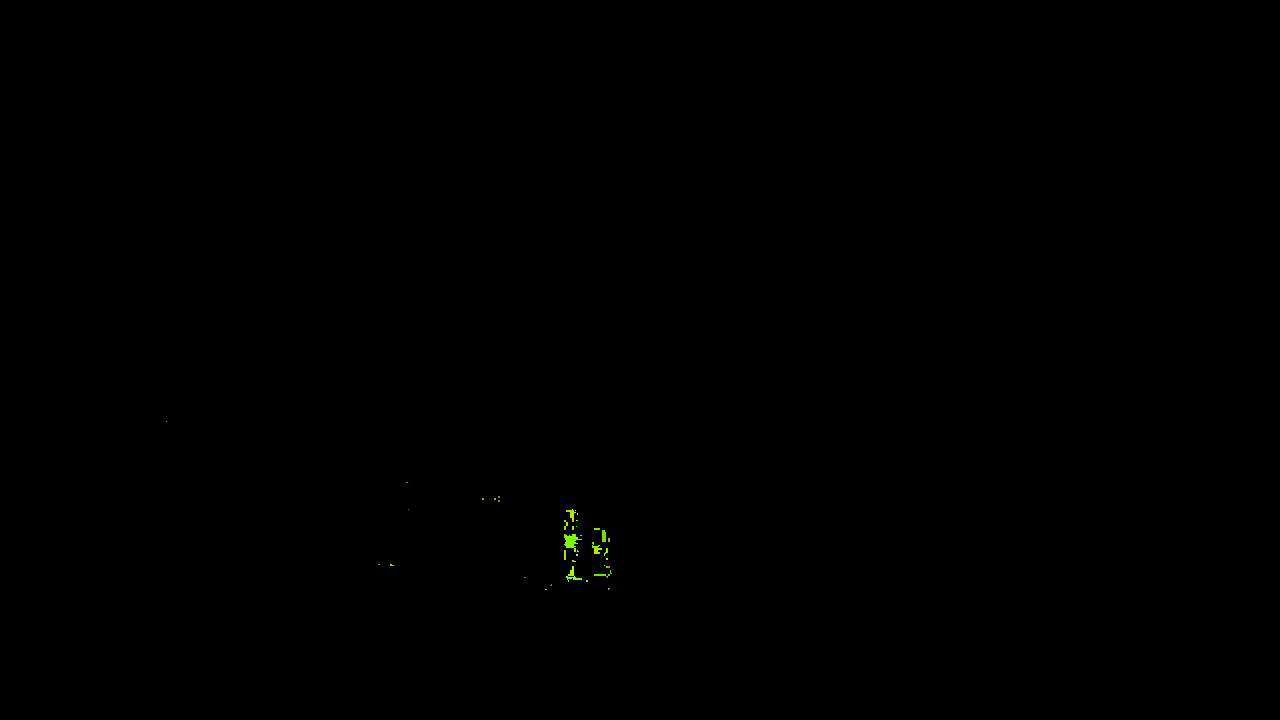

Cor vermelha detectada no frame 133


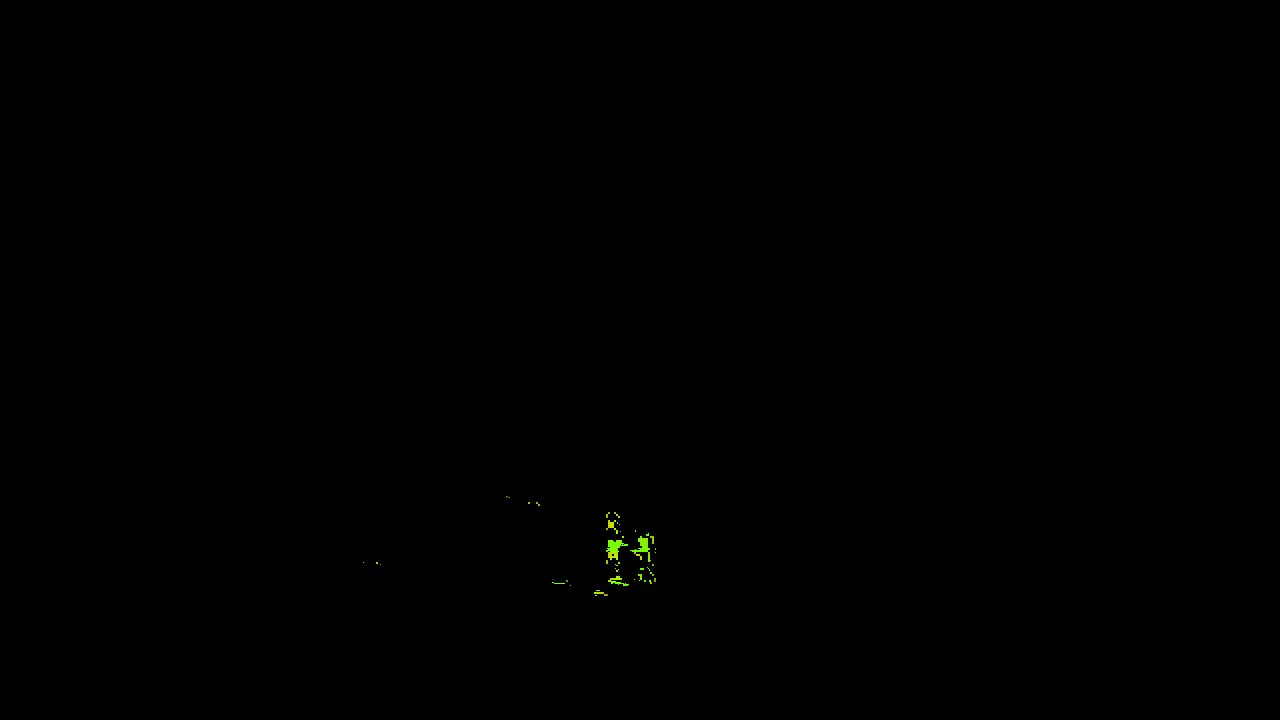

Cor vermelha detectada no frame 134


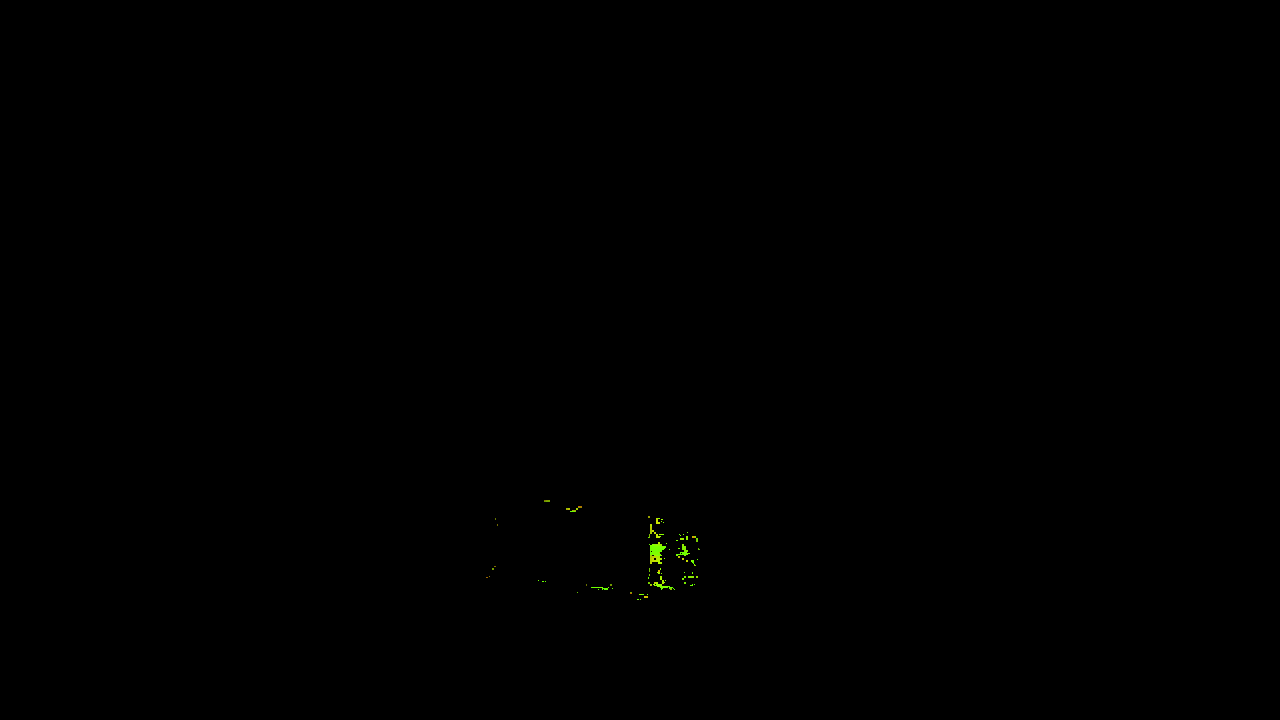

Cor vermelha detectada no frame 135


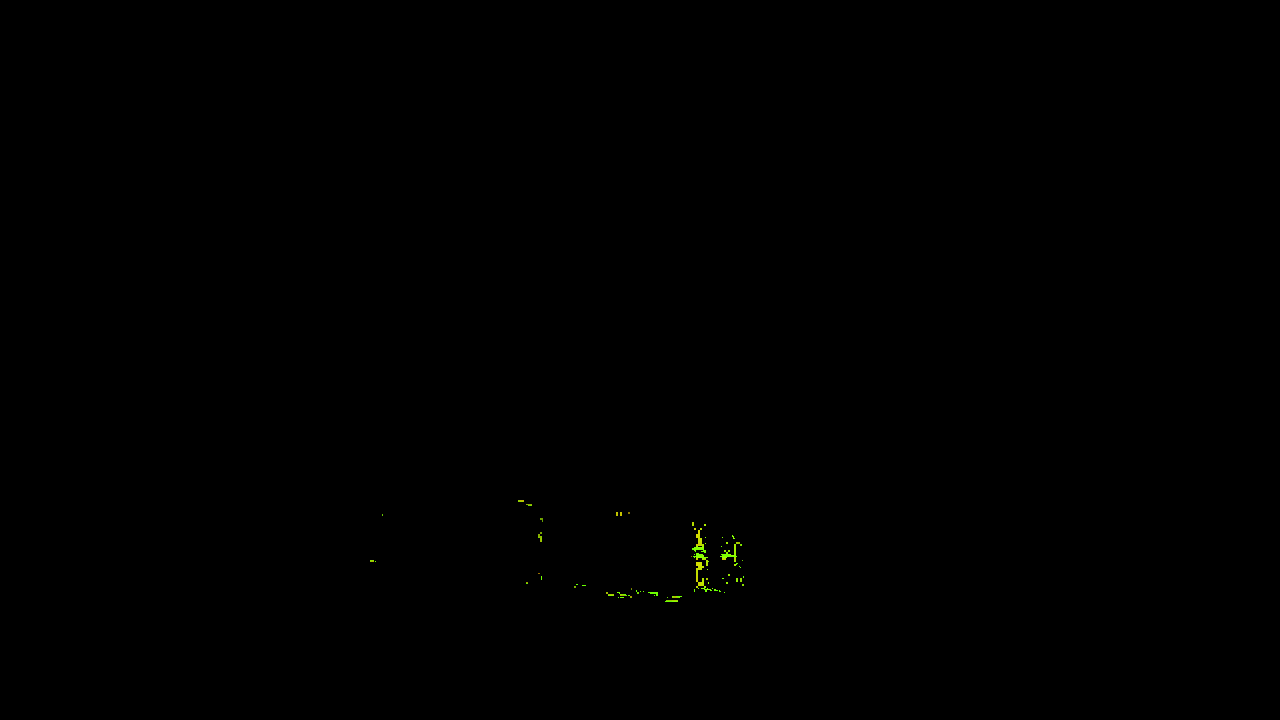

Cor vermelha detectada no frame 136


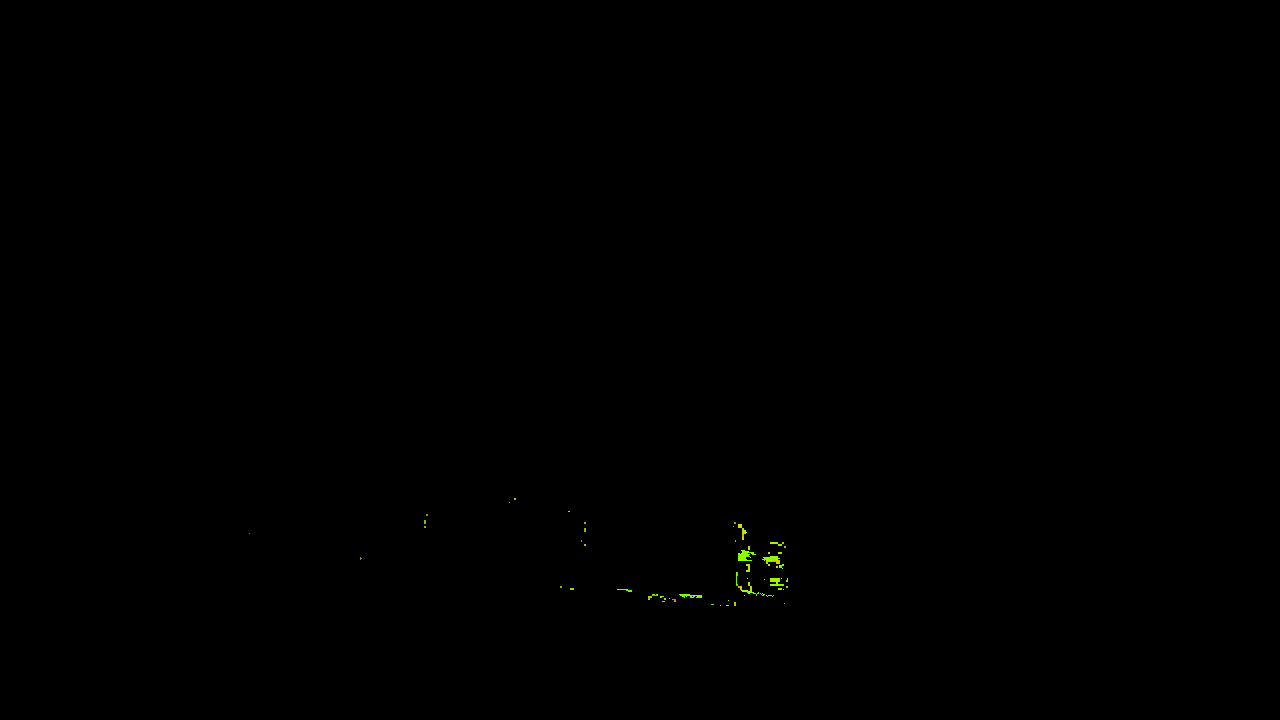

Cor vermelha detectada no frame 137


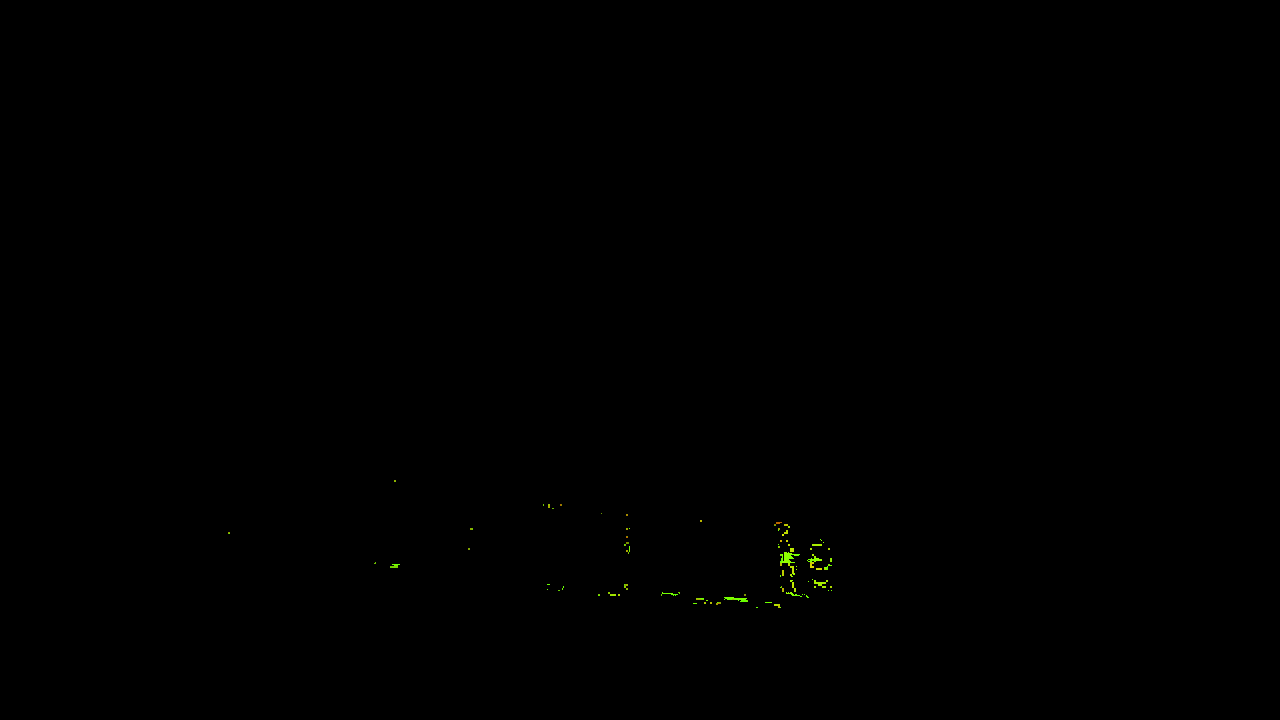

Cor vermelha detectada no frame 138


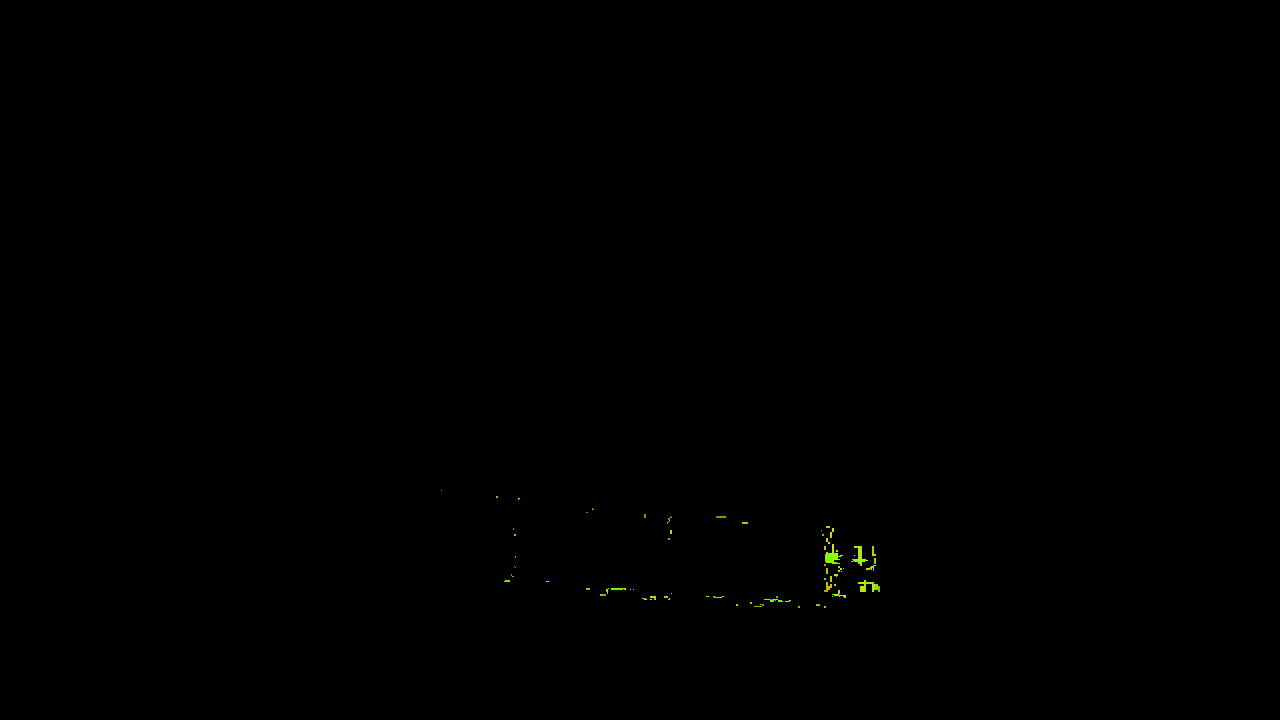

Cor vermelha detectada no frame 139


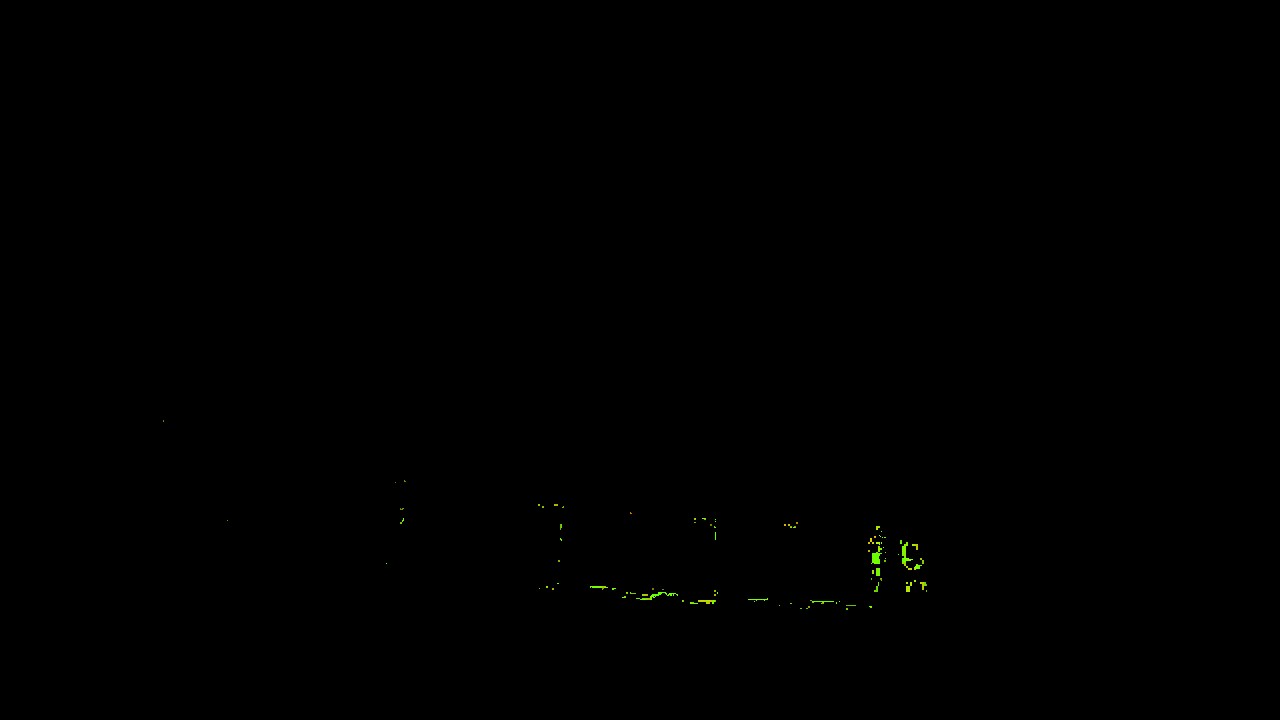

Cor vermelha detectada no frame 140


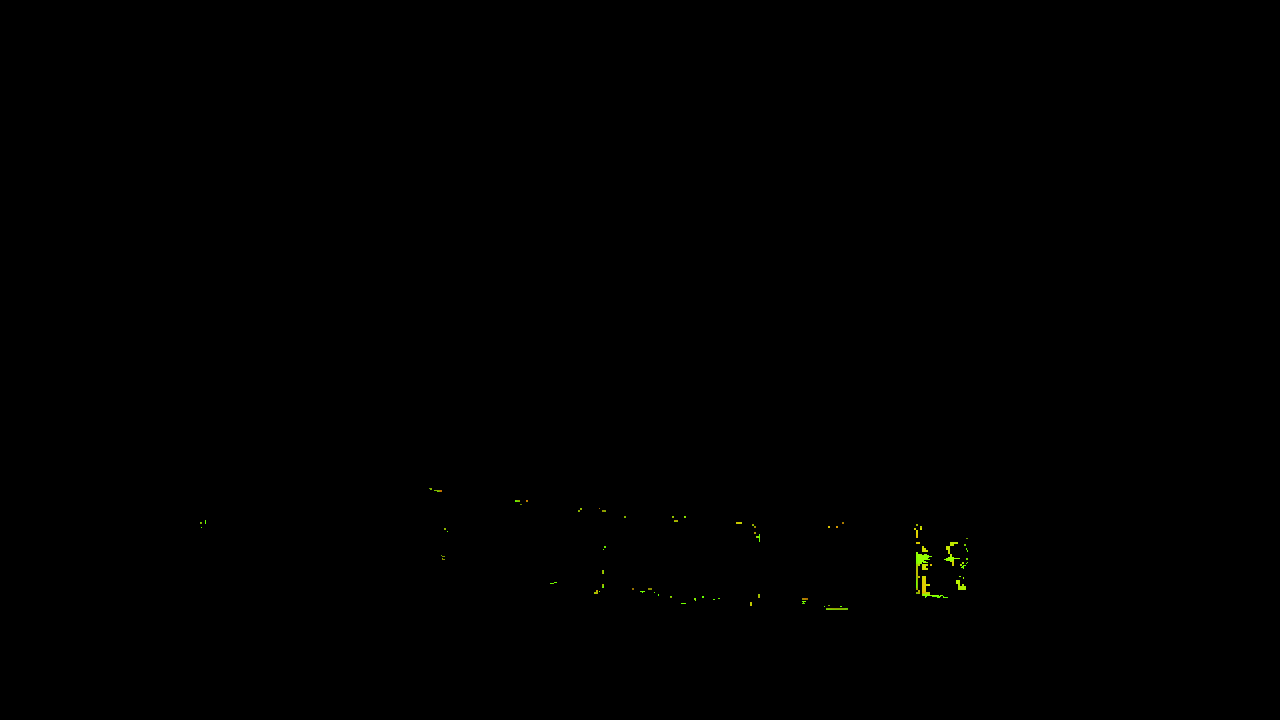

Cor vermelha detectada no frame 141


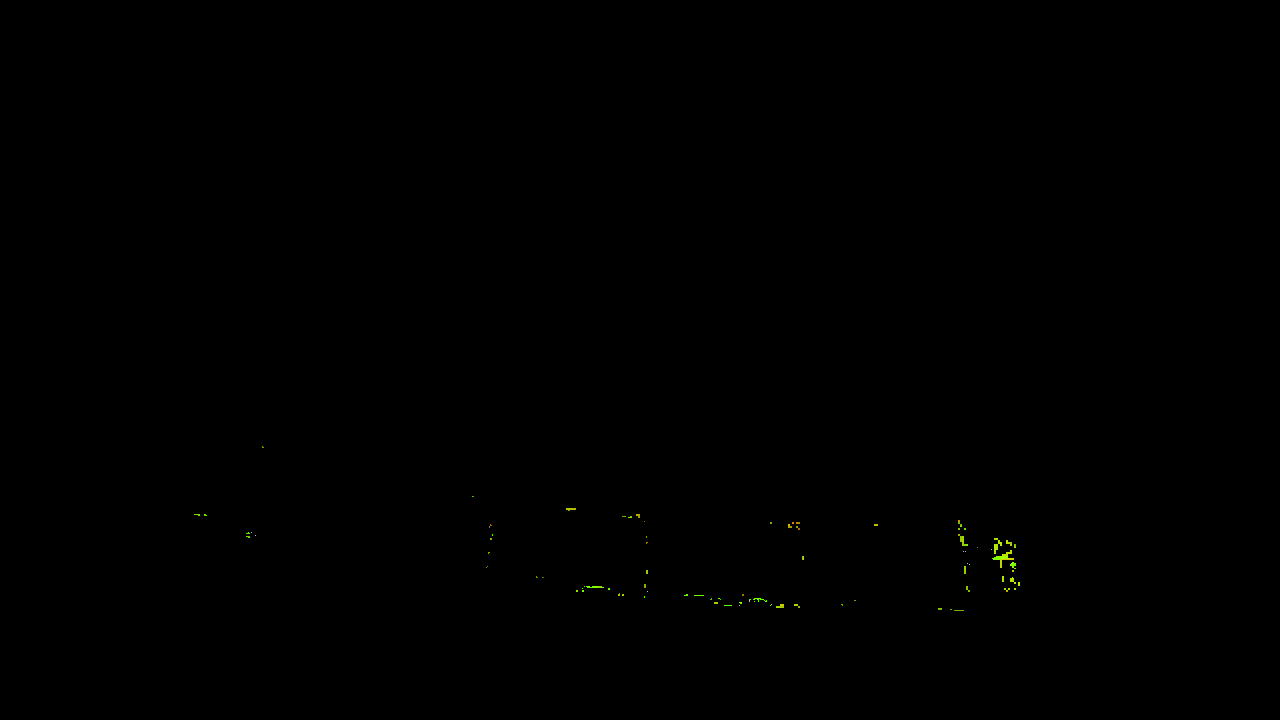

Cor vermelha detectada no frame 142


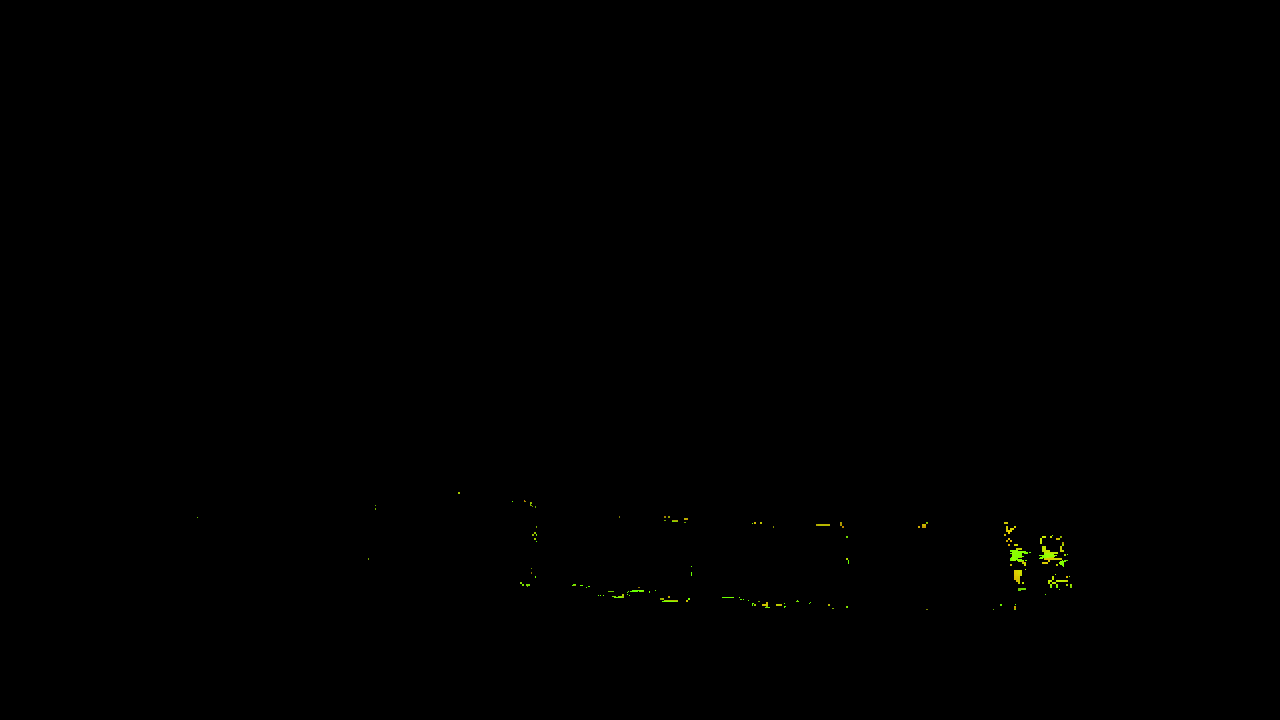

Cor vermelha detectada no frame 143


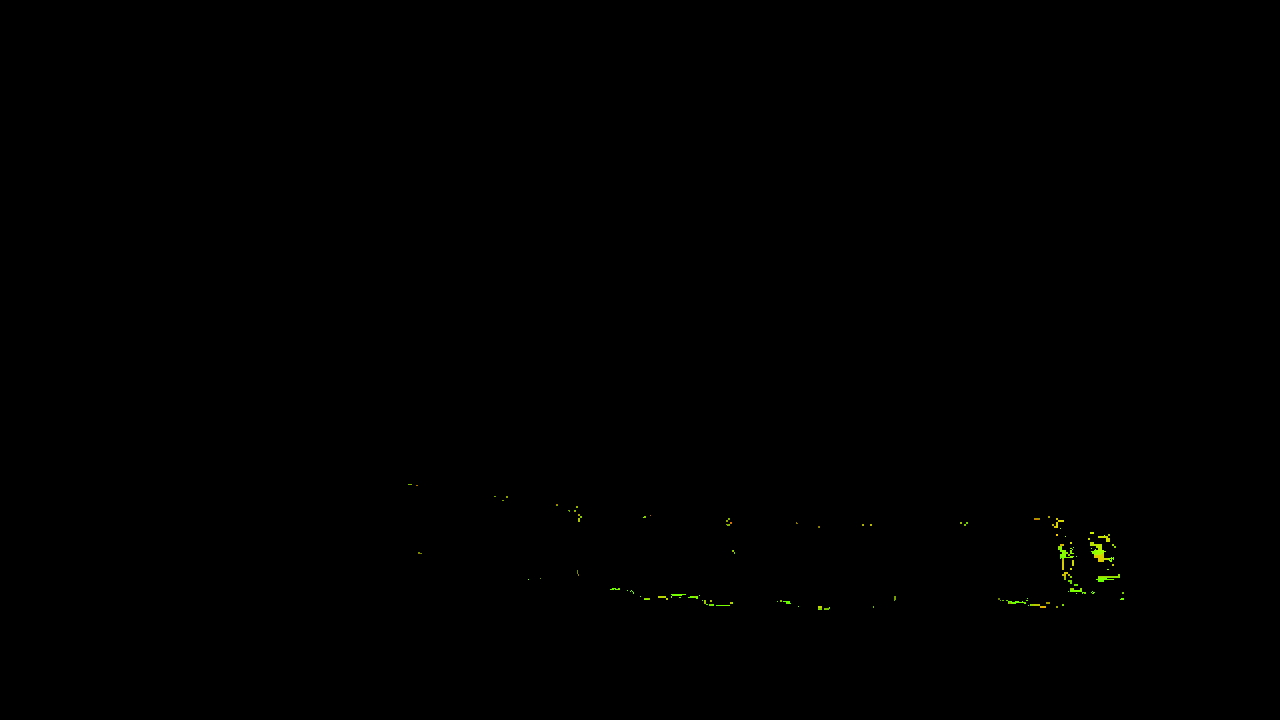

Cor vermelha detectada no frame 144


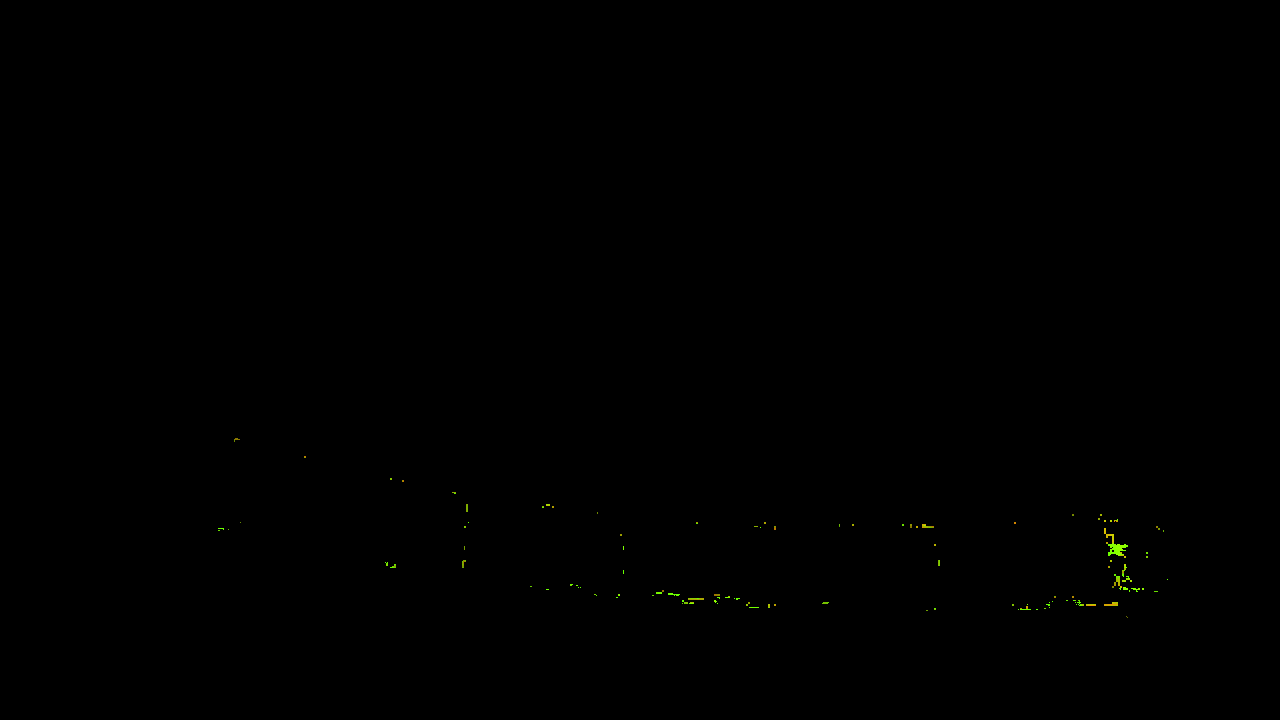

Cor vermelha detectada no frame 145


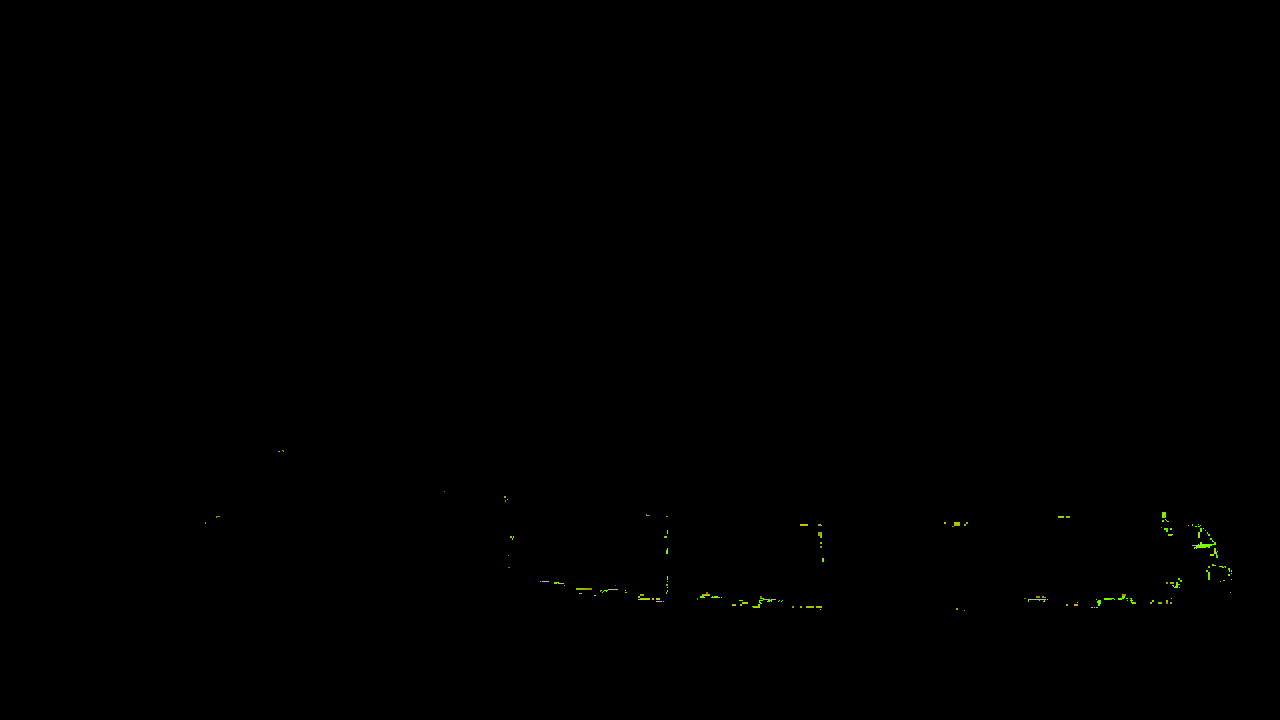

Cor vermelha detectada no frame 146


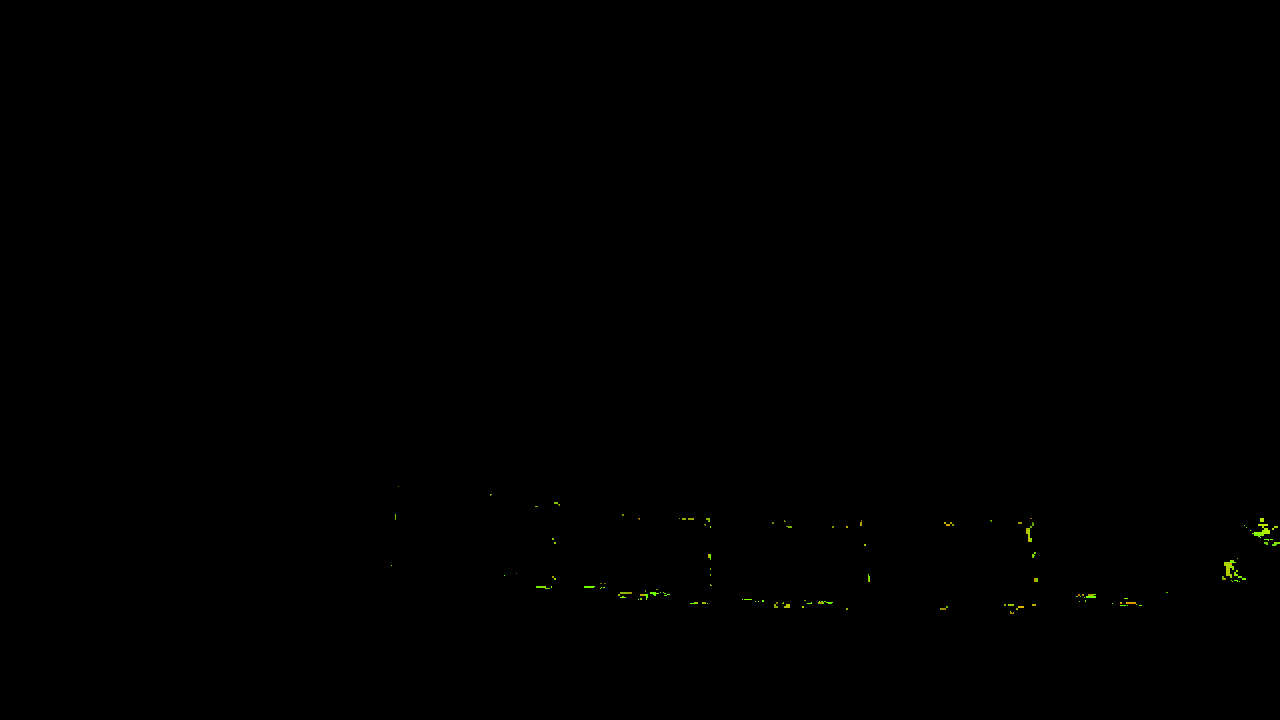

Cor vermelha detectada no frame 147


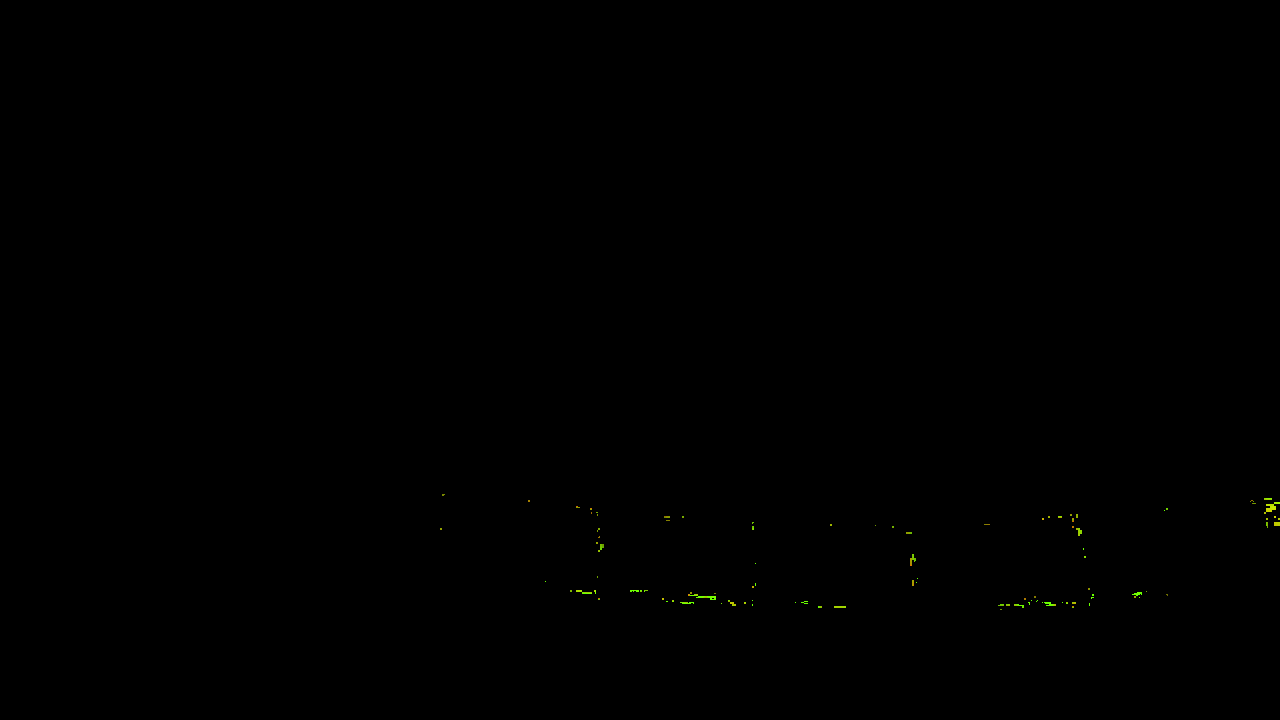

Cor vermelha detectada no frame 148


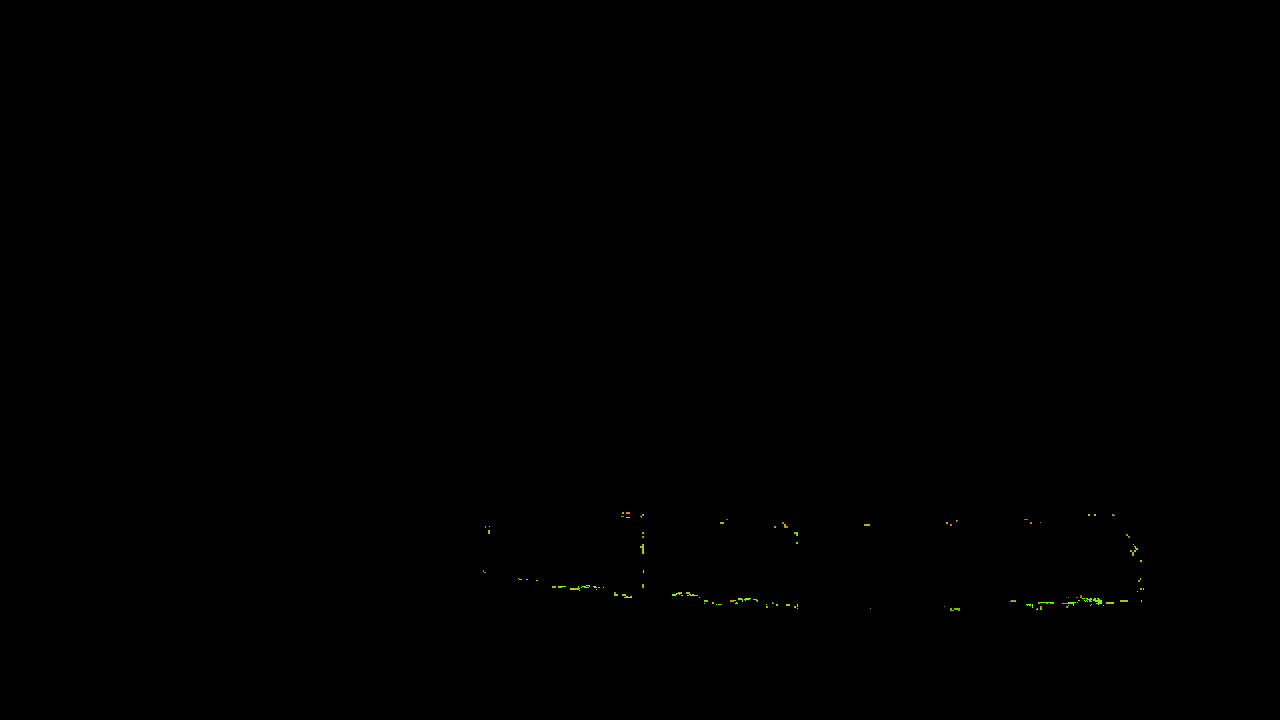

Cor vermelha detectada no frame 149


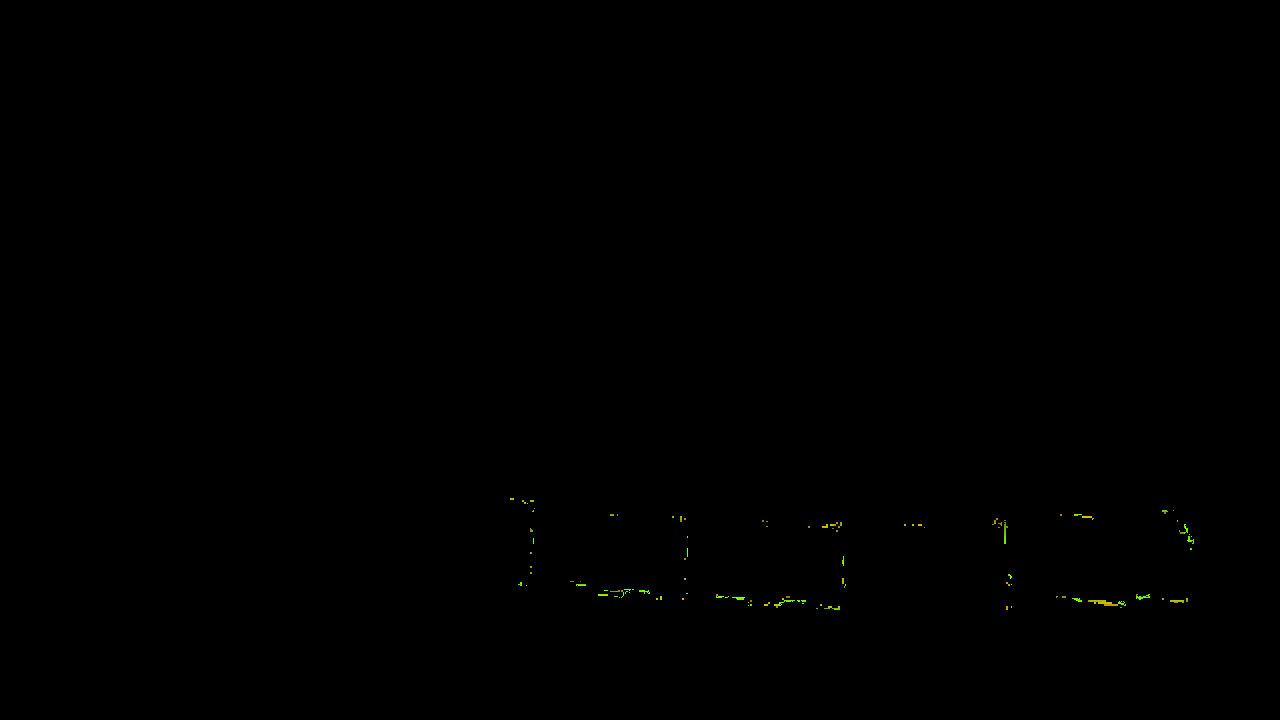

Cor vermelha detectada no frame 150


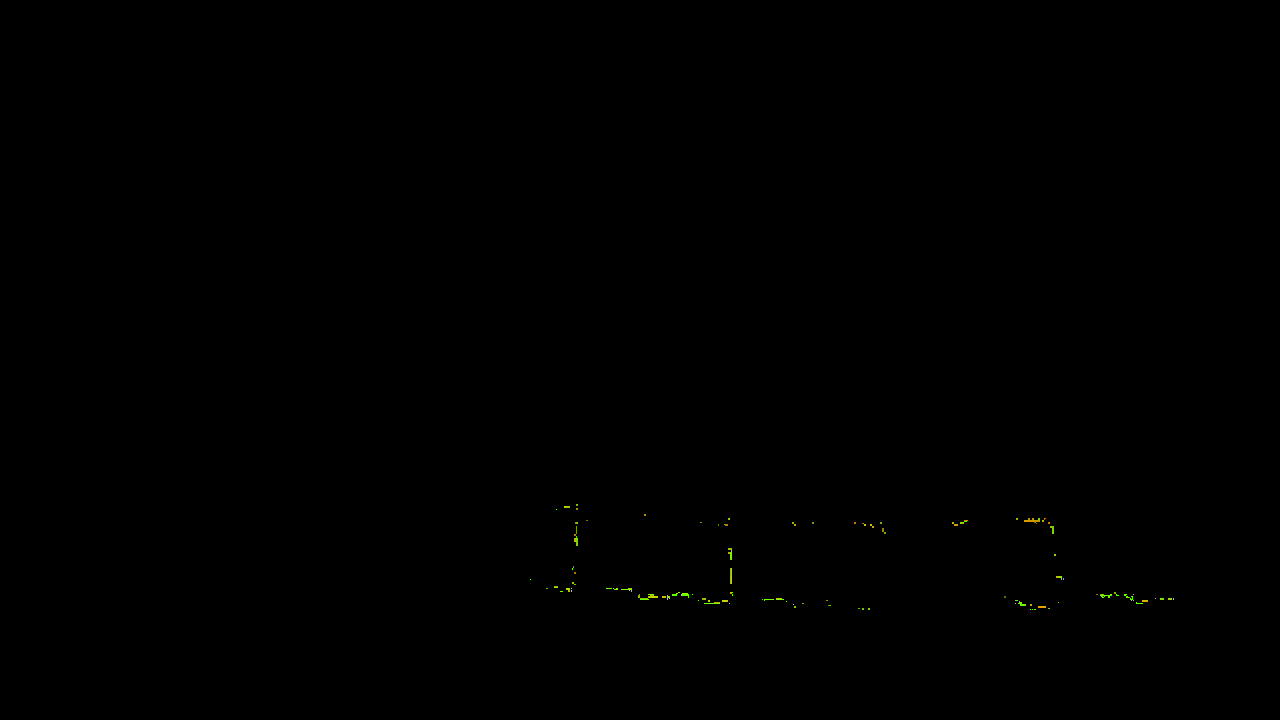

Cor vermelha detectada no frame 151


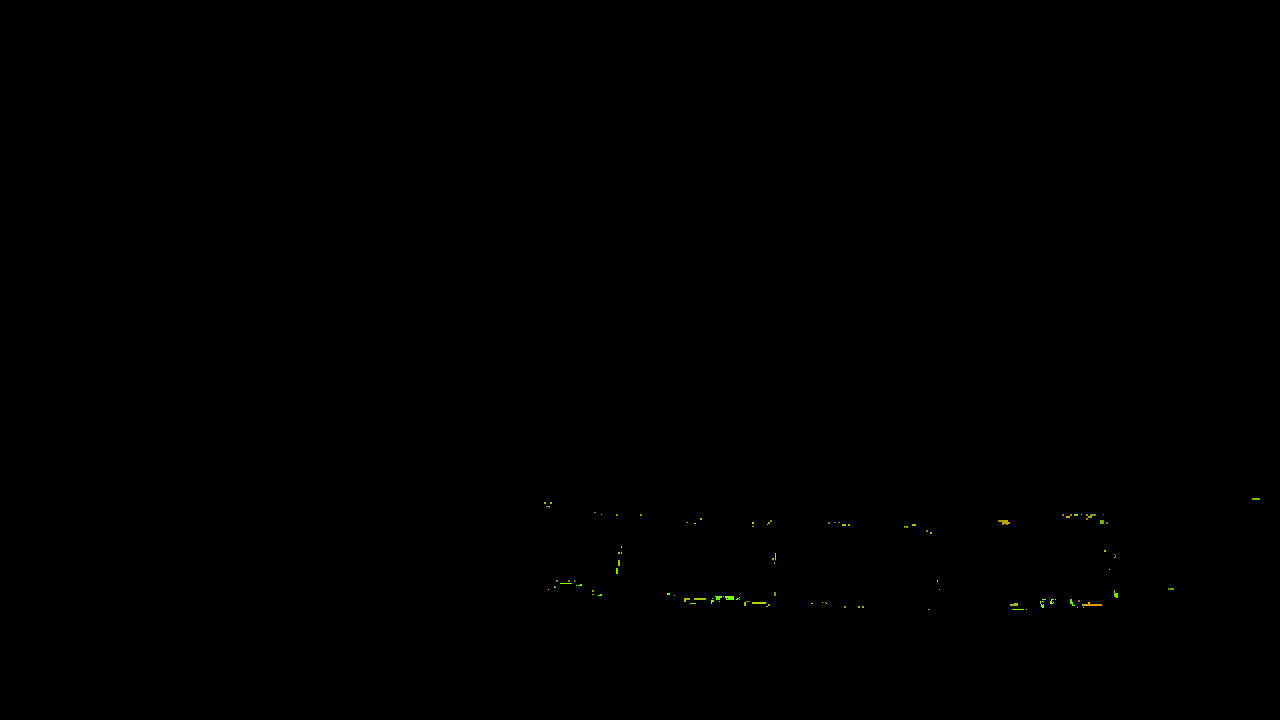

Cor vermelha detectada no frame 152


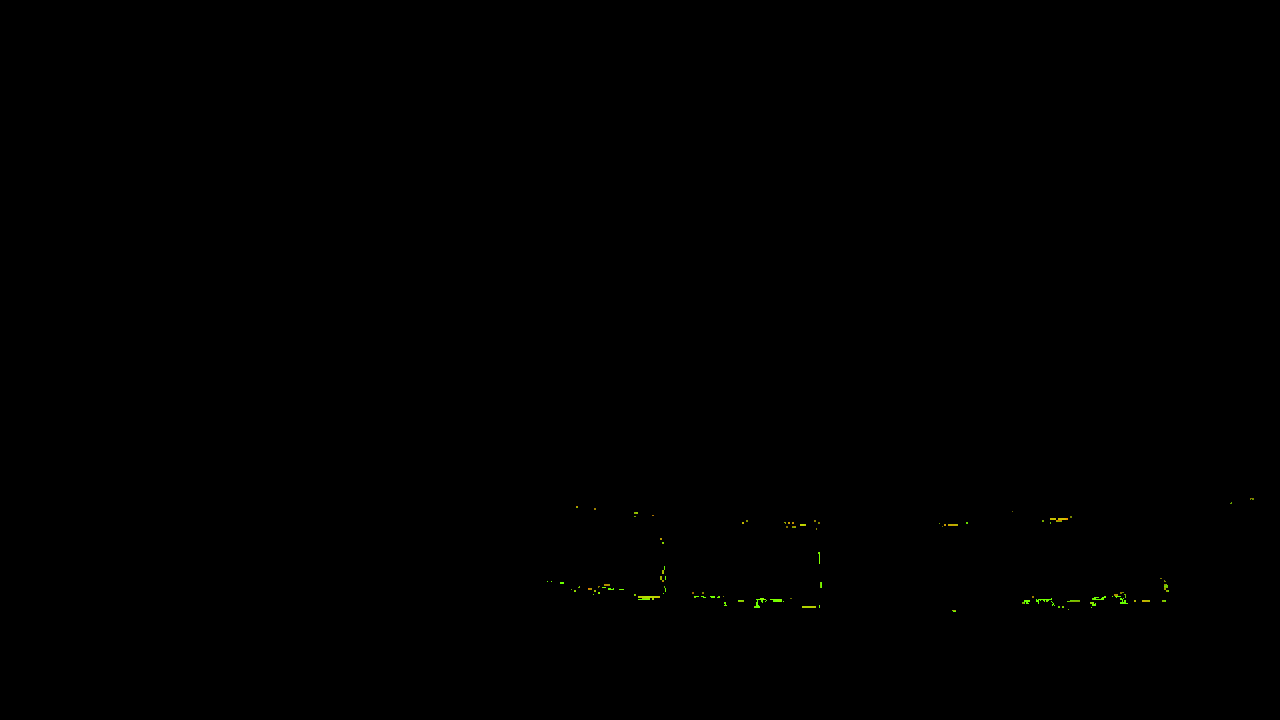

Cor vermelha detectada no frame 153


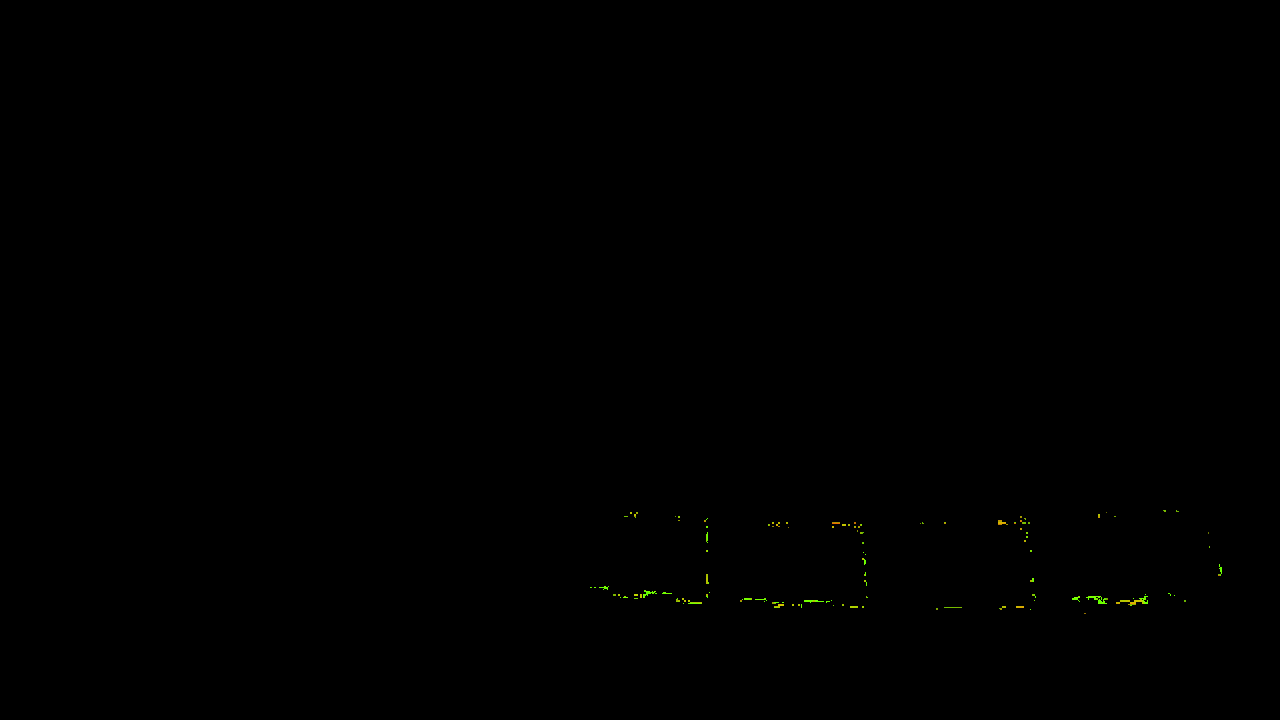

Cor vermelha detectada no frame 154


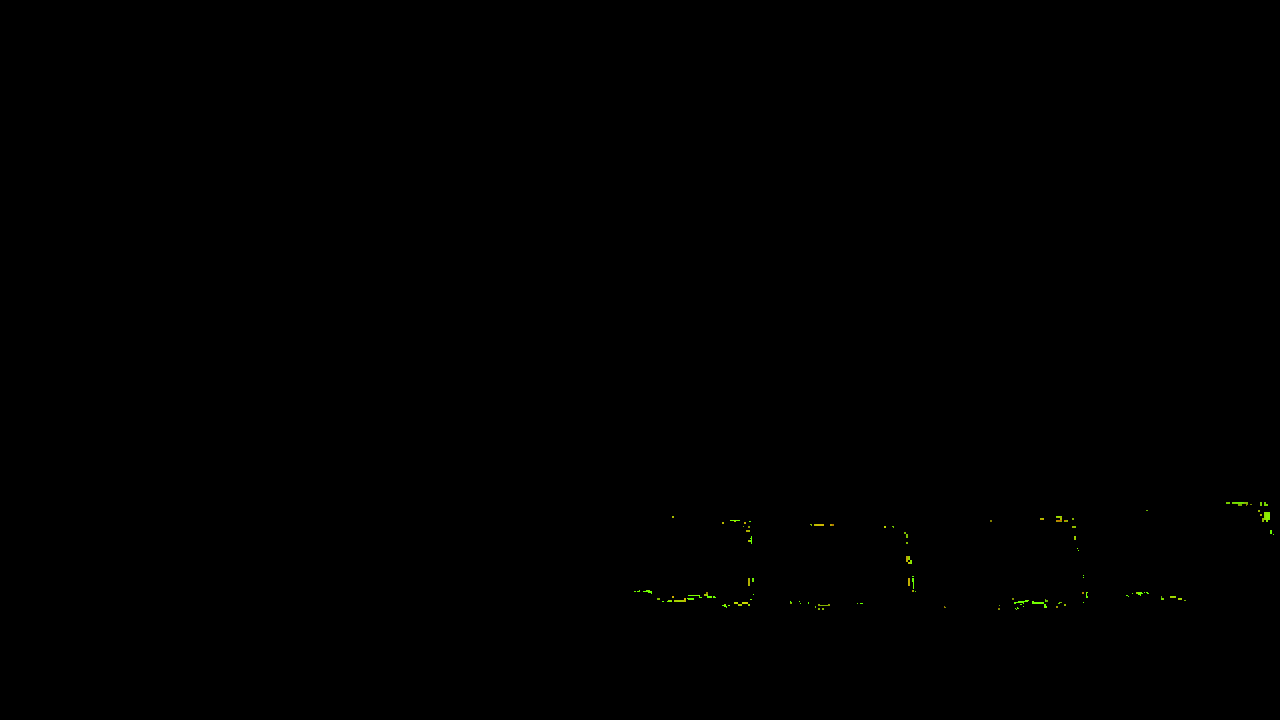

Cor vermelha detectada no frame 155


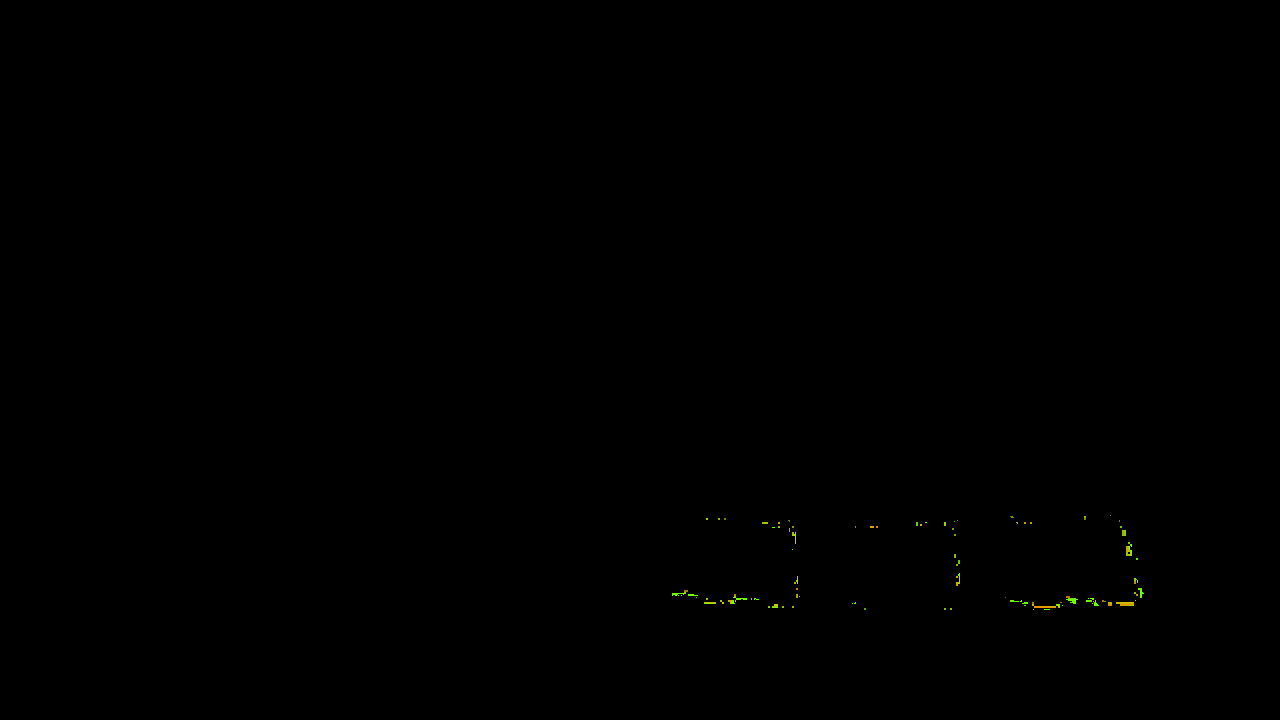

Cor vermelha detectada no frame 156


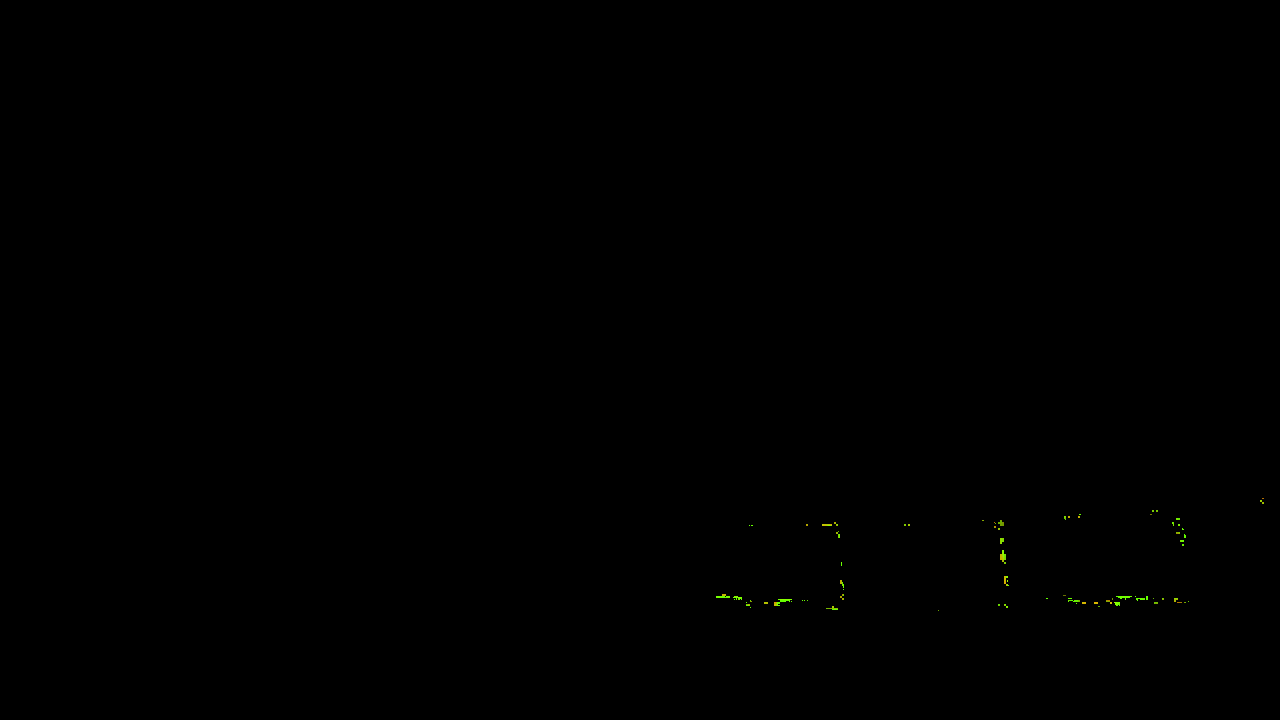

Cor vermelha detectada no frame 157


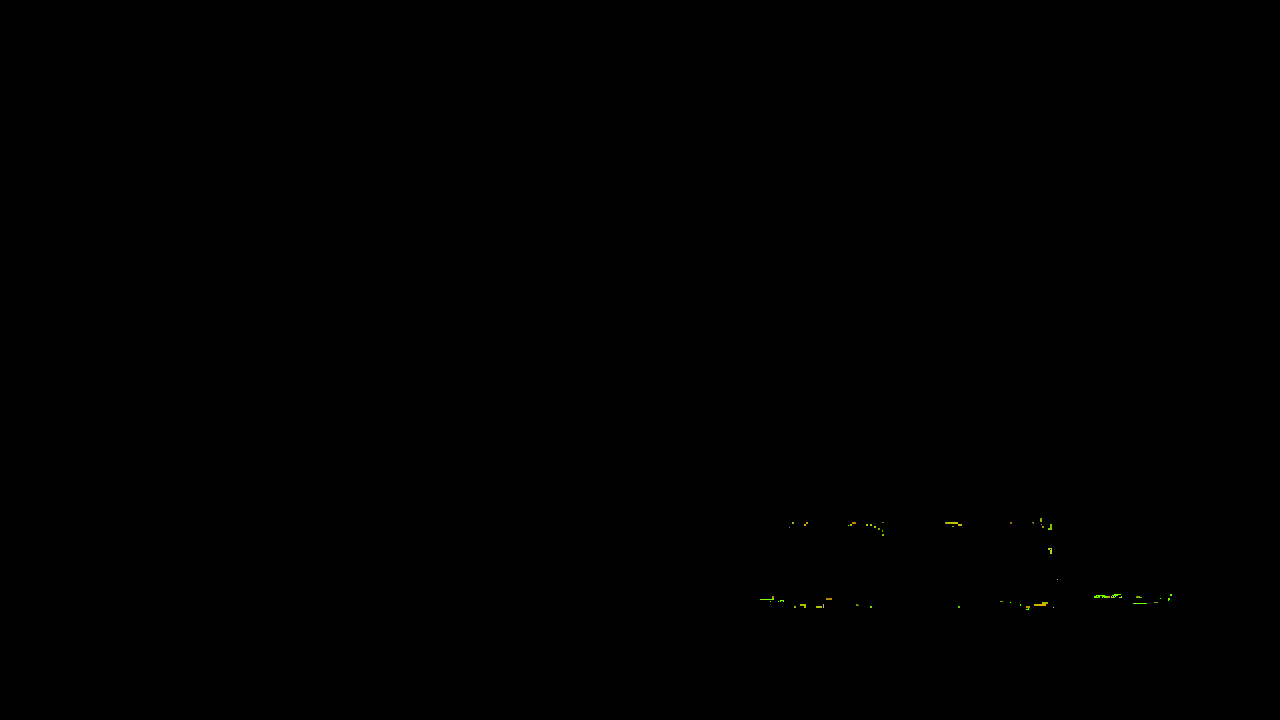

Cor vermelha detectada no frame 158


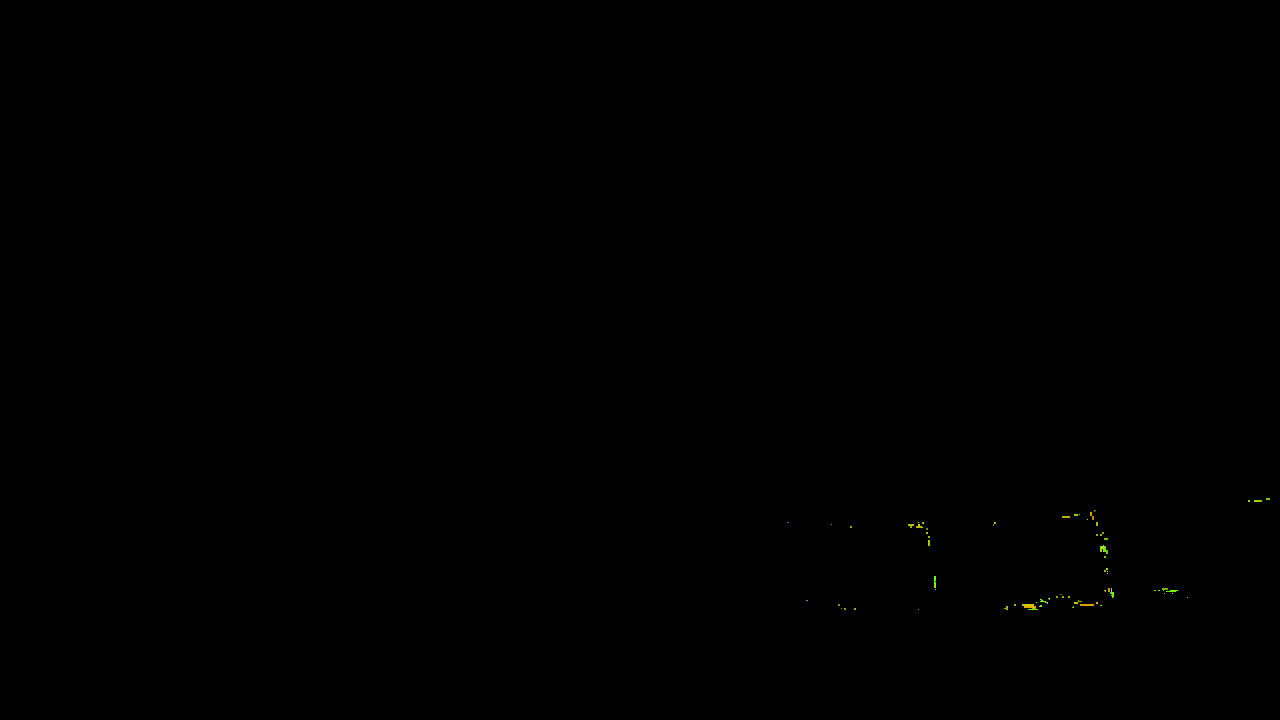

Cor vermelha detectada no frame 159


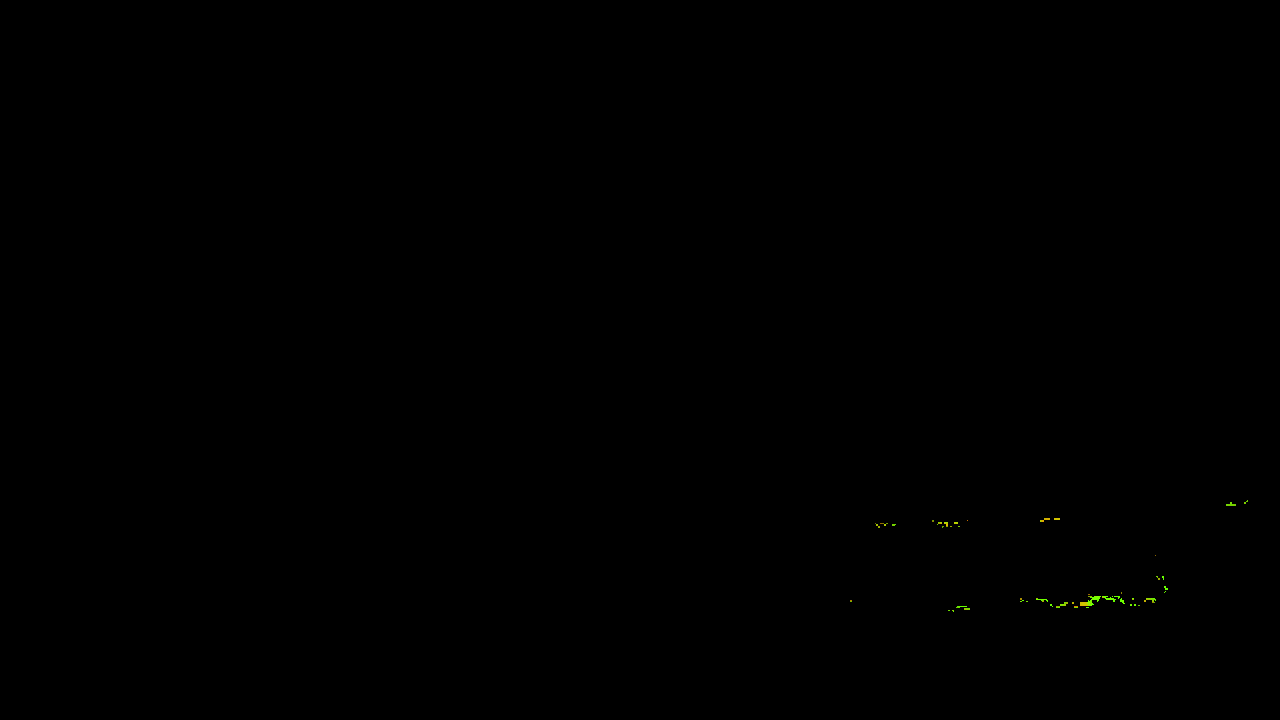

Cor vermelha detectada no frame 160


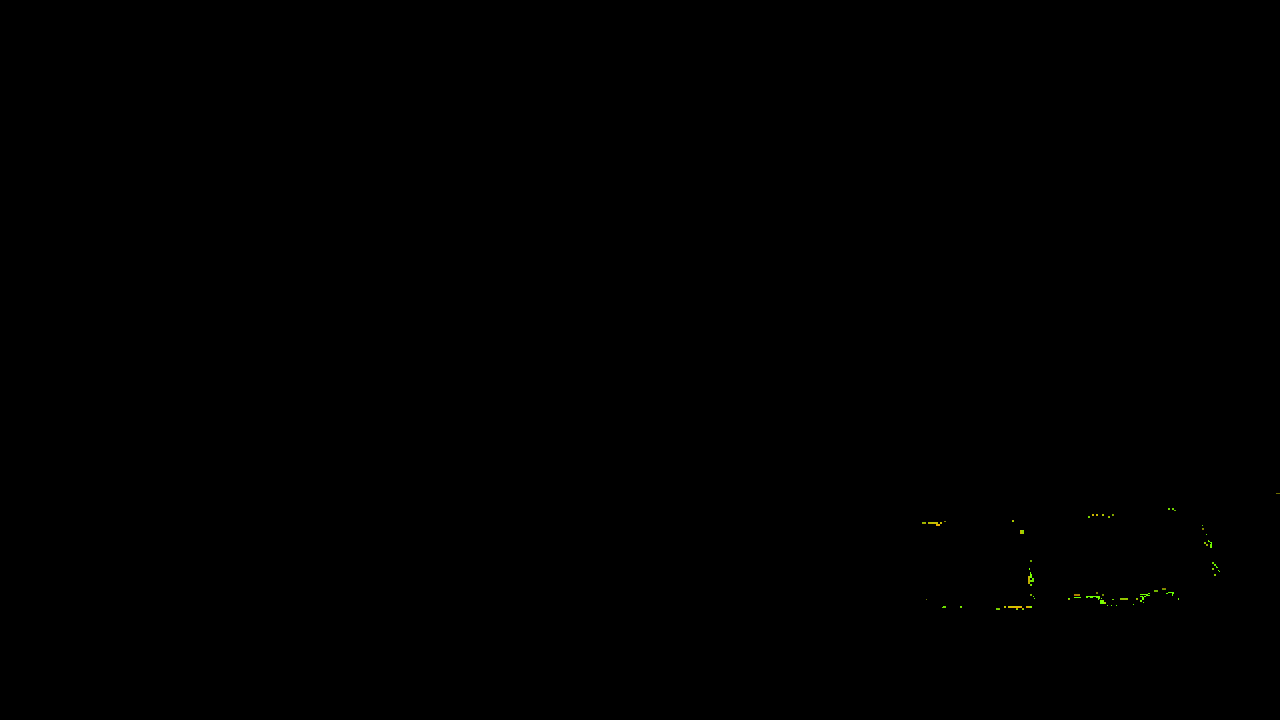

Cor vermelha detectada no frame 161


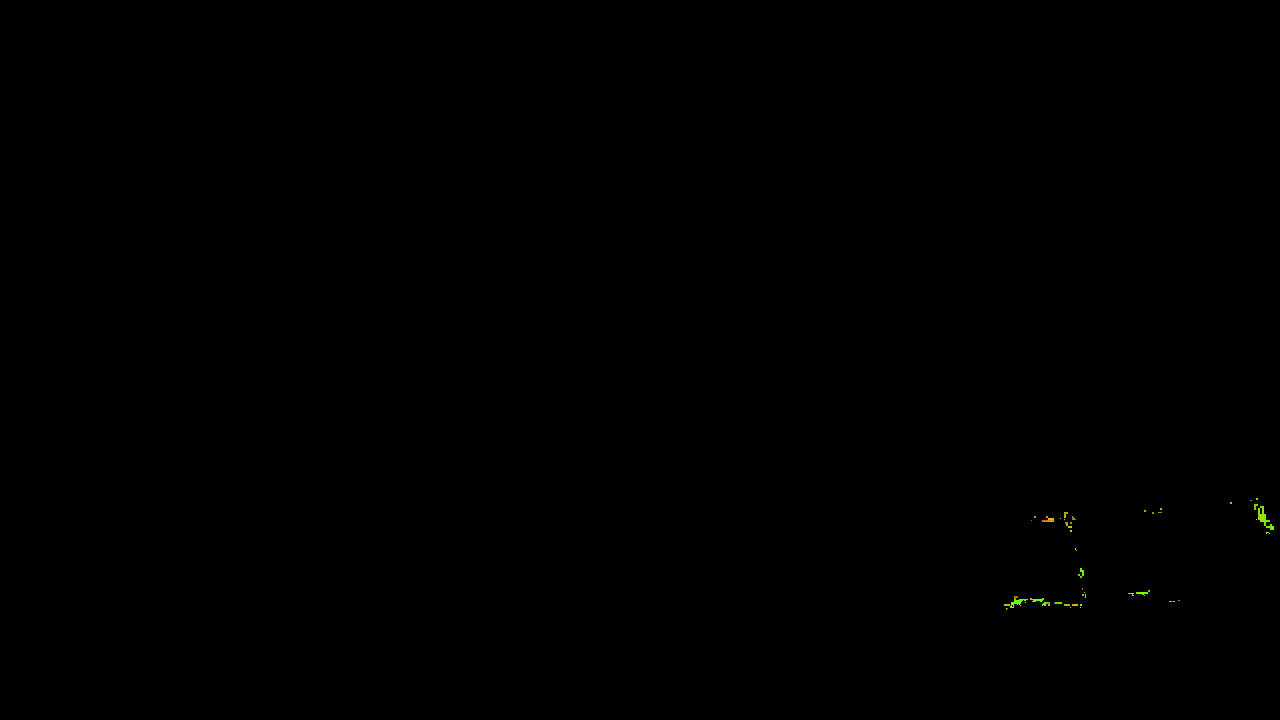

Cor vermelha detectada no frame 162


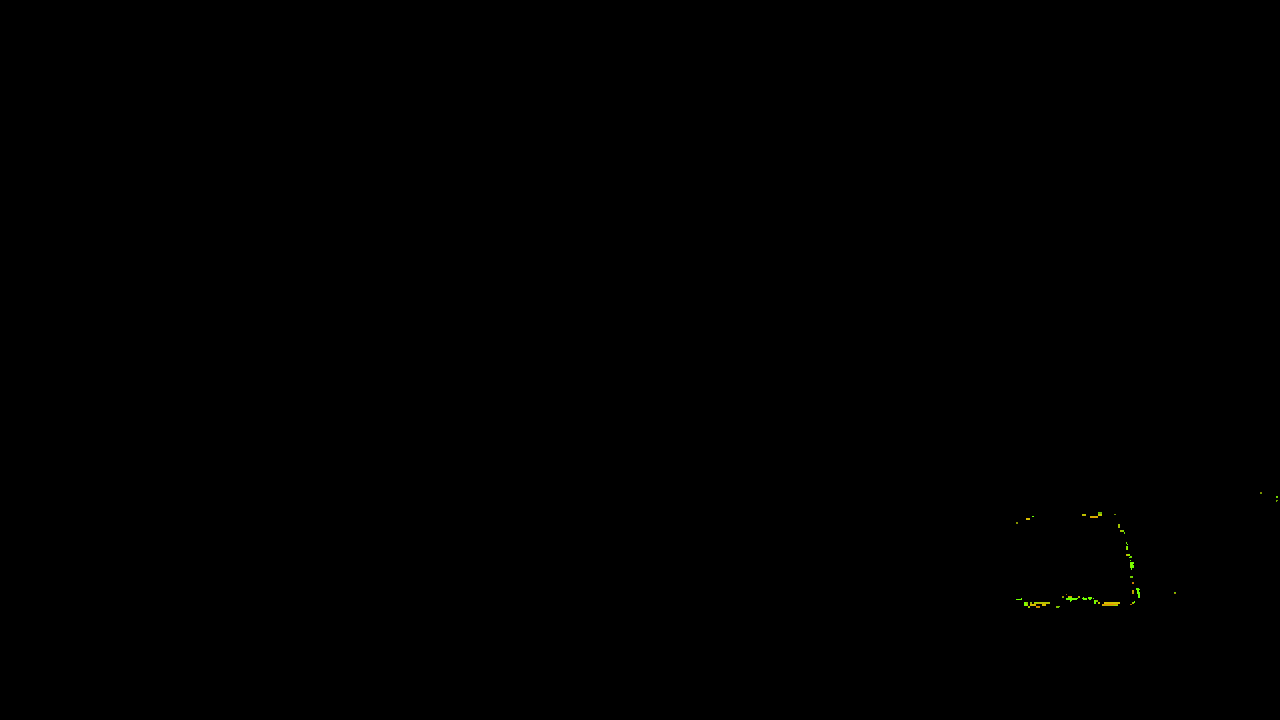

Cor vermelha detectada no frame 163


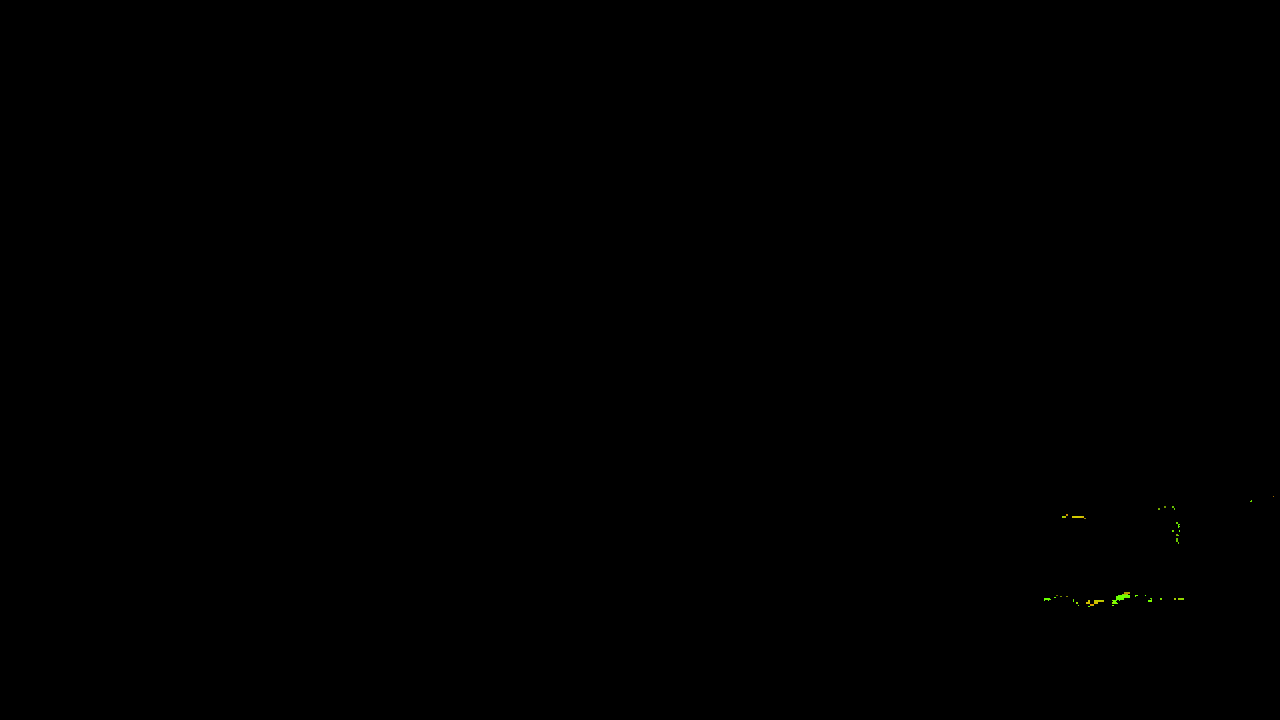

Cor vermelha detectada no frame 164


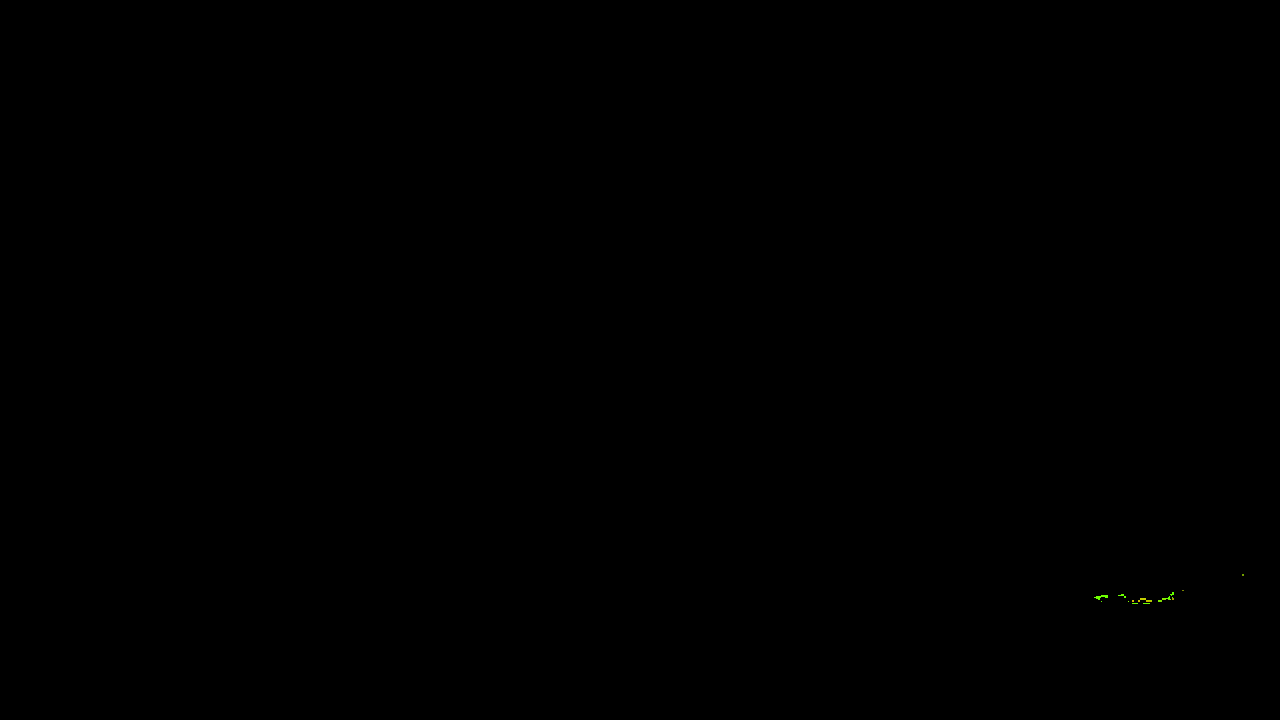

Cor vermelha detectada no frame 165


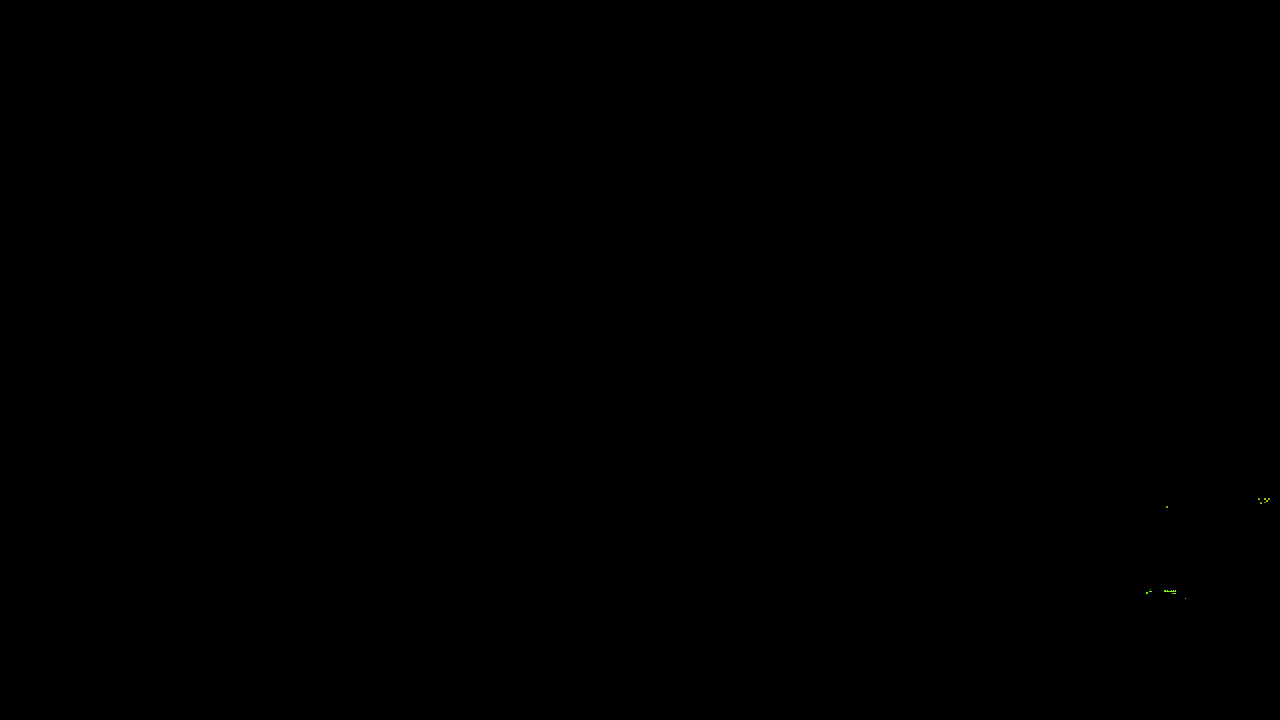

Cor vermelha detectada no frame 166


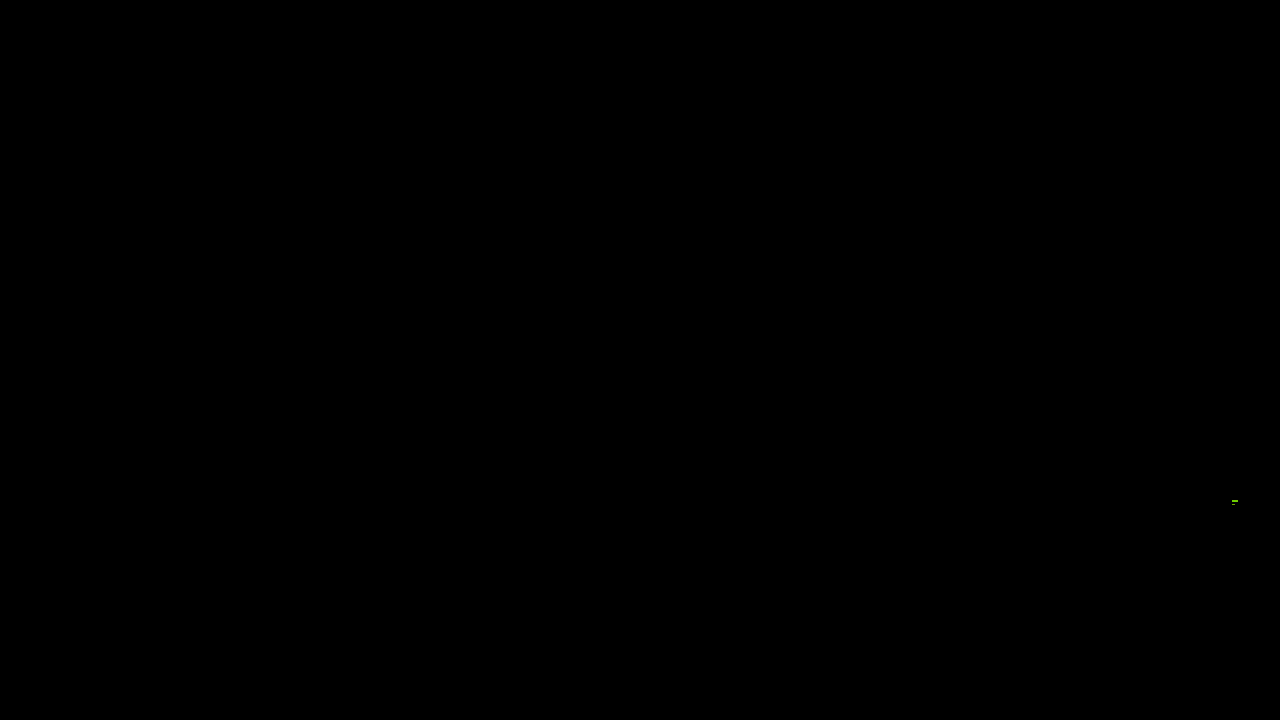

Cor vermelha detectada no frame 167


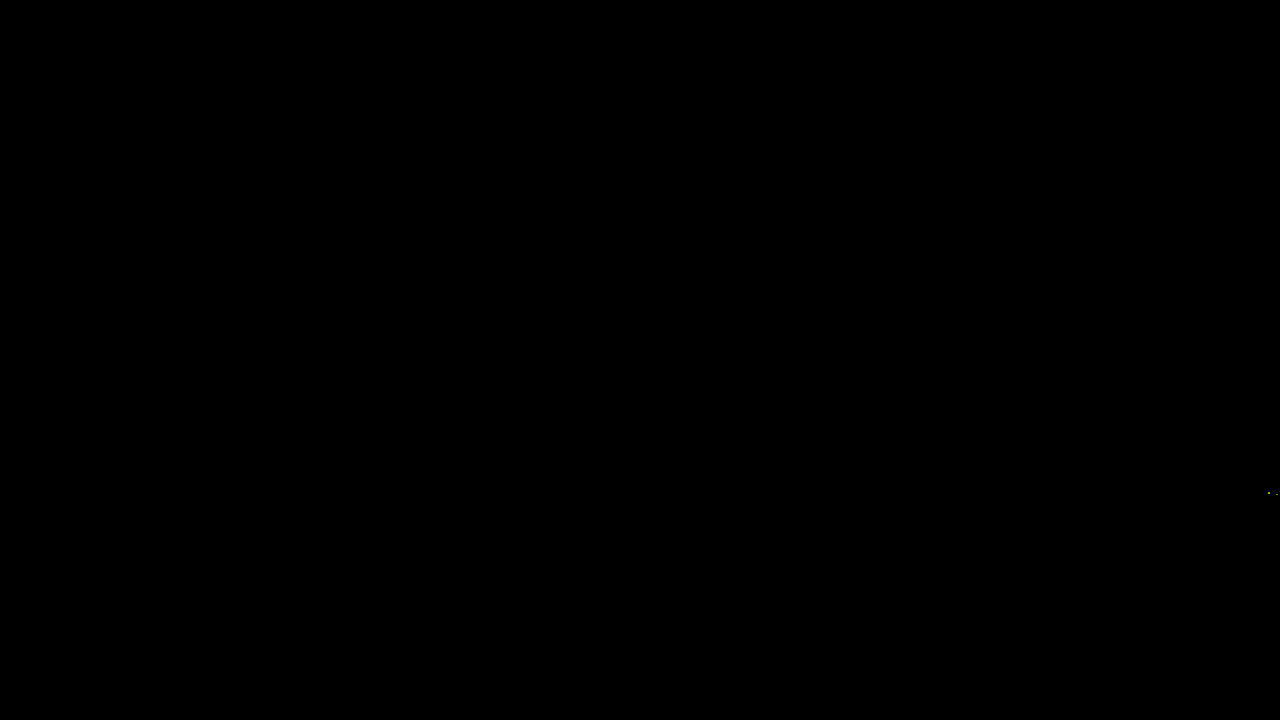

In [107]:
while True:
    ret, frame = video.read()
    if not ret:
       break
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  # Convertendo o frame para o espaço de cores HSV
    lower_red = np.array([0, 100, 100])                 # Definindo os intervalos de cores vermelhas em HSV
    upper_red = np.array([0, 255, 255])
    red_mask = cv2.inRange(hsv_frame, lower_red, upper_red)    # Máscara para a cor vermelha
    red_part = cv2.bitwise_and(hsv_frame, hsv_frame, mask=red_mask) # Isola a parte vermelha do frame
    if cv2.countNonZero(red_mask)>0:
      print(f"Cor vermelha detectada no frame {contador_frame}")
      nome = 'Frame com HSV' + '_' +"{0:01}".format(contador_frame)+'.jpg'
      image = Image.fromarray(cv2.cvtColor(red_part, cv2.COLOR_BGR2RGB))  #Salvando e convertendo a imagem
      image_bytes = BytesIO()
      image.save(image_bytes, format='PNG')
      image_bytes.seek(0)

      display.display(display.Image(data=image_bytes.read()))    # Exiba a imagem
      cv2.imwrite(nome,red_part)
    contador_frame += 1
video.release()
